
<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:right; max-width: 120px; display: inline" alt="INSA"/></a> 

# <FONT COLOR="Red">Projet de Machine Learning: Gym Members Exercise</font> <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

<a href="https://www.cancercenter.com" ><img src= "https://i.chzbgr.com/full/9198216192/hAFAF11FB" style="float:center; max-width: 800px; display: inline"  alt="Gym"/></a>
</center>

# <FONT COLOR="Green">Jeu de données</font>

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


In [710]:
library(ggplot2)
library(gridExtra)
library(dplyr)
library(corrplot)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(ggcorrplot)
library(ggmosaic)
library(RColorBrewer)
library(MASS)
library(e1071)
library(rpart)
library(rpart.plot)
library(partykit)
library(gplots)
library(caret)
library(randomForest)
library(ggRandomForests)
library(gbm)
library(nnet)
library(lmtest)
library(kernlab)
library(isotree)
library(vip)
library(cowplot)
library(class)     
set.seed(123)

# <FONT COLOR="Green">Partie I: Analyse exploratoire des données</font>

Dans cette section, nous allons analyser la distribution des variables du jeu de données. Cela nous permettra d’identifier d’éventuelles transformations à appliquer (comme la normalisation, la standardisation ou l’encodage) afin d'améliorer la qualité et la performance des méthodes de machine learning que nous utiliserons par la suite.

Nous porterons une attention particulière aux deux variables cibles : "Experience_Level"   et "Calories_Burned" . L’objectif est d’examiner leur relation avec les autres variables explicatives, afin de mieux comprendre les patterns présents dans les données.

Enfin, nous comparerons ces premières observations avec les résultats obtenus après l’application des modèles de machine learning, ce qui nous permettra de valider ou de compléter nos premières interprétations.



## <FONT COLOR="Orange">1. Preprocessing before analyse</font>

In [91]:
df = read.csv("gym_members_exercise_tracking.csv")
data = df

In [5]:
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
Age,0
Gender,0
Weight..kg.,0
Height..m.,0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration..hours.,0
Calories_Burned,0


Donc, des données contiennent pas des valeurs nulls

In [7]:
summary(data) 

      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

Nous observons que:
- **Gender** (Sexe) → *Caractère (qualitative nominale)*
- **Workout_Type** (Type d'entraînement) → *Caractère (qualitative nominale)*
- **Workout_Frequency.days.week.** (Fréquence d'entraînement) → *Qualitative ordinale* (modalités discrètes : 2 à 5 jours)
- **Experience_Level** (Niveau d’expérience) → *Qualitative ordinale* (valeurs : 1 = débutant, 3 = expert)
- **Age** (Âge) → *Quantitative continue*
- **Weight_kg** (Poids) → *Quantitative continue*
- **Height_m** (Taille) → *Quantitative continue*
- **Max_BPM** (Fréquence cardiaque max) → *Quantitative continue*
- **Avg_BPM** (Fréquence cardiaque moyenne) → *Quantitative continue*
- **Resting_BPM** (Fréquence cardiaque au repos) → *Quantitative continue*
- **Session_Duration_hours** (Durée de séance) → *Quantitative continue*
- **Calories_Burned** (Calories brûlées) → *Quantitative continue*
- **Fat_Percentage** (Pourcentage de graisse) → *Quantitative continue*
- **Water_Intake_liters** (Consommation d’eau) → *Quantitative continue*
- **BMI** (Indice de masse corporelle) → *Quantitative continue*

**Cependant, la presentation des variables qualitatives ne sont pas efficases pour les analyser, donc, il faut changer du type des variables qualitatives en facteur**

In [93]:
data[, 'Gender'] <- as.factor(data[, 'Gender'])
data[, 'Workout_Type'] <- as.factor(data[, 'Workout_Type'])
data[, 'Workout_Frequency..days.week.'] <- as.factor(data[, 'Workout_Frequency..days.week.'])
data[, 'Experience_Level'] <- as.factor(data[, 'Experience_Level'])
summary(data)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

In [95]:
cat_cols <- c('Gender', 'Workout_Type', 'Workout_Frequency..days.week.', 'Experience_Level')
cat <- data[, cat_cols]
num <- data[, setdiff(names(data), cat_cols)]
num_cols <- colnames(num)

## <FONT COLOR="Orange">2. Analyse descriptive unidimensionnelle</font>

### <FONT COLOR="Blue">2.1. Variables quantitatives</font>

- **Distribution des variables quantitatives**

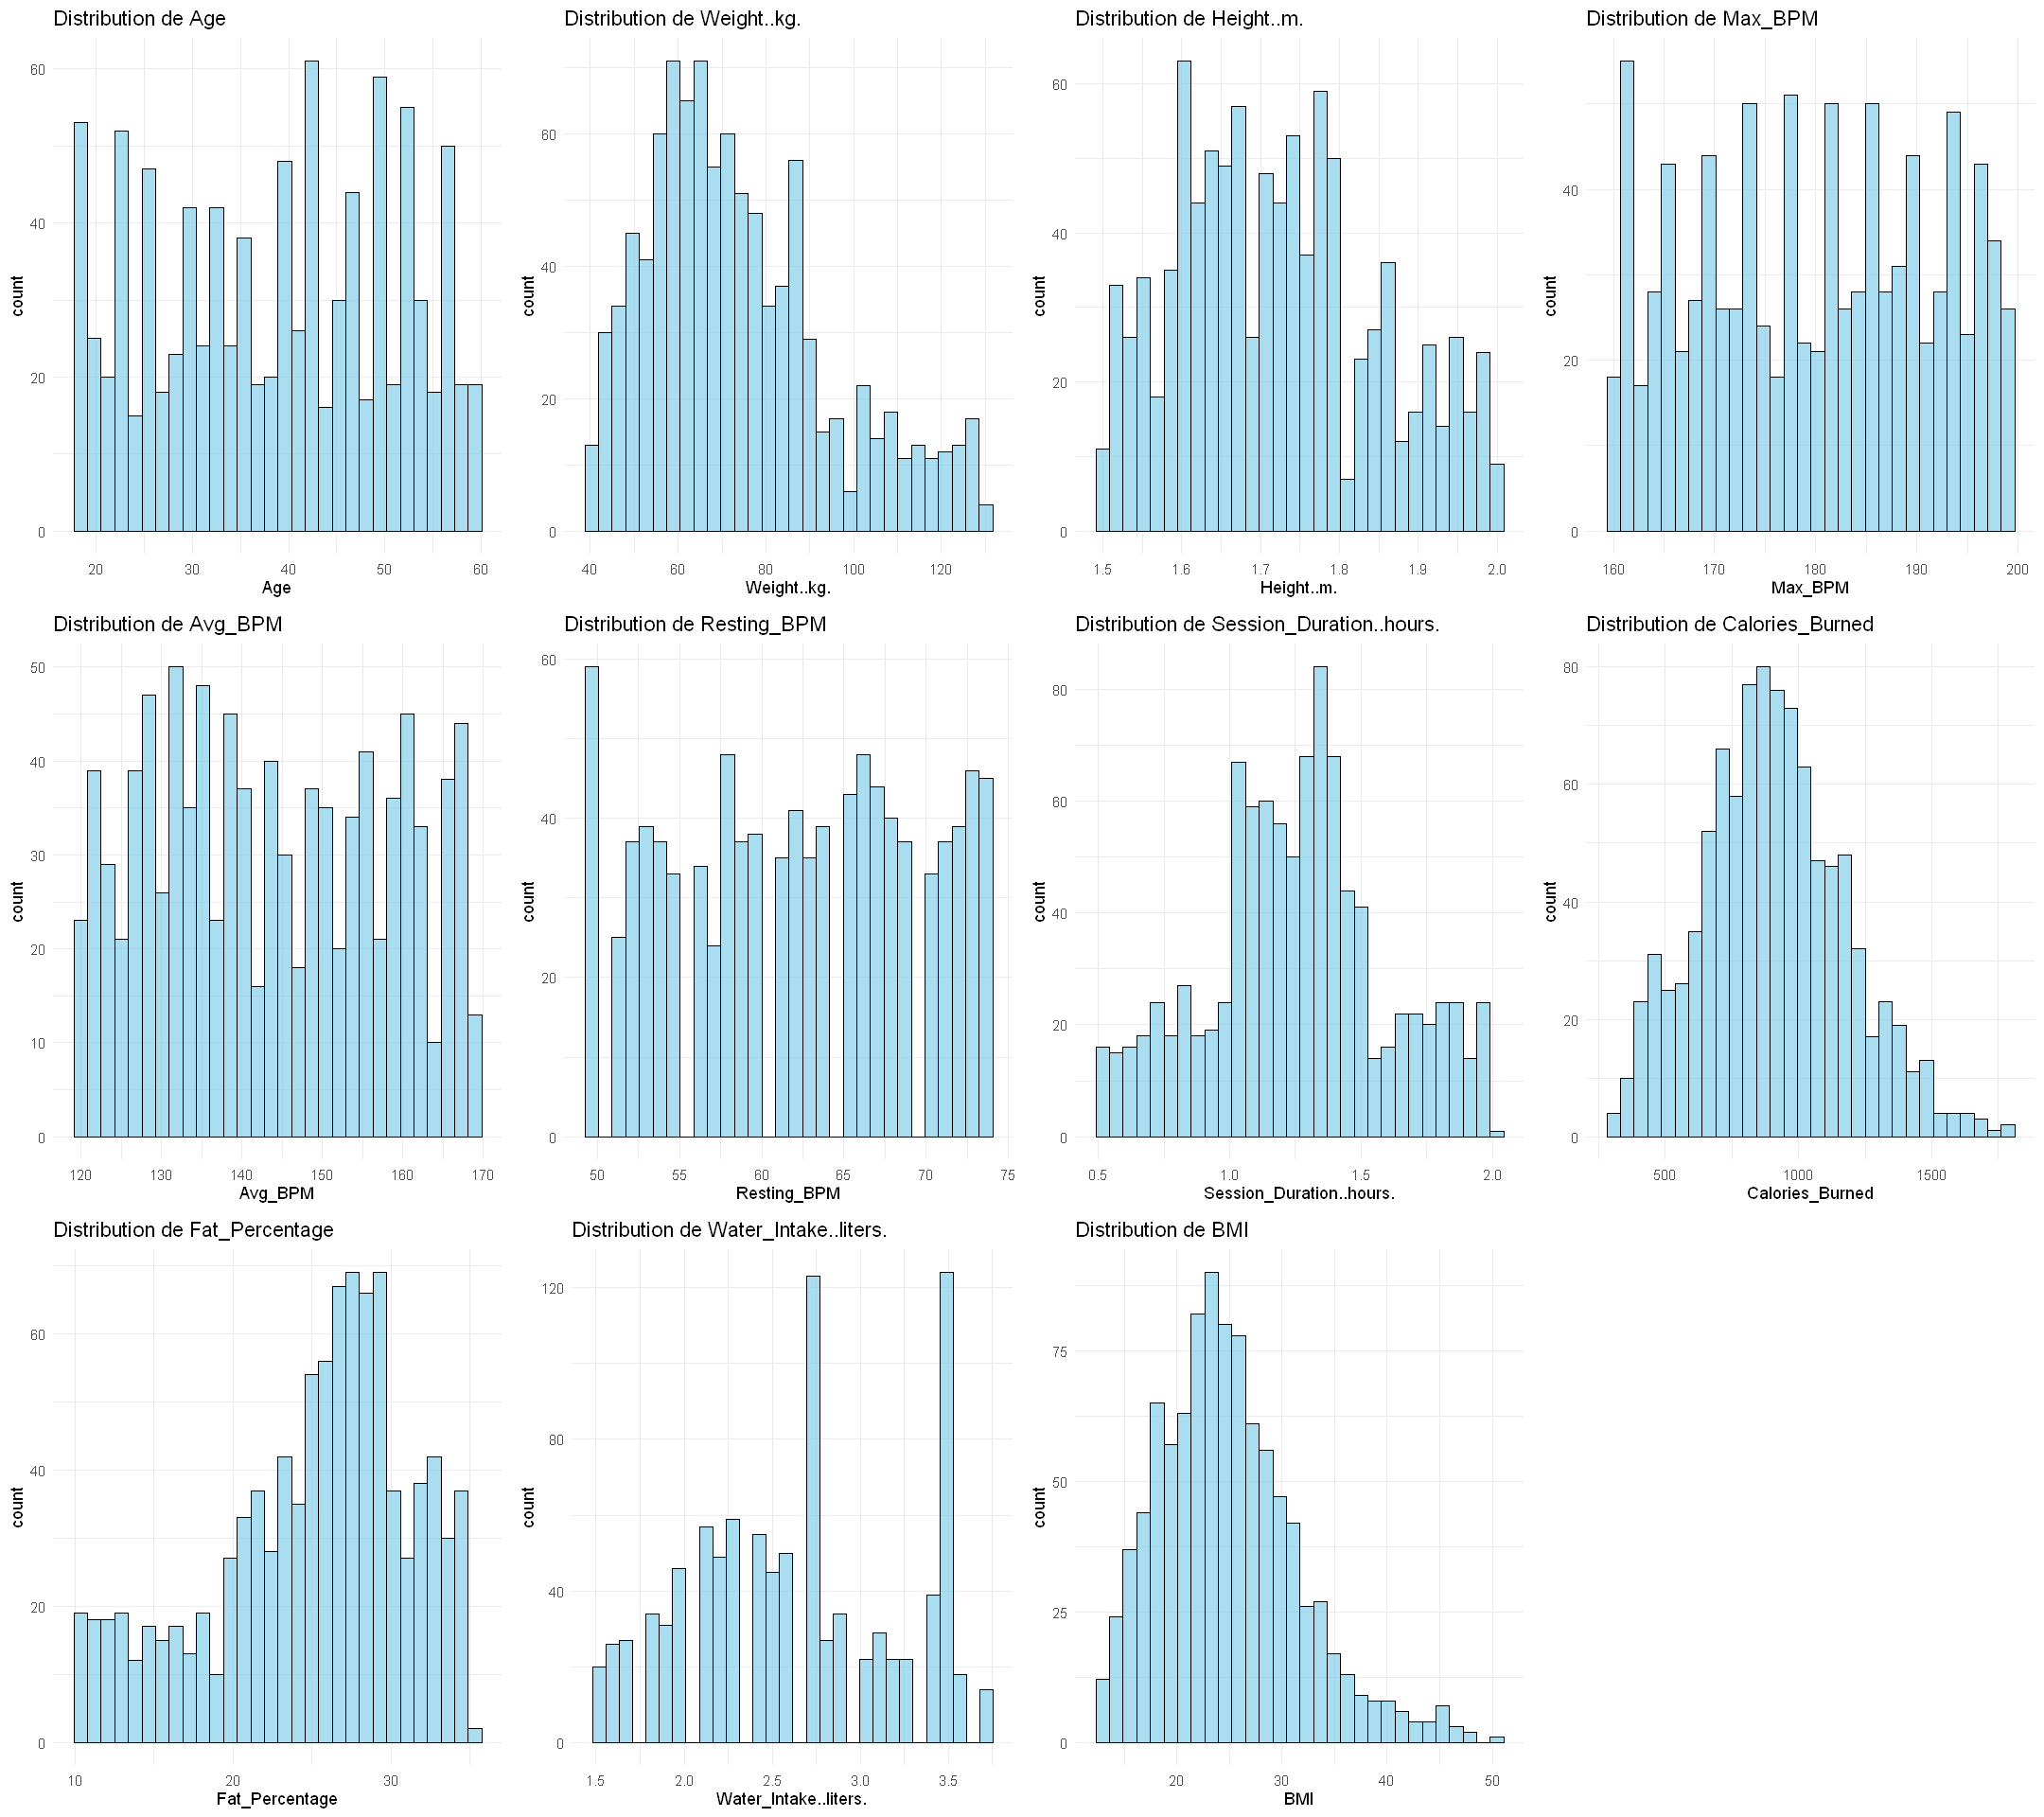

In [55]:
p <- list()

for (col in num_cols) {
  p[[col]] <- ggplot(df, aes(x = !!sym(col))) +  
    geom_histogram(aes(y = after_stat(count)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +   
    #geom_density(aes(y = after_stat(density * nrow(df) * (max(df[[col]], na.rm = TRUE) - min(df[[col]], na.rm = TRUE)) / 20)), color = "red", size = 1) +  
    labs(title = paste("Distribution de", col)) + 
    theme_minimal()
}
options(repr.plot.width = 18, repr.plot.height = 16)
plot_grid(plotlist = p, ncol = 4)  

**La médiane, l’étendue interquartile et d’éventuels outliers**

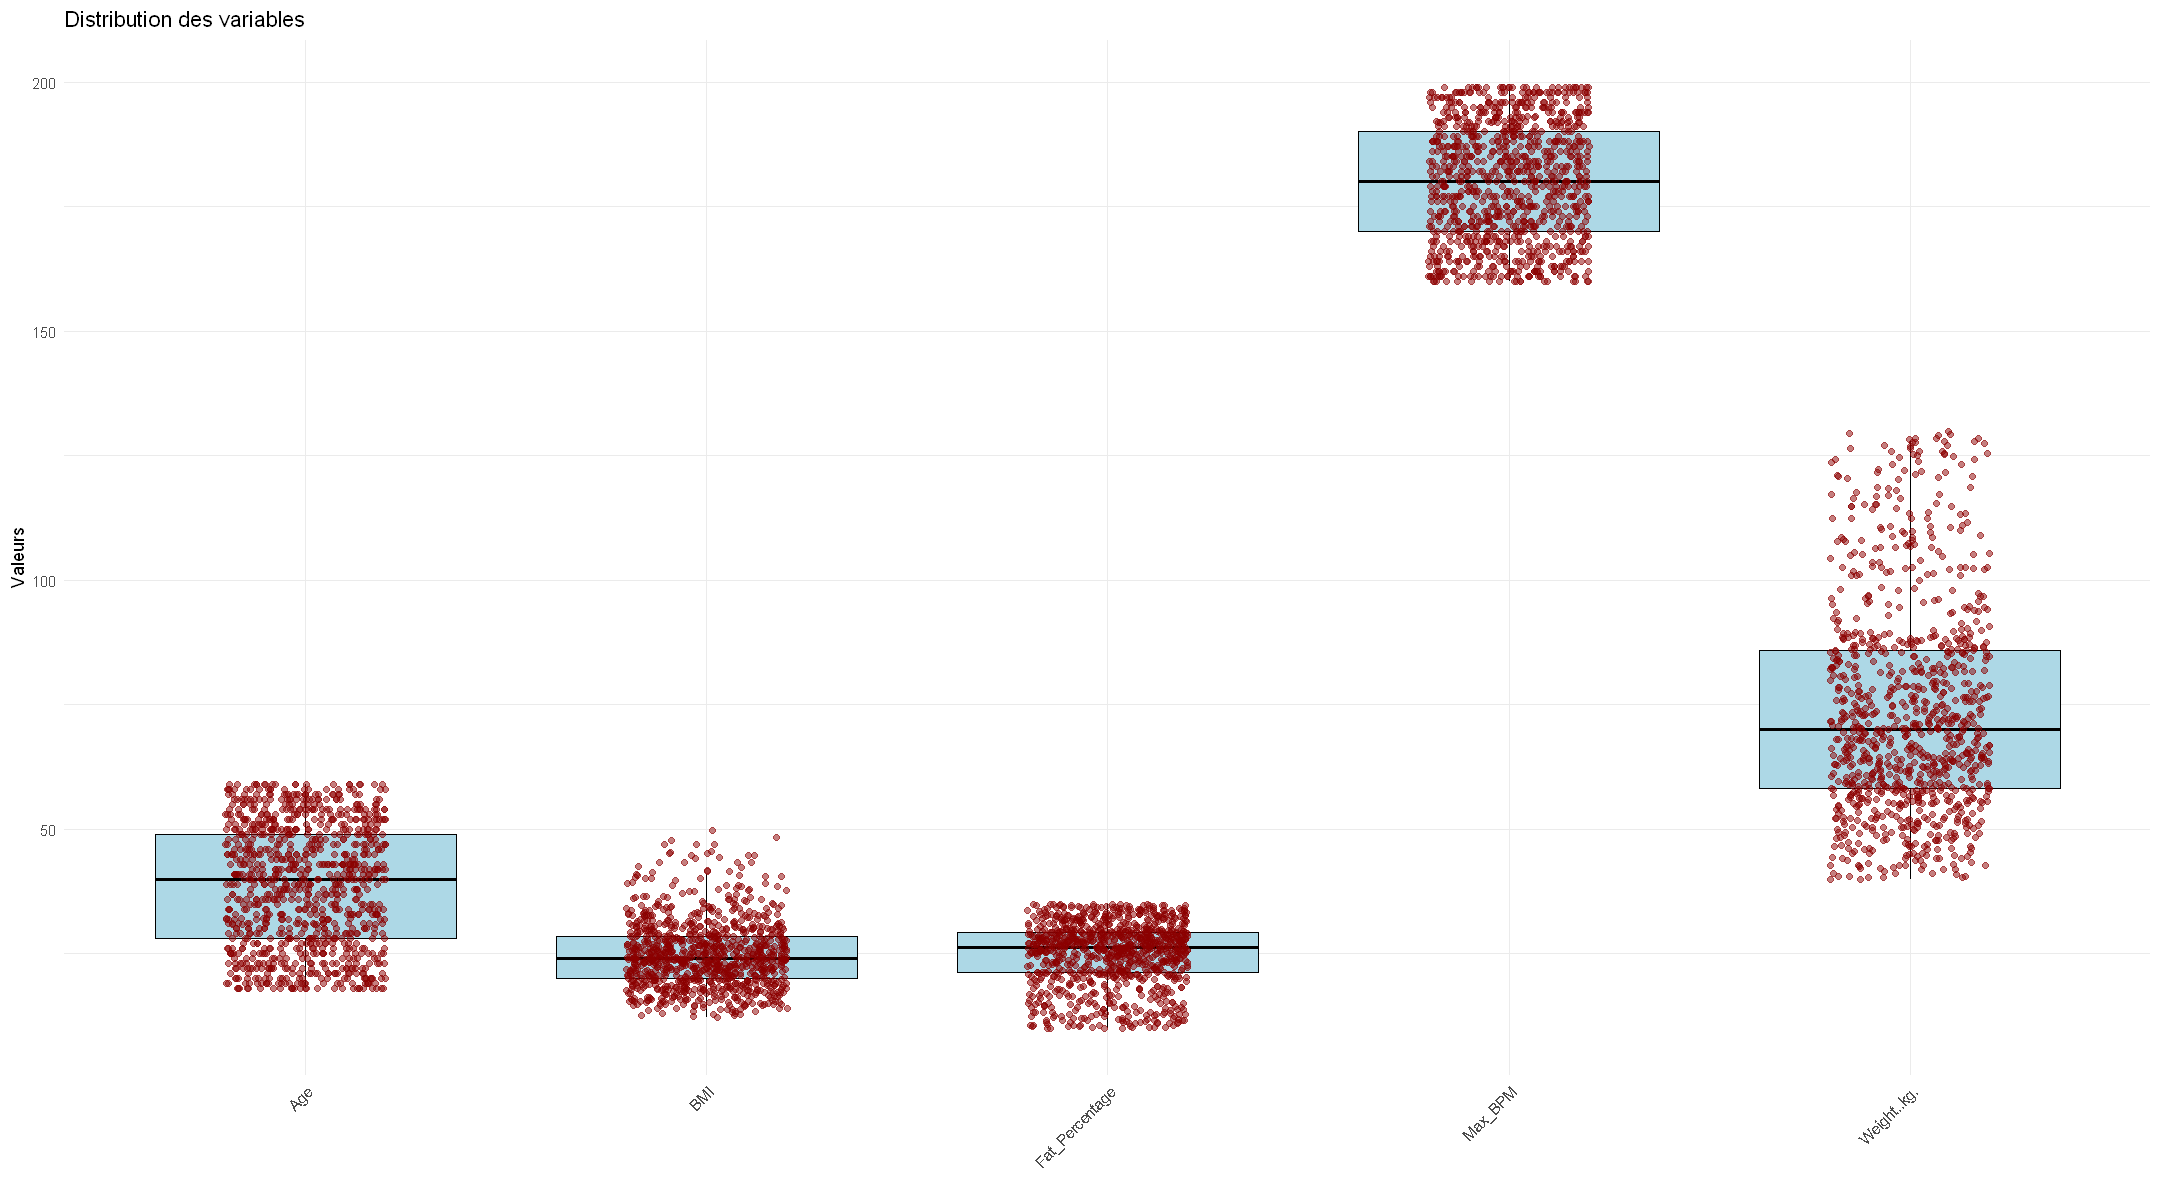

In [57]:
box_cols = c("Age", "Weight..kg.", "Max_BPM", "Fat_Percentage", "BMI" )

num_long <- num[box_cols] %>% 
  pivot_longer( cols = everything(), names_to = "Variable", values_to = "Valeur")
options(repr.plot.width = 18, repr.plot.height = 10)

ggplot(num_long, aes(x = Variable, y = Valeur)) +
  geom_boxplot(
    fill = "lightblue", 
    color = "black", 
    outlier.shape = NA
  ) +  
  geom_jitter(width = 0.2, alpha = 0.5, color = "darkred", size = 1.5 ) +
  labs( title = "Distribution des variables", x = "", y = "Valeurs" ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

$\rightarrow$ Les variables quantitatives ont des moyennes et des variances différentes, il est donc nécessaire de les normaliser (ou les standardiser) avant d'appliquer des méthodes sensibles à l’échelle des données, comme la régression linéaire, le SVM ou les réseaux de neurones.

- **Test de la normalité**

In [22]:
for (col in num_cols){
    print(paste("P-valeur de le test de Shapiro avec la variable ", col, ":" , shapiro.test(num[,col])$p.value))
}


[1] "P-valeur de le test de Shapiro avec la variable  Age : 1.46785906271979e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Weight..kg. : 6.71695149569448e-19"
[1] "P-valeur de le test de Shapiro avec la variable  Height..m. : 2.1587709686282e-13"
[1] "P-valeur de le test de Shapiro avec la variable  Max_BPM : 6.42339692841957e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Avg_BPM : 4.82916062930109e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Resting_BPM : 1.13008435558791e-17"
[1] "P-valeur de le test de Shapiro avec la variable  Session_Duration..hours. : 3.50874865325256e-08"
[1] "P-valeur de le test de Shapiro avec la variable  Calories_Burned : 2.98249297630421e-05"
[1] "P-valeur de le test de Shapiro avec la variable  Fat_Percentage : 6.90289911678495e-18"
[1] "P-valeur de le test de Shapiro avec la variable  Water_Intake..liters. : 8.09672404832902e-17"
[1] "P-valeur de le test de Shapiro avec la variable  BMI : 1.43964092930437e-14"


$\rightarrow$ Au niveau 5%, tous les variables quantitatives ne suivent pas la loi normale $\Rightarrow$ il faut transformer quelques variables quantitatives

### <FONT COLOR="Blue">2.2. Variables qualitatives</font>

En suite, on observe la distribution des variables qualitatives

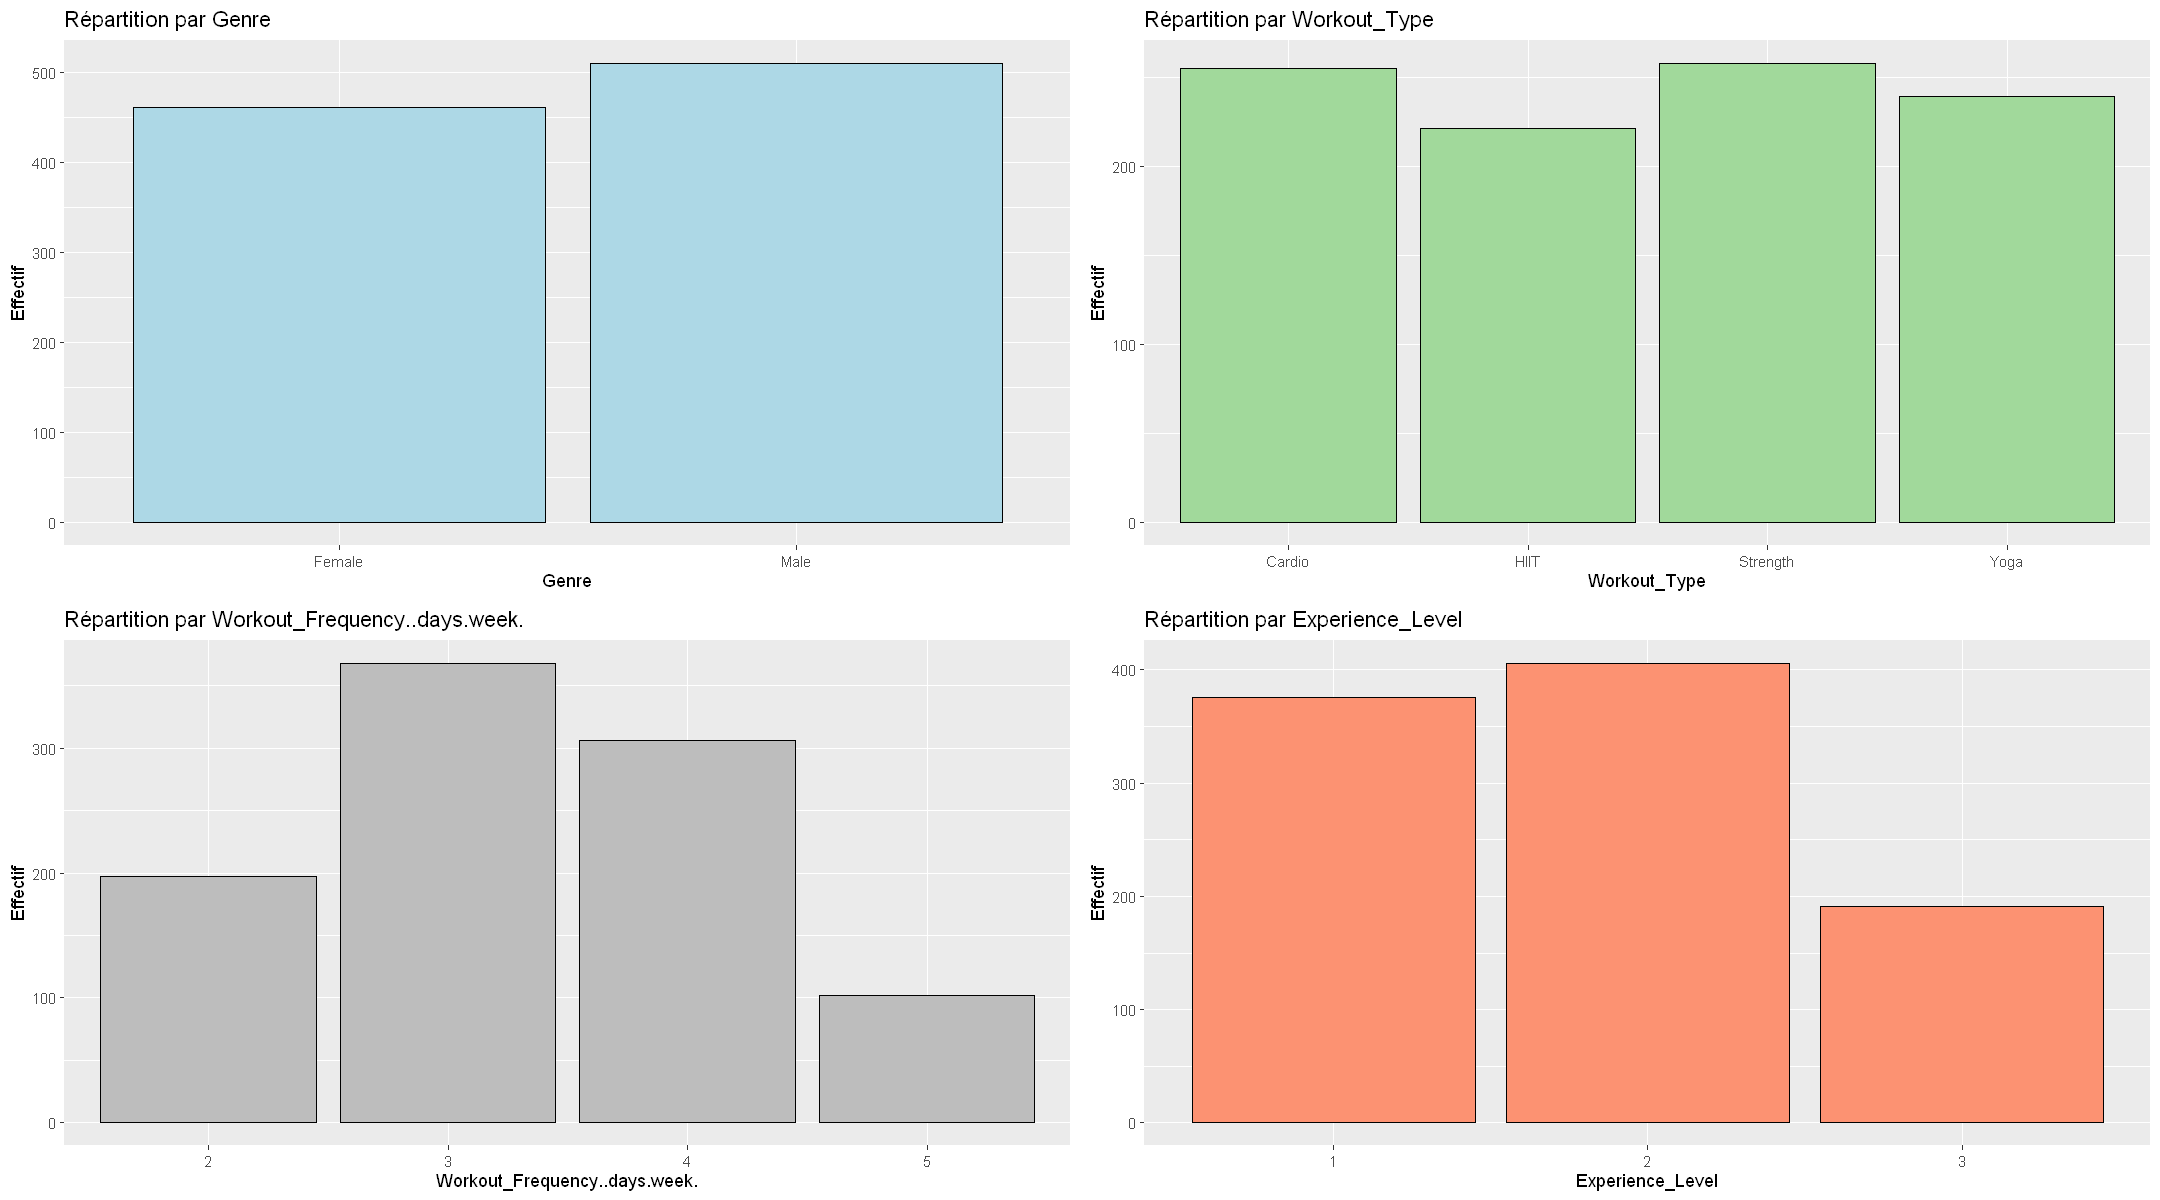

In [60]:
box_cat1 = ggplot(data, aes(x = Gender)) +
  geom_bar(fill = "lightblue", color = "black") + 
  labs(title = "Répartition par Genre", x = "Genre", y = "Effectif")
box_cat2 = ggplot(data, aes(x = Workout_Type)) +
  geom_bar(fill = brewer.pal(9, "Greens")[4], color = "black") +  
  labs(title = "Répartition par Workout_Type", x = "Workout_Type", y = "Effectif")
box_cat3 = ggplot(data, aes(x = Workout_Frequency..days.week.)) +
  geom_bar(fill = brewer.pal(9, "Greys")[4], color = "black") +  
  labs(title = "Répartition par Workout_Frequency..days.week.", x = "Workout_Frequency..days.week.", y = "Effectif")
box_cat4 = ggplot(data, aes(x = Experience_Level)) +
  geom_bar(fill = brewer.pal(9, "Reds")[4], color = "black") +  
  labs(title = "Répartition par Experience_Level", x = "Experience_Level", y = "Effectif")
options(repr.plot.width = 18, repr.plot.height = 10)

grid.arrange(box_cat1,box_cat2, box_cat3, box_cat4, ncol = 2)

$\rightarrow$ Les modalités des variables qualitatives sont à peu près équivalentes : il n’y a pas de modalité très rare ni de modalité majoritaire.

## <FONT COLOR="Orange">3. Analyse descriptive bidimensionnelle</font>

### <FONT COLOR="Blue">3.1. Variable quantitative vs variable quantitative</font>

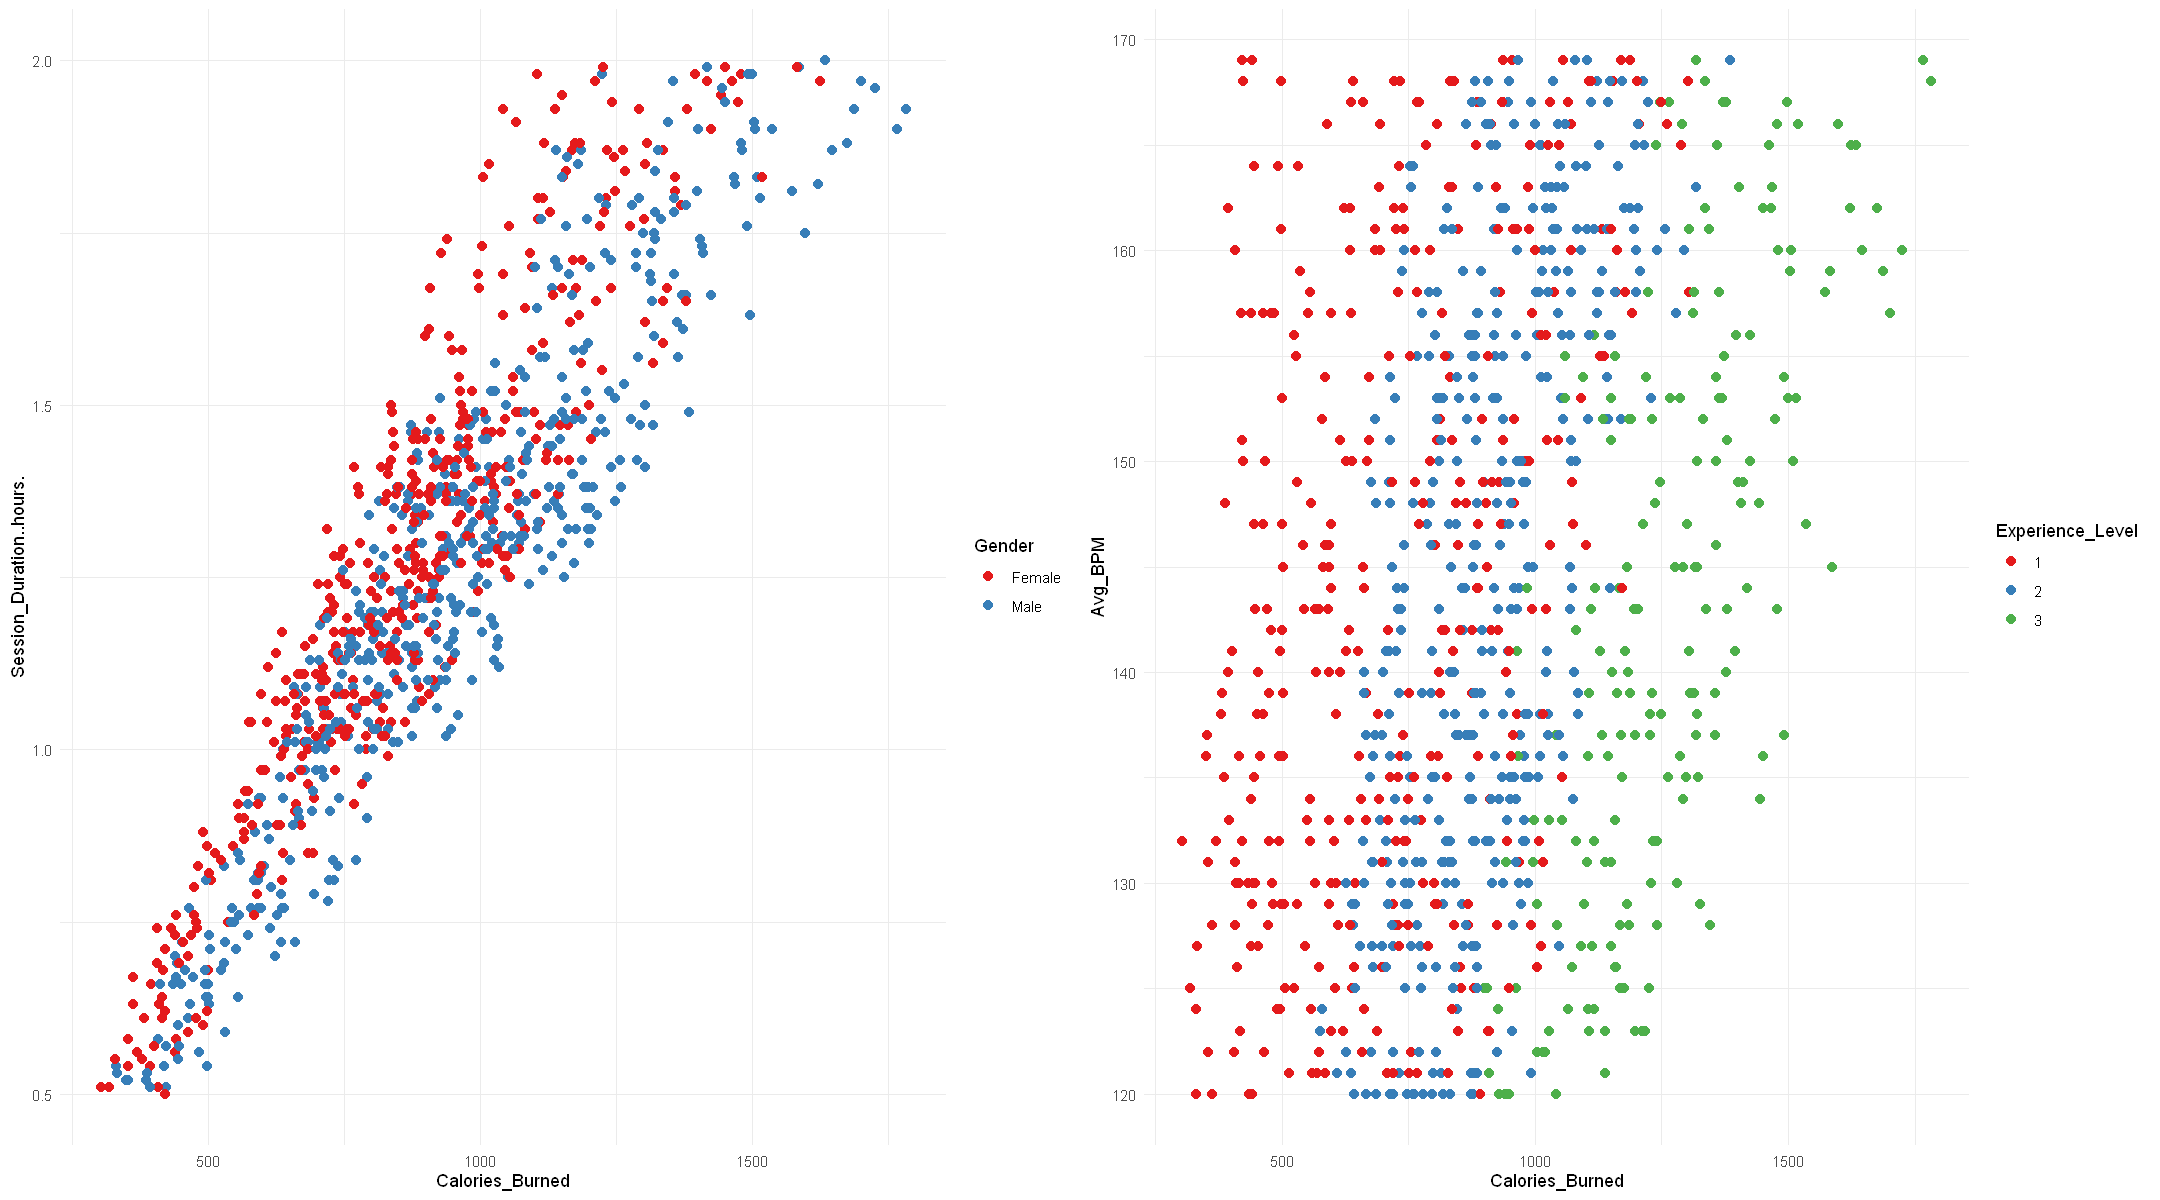

In [111]:
options(repr.plot.width = 18, repr.plot.height = 10)
scat1 = ggplot(data = data, aes(x = Calories_Burned, y = Session_Duration..hours., color = Gender)) +
  geom_point(size = 2.5) +
  labs(x = "Calories_Burned", y = "Session_Duration..hours.") +
  scale_color_brewer(type = "qual", palette = "Set1") +
  theme_minimal()
scat2 = ggplot(data = data) +
  geom_point(aes(x = Calories_Burned, y = Avg_BPM, color = Experience_Level), size = 2.5) +
  labs(x = "Calories_Burned", y = "Avg_BPM") +
  scale_color_brewer(type = "qual", palette = "Set1") +
  theme_minimal()
grid.arrange(scat1, scat2, ncol = 2)

- **Corrélation graphe**

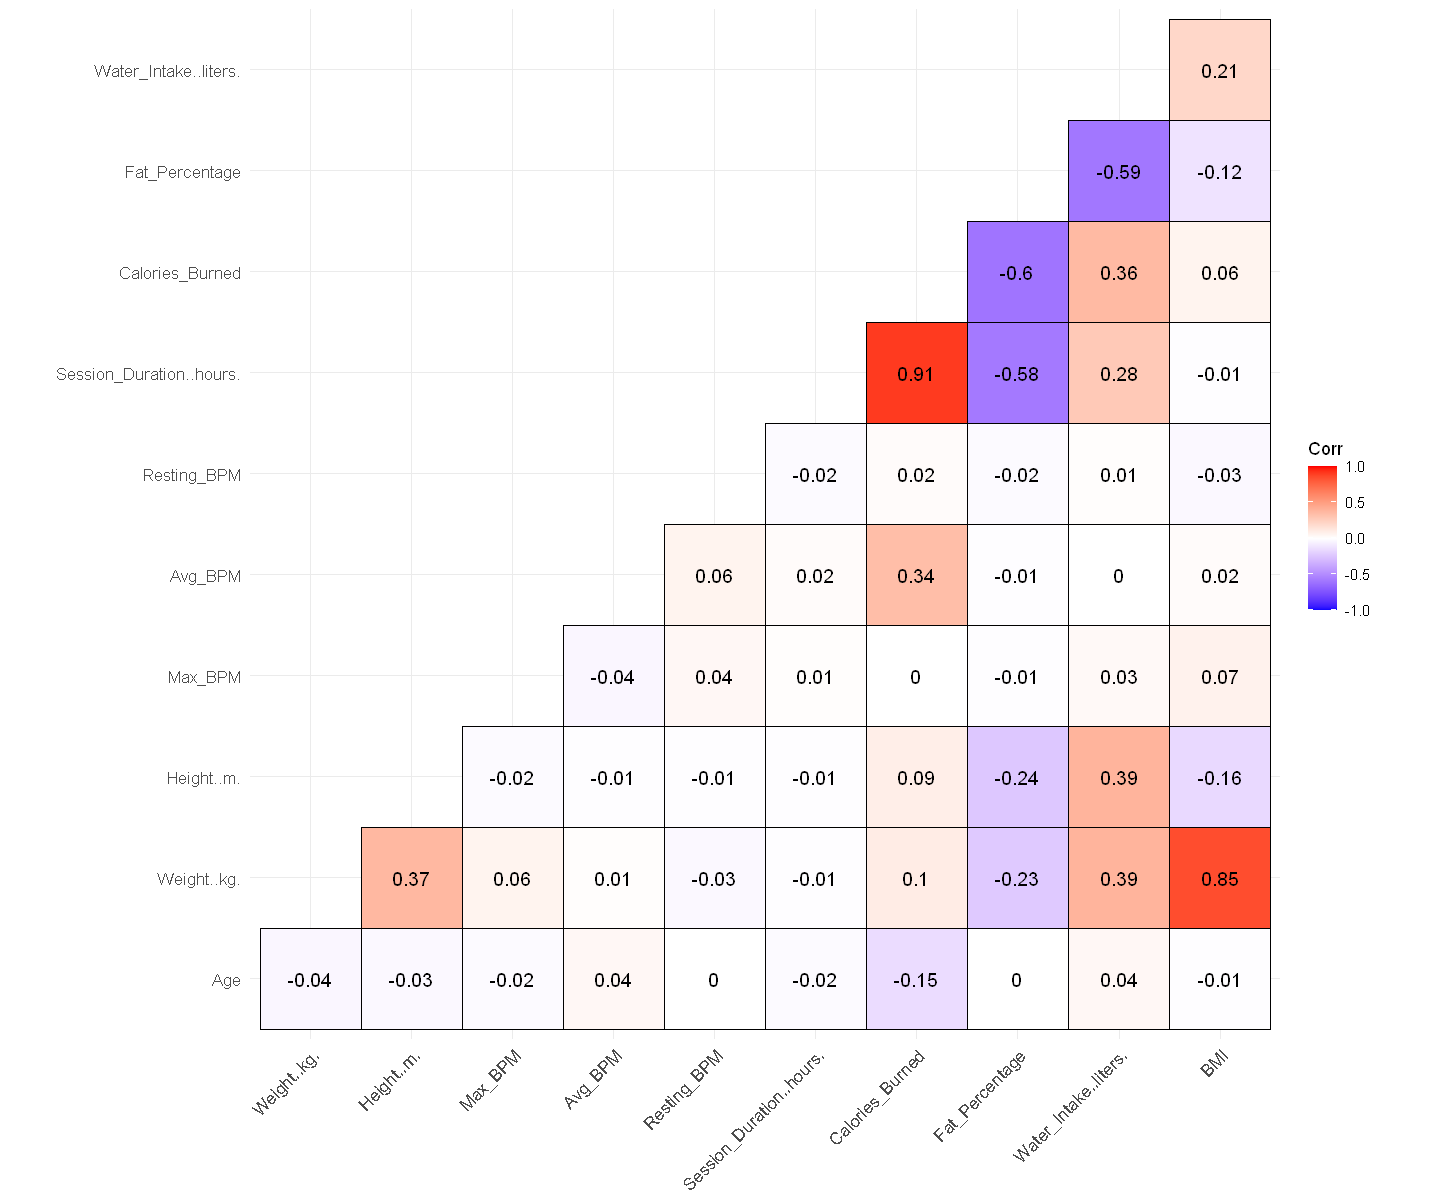

In [113]:
options(repr.plot.width = 12, repr.plot.height = 10)

ggcorrplot(cor(num), 
           method = "square",
           type = "lower",
           lab = TRUE,
           colors = c("blue", "white", "red"),
           outline.color = "black",
           tl.cex = 10)

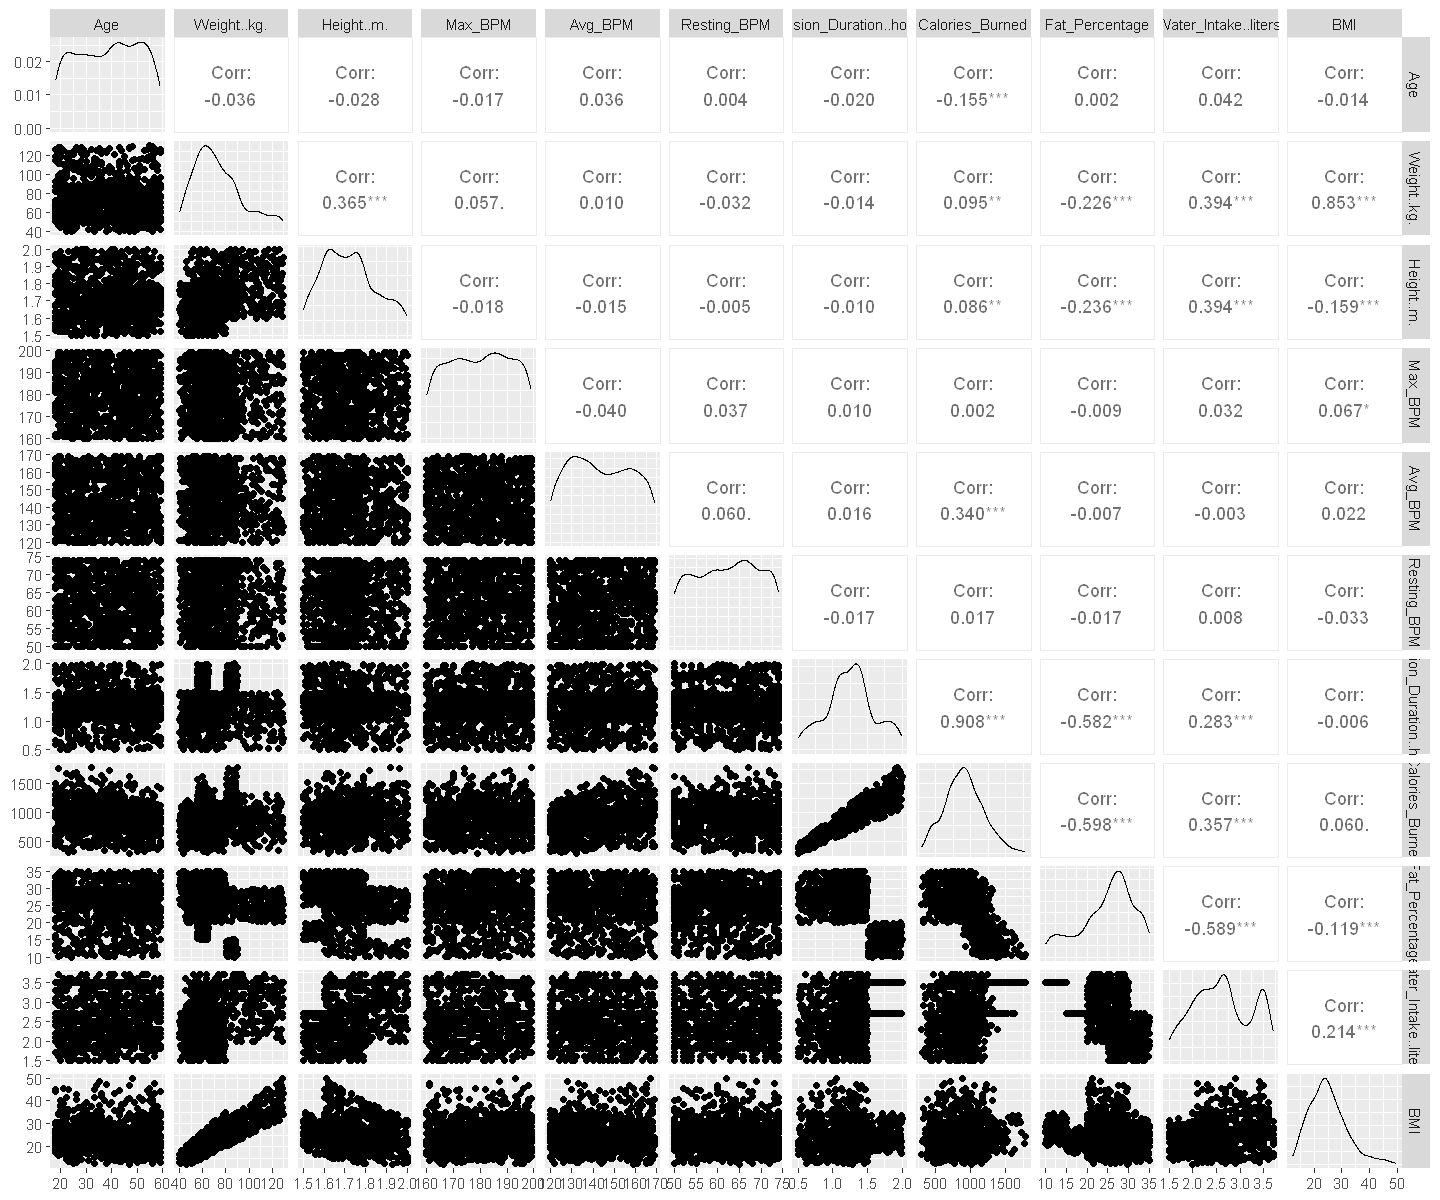

In [115]:
options(repr.plot.width = 12, repr.plot.height = 10)
ggpairs(num)

$\rightarrow$ Corrélation forte et positive avec `Session_Duration.hours.` +0.91 : Plus une personne passe de temps à s'entraîner, plus elle brûle de calories.  
$\rightarrow$ Corrélation modérément négative avec `Fat_Percentage` -0.60 : Les individus qui brûlent plus de calories tendent à avoir un pourcentage de masse grasse plus bas.  
$\rightarrow$ Corrélation légèrement négative avec `BMI` et `Weight_kg` : Cela suggère que les individus qui brûlent plus de calories ne sont pas nécessairement les plus lourds.  
$\rightarrow$ Relativement indépendant des `BPMs`.


### <FONT COLOR="Blue">3.2 Variable qualitative vs variable qualitative</font>

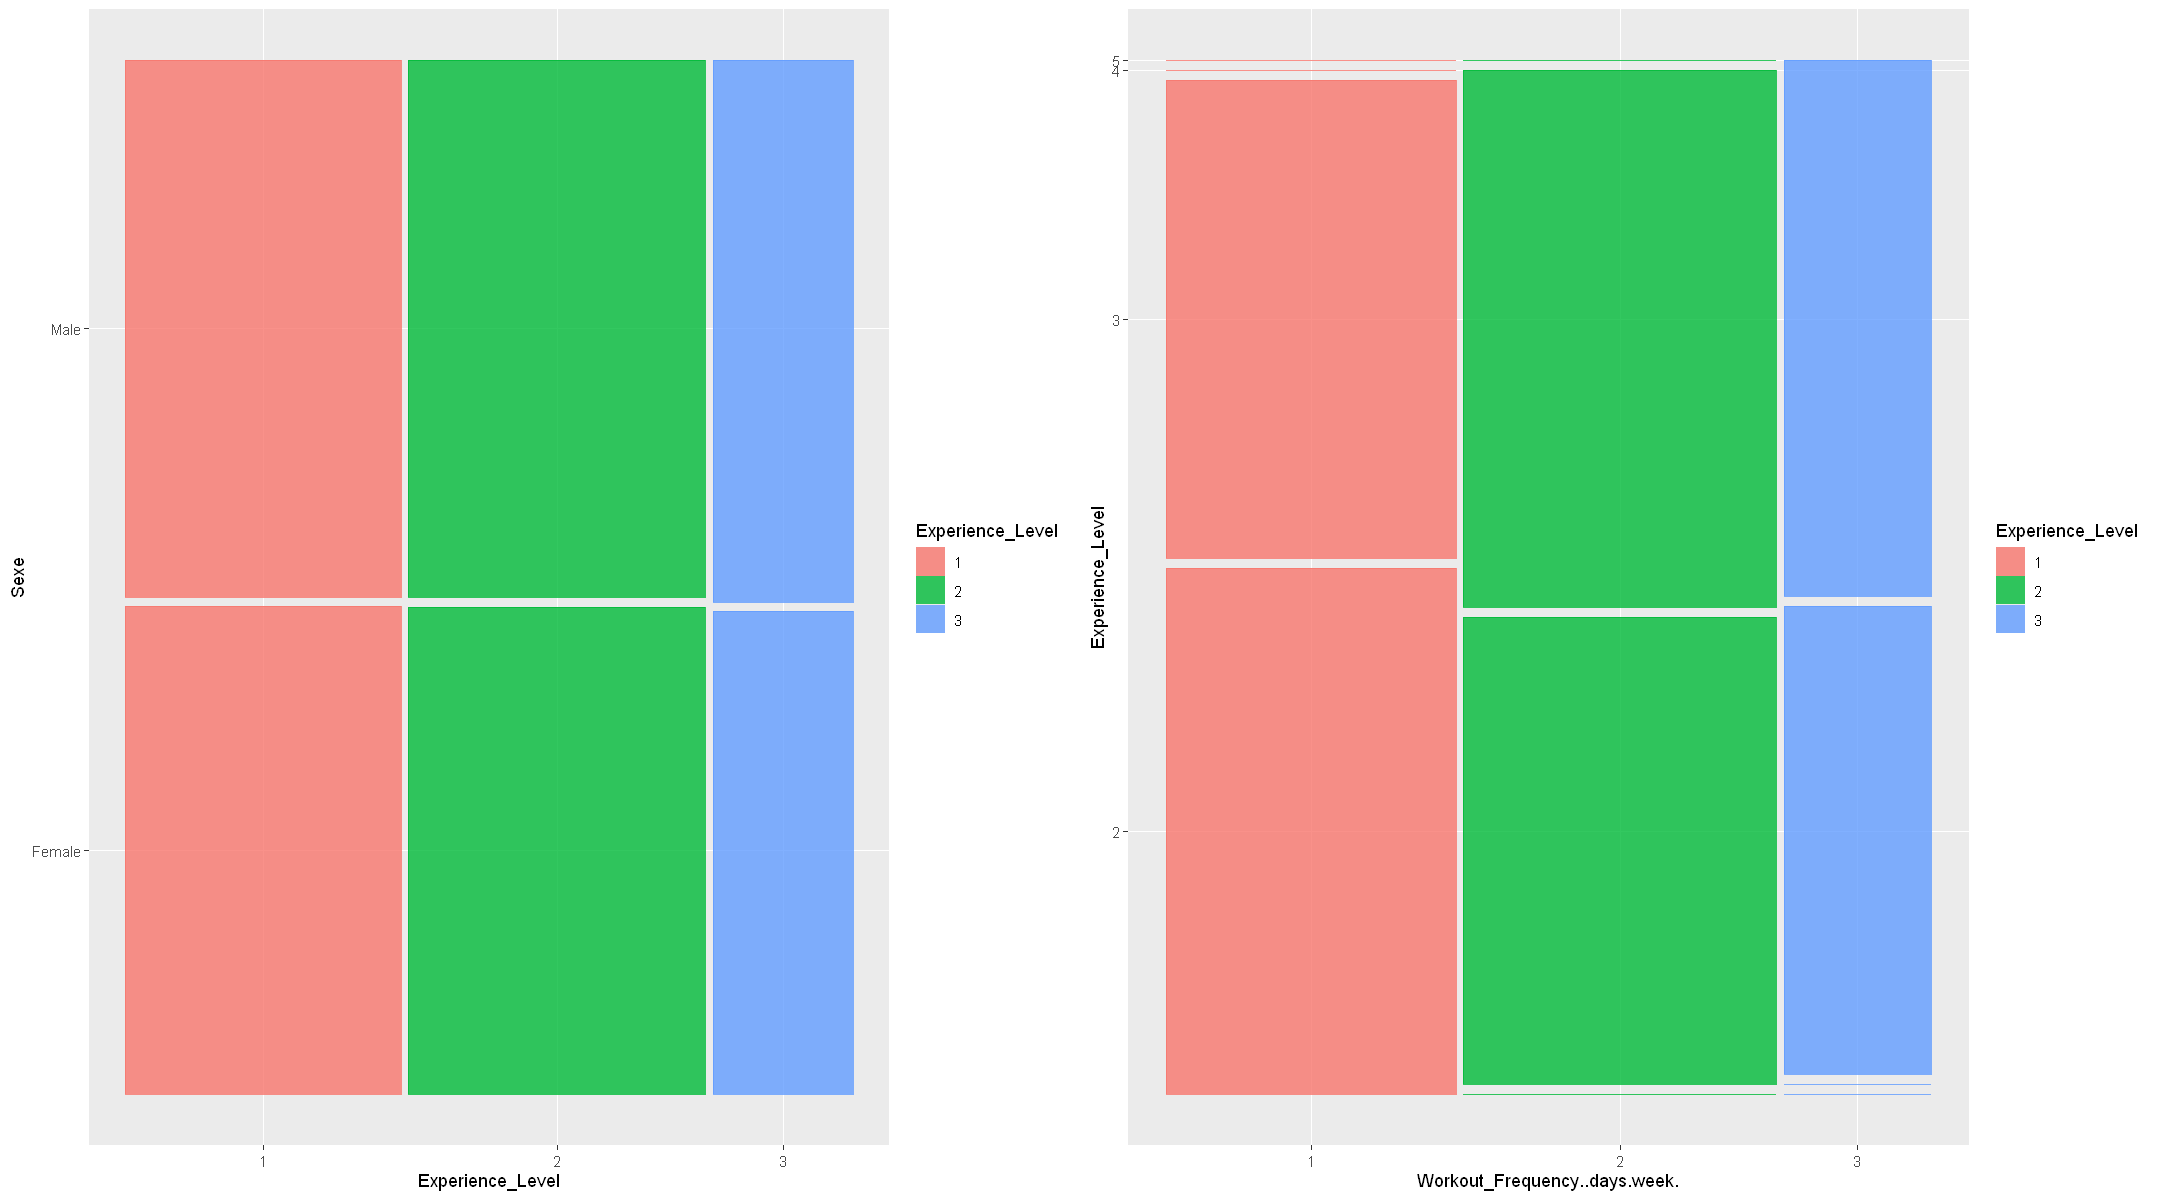

In [123]:
mos1 = ggplot(data = data)+
geom_mosaic(aes(x = product(Gender,Experience_Level), fill = Experience_Level))+
labs(x = "Experience_Level", y = "Sexe")
mos2 = ggplot(data = data)+
geom_mosaic(aes(x = product(Workout_Frequency..days.week. ,Experience_Level), fill = Experience_Level ))+
labs(x = "Workout_Frequency..days.week.", y = "Experience_Level")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(mos1, mos2, ncol = 2)

$\rightarrow$ Le niveau d'expérience (Experience_Level) ne dépend pas fortement du genre (Gender) ni de la fréquence des entraînements (Workout_Frequency..days.week).

### <FONT COLOR="Blue">3.3. Variable qualitative vs variable quantitative</font>

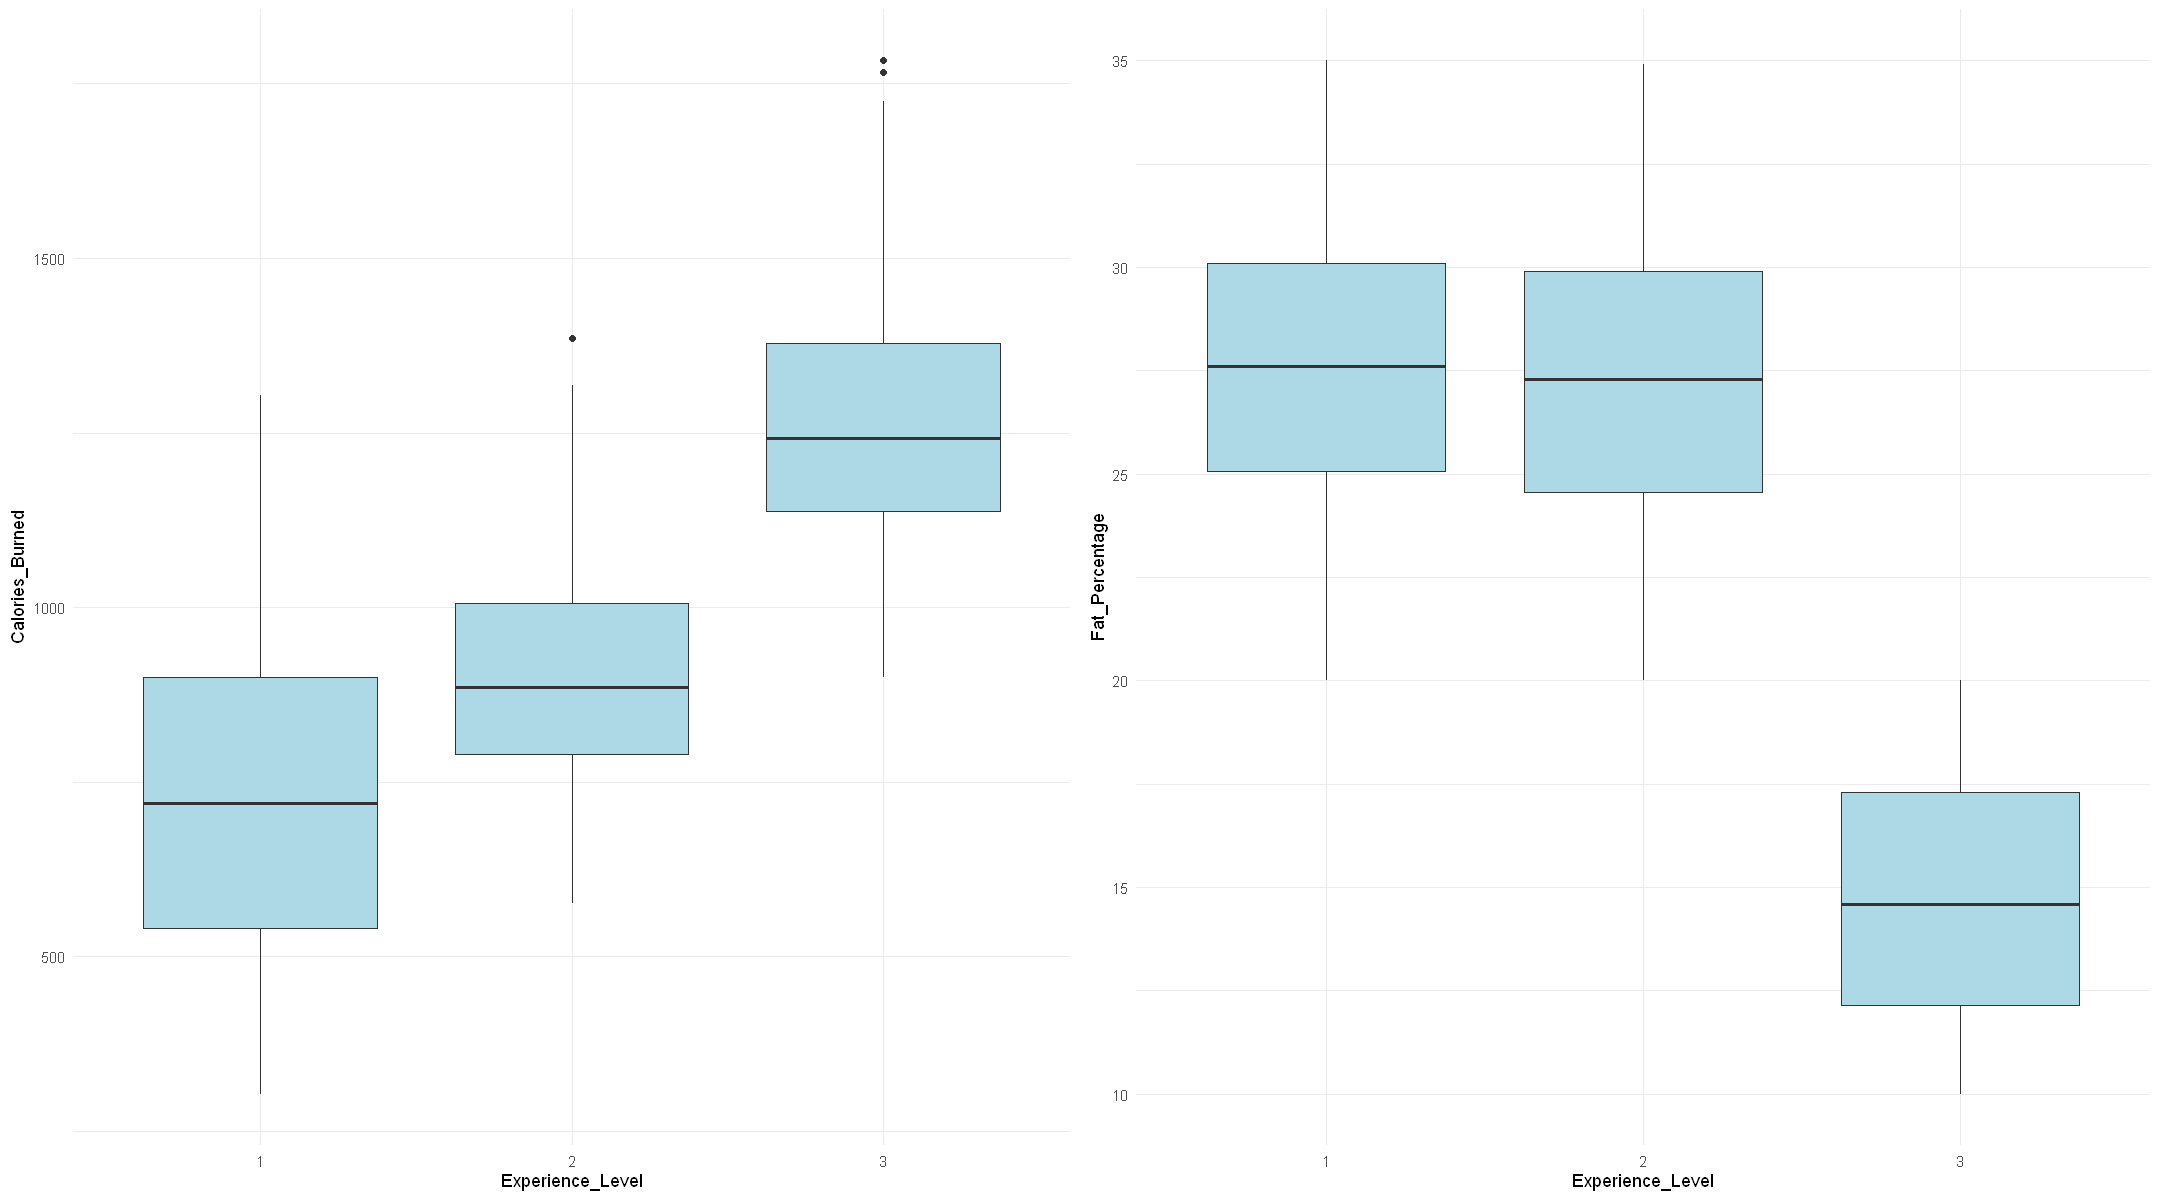

In [129]:
box2 = ggplot(data)+
geom_boxplot(aes(x = Experience_Level, y = Fat_Percentage), fill = "lightblue")+
theme_minimal()
box1 = ggplot(data)+
geom_boxplot(aes(x = Experience_Level , y = Calories_Burned  ), fill = "lightblue")+
theme_minimal()

grid.arrange(box1,box2, ncol = 2)

$\rightarrow$ Calories_Burned vs Experience_Level
- Les calories brûlées augmentent clairement avec le niveau d’expérience.
- Niveau 1 (débutant) : médiane basse, grande variabilité.
- Niveau 2 (intermédiaire) : médiane plus élevée, variabilité modérée.
- Niveau 3 (avancé) : médiane la plus haute, distribution plus concentrée.

$\rightarrow$ Fat_Percentage vs Experience_Level

- Niveau 1 et 2 : Médiane similaire (autour de 27-28%), variabilité importante.
- Niveau 3 : Médiane nettement plus basse (~15%), distribution plus serrée

$\rightarrow$ Le niveau d'expérience 3 se distingue nettement des deux autres en ce qui concerne les Calories_Burned et le Fat_Percentage.



## <FONT COLOR="Orange">4. Analyse composants principales des variables quantitatives</font>

In [131]:
pca_cols = append(c('Gender', 'Experience_Level') ,num_cols)

In [137]:
res.pca = PCA(data[,pca_cols], scale.unit = TRUE, graph = FALSE, quali.sup =c(1,2), ncp = ncol(num) )

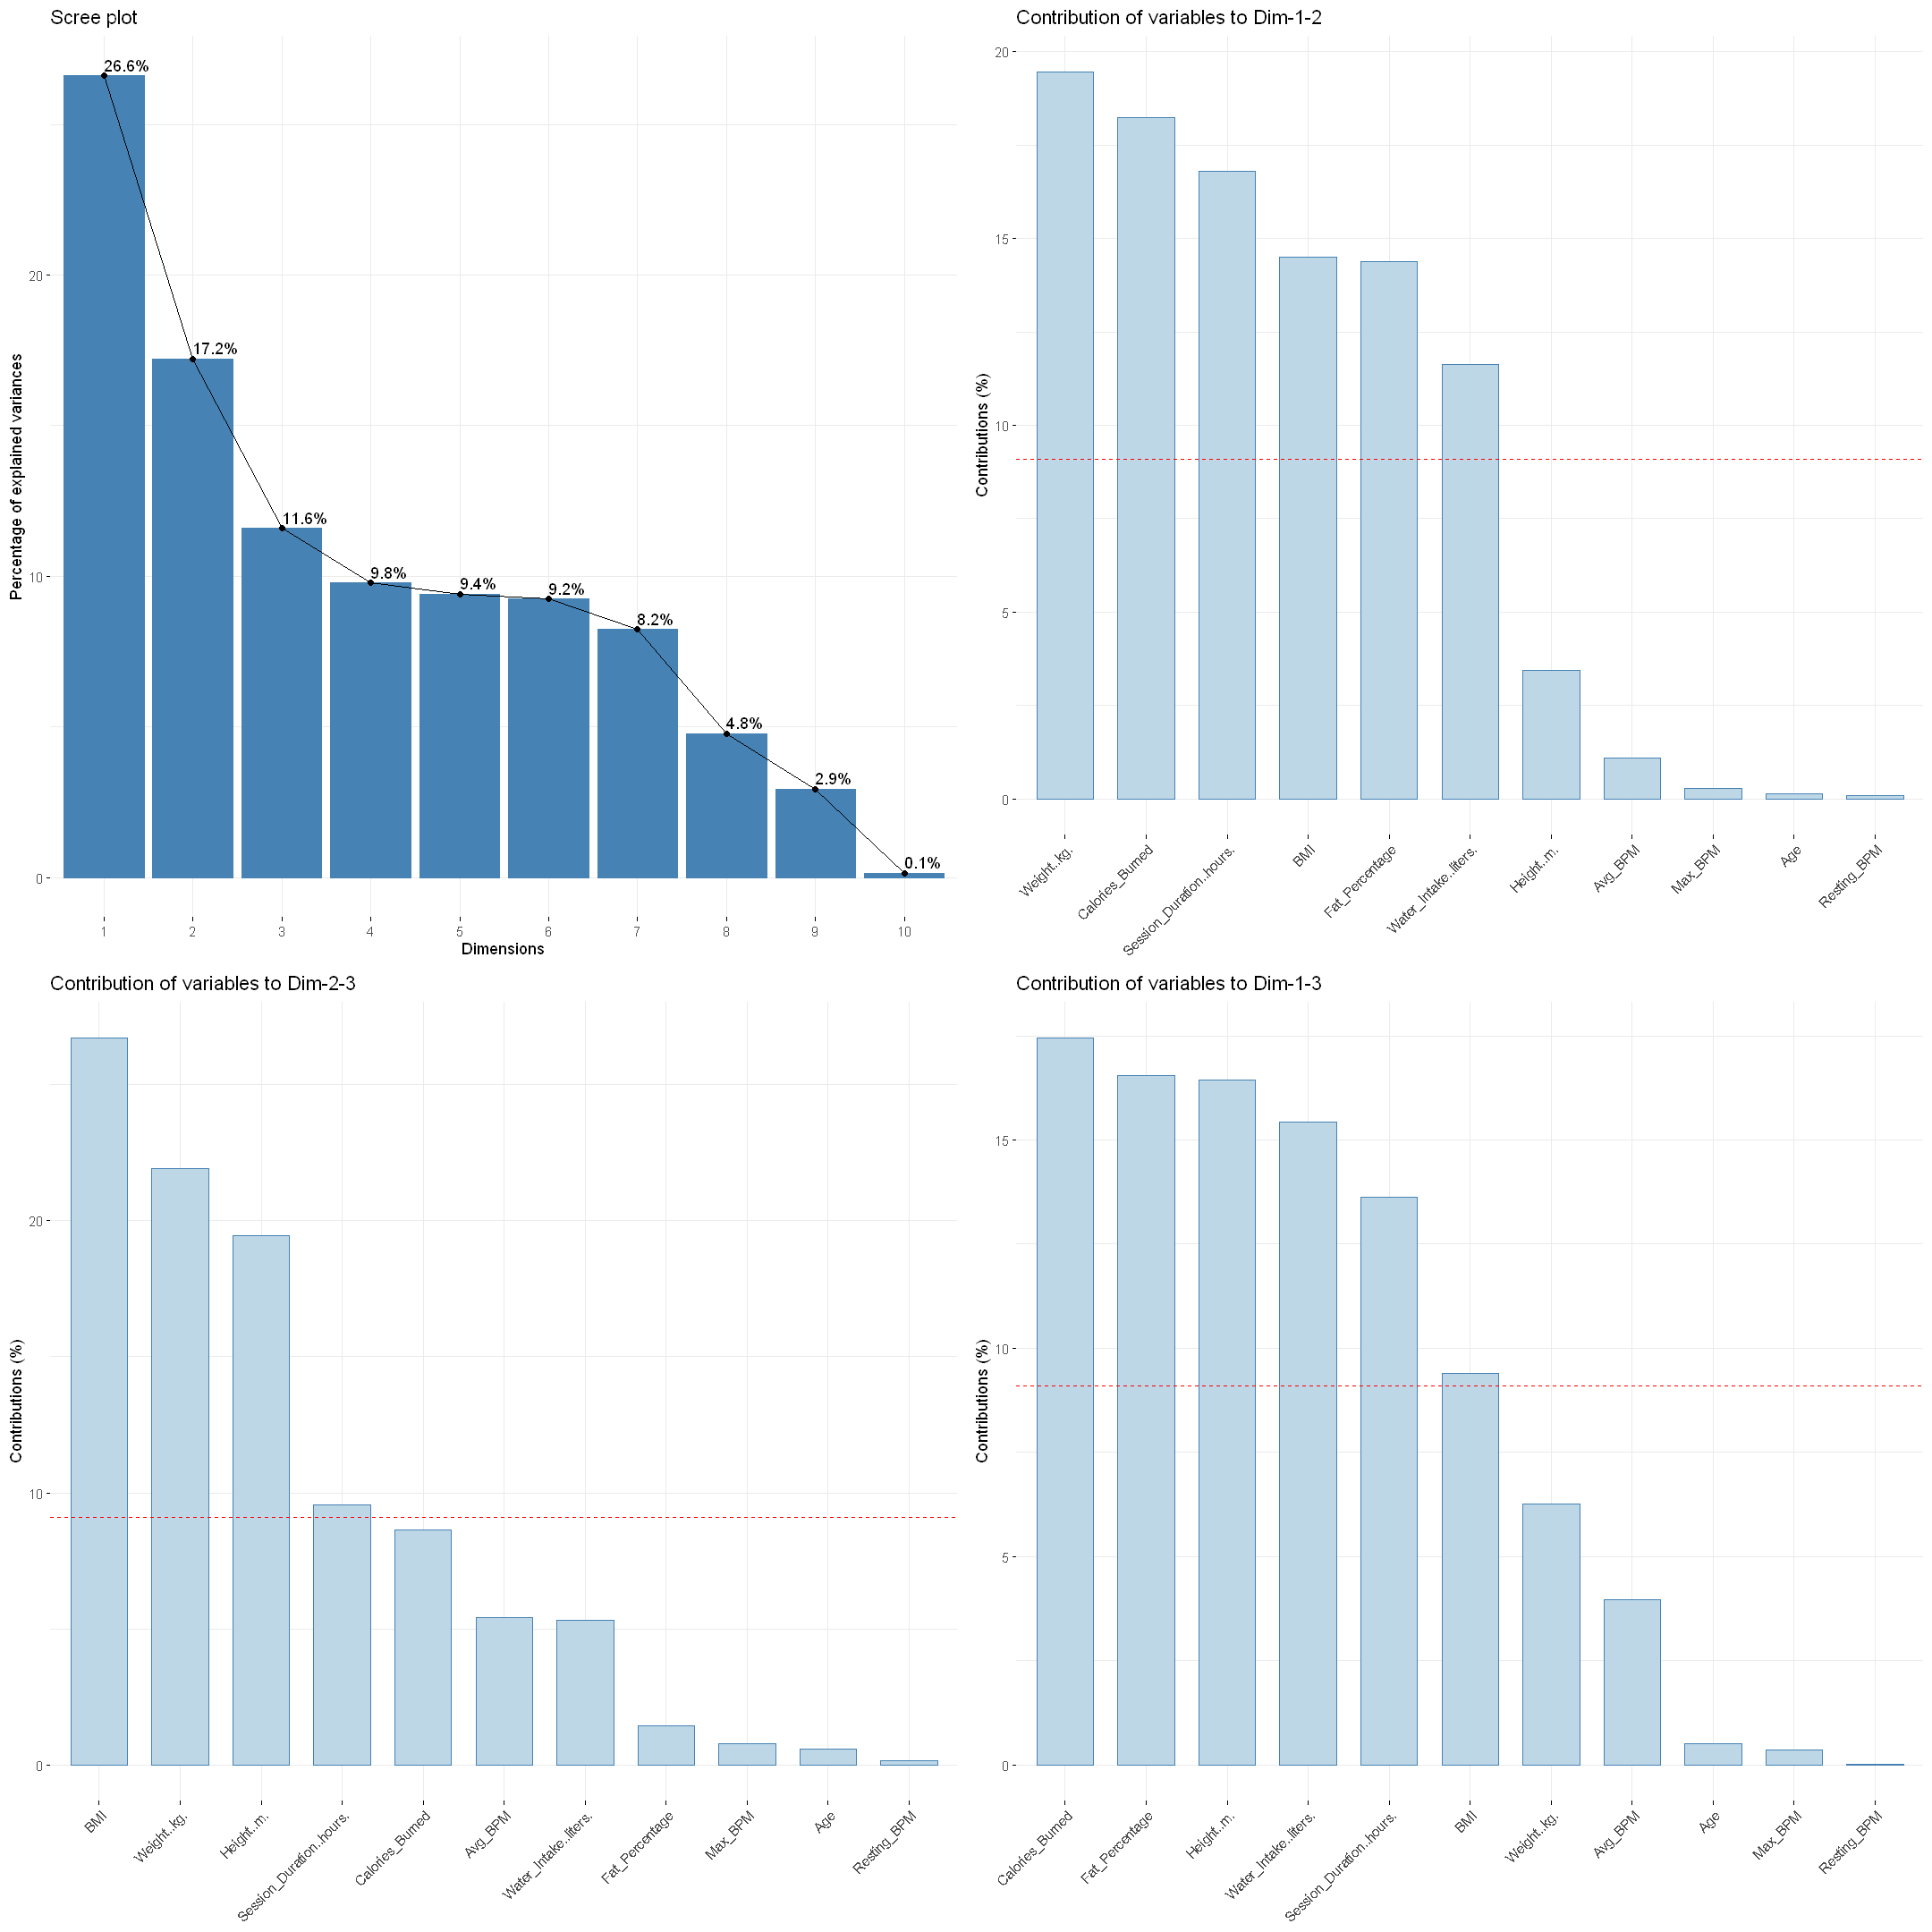

In [139]:
eig_p = fviz_eig(res.pca, addlabels = TRUE)
cont_p12 = fviz_contrib(res.pca, choice = 'var', axes = c(1,2), fill = brewer.pal(5, "Blues")[2])
cont_p23 = fviz_contrib(res.pca, choice = 'var', axes = c(2,3),fill = brewer.pal(5, "Blues")[2])
cont_p13 = fviz_contrib(res.pca, choice = 'var', axes = c(1,3),fill = brewer.pal(5, "Blues")[2])
options(repr.plot.width = 18, repr.plot.height = 18)
grid.arrange(eig_p, cont_p12,cont_p23, cont_p13, ncol = 2)

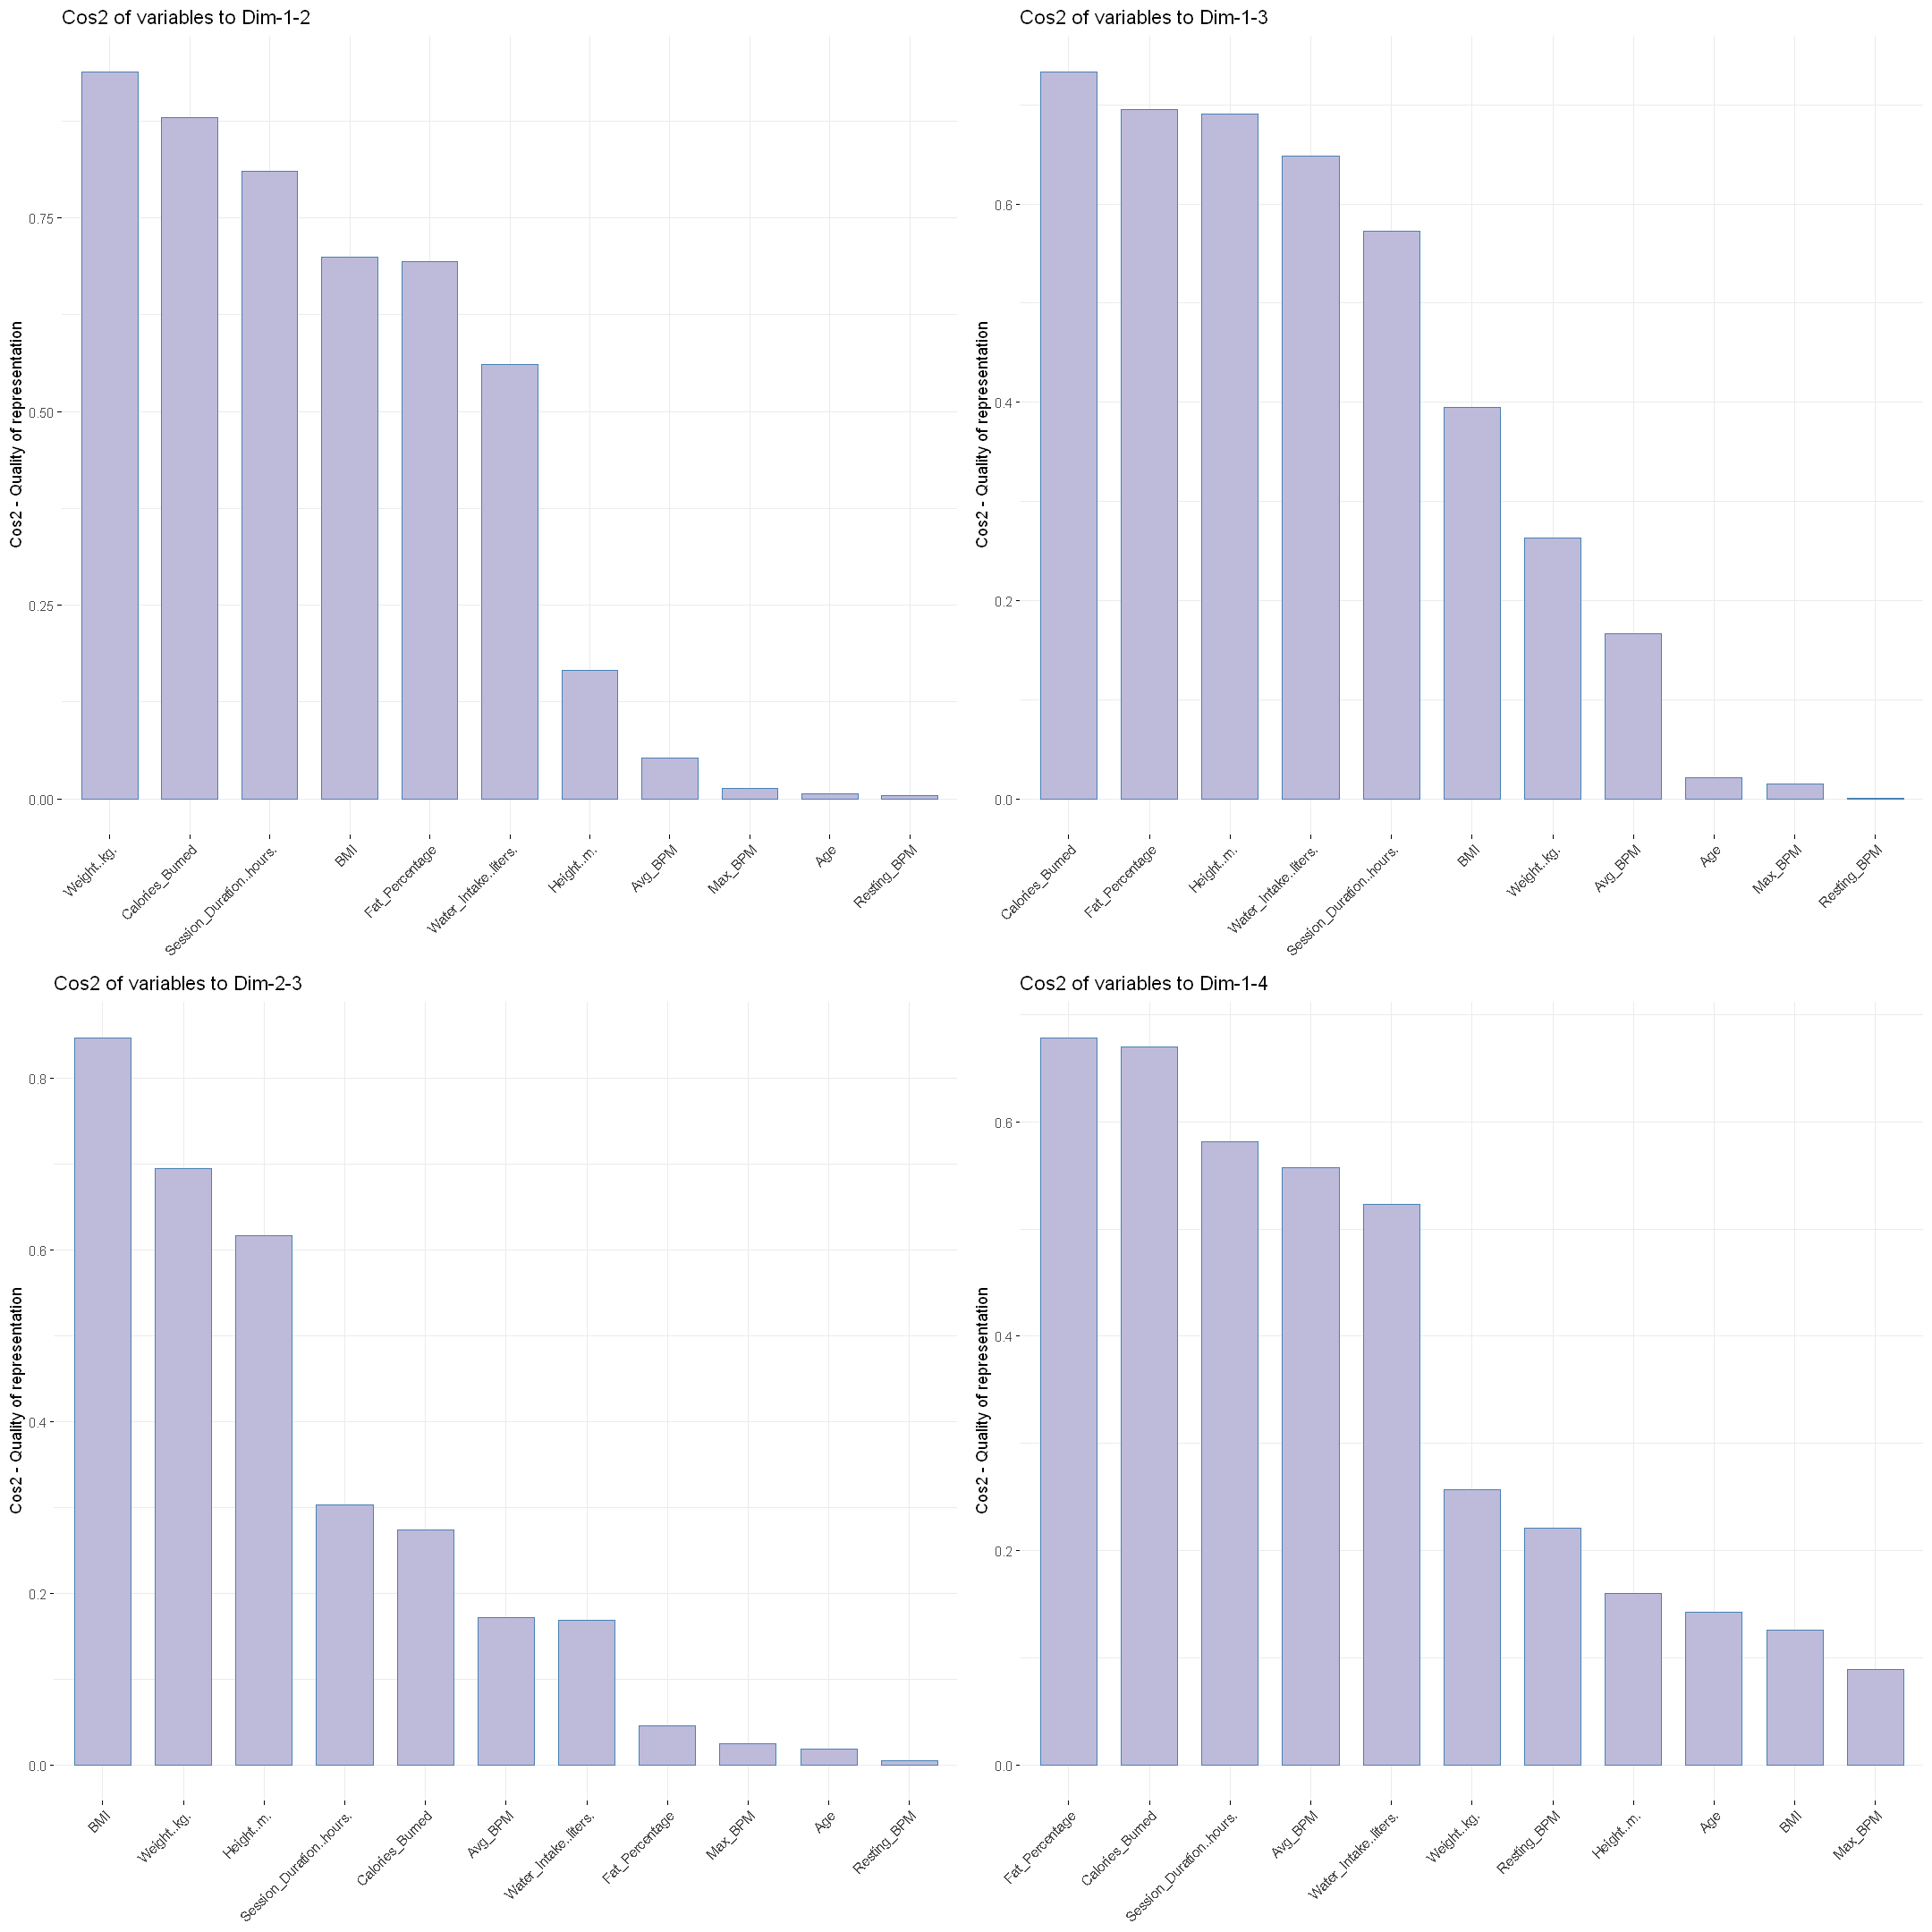

In [141]:
cos12 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(1,2))
cos13 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(1,3))
cos23 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(2,3))
cos14 = fviz_cos2(res.pca, choice = 'var', fill =brewer.pal(3, "Set3")[3], axes = c(1,4))
options(repr.plot.width = 18, repr.plot.height = 18)
grid.arrange(cos12, cos13,cos23, cos14, ncol = 2, nrow = 2)

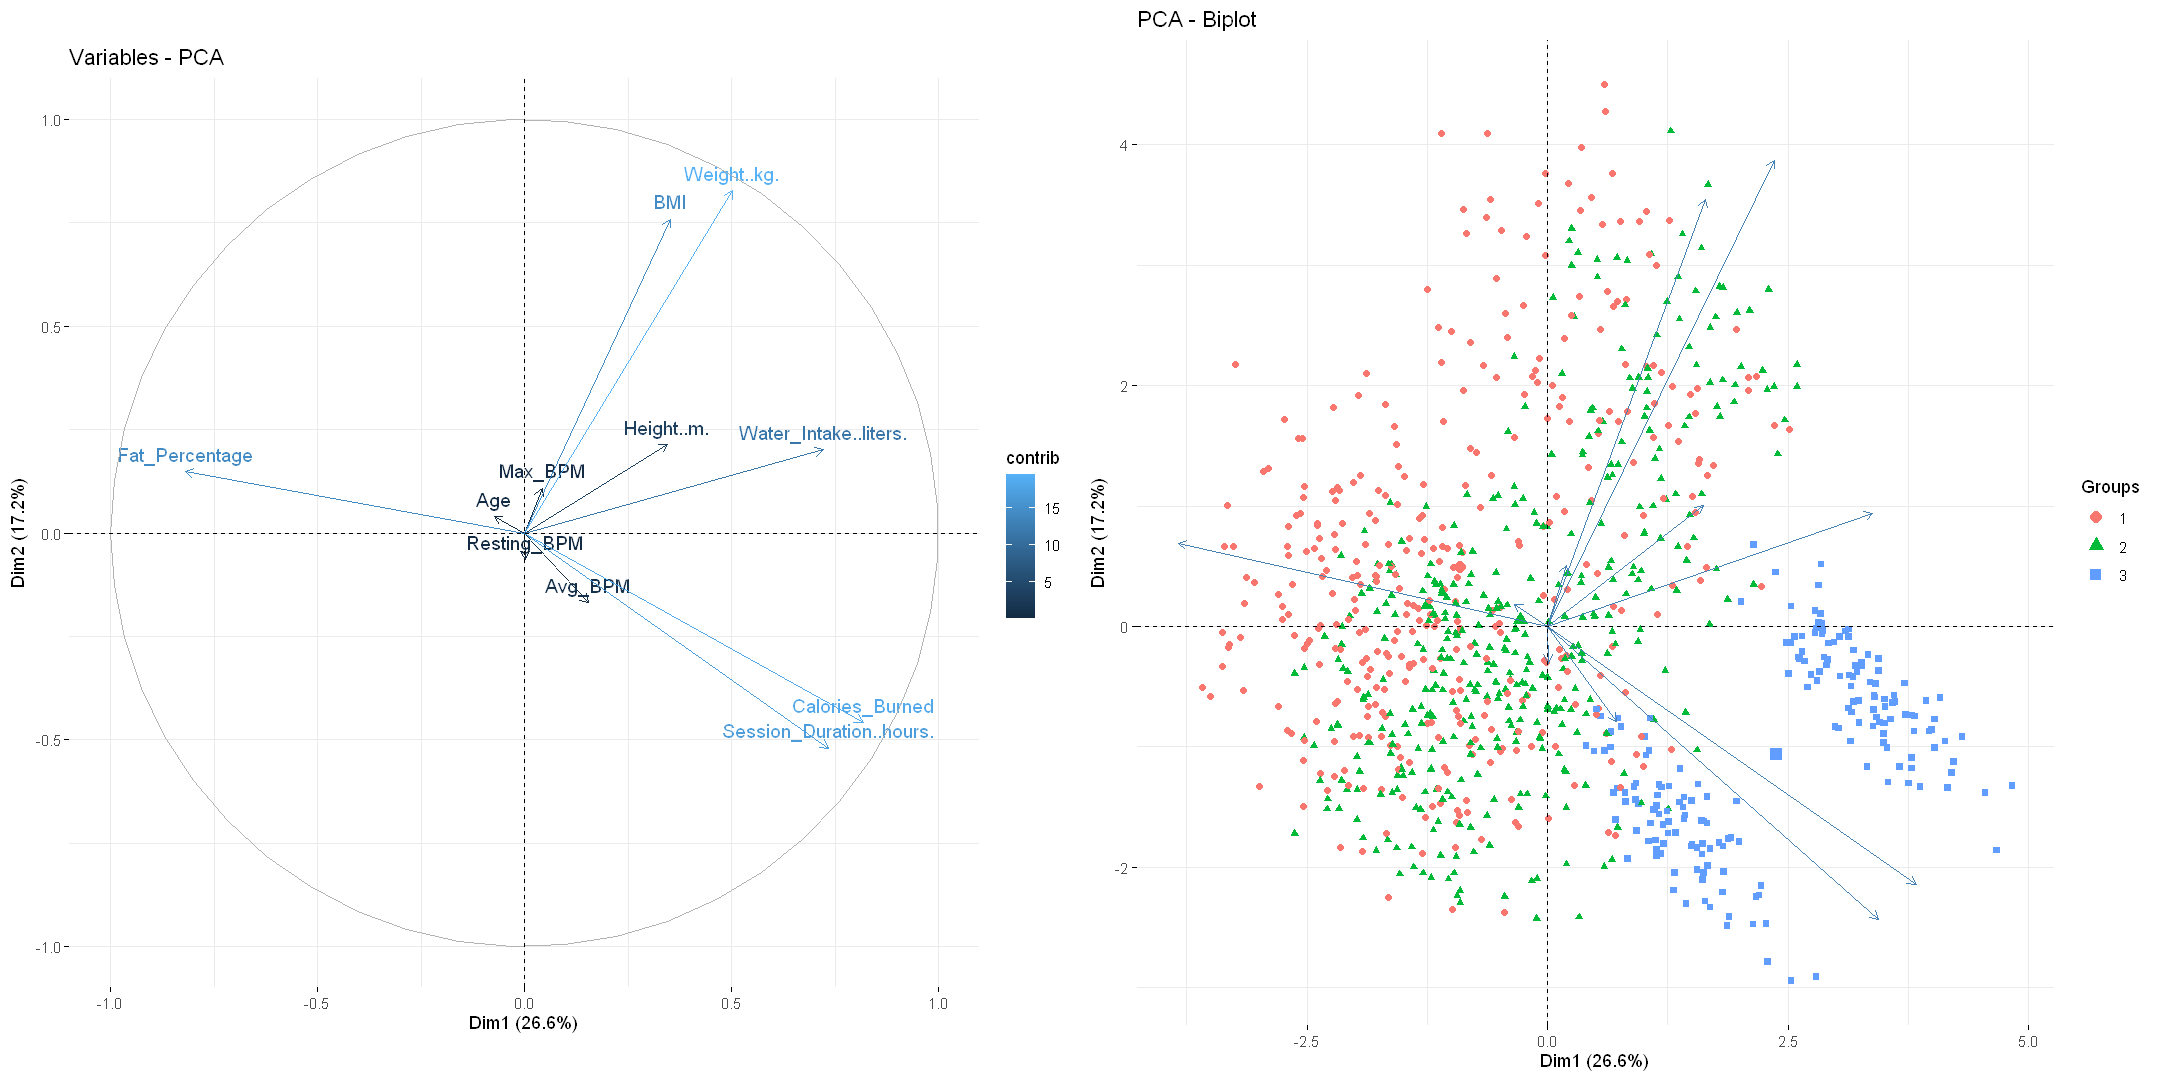

In [143]:
pca_var = fviz_pca_var(res.pca ,col.var  ='contrib')
bi_plot = fviz_pca_biplot(res.pca, habillage = data$Experience_Level, label = 'none')
options(repr.plot.width = 18, repr.plot.height = 9)
grid.arrange(pca_var, bi_plot, ncol = 2 )

$\rightarrow$ On peut observer que les niveaux d'expérience sont principalement différenciés par les variables Avg_BPM, Session_Duration..hours. et S_Calories_Burned. En particulier, le niveau d'expérience 3 se distingue nettement des niveaux 1 et 2.

$\rightarrow$ Calories_Burned est fortement corrélé avec Session_Duration..hours et Fat_Percentage, et légèrement avec l’âge. En revanche, il ne dépend ni du BMI, ni du Weight..kg., ni des BPM.

Signification: Les personnes ayant d’expérience 3 s’entraînent plus longtemps, brûlent plus de calories et peuvent maintenir une intensité d’effort plus constante (mesurée par Avg_BPM). Cela reflète probablement une meilleure endurance, discipline et habitude d'entraînement. Niveau 1 et 2 ont des profils plus proches, montrant une montée progressive dans l'effort.

## <FONT COLOR="Orange">5. Simple clustering using K means</font>

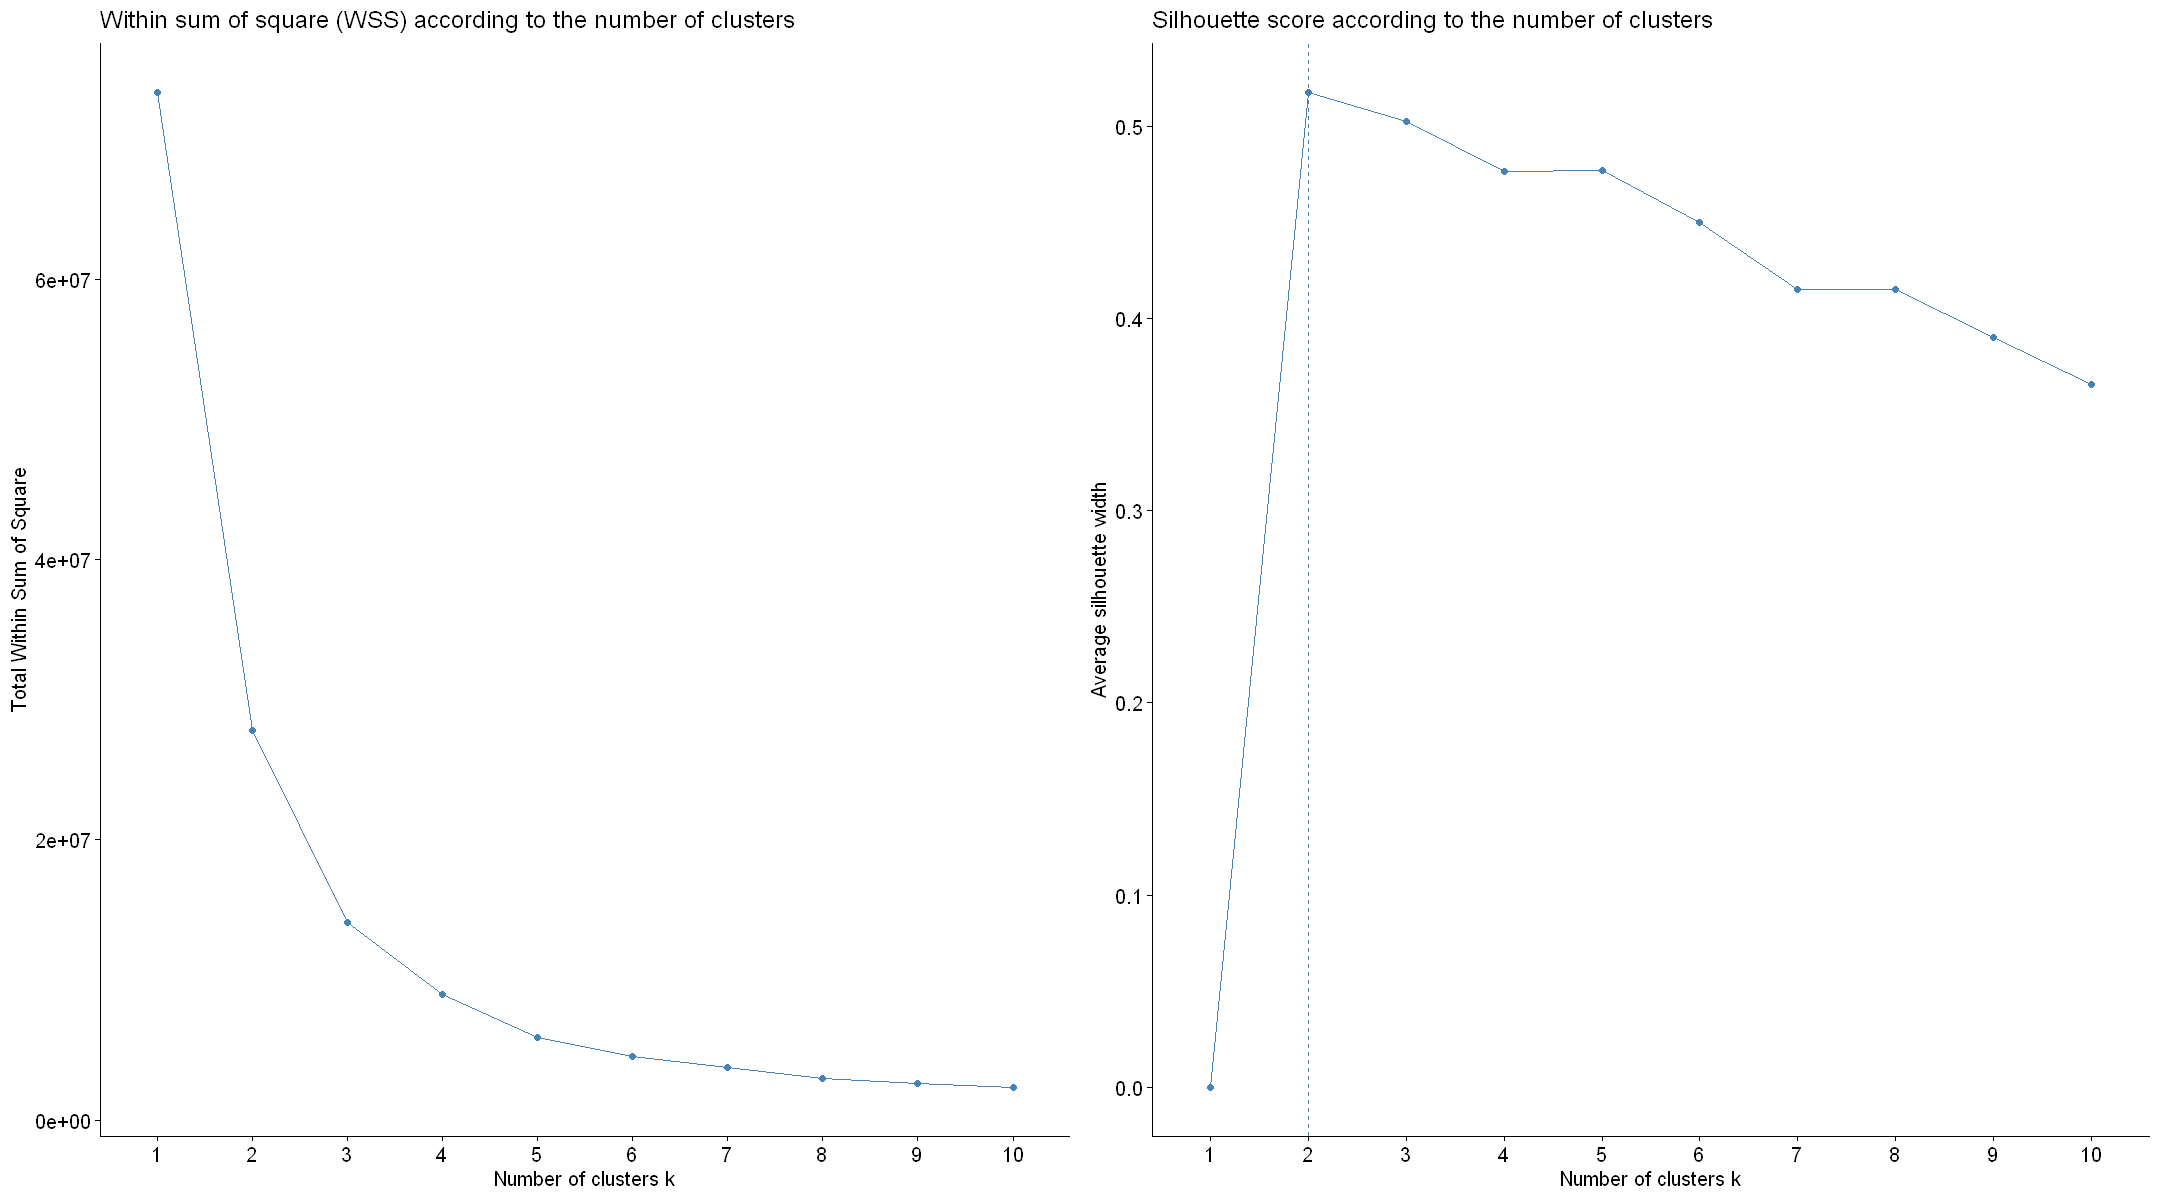

In [154]:
wss = fviz_nbclust(num, FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")
sil = fviz_nbclust(num, FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(wss, sil, ncol = 2)

In [156]:
reskmeans = kmeans(num, centers=3) 

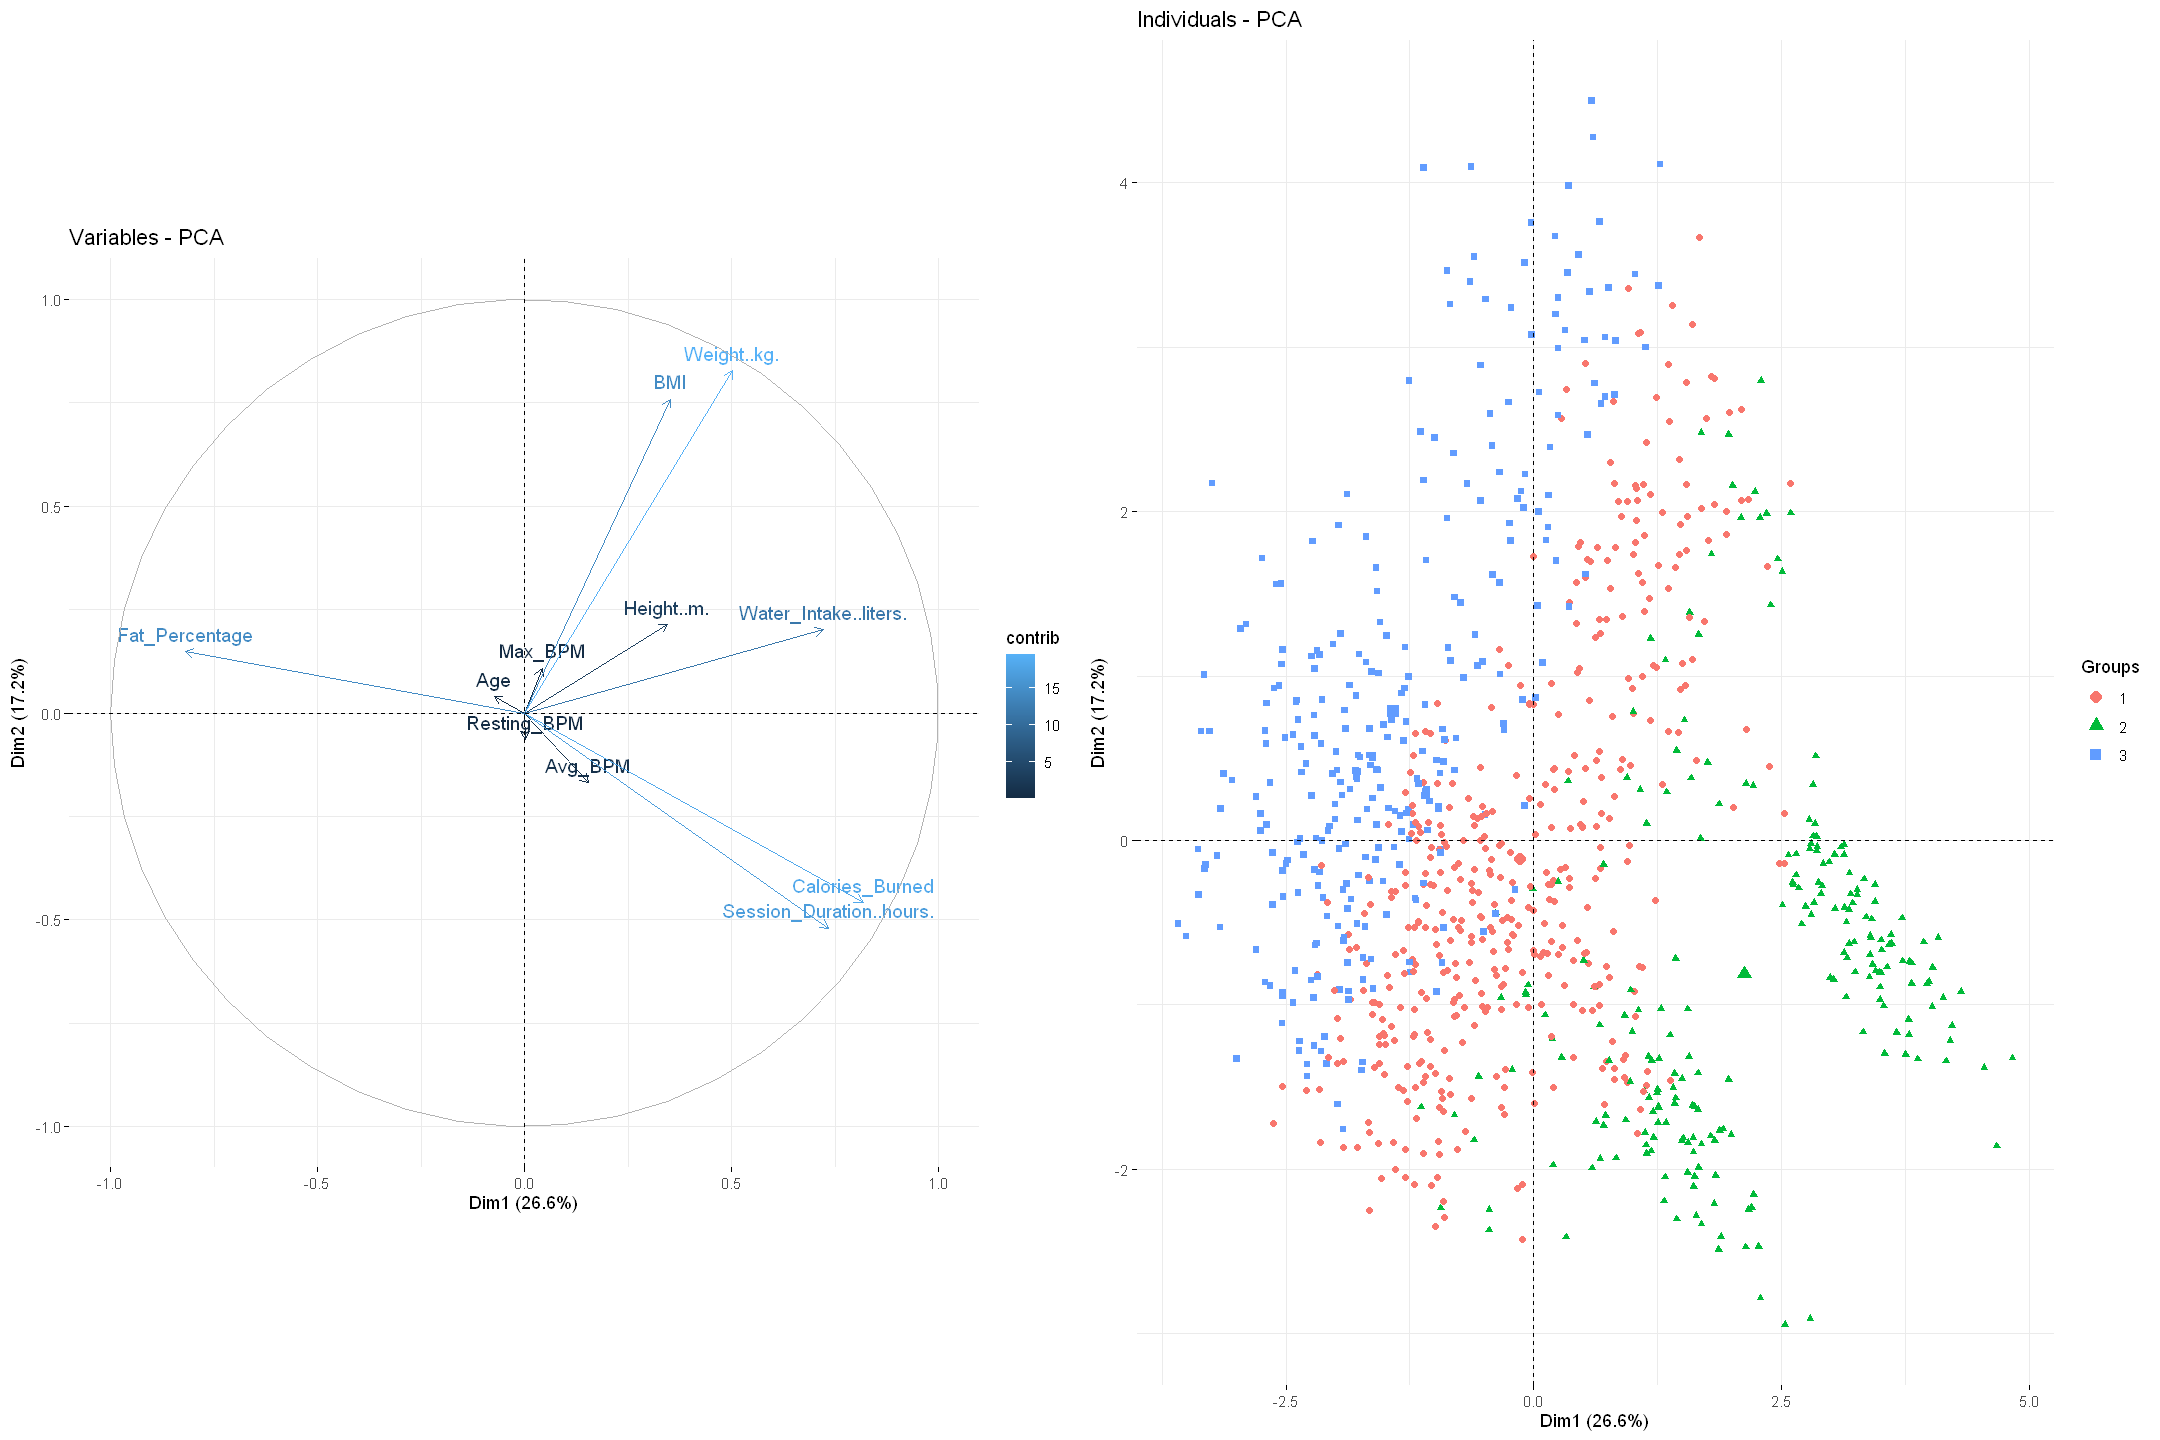

In [158]:
pca_var = fviz_pca_var(res.pca ,col.var  ='contrib')
pca_ind = fviz_pca_ind(res.pca, axes=c(1,2), geom=c("point"), habillage=as.factor(reskmeans$cluster))
options(repr.plot.width = 18, repr.plot.height = 12)
grid.arrange(pca_var, pca_ind, ncol = 2)

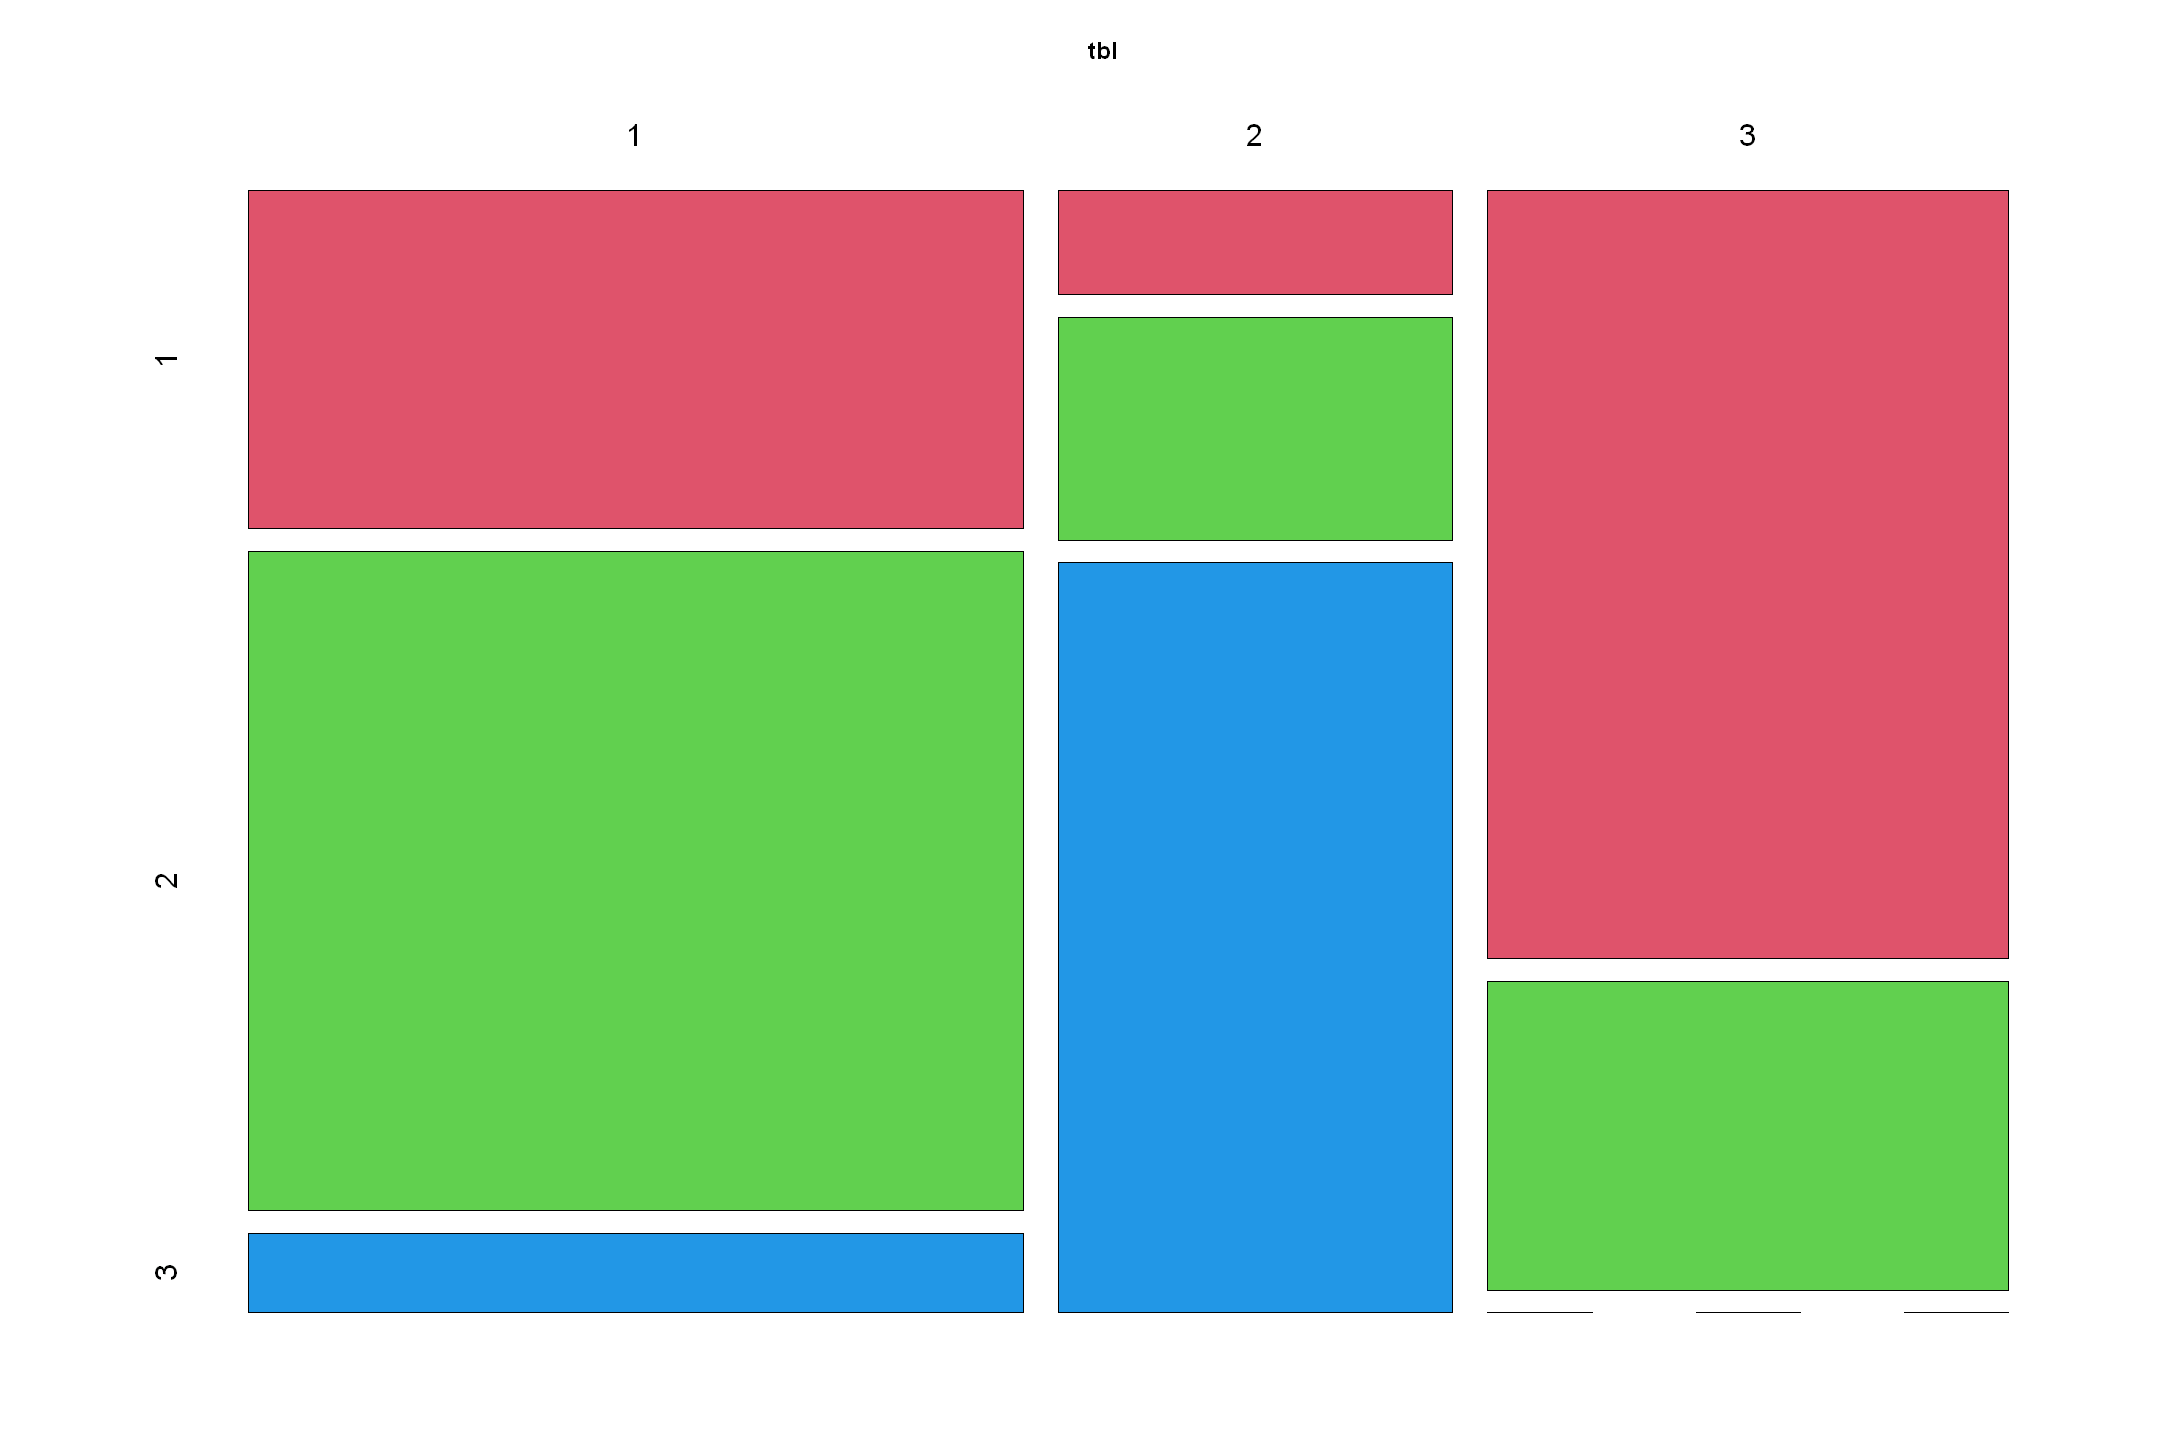

In [164]:
tbl = table( reskmeans$cluster, data$Experience_Level)
options(repr.plot.width = 18, repr.plot.height = 12)
mosaicplot(tbl, color=c(2:7),cex.axis = 1.5)

$\rightarrow$ On peut observer que les clusters obtenus par la méthode K-Means présentent une certaine similarité avec les niveaux d'expérience. Cela suggère que le niveau d'expérience constitue un critère pertinent pour la classification des membres d'une salle de sport.

# <FONT COLOR="Green">Partie II: Modélisation</font>

## <FONT COLOR="Orange">A. Preprocessing</font>

### <FONT COLOR="Blue">1. Transformer les variables</font>

On peut observer que:
- Weight..kg. : Median (70.00) <<  Mean (73.85) => log
- Calories_Burned: Median (893.0) < Mean (905.4) => sqrt
- Fat_Percentage: Median (26.20) > Mean (24.98) => ^2
- BMI: 3rd Qu. (28.56 ) <<  Max (49) => log

In [168]:
data[, "Weight..kg."] = log(data[, "Weight..kg."])
colnames(data)[colnames(data) == "Weight..kg."] <- "L_Weight..kg."
data[, "Calories_Burned"] = sqrt(data[, "Calories_Burned"])
colnames(data)[colnames(data) == "Calories_Burned"] <- "S_Calories_Burned"
data[, "Fat_Percentage"] = (data[, "Fat_Percentage"])^2
colnames(data)[colnames(data) == "Fat_Percentage"] <- "C_Fat_Percentage"
data[, "BMI"] = log(data[, "BMI"])
colnames(data)[colnames(data) == "BMI"] <- "L_BMI"

In [170]:
data[, "Experience_Level"] = factor(
  data[, "Experience_Level"],
  levels = c(1, 2, 3),
  labels = c("Beginner", "Intermediate", "Expert")
)

### <FONT COLOR="Blue">2. Enlever des outliers</font>

$\rightarrow$ Nous allons supprimer 1 % des données en utilisant Isolation Forest afin d’éliminer les valeurs aberrantes. Cette étape est optionnelle, car nos données semblent déjà de bonne qualité.

In [177]:
iso <- isolation.forest(
    data,
    ntrees = 100,
    sample_size = nrow(data),
    nthreads = 1
  )
  
pred <- predict(iso, data)
threshold <- quantile(pred, 0.99)
data = data[pred <= threshold, ]

### <FONT COLOR="Blue">3. Normaliser et diviser l'ensemble de l'entrainement et l'évaluation</font> 

In [210]:
# Fonction train_test_split
train_test_split <- function(data, test_ratio){
    n_lignes <- nrow(data)
    n_lignes_test <- ceiling(n_lignes * test_ratio)
    
    lignes_test <- sample(1:n_lignes, n_lignes_test)
    lignes_train <- setdiff(1:n_lignes, lignes_test)
    return(list(train = data[lignes_train, ], test = data[lignes_test, ]))
}

num_cols <- sapply(data, is.numeric)

scaled_data <- data
scaled_data[, num_cols] <- scale(scaled_data[, num_cols], center = TRUE, scale = TRUE)
splited_data <- train_test_split(scaled_data, 0.2)
train <- splited_data$train
test <- splited_data$test

## <FONT COLOR="Orange">B. Prédiction des calories brûlées</font>

### <FONT COLOR="Gray">1. Modèles simples</font>

#### <FONT COLOR="Blue">1.1. Régression linéaire</font>

Dans cette partie là, on essaye d'utiliser le régression linéaire, puis on cherche le meilleur model entre les model régression linéaire en utilisant les méthode de model selection 

In [338]:
loss_mse_calo <- function(model, test_data){
    pred = predict(model, newdata  = test_data)
    mse = mean((test_data$S_Calories_Burned - pred)^2)
    return (mse)
}

- **Modèles linéaires moindres carrés avec sélection de variable par critère AIC**

In [340]:
# Entrainement des models
lm_model_no_i = lm(S_Calories_Burned ~ ., data = train)
lm_model_i = lm(S_Calories_Burned ~ .^2, data = train)


#Variables sélection par AIC
lm_AIC_no_i = stepAIC(lm_model_no_i, direction = "both", trace = FALSE)
lm_AIC_i = stepAIC(lm_model_i, direction = "both", trace = FALSE)

In [341]:
#Comparaisons entre les models 
anova(lm_model_no_i, lm_AIC_i)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750,10.533023,NA,NA,NA,NA
2,691,5.706316,59,4.826707,9.906522,1.15054e-59


In [342]:
print(paste( "Loss MSE de model sans intéractions (avant AIC): ", loss_mse_calo(lm_model_no_i, test)))
print(paste( "Loss MSE de model sans intéractions (apres AIC): ", loss_mse_calo(lm_AIC_no_i, test)))
print(paste( "Loss MSE de model avec intéractions (avant AIC): ", loss_mse_calo(lm_model_i, test)))
print(paste( "Loss MSE de model avec intéractions (apres AIC): ", loss_mse_calo(lm_AIC_i, test)))

[1] "Loss MSE de model sans intéractions (avant AIC):  0.0214363140270502"
[1] "Loss MSE de model sans intéractions (apres AIC):  0.0214546663393966"
[1] "Loss MSE de model avec intéractions (avant AIC):  0.0129442241502645"
[1] "Loss MSE de model avec intéractions (apres AIC):  0.0119117694268328"


lm_AIC_i est meilleur que les autres

In [343]:
lm_AIC = lm_AIC_i

- **Modèles linéaires régularisation L1 (LASSO) avec sélection de variable par validation croisée**

In [344]:
loss_mse_glm_calo <- function(model, xdata, data){
    pred = predict(model, newx = xdata)
    return (mean((pred- data$S_Calories_Burned)^2))
}
# Encoder les variables qualitatives d'entrainement et de validation ensembles
x.mat_no_i <- model.matrix(S_Calories_Burned ~ . - 1, data = train)
x.mat_i <- model.matrix(S_Calories_Burned ~ .^2 - 1, data = train)
x.mat_no_i_test <- model.matrix(S_Calories_Burned ~ . - 1, data = test)
x.mat_i_test <- model.matrix(S_Calories_Burned ~ .^2 - 1, data = test)

# Identification les hypers marametres optimaux
reg.lasso.cv_no_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_no_i)
reg.lasso.cv_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_i)
lamb_min_no_i = reg.lasso.cv_no_i$lambda.min
lamb_min_i = reg.lasso.cv_i$lambda.min

# Entrainement avec des hypers parametres optimaux
lm_lasso_no_i = glmnet( y = train$S_Calories_Burned, x = x.mat_no_i, lambda = reg.lasso.cv_no_i$lambda.min)
lm_lasso_i = glmnet( y = train$S_Calories_Burned, x = x.mat_i, lambda = reg.lasso.cv_i$lambda.min)

# Comparaison les models
loss_mse_glm_calo(lm_lasso_no_i, x.mat_no_i_test, test)
loss_mse_glm_calo(lm_lasso_i, x.mat_i_test, test)

[1] 0.02129999

[1] 0.01108591

On prend lm_lasso avec intéractions pour representer lm_lasso

In [345]:
lm_lasso = lm_lasso_i

- **Modèles linéaires régularisation L2 (Ridge) avec sélection de variable par validation croisée**


In [346]:
# Identification les hypers marametres optimaux
reg.ridge.cv_no_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_no_i, alpha = 0)
reg.ridge.cv_i <- cv.glmnet(y = train$S_Calories_Burned, x = x.mat_i, alpha =0)

# Entrainement avec des hypers parametres optimaux
lm_ridge_no_i = glmnet( y = train$S_Calories_Burned, x = x.mat_no_i, lambda = reg.ridge.cv_no_i$lambda.min, alpha = 0)
lm_ridge_i = glmnet( y = train$S_Calories_Burned, x = x.mat_i, lambda = reg.ridge.cv_i$lambda.min, alpha = 0)

# Comparaison les models
loss_mse_glm_calo(lm_ridge_no_i, x.mat_no_i_test, test)
loss_mse_glm_calo(lm_ridge_i, x.mat_i_test, test)

[1] 0.03392601

[1] 0.02945427

lm_ridge_i est plus robuste que l'autre

In [347]:
lm_ridge = lm_ridge_i

- **Modèles linéaires régularisation L1 + L2 (Elastic Net) avec sélection de variable par validation croisée**

In [348]:
alpha_values <- seq(0, 1, by = 0.1)
lambda_values <- 10^seq(2, -3, by = -0.001)

# Initialisation des variables pour stocker les résultats
cv_errors_no_i <- matrix(NA, nrow = length(lambda_values), ncol = length(alpha_values),
                    dimnames = list(lambda_values, alpha_values))
cv_errors_i <- matrix(NA, nrow = length(lambda_values), ncol = length(alpha_values),
                    dimnames = list(lambda_values, alpha_values))
# Boucle sur les valeurs de alpha et lambda
for (alpha in alpha_values) {
  cv_model_no_i <- cv.glmnet(x= x.mat_no_i, y = train$S_Calories_Burned, alpha = alpha, lambda = lambda_values)
  cv_model_i <- cv.glmnet(x= x.mat_i, y = train$S_Calories_Burned, alpha = alpha, lambda = lambda_values)
    
  cv_errors_no_i[, as.character(alpha)] <- cv_model_no_i$cvm
  cv_errors_i[, as.character(alpha)] <- cv_model_i$cvm
    
}

# Identification des paramètres optimaux
min_error_no_i <- min(cv_errors_no_i)
min_error_i <- min(cv_errors_i)

optimal_indices_no_i <- which(cv_errors_no_i == min_error_no_i, arr.ind = TRUE)
optimal_alpha_no_i <- as.numeric(colnames(cv_errors_no_i)[optimal_indices_no_i[1, 2]])
optimal_lambda_no_i <- as.numeric(rownames(cv_errors_no_i)[optimal_indices_no_i[1, 1]])

optimal_indices_i <- which(cv_errors_i == min_error_i, arr.ind = TRUE)
optimal_alpha_i <- as.numeric(colnames(cv_errors_i)[optimal_indices_i[1, 2]])
optimal_lambda_i <- as.numeric(rownames(cv_errors_i)[optimal_indices_i[1, 1]])

# Entrainement avec des hypers parametres optimaux
lm_elastic_no_i = glmnet( y = train$S_Calories_Burned, x = x.mat_no_i, lambda =optimal_lambda_no_i, alpha = optimal_alpha_no_i)
lm_elastic_i = glmnet( y = train$S_Calories_Burned, x = x.mat_i, lambda =optimal_lambda_i, alpha = optimal_alpha_i)

# Comparaison les models
loss_mse_glm_calo(lm_elastic_no_i, x.mat_no_i_test, test)
loss_mse_glm_calo(lm_elastic_i, x.mat_i_test, test)

[1] 0.02130719

[1] 0.01117293

lm_elastic_i est le meilleur model de elastic net

In [350]:
lm_elastic = lm_elastic_i

- **Comparaison les models régressions linéaires**

In [352]:
nombre_coefs <- c(length(lm_AIC$coefficients), sum(coef(lm_lasso) != 0),  length(coef(lm_ridge)), sum(coef(lm_elastic) != 0)) 
mse <- c(loss_mse_calo(lm_AIC, test), loss_mse_glm_calo(lm_lasso, x.mat_i_test, test), loss_mse_glm_calo(lm_ridge, x.mat_i_test, test), loss_mse_glm_calo(lm_elastic, x.mat_i_test, test))
models_lm = c("MC", "LASSO", "Ridge", "Elastic Net")
data.frame(Models = models_lm, Coefficients = nombre_coefs, MSE = mse)

Models,Coefficients,MSE
<chr>,<int>,<dbl>
MC,79,0.01191177
LASSO,63,0.01108591
Ridge,185,0.02945427
Elastic Net,70,0.01117293


Méthod LASSO a une exelente performance avec l'échantillons de test. De plus, il a 63 coefs, le moindre. Donc on considere qu'il est le meilleur model pour le méthod regression linéaire

In [354]:
best.lm = lm_lasso

- **Evaluation**

[1] "R^2:  0.989895191363818"


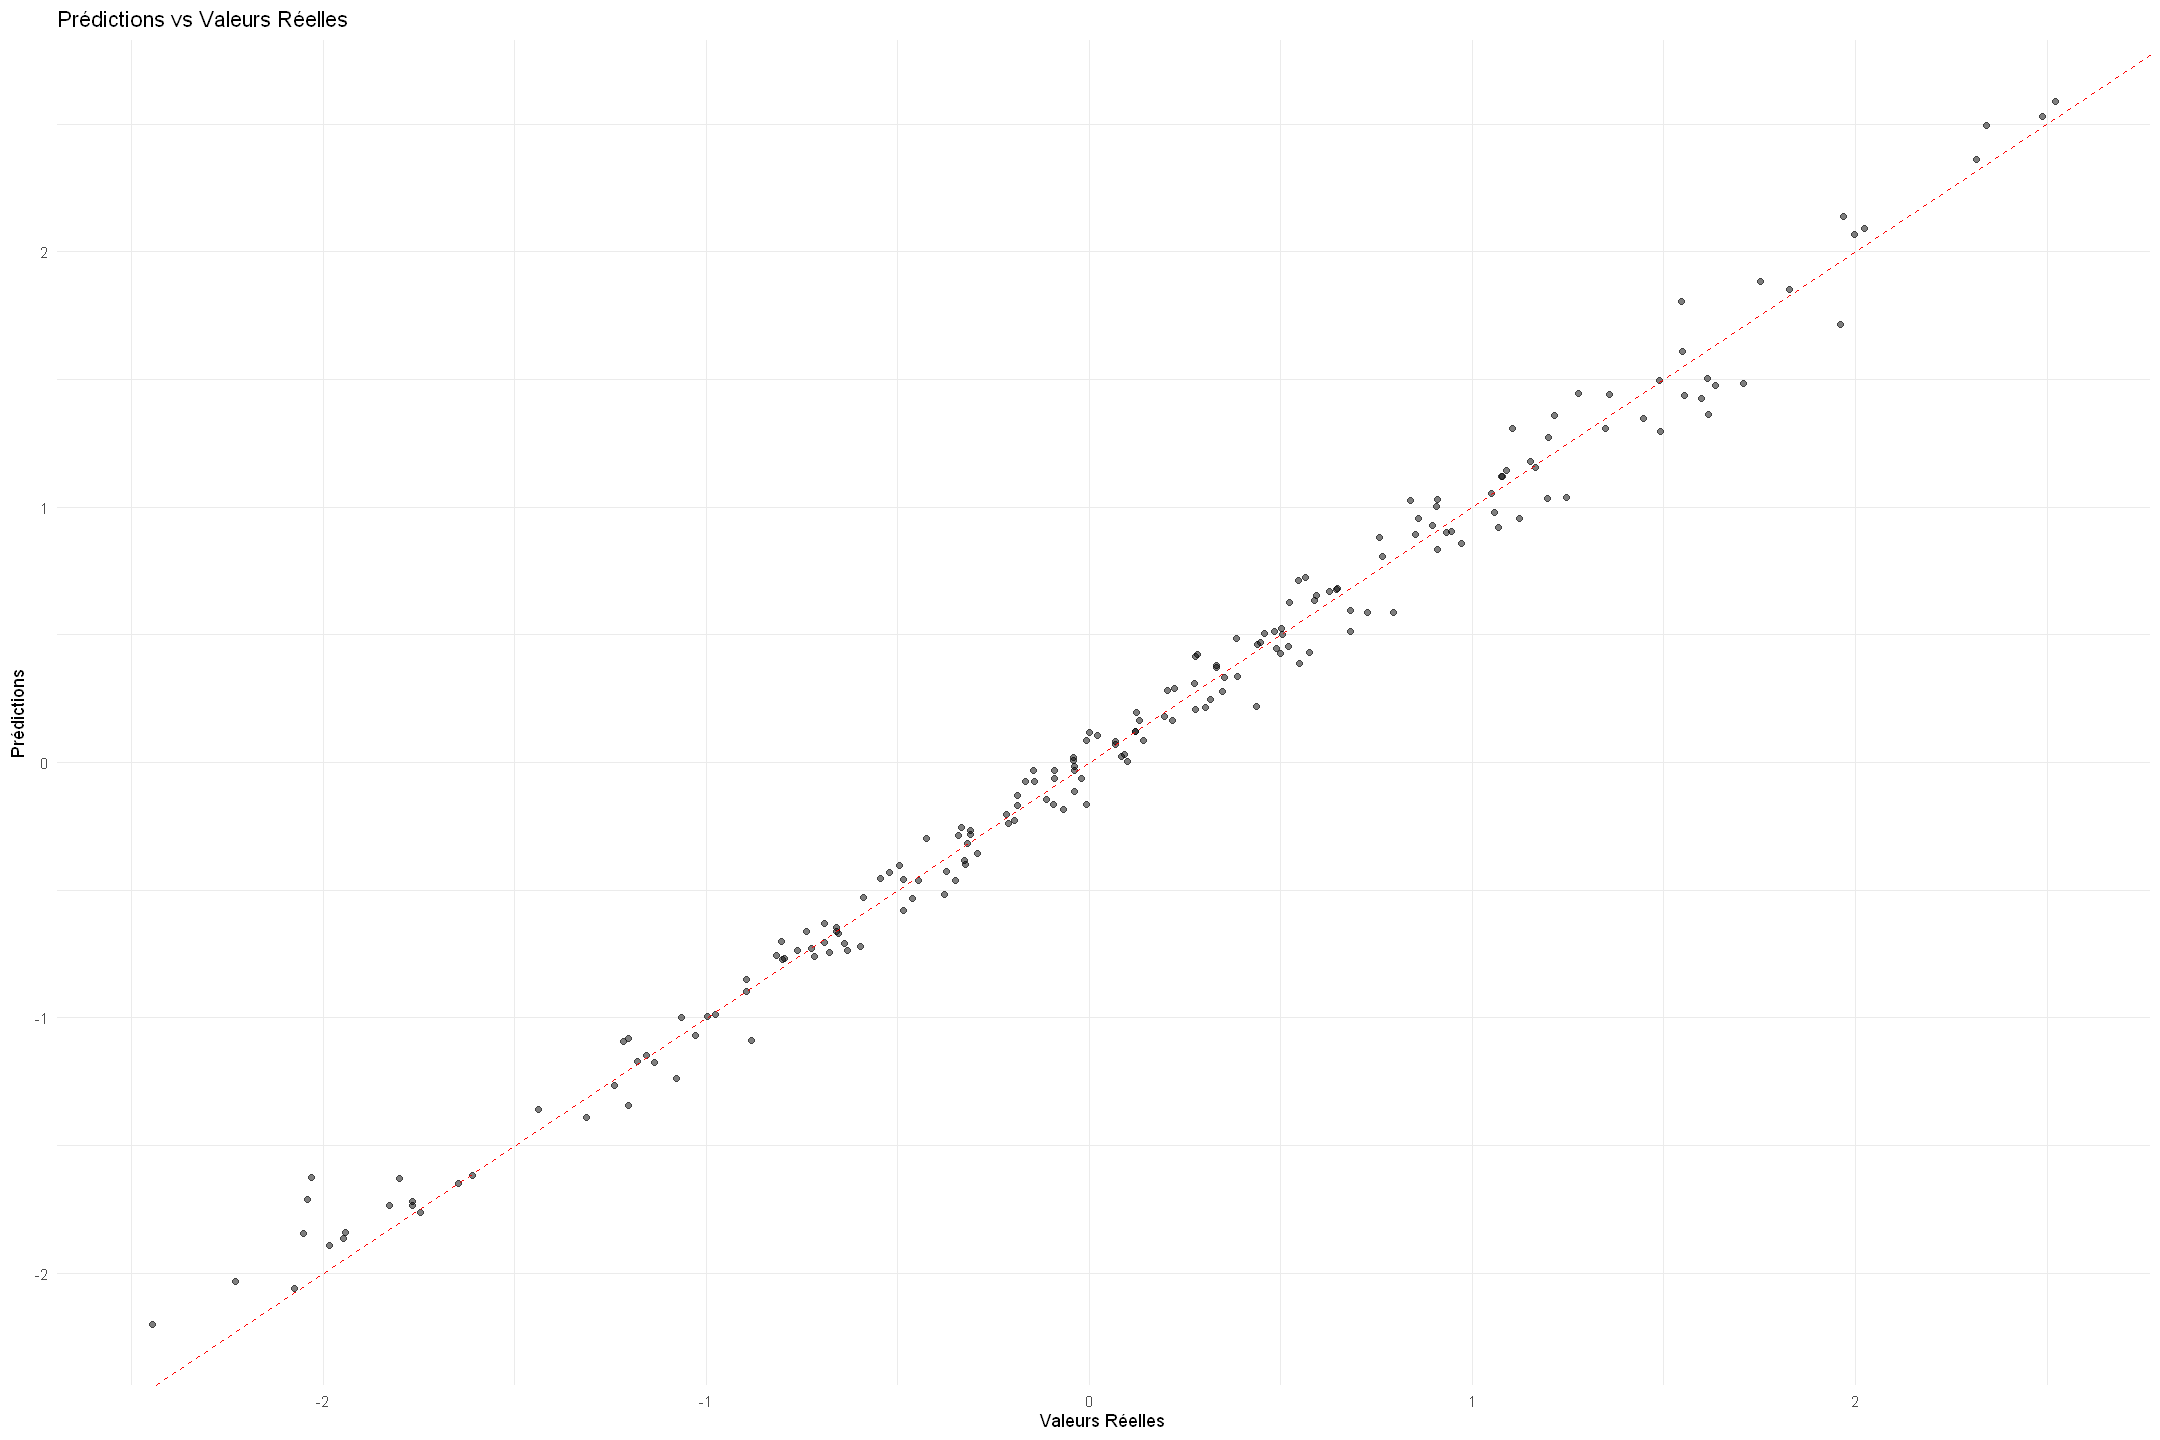

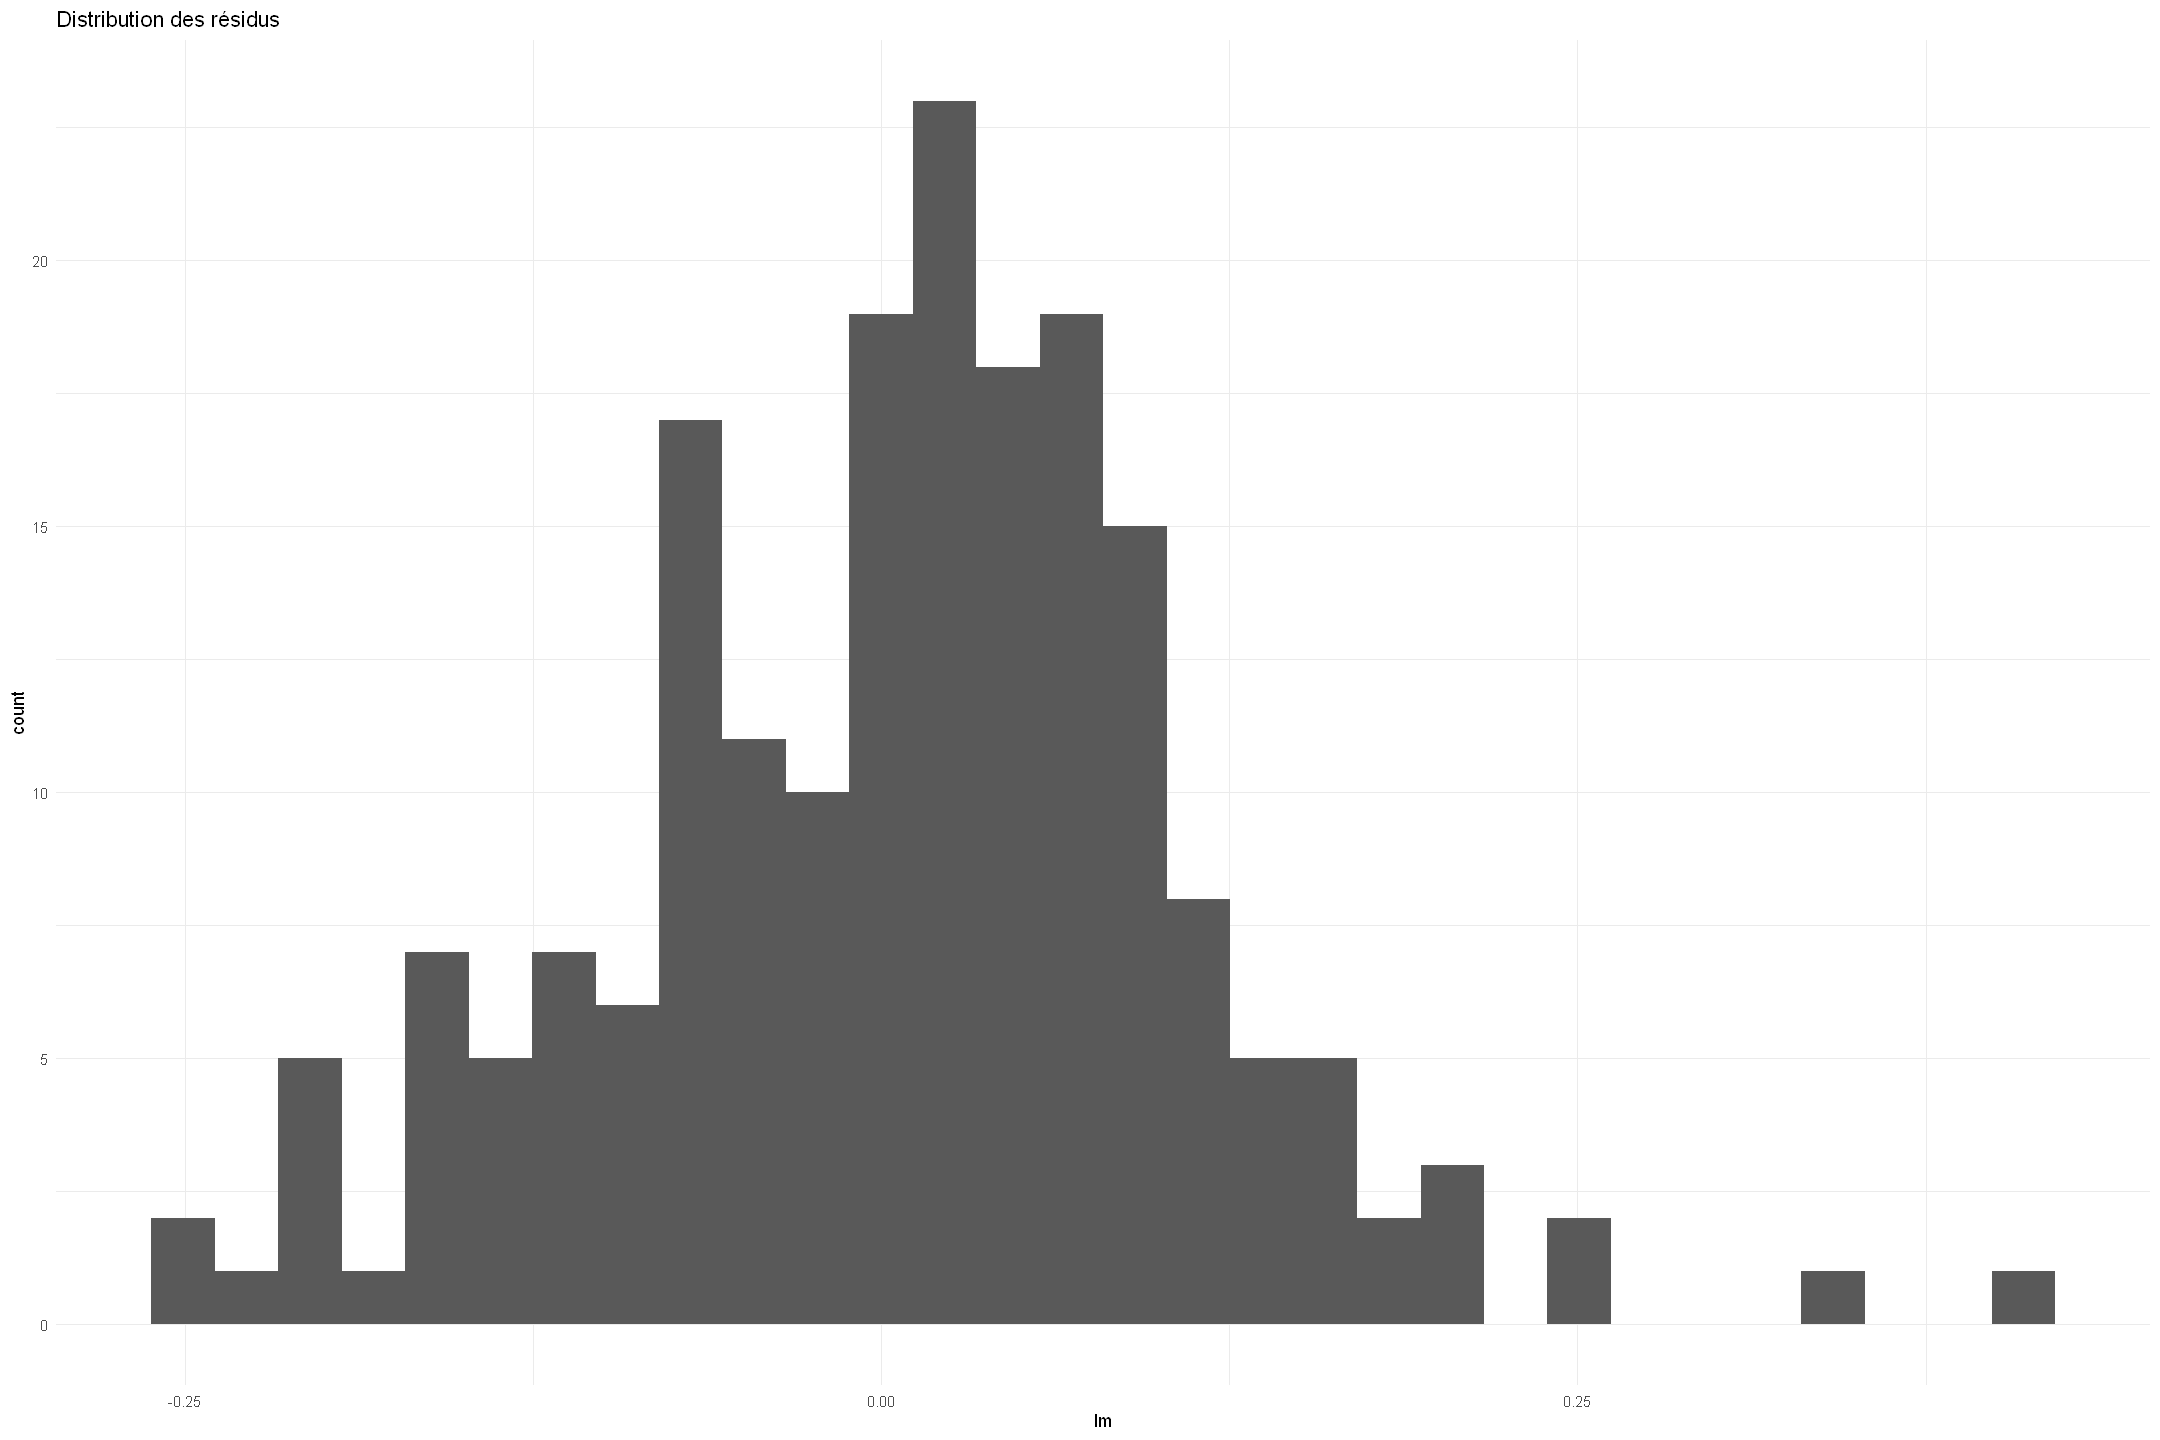

In [356]:
test_predicted = test
test_predicted[, "S_Calories_Burned_pred_lm"] <- predict(best.lm,newx = x.mat_i_test)
print(paste("R^2: ", cor(test$S_Calories_Burned, test_predicted[, "S_Calories_Burned_pred_lm"])^2))
ggplot(data = test_predicted) +
  geom_point(aes(x = S_Calories_Burned, y = S_Calories_Burned_pred_lm), alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Prédictions vs Valeurs Réelles",
       x = "Valeurs Réelles", 
       y = "Prédictions") +
  theme_minimal()
test_residuals = data.frame(lm = test_predicted$S_Calories_Burned_pred_lm - test_predicted$S_Calories_Burned )
colnames(test_residuals)[1] = 'lm'
ggplot(data = test_residuals, aes(x = lm)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")+
  theme_minimal()


In [361]:
shapiro.test(test_residuals$lm)


	Shapiro-Wilk normality test

data:  test_residuals$lm
W = 0.98829, p-value = 0.113


- Les points prédiction-réel sont proches la ligne diagonal
- Les résidues suivent la loi normal
 
$\Rightarrow$ Un bon model

**Intepreter**

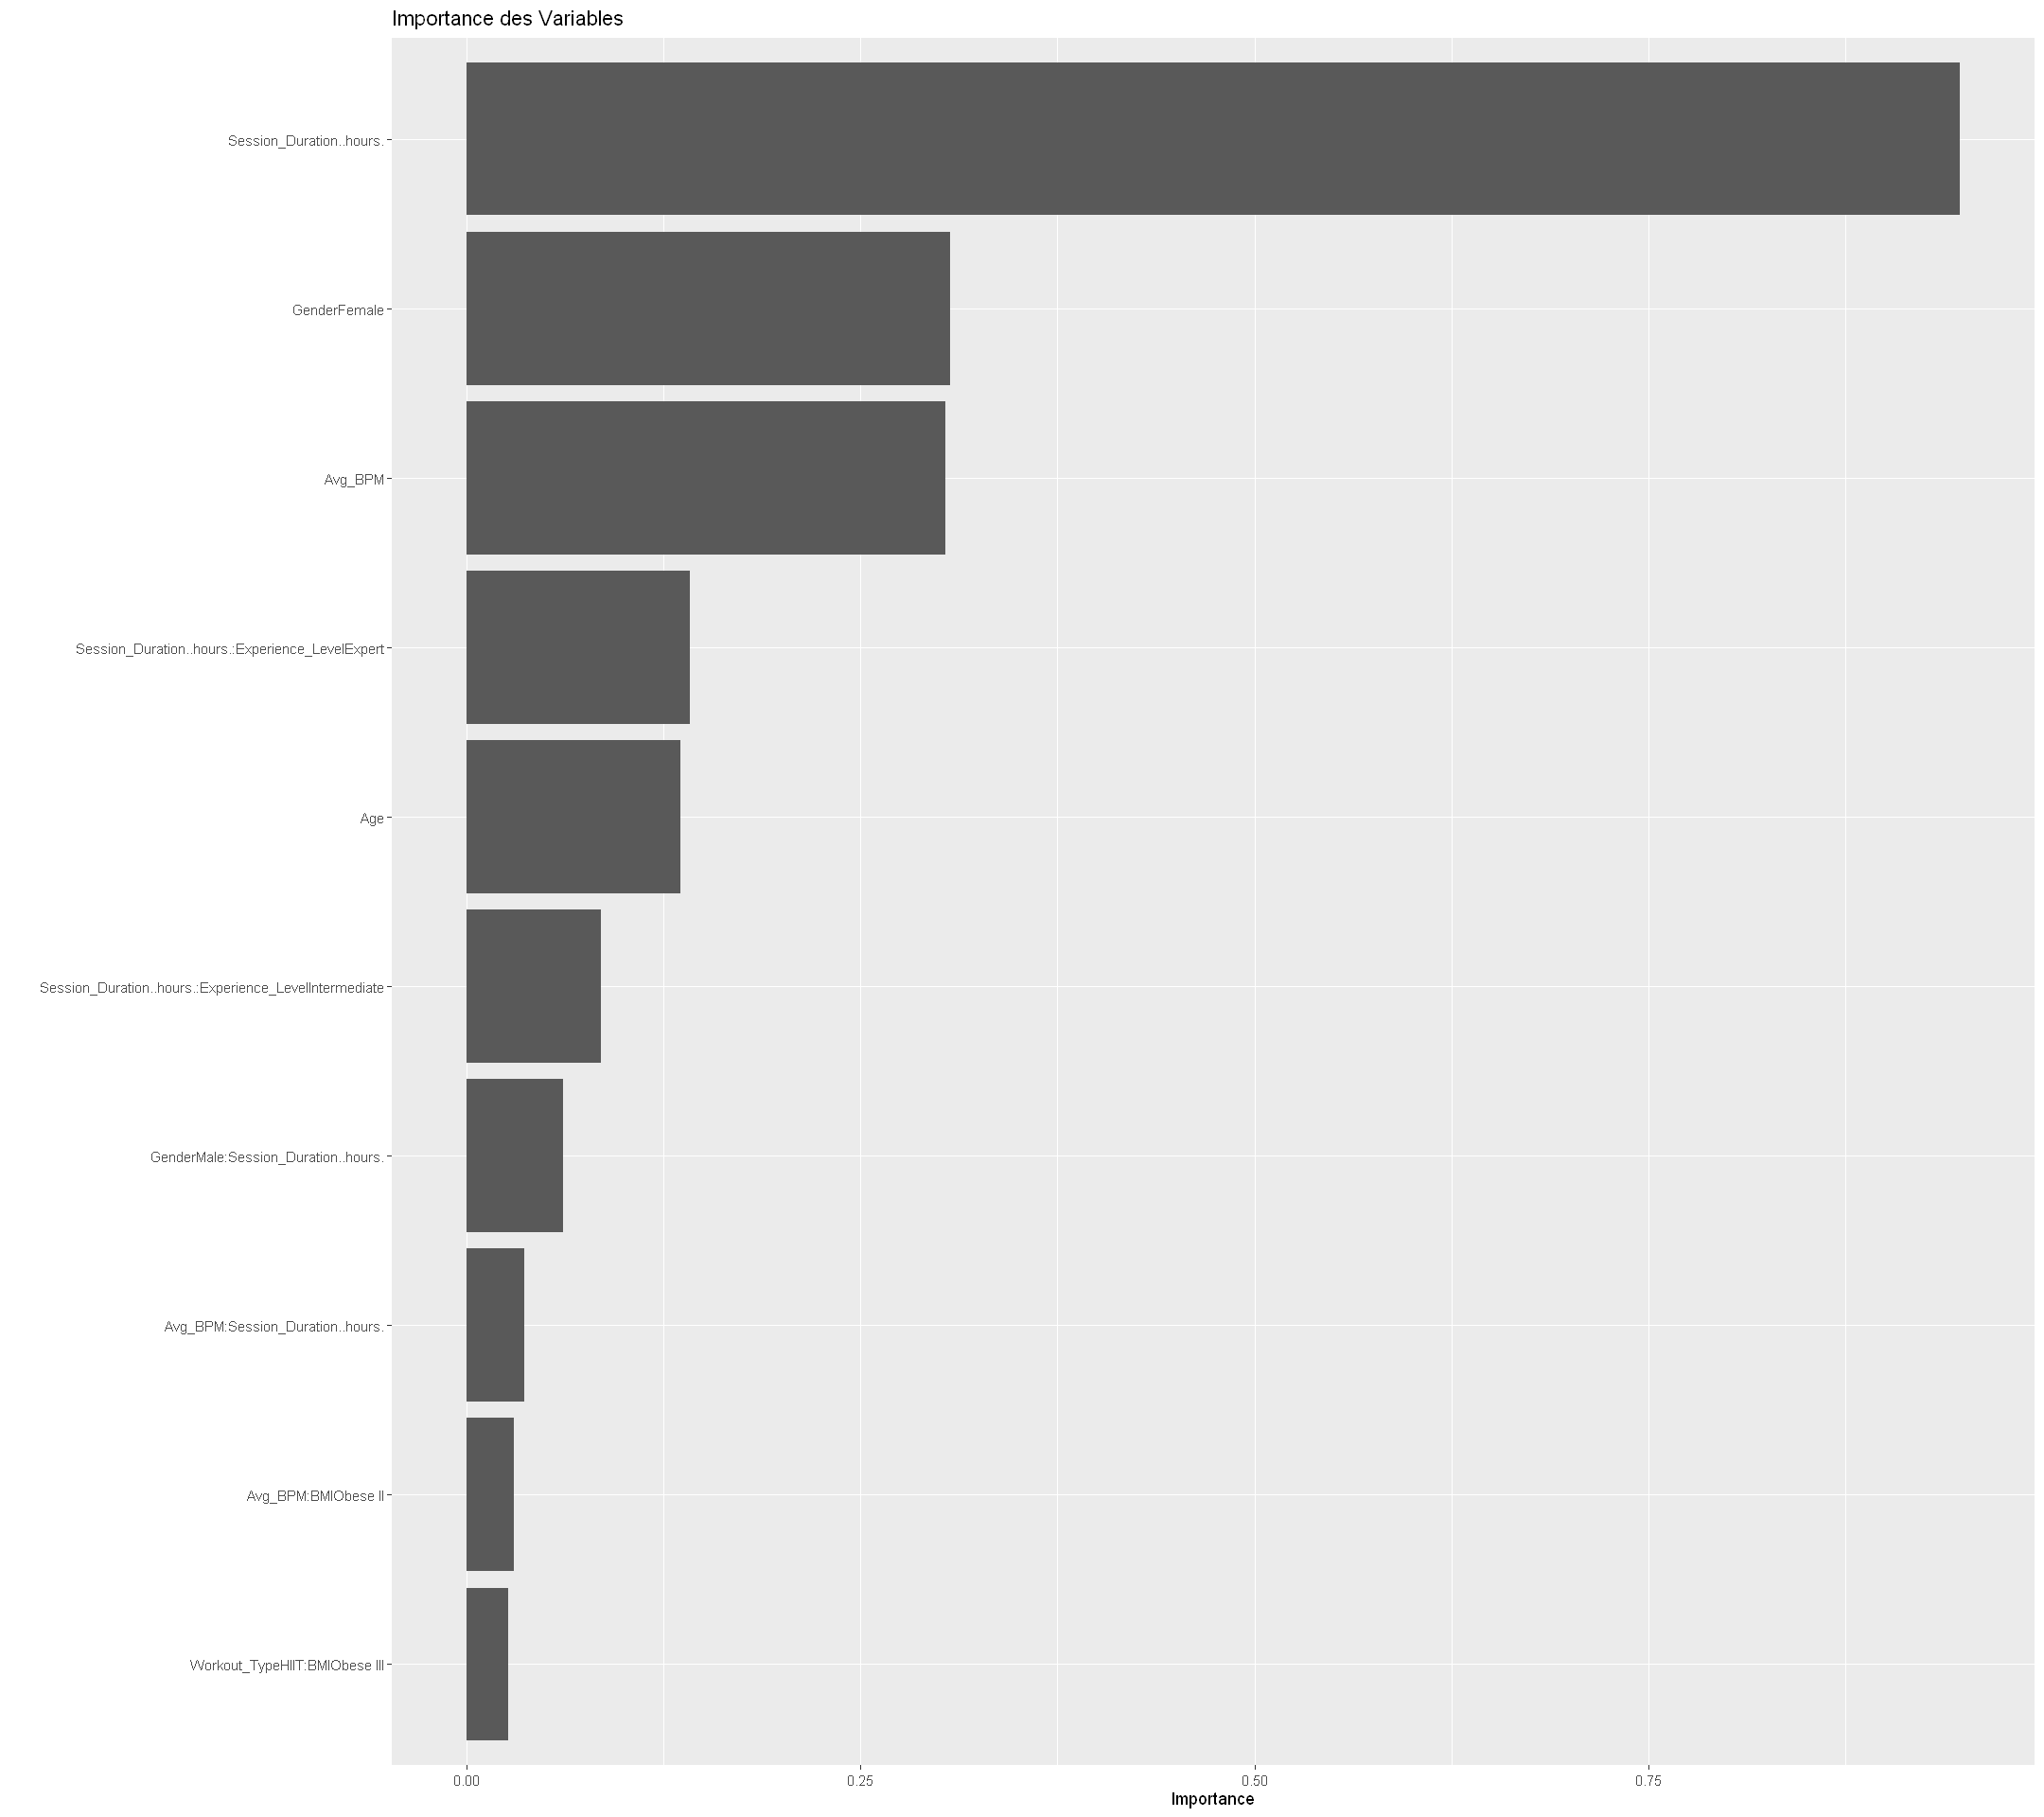

In [363]:
vip(best.lm, num_features = 10) +
  ggtitle("Importance des Variables")

#### <FONT COLOR="Blue">1.2. Support Vector Regression</font>

- **Trouver les meilleurs hypers parametres**

On va choisir le meilleur model en examinant le linéaire kernel, radial kernel et poly kernel avec différents type de pénalise les points en dehors du tube. En plus, on va choisir également les hypers parametres (comme C, $\gamma$, $\epsilon$, $\nu$) par cross validation 

In [246]:
svr.tune.results <- list()

# Choix de kernels et types à explorer
kernels <- c("linear", "radial")
types   <- c("eps-regression", "nu-regression")

for (k in kernels) {
  for (t in types) {
    
    if (t == "eps-regression") {
      # Pour eps-regression, on fait varier cost, gamma, epsilon
      svr.tune <- e1071::tune(
        svm,
        S_Calories_Burned ~ .,          
        data = train,
        kernel = k,
        type = t,
        ranges = list(
          cost    = c(0.1, 1, 10),
          gamma   = c(0.01, 0.1, 1),
          epsilon = c(0, 0.1, 0.2)
        ),
        tunecontrol = tune.control(sampling = "cross", cross = 5)  
      )
      
      svr.tune.results[[paste(k, t, sep = "_")]] <- svr.tune
      
    } else {
      # "nu-regression" : on fait varier cost, gamma, nu
      svr.tune <- e1071::tune(
        svm,
        S_Calories_Burned ~ .,
        data = train,
        kernel = k,
        type = t,
        ranges = list(
          cost  = c(0.1, 1, 10),
          gamma = c(0.01, 0.1, 1),
          nu    = c(0.1, 0.5, 0.9)
        ),
        tunecontrol = tune.control(sampling = "cross", cross = 5)
      )
      
      svr.tune.results[[paste(k, t, sep = "_")]] <- svr.tune
    }
  }
}

# Visualiser les meilleurs résultats 
for (name in names(svr.tune.results)) {
  cat("===== Model:", name, "=====\n")
  cat("Best parameters:\n")
  print(svr.tune.results[[name]]$best.parameters)
  cat("Cross-val error (MSE) =", svr.tune.results[[name]]$best.performance, "\n\n")
}

===== Model: linear_eps-regression =====
Best parameters:
   cost gamma epsilon
11    1  0.01     0.1
Cross-val error (MSE) = 0.01682684 

===== Model: linear_nu-regression =====
Best parameters:
   cost gamma  nu
12   10  0.01 0.5
Cross-val error (MSE) = 0.01706388 

===== Model: radial_eps-regression =====
Best parameters:
  cost gamma epsilon
3   10  0.01       0
Cross-val error (MSE) = 0.009616894 

===== Model: radial_nu-regression =====
Best parameters:
   cost gamma  nu
12   10  0.01 0.5
Cross-val error (MSE) = 0.01013203 



- **Construire le model avec les meilleurs parametres**

In [251]:
MSE_loss = c()
for (model in names(svr.tune.results)){
    MSE_loss <- append(MSE_loss, svr.tune.results[[model]]$best.performance)
} 
best_svr = svr.tune.results[[which.min(MSE_loss)]]$best.model

- **Evaluation le model**

[1] "MSE loss de SVR:  3.87781708271636e-05"
[1] "R^2:  0.993475512471399"


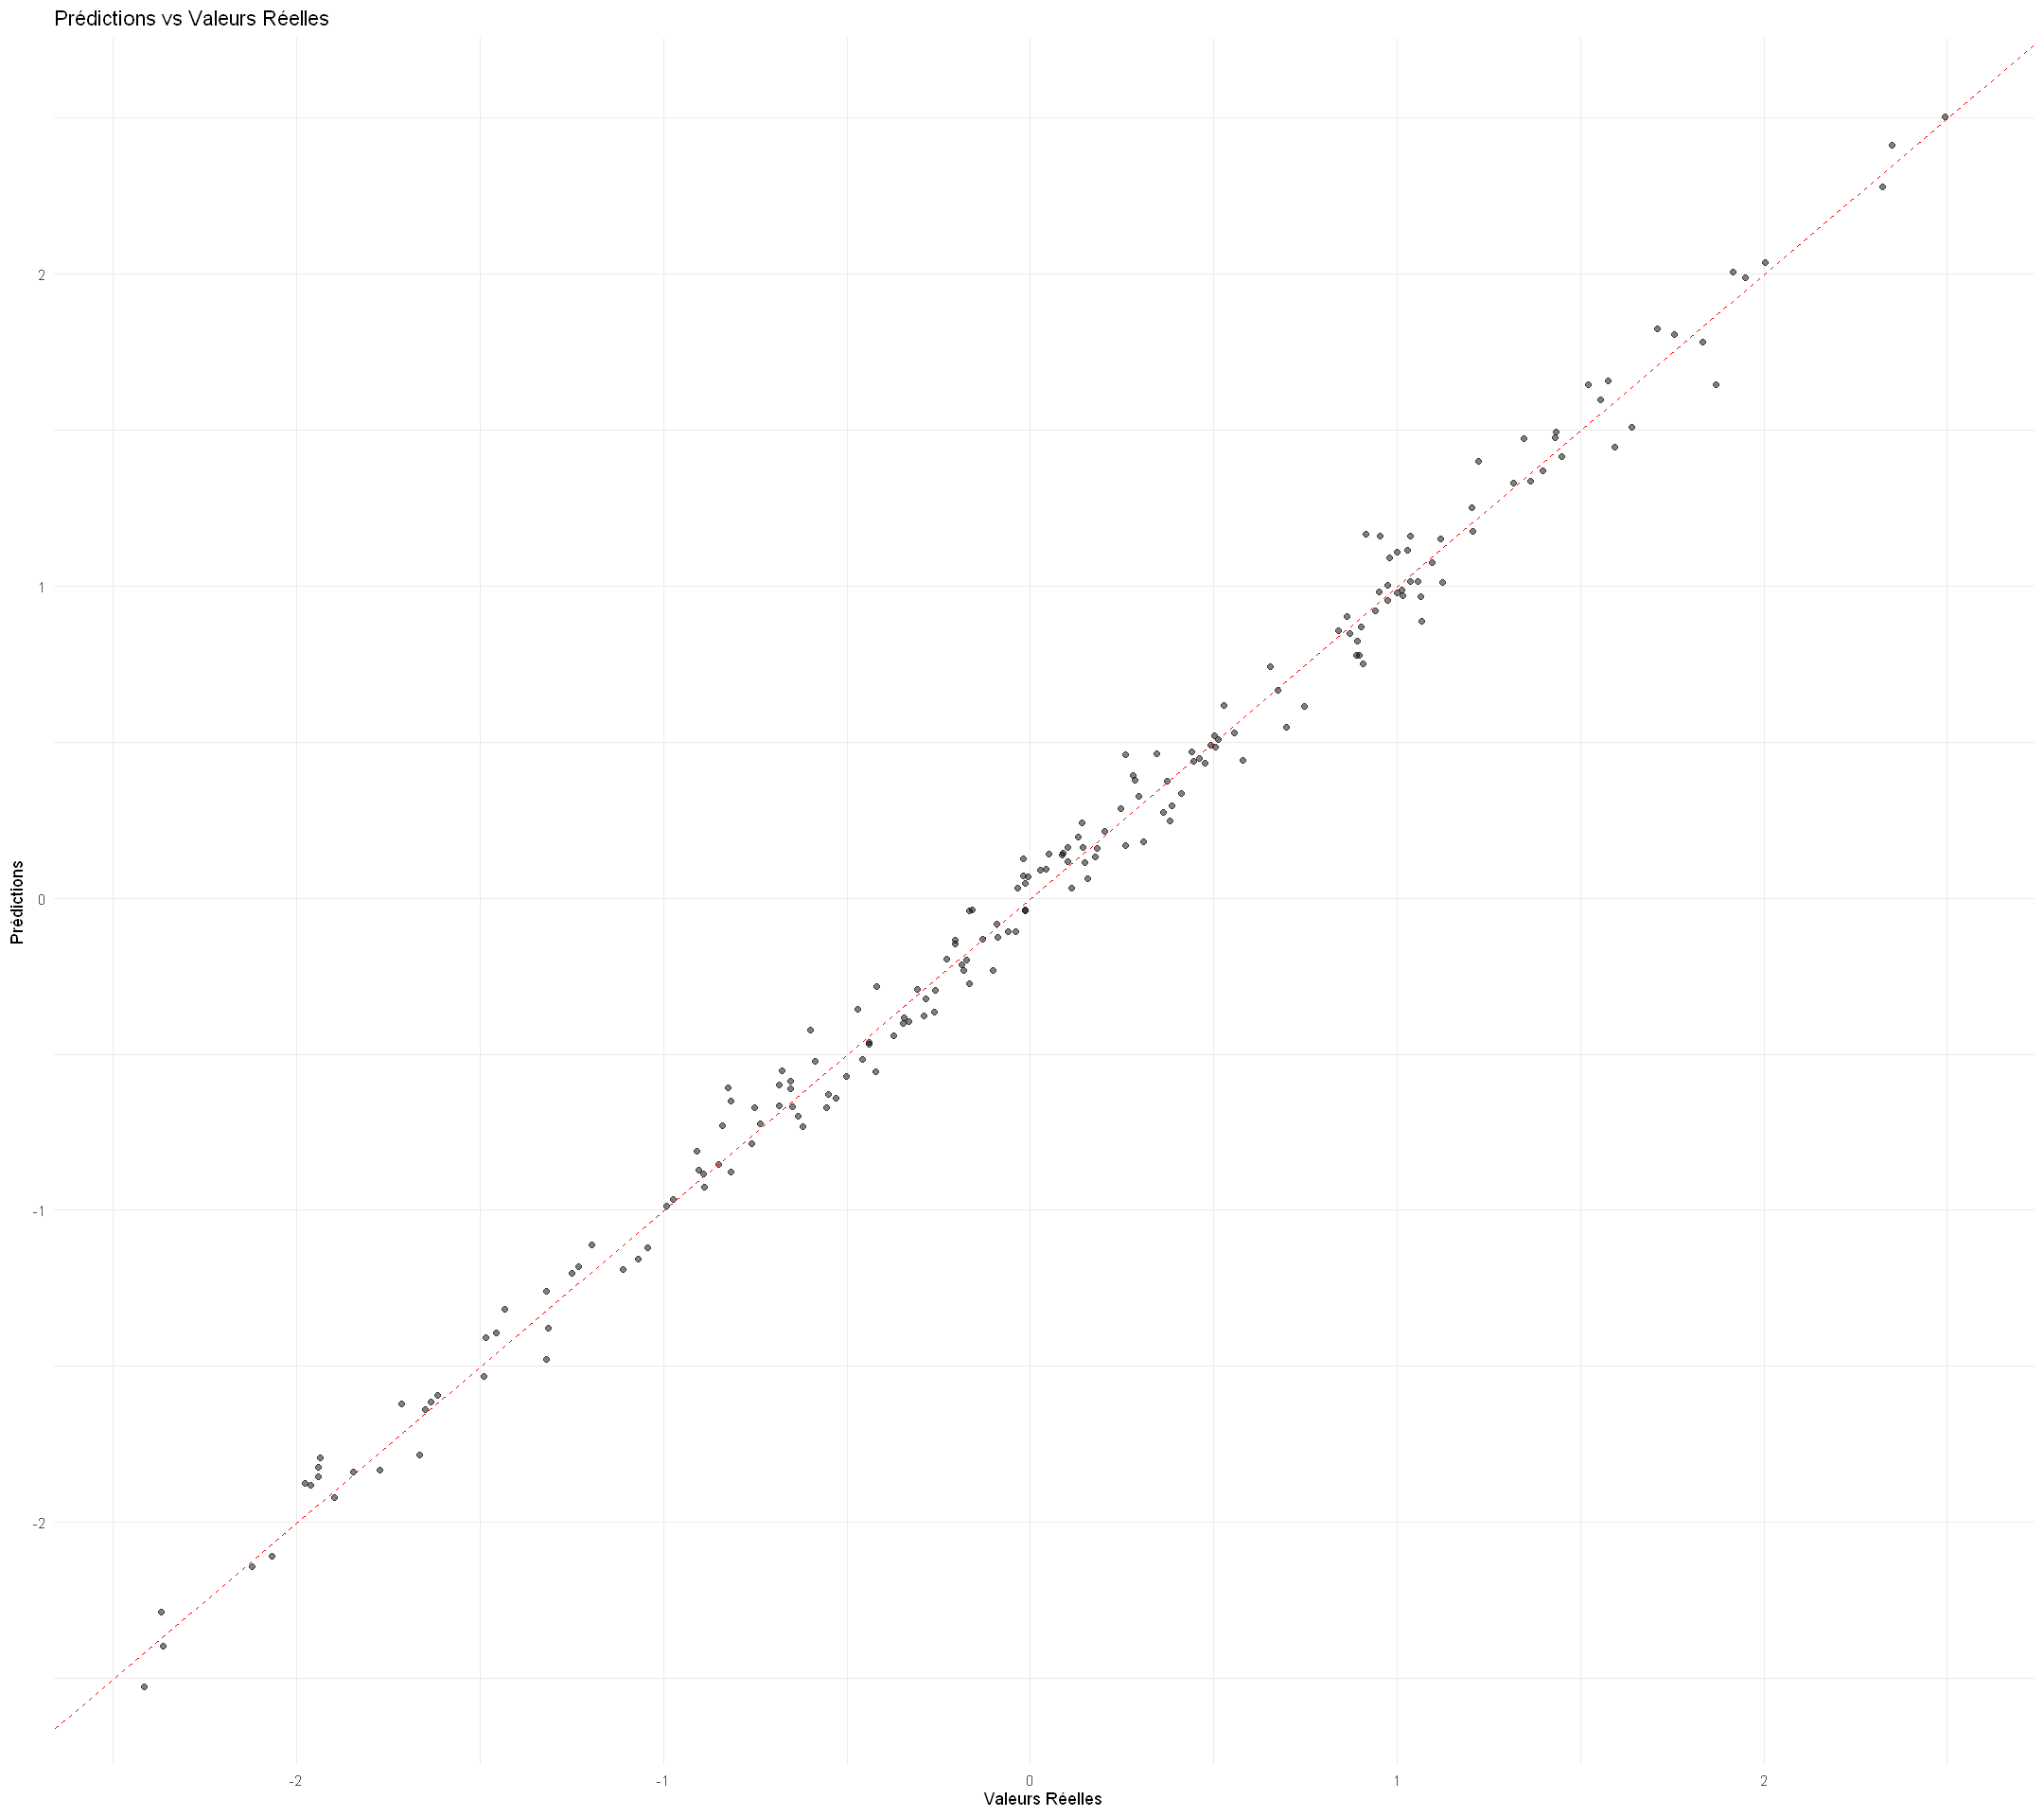

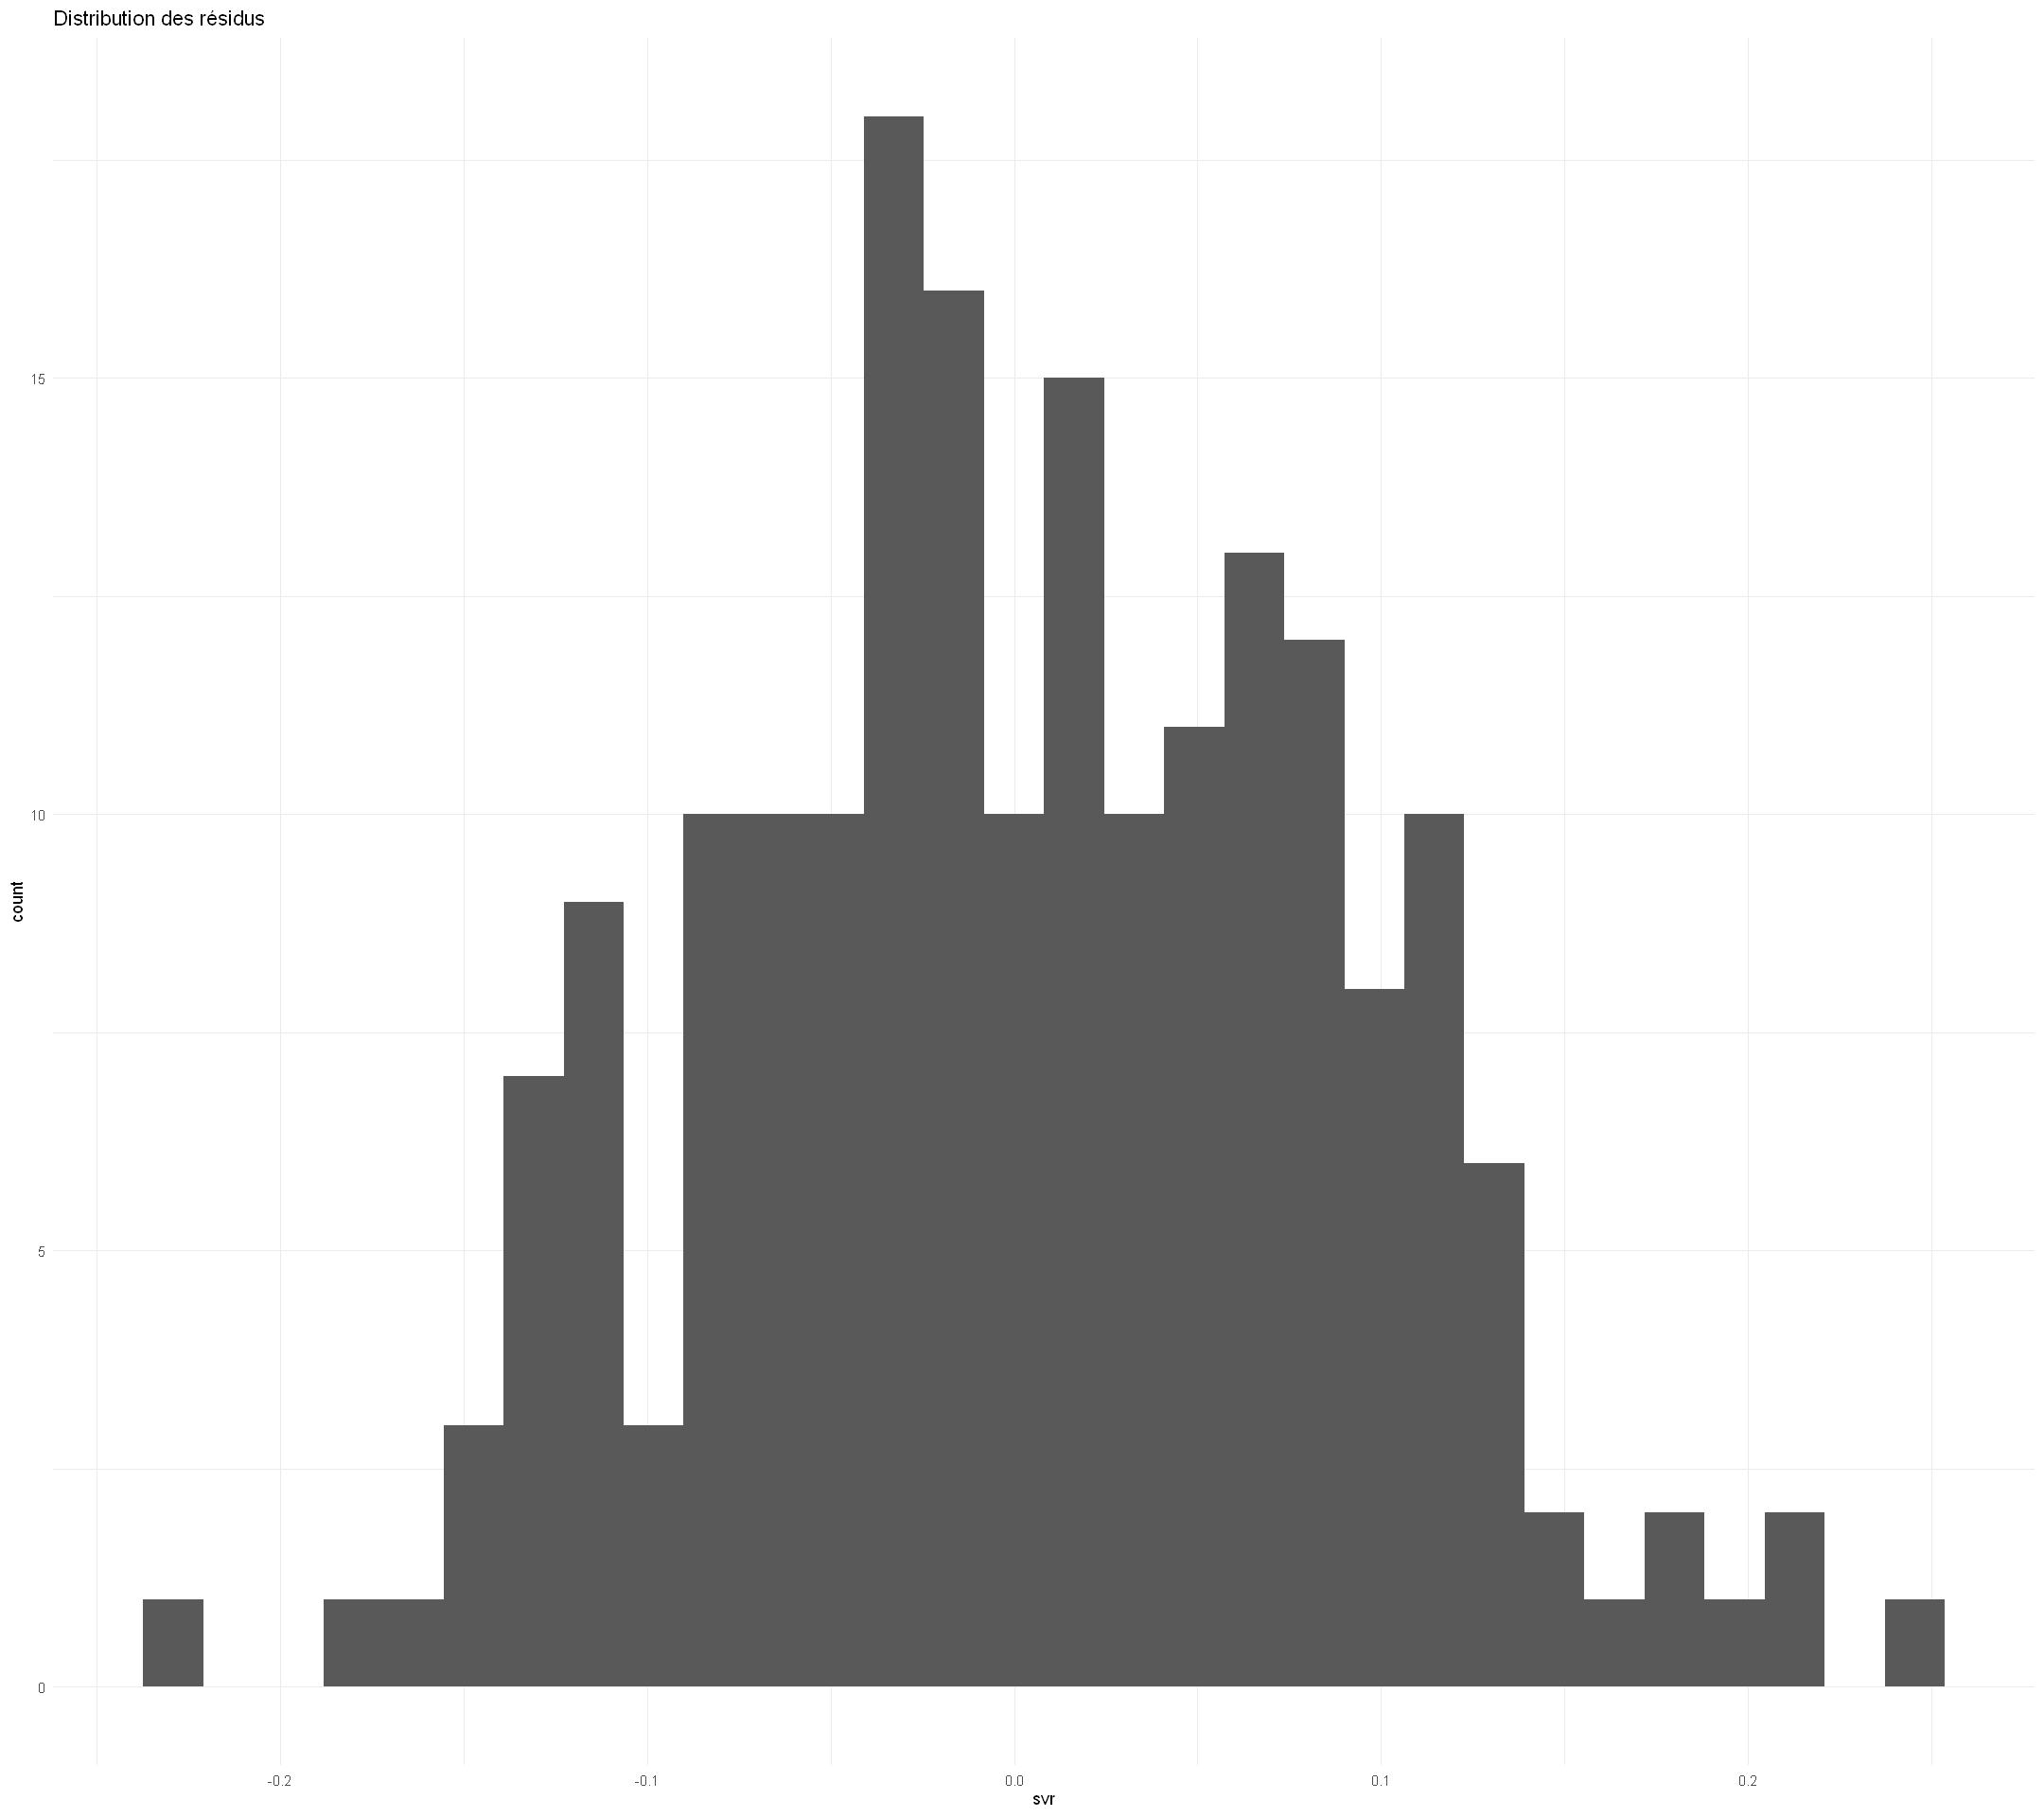

In [255]:
print(paste("MSE loss de SVR: ",loss_mse_calo(best_svr, test)))
test_predicted[, "S_Calories_Burned_pred_svr"] <- predict(best_svr,test)
print(paste("R^2: ", cor(test$S_Calories_Burned, test_predicted[, "S_Calories_Burned_pred_svr"])^2))
ggplot(data = test_predicted) +
  geom_point(aes(x = S_Calories_Burned, y = S_Calories_Burned_pred_svr), alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Prédictions vs Valeurs Réelles",
       x = "Valeurs Réelles", 
       y = "Prédictions") +
  theme_minimal()
test_residuals[, "svr"] = test_predicted$S_Calories_Burned_pred_svr - test_predicted$S_Calories_Burned
ggplot(data = test_residuals, aes(x = svr)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")+
  theme_minimal()

In [260]:
shapiro.test(test_residuals$lm)


	Shapiro-Wilk normality test

data:  test_residuals$lm
W = 0.99142, p-value = 0.31


**Interpreter**

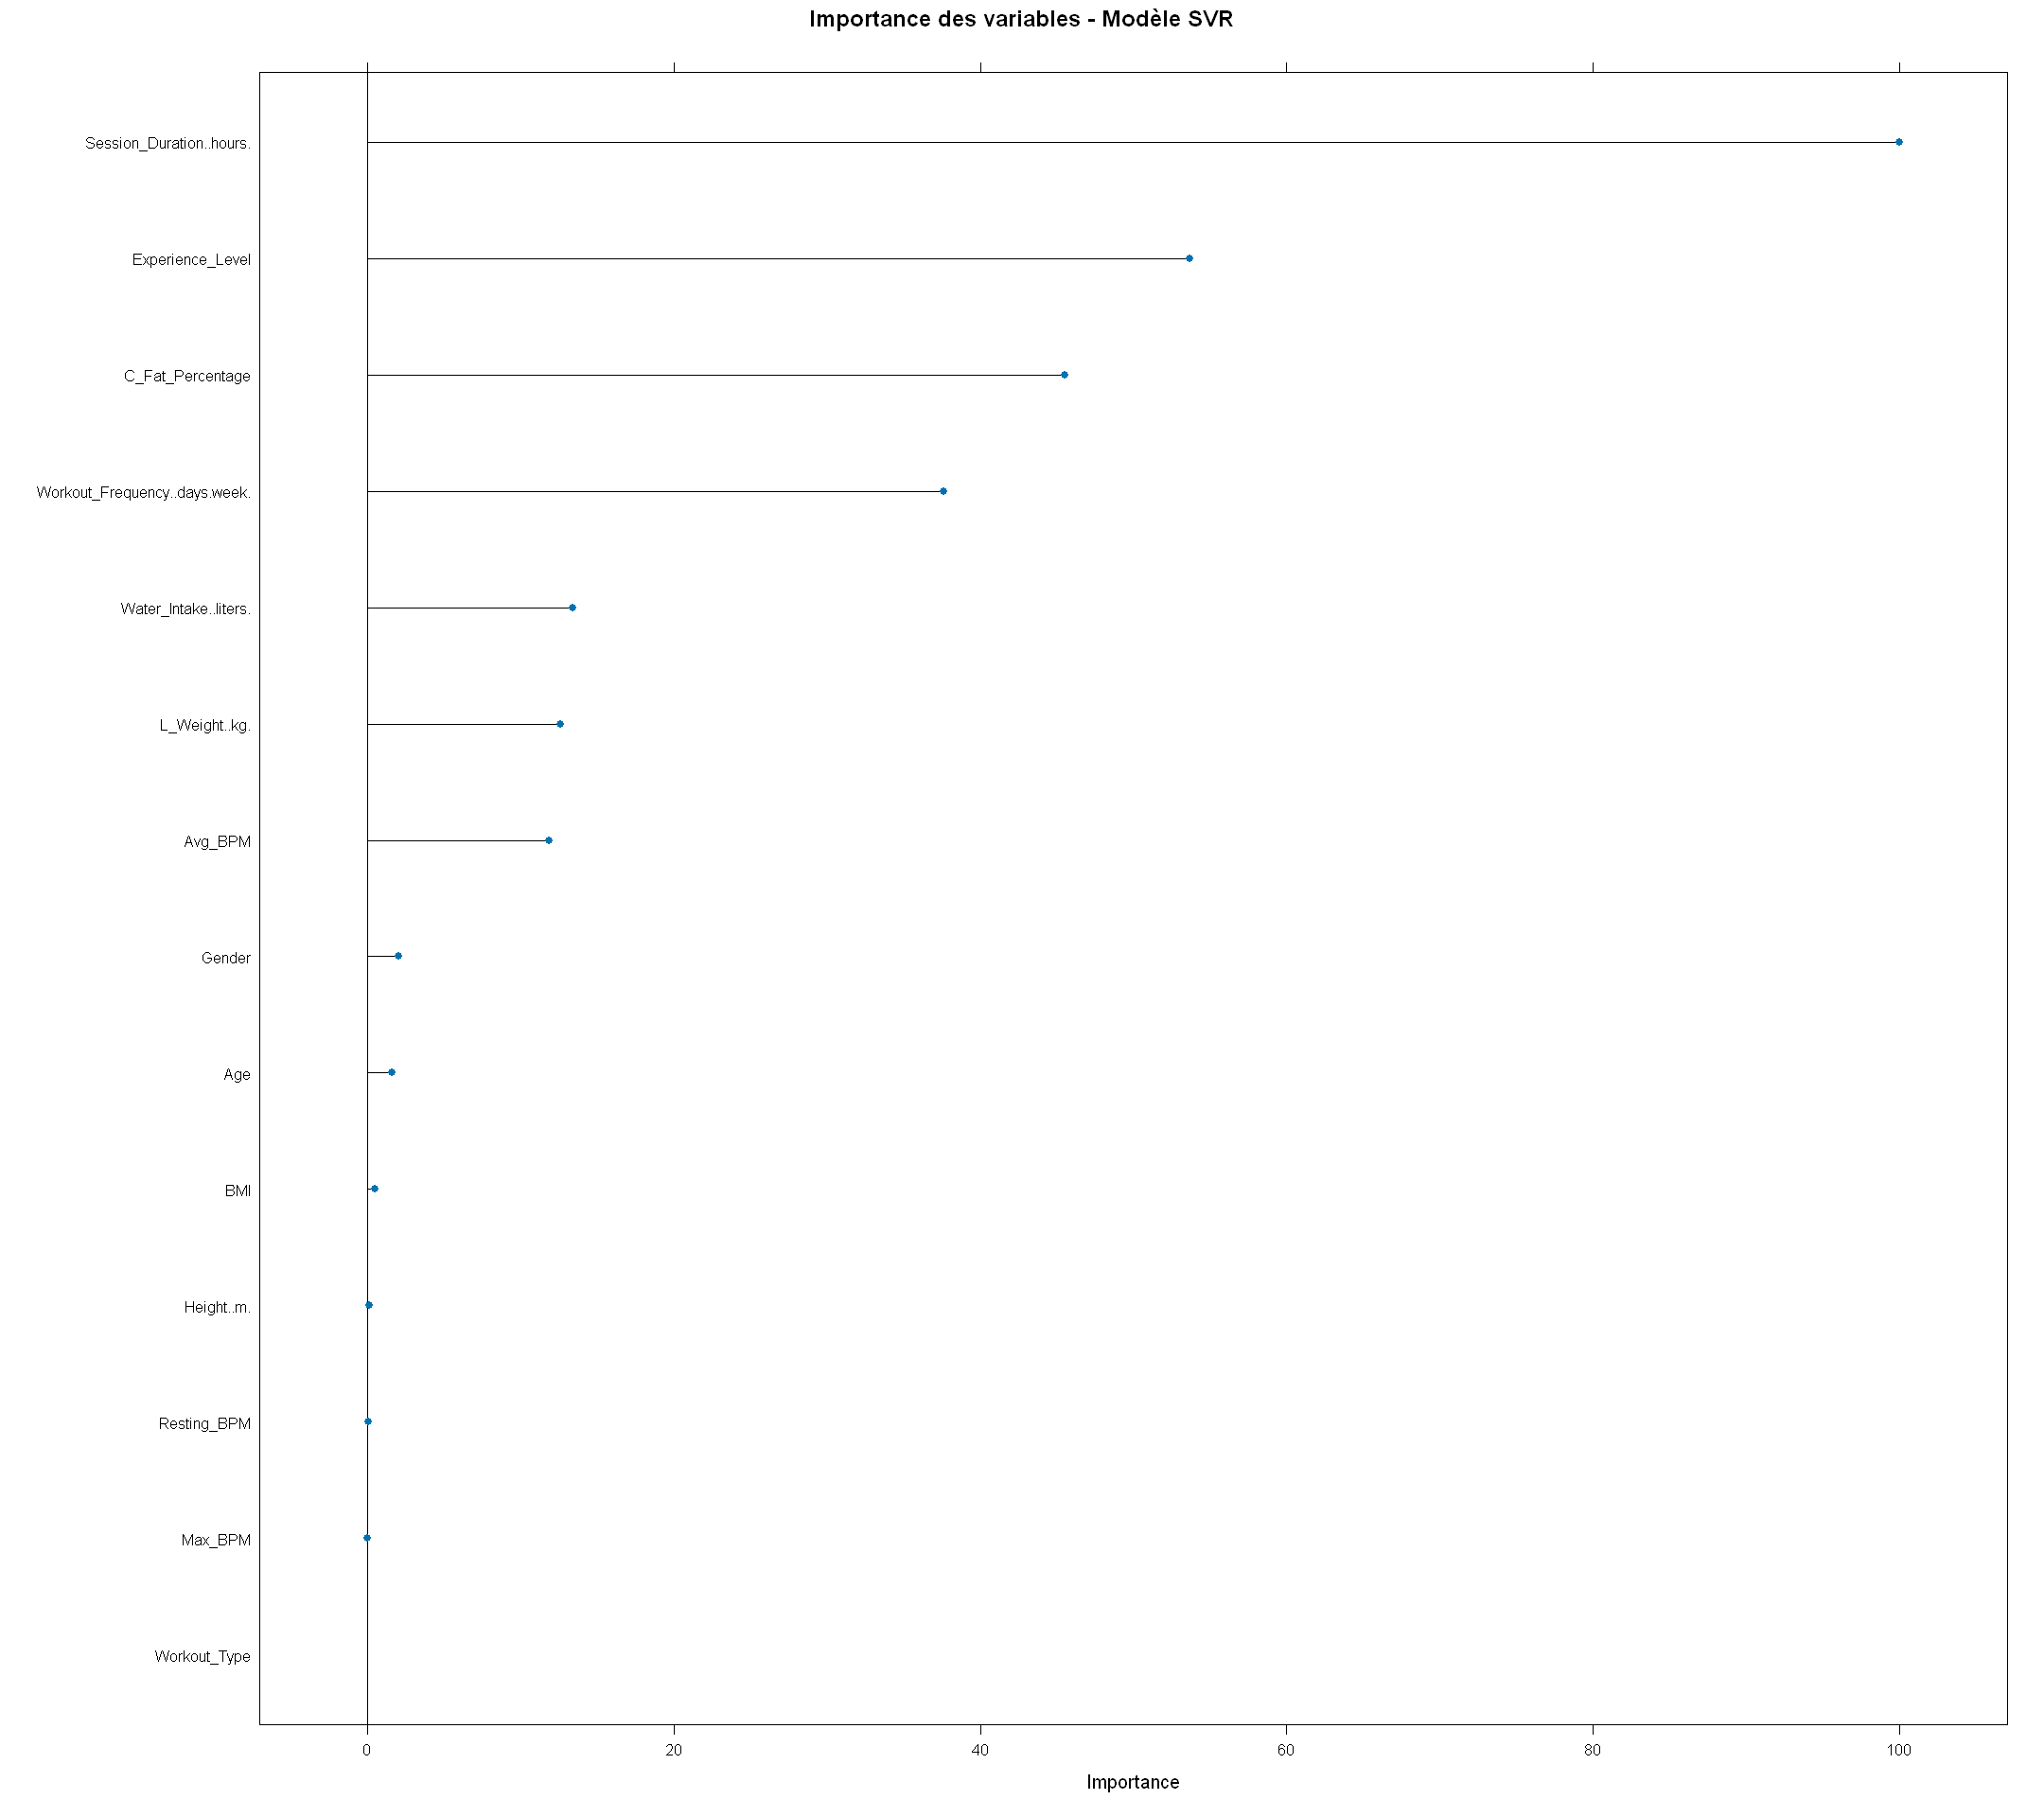

In [257]:
ctrl <- trainControl(method = "none")
svr_caret <- train(
    S_Calories_Burned ~ ., 
    data = train,
    method = "svmRadial",
    trControl = ctrl,
    tuneGrid = data.frame(
      sigma = best_svr$gamma,
      C = best_svr$cost
    )
  )

var_imp <- varImp(svr_caret, scale = TRUE)
plot(var_imp, main = "Importance des variables - Modèle SVR")

#### <FONT COLOR="Blue">1.3. Regression Tree</font>

Car la taille de données est petite, on essaye avec cp = 0 (maximun de la compléxité)

In [262]:
tree.reg_no_i <- rpart(S_Calories_Burned ~ ., data = train, 
                      control = rpart.control(cp = 0, xval = 50))
optimal_row <- which.min(tree.reg_no_i$cptable[, "xerror"])
optimal_cp <- tree.reg_no_i$cptable[optimal_row, "CP"]

tree.reg_no_i <- prune(tree.reg_no_i, cp = optimal_cp)
#plot(as.party(tree.reg_no_i), type="simple")
nsplits <- tree.reg_no_i$cptable[optimal_row, "nsplit"]
cat("Optimal number of splits:", nsplits)

Optimal number of splits: 59

In [264]:
best_cart = tree.reg_no_i

- **Evaluation le model**

[1] "MSE loss de CART:  0.000947327019537969"
[1] "R^2:  0.935167131648201"


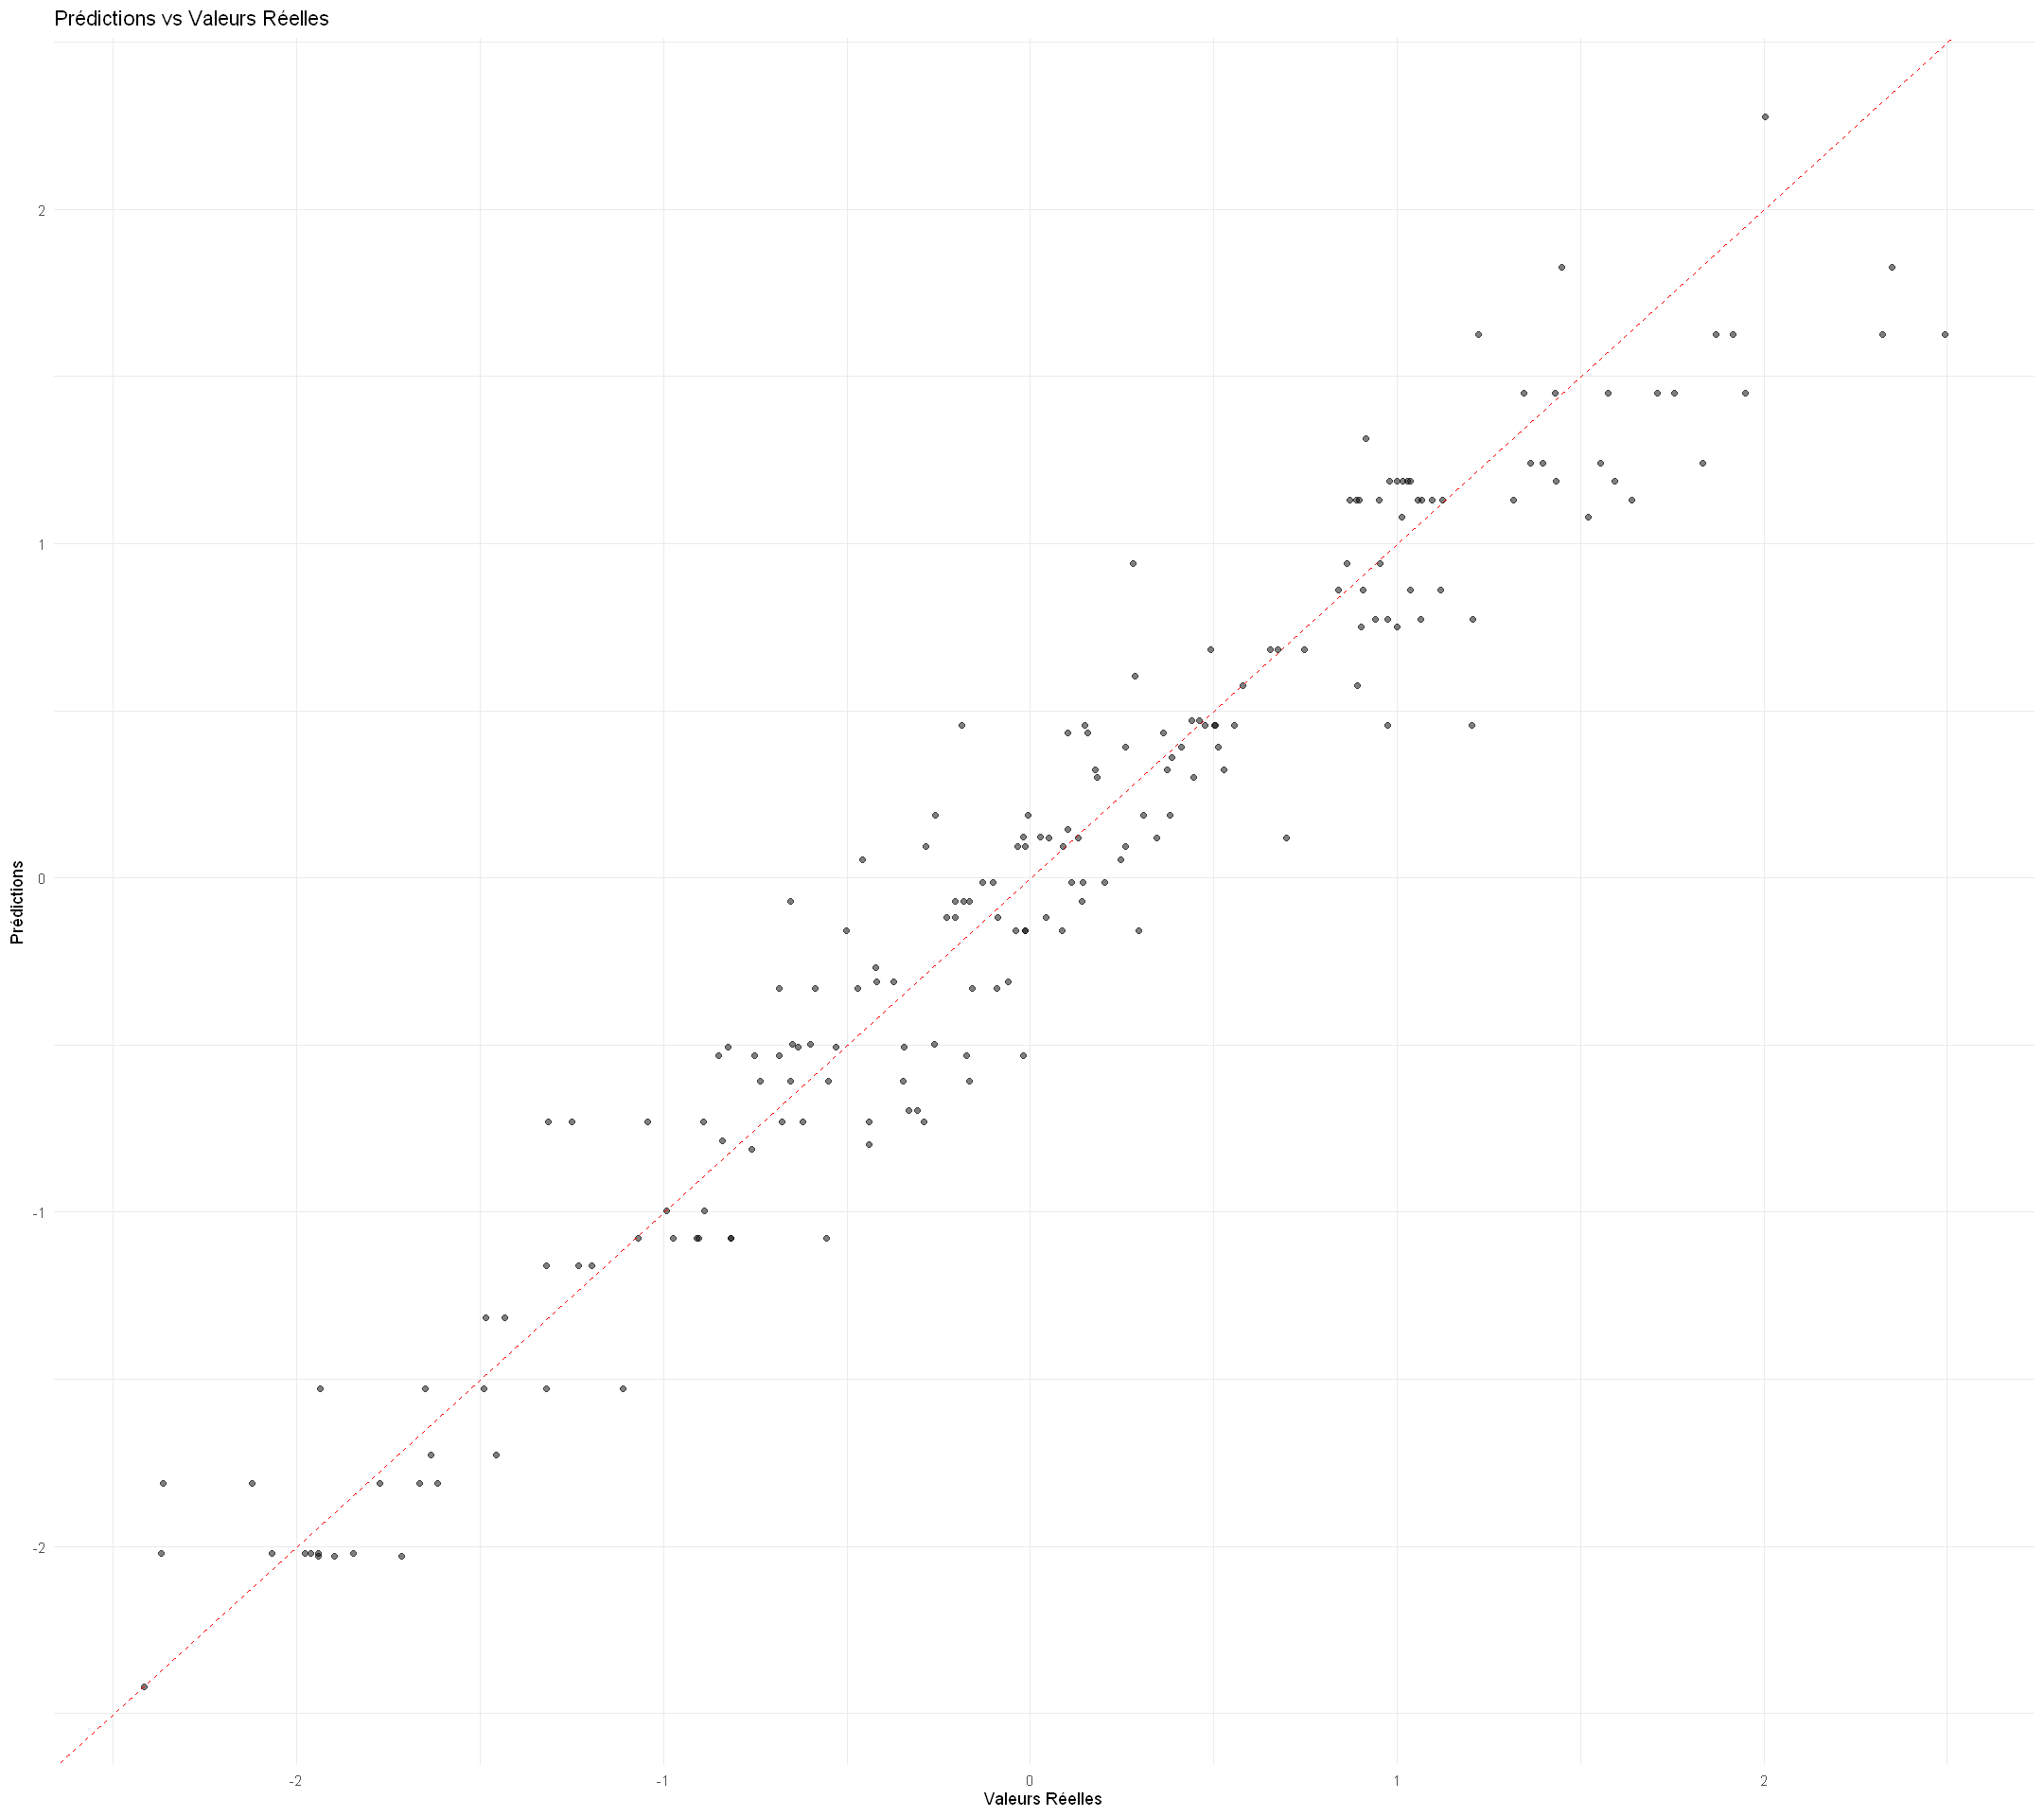

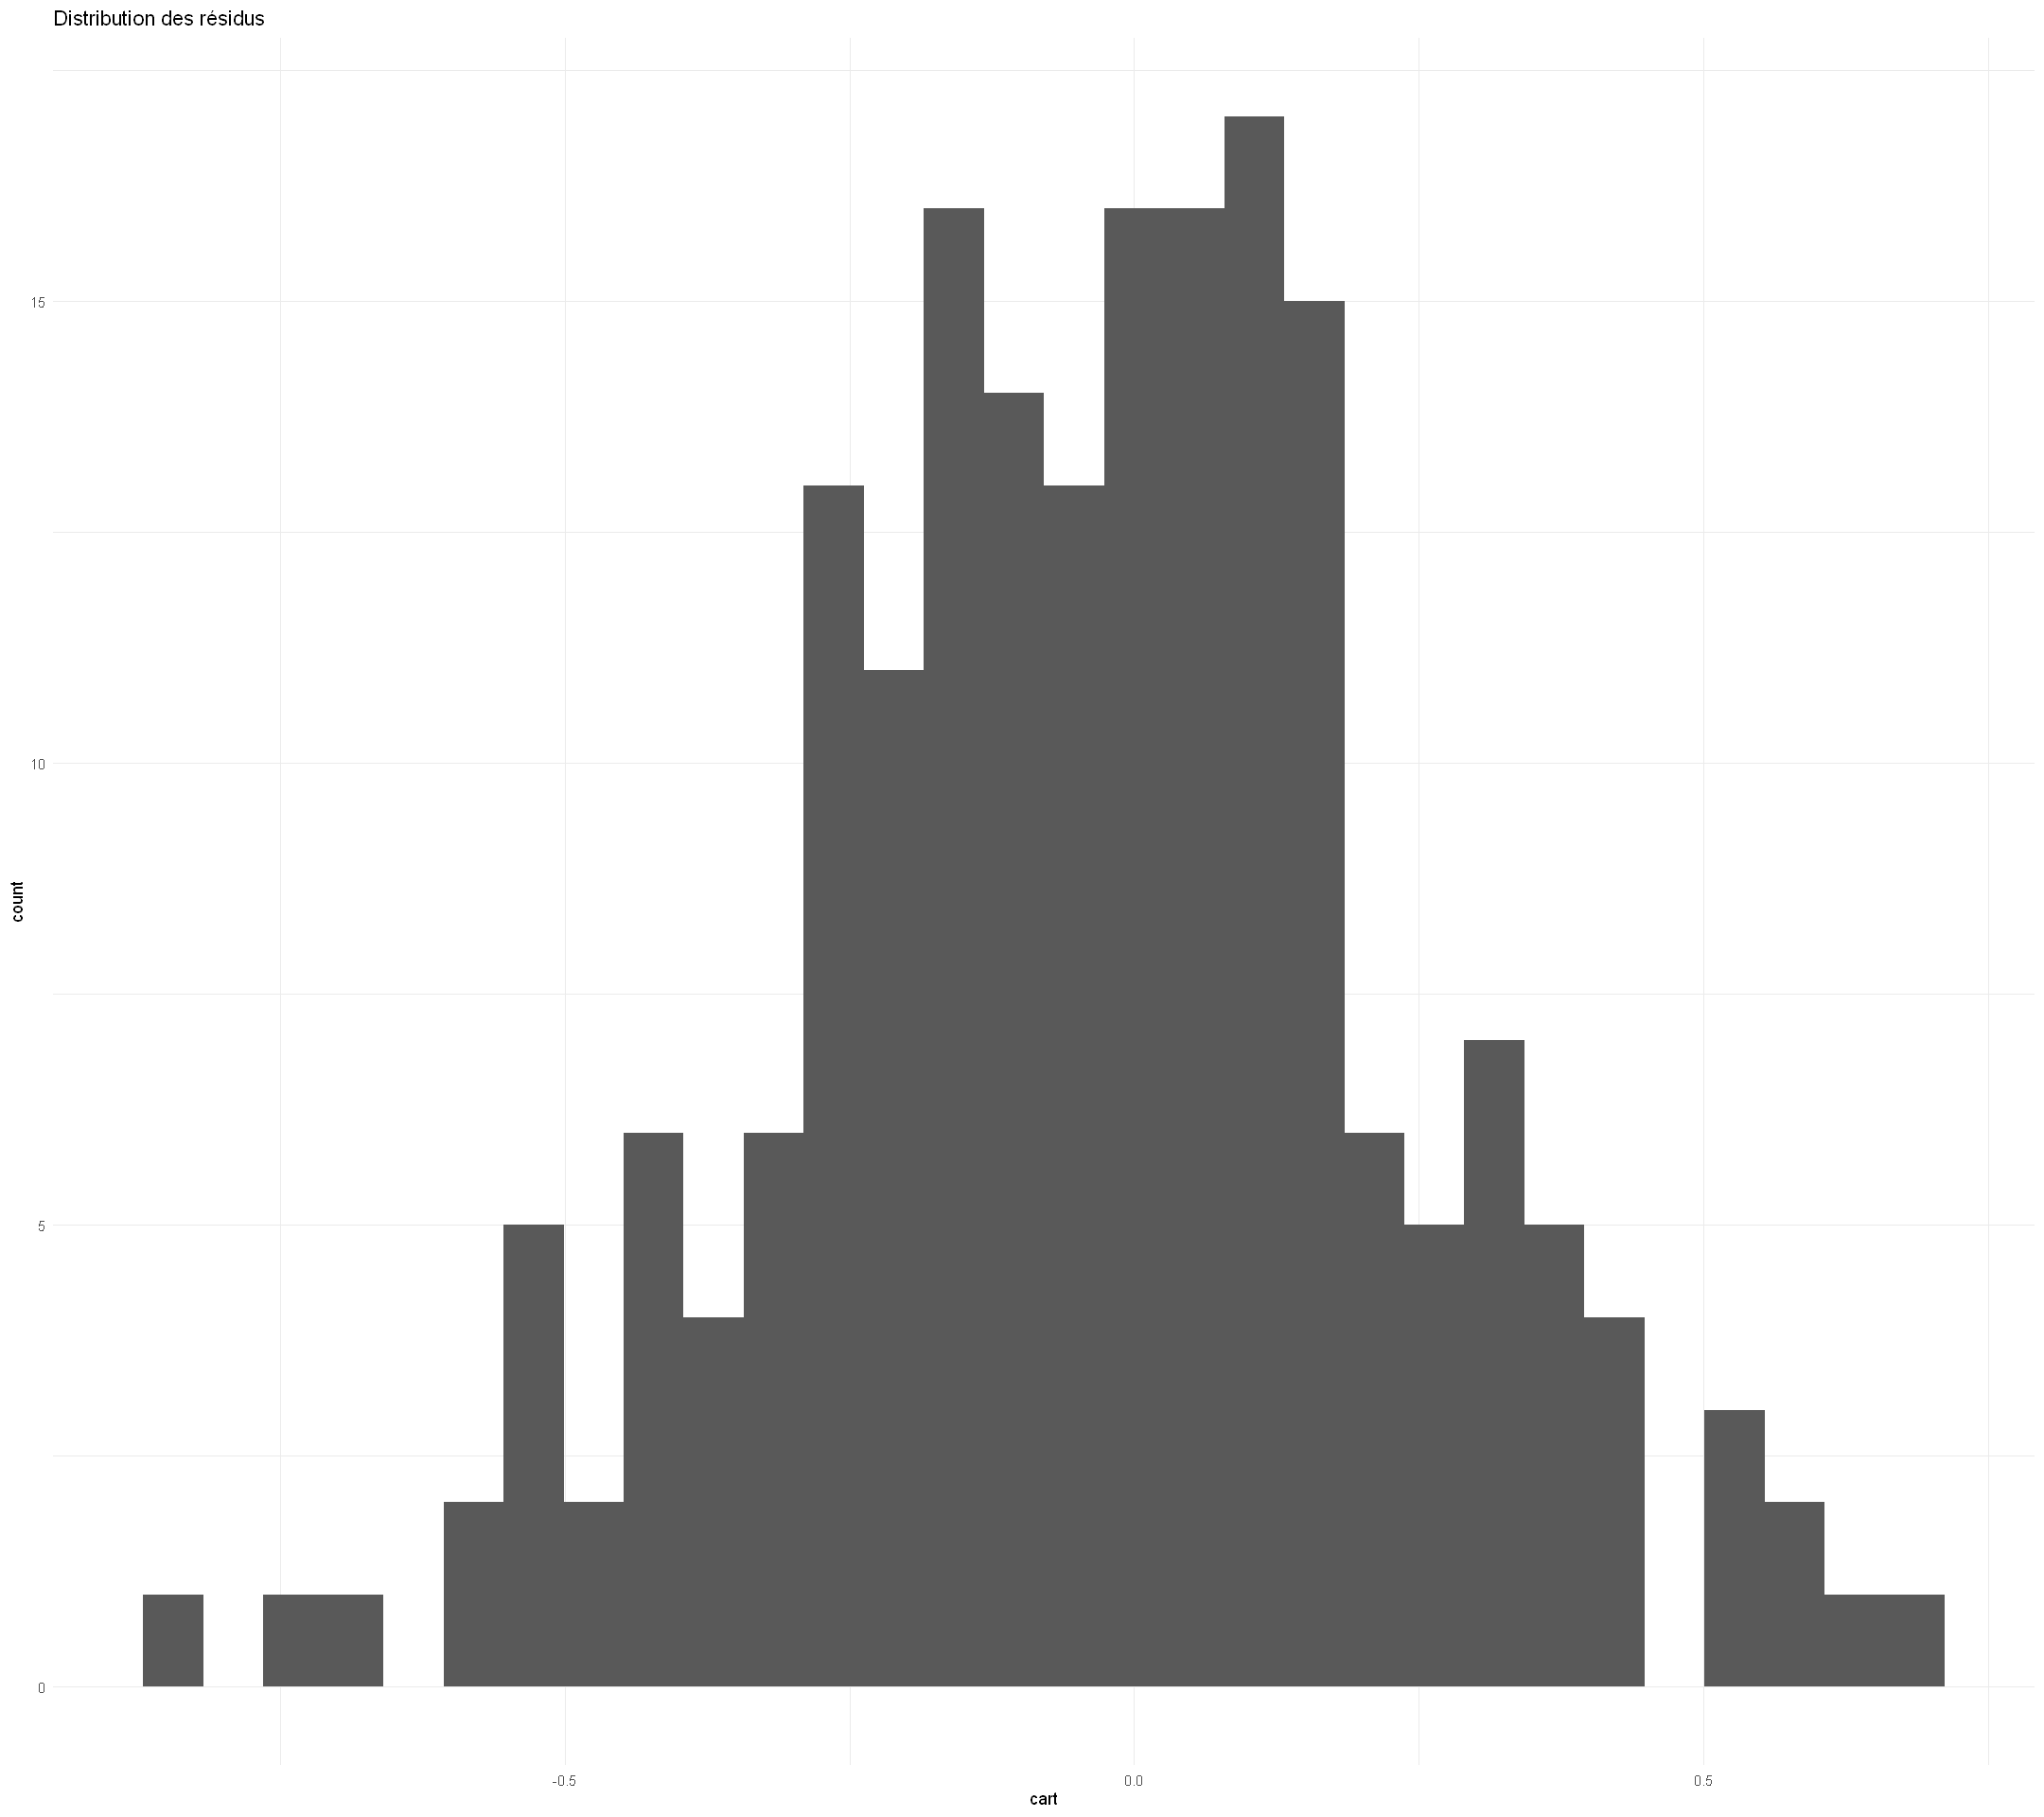

In [268]:
print(paste("MSE loss de CART: ",loss_mse_calo(model = best_cart, test_data = test)))
test_predicted[, "S_Calories_Burned_pred_cart"] <- predict(best_cart,test)
print(paste("R^2: ", cor(test$S_Calories_Burned, test_predicted[, "S_Calories_Burned_pred_cart"])^2))
ggplot(data = test_predicted) +
  geom_point(aes(x = S_Calories_Burned, y = S_Calories_Burned_pred_cart), alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Prédictions vs Valeurs Réelles",
       x = "Valeurs Réelles", 
       y = "Prédictions") +
  theme_minimal()
test_residuals[, "cart"] <- test_predicted$S_Calories_Burned_pred_cart - test_predicted$S_Calories_Burned
ggplot(data = test_residuals, aes(x = cart)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")+
  theme_minimal()

**Interprétation**

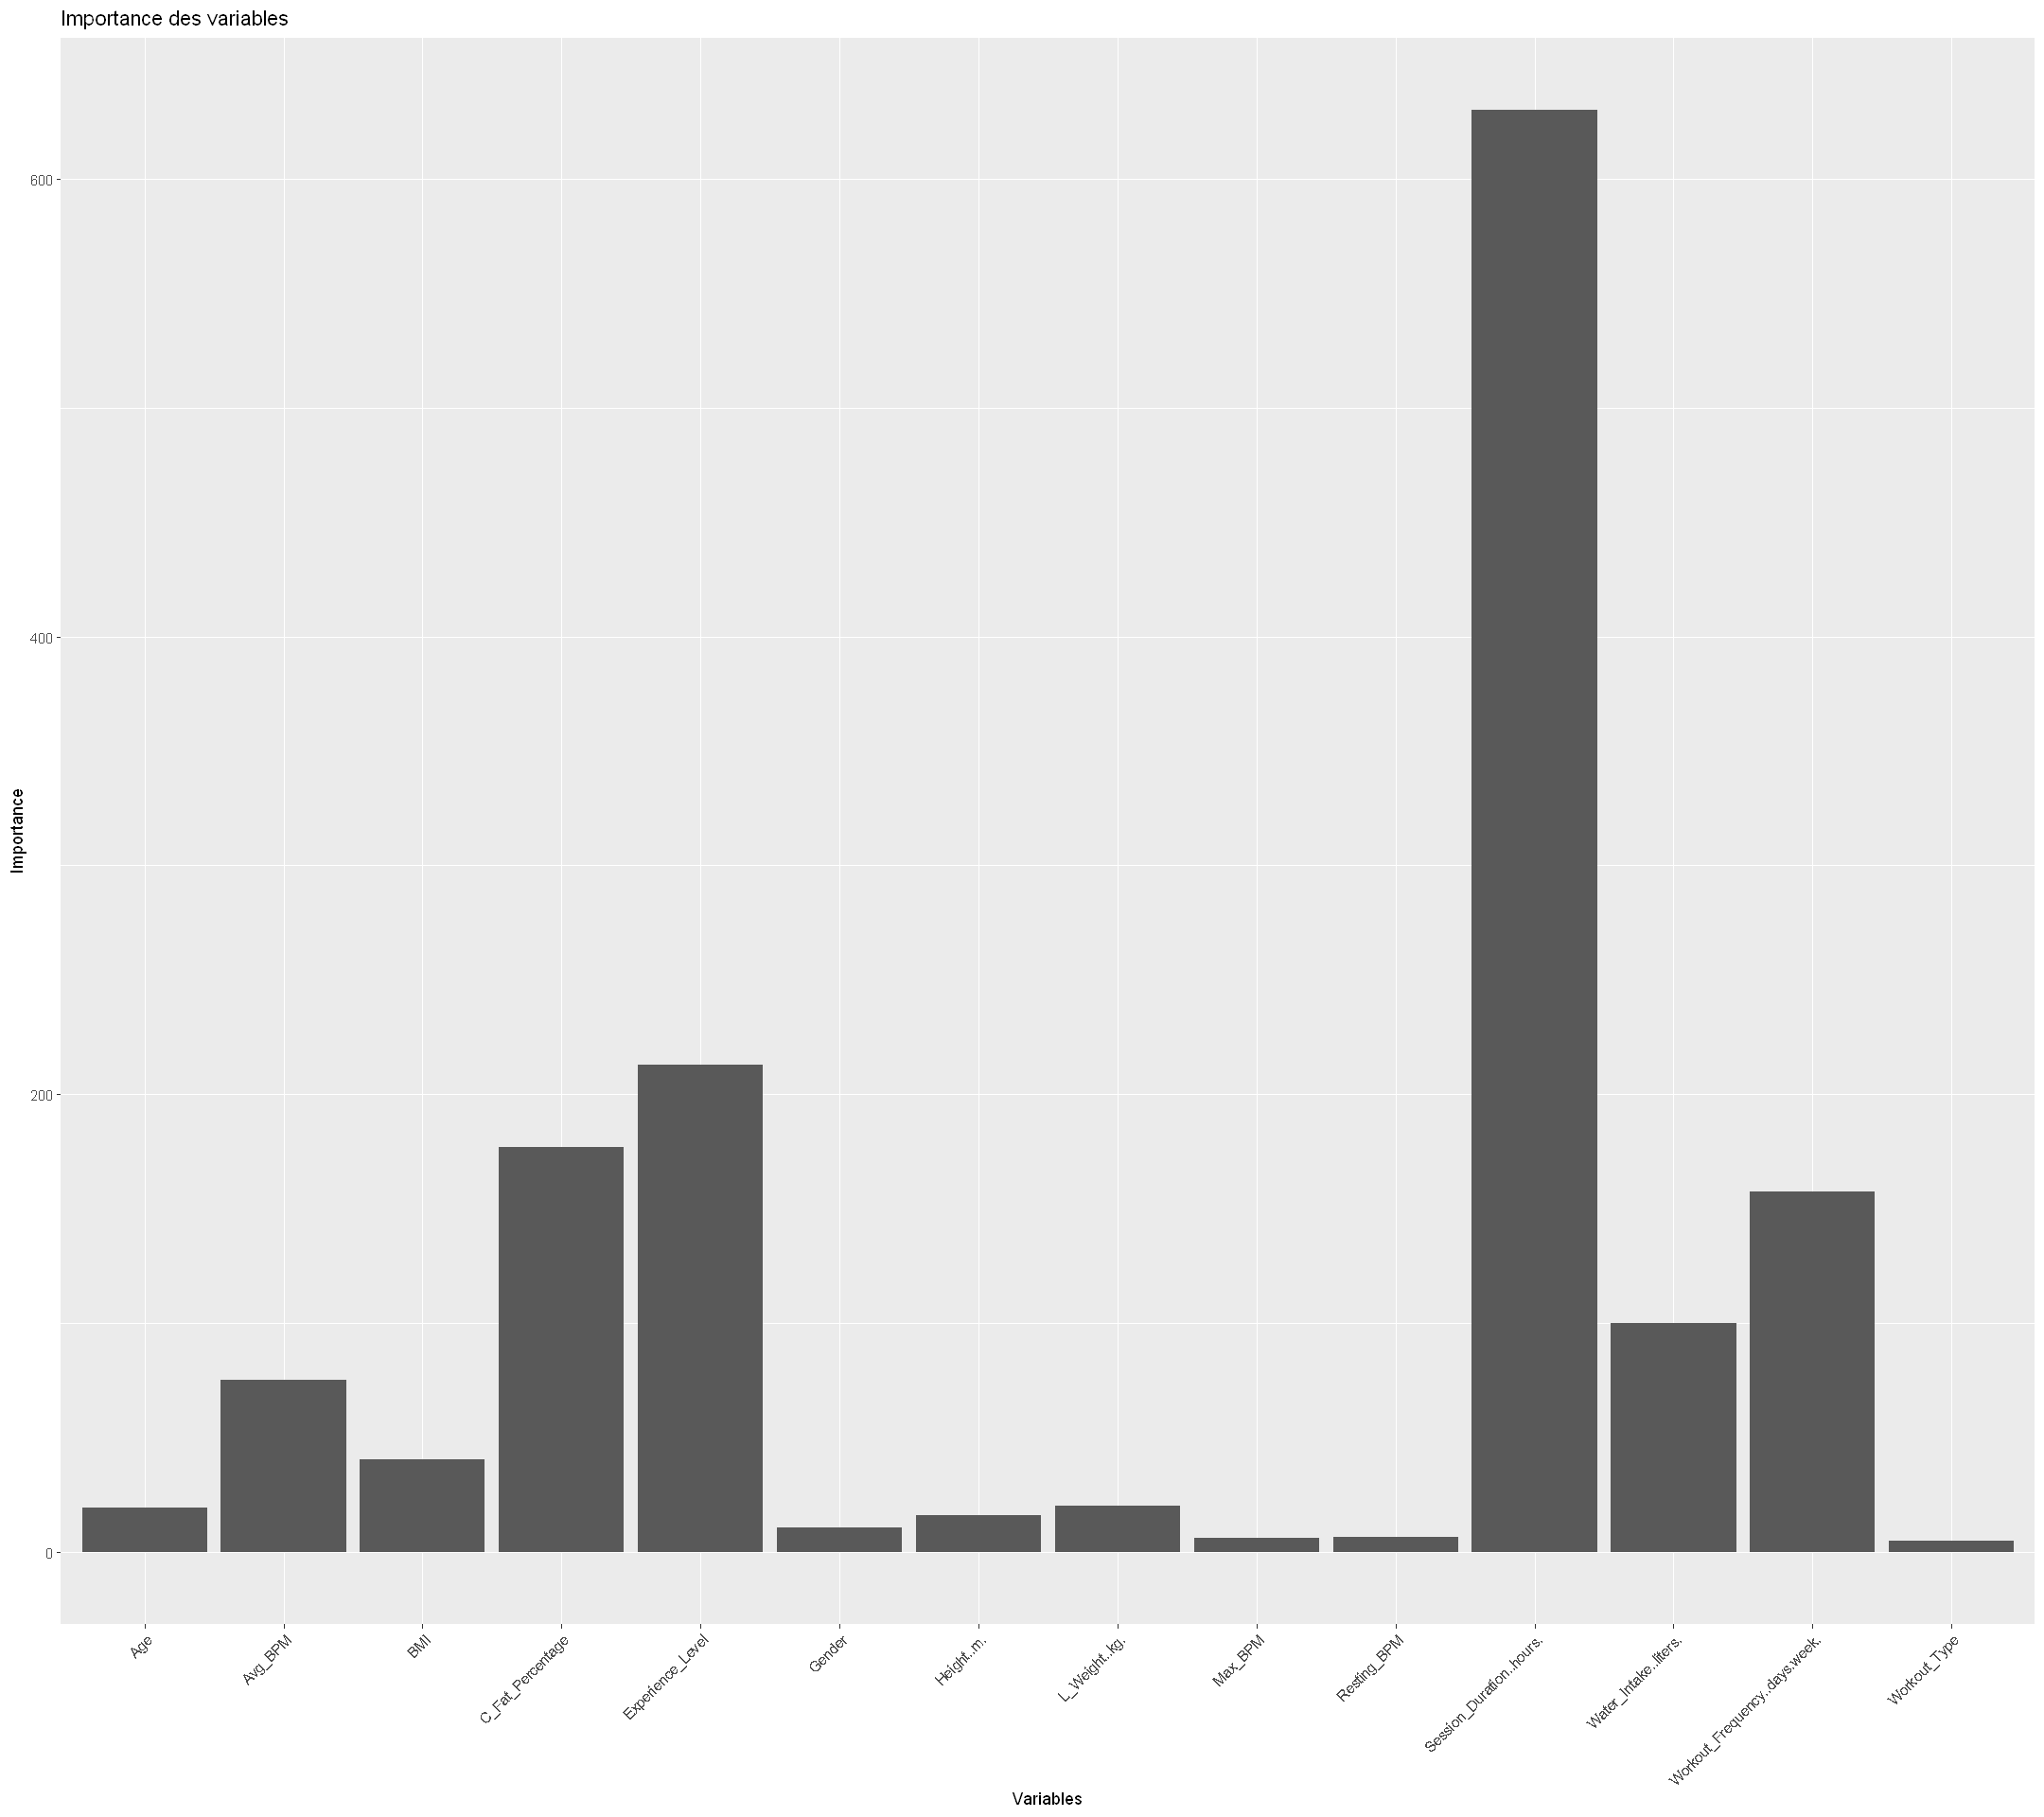

In [270]:
inter_cart = as.data.frame(best_cart$variable.importance)
names(inter_cart)[1] = "Important"

inter_cart$Variables <- rownames(inter_cart)

ggplot(data = inter_cart, aes(x = Variables, y = Important)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Importance des variables", 
       x = "Variables", 
       y = "Importance")

### <FONT COLOR="Gray">2. Agrégation de modèles</font>

#### <FONT COLOR="Blue">2.1. Random forest</font>

- **Trouver les meilleurs hypers parametres**

In [690]:
# mtry
x <- train[, -which(names(train) == "S_Calories_Burned")]
y <- train$S_Calories_Burned
best_mtry <- tuneRF(
  x = x,
  y = y,
  ntreeTry = 500,
  stepFactor = 1.5,
  improve = 0.01,
  trace = FALSE,
  plot = FALSE
)
best_mtry <- best_mtry[which.min(best_mtry[, 2]), 1]


-0.5341346 0.01 
0.3270974 0.01 
0.2419877 0.01 
0.09102904 0.01 
0.0007320946 0.01 


- **Construire le model**

In [692]:
rf.reg_bestmtry=randomForest(S_Calories_Burned~., data=train,xtest=test[,-9],ytest=test[,"S_Calories_Burned"],
   ntree=500,mtry = best_mtry, do.trace=50,importance=TRUE, keep.forest = TRUE)
rf.reg_mtrydefault = randomForest(S_Calories_Burned~., data=train,xtest=test[,-9],ytest=test[,"S_Calories_Burned"],
   ntree=500,mtry = floor(ncol(train)/3), do.trace=50,importance=TRUE, keep.forest = TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02682     2.74 |    0.029     2.70 |
 100 |  0.02462     2.52 |  0.02679     2.49 |
 150 |  0.02412     2.47 |  0.02611     2.43 |
 200 |  0.02402     2.46 |   0.0262     2.44 |
 250 |  0.02372     2.43 |  0.02591     2.41 |
 300 |  0.02368     2.42 |   0.0255     2.37 |
 350 |  0.02339     2.39 |  0.02513     2.34 |
 400 |  0.02336     2.39 |  0.02512     2.34 |
 450 |  0.02307     2.36 |  0.02505     2.33 |
 500 |  0.02303     2.35 |  0.02499     2.32 |
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.05232     5.35 |  0.05495     5.11 |
 100 |  0.04358     4.46 |  0.05062     4.71 |
 150 |  0.04163     4.26 |  0.04856     4.52 |
 200 |  0.04061     4.15 |   0.0461     4.29 |
 250 |  0.04024     4.12 |  0.04611     4.29 |
 300 |  0.03959     4.05 |  0.04614     4.29 |
 350 |  0.03939     4.03 |  0.04644     4.32 |
 400 |  0.039

In [694]:
best_rf = rf.reg_bestmtry

- **Evaluation le model**

[1] "MSE loss de Random Forest:  0.0249895944509676"
[1] "R^2:  0.979809491217928"


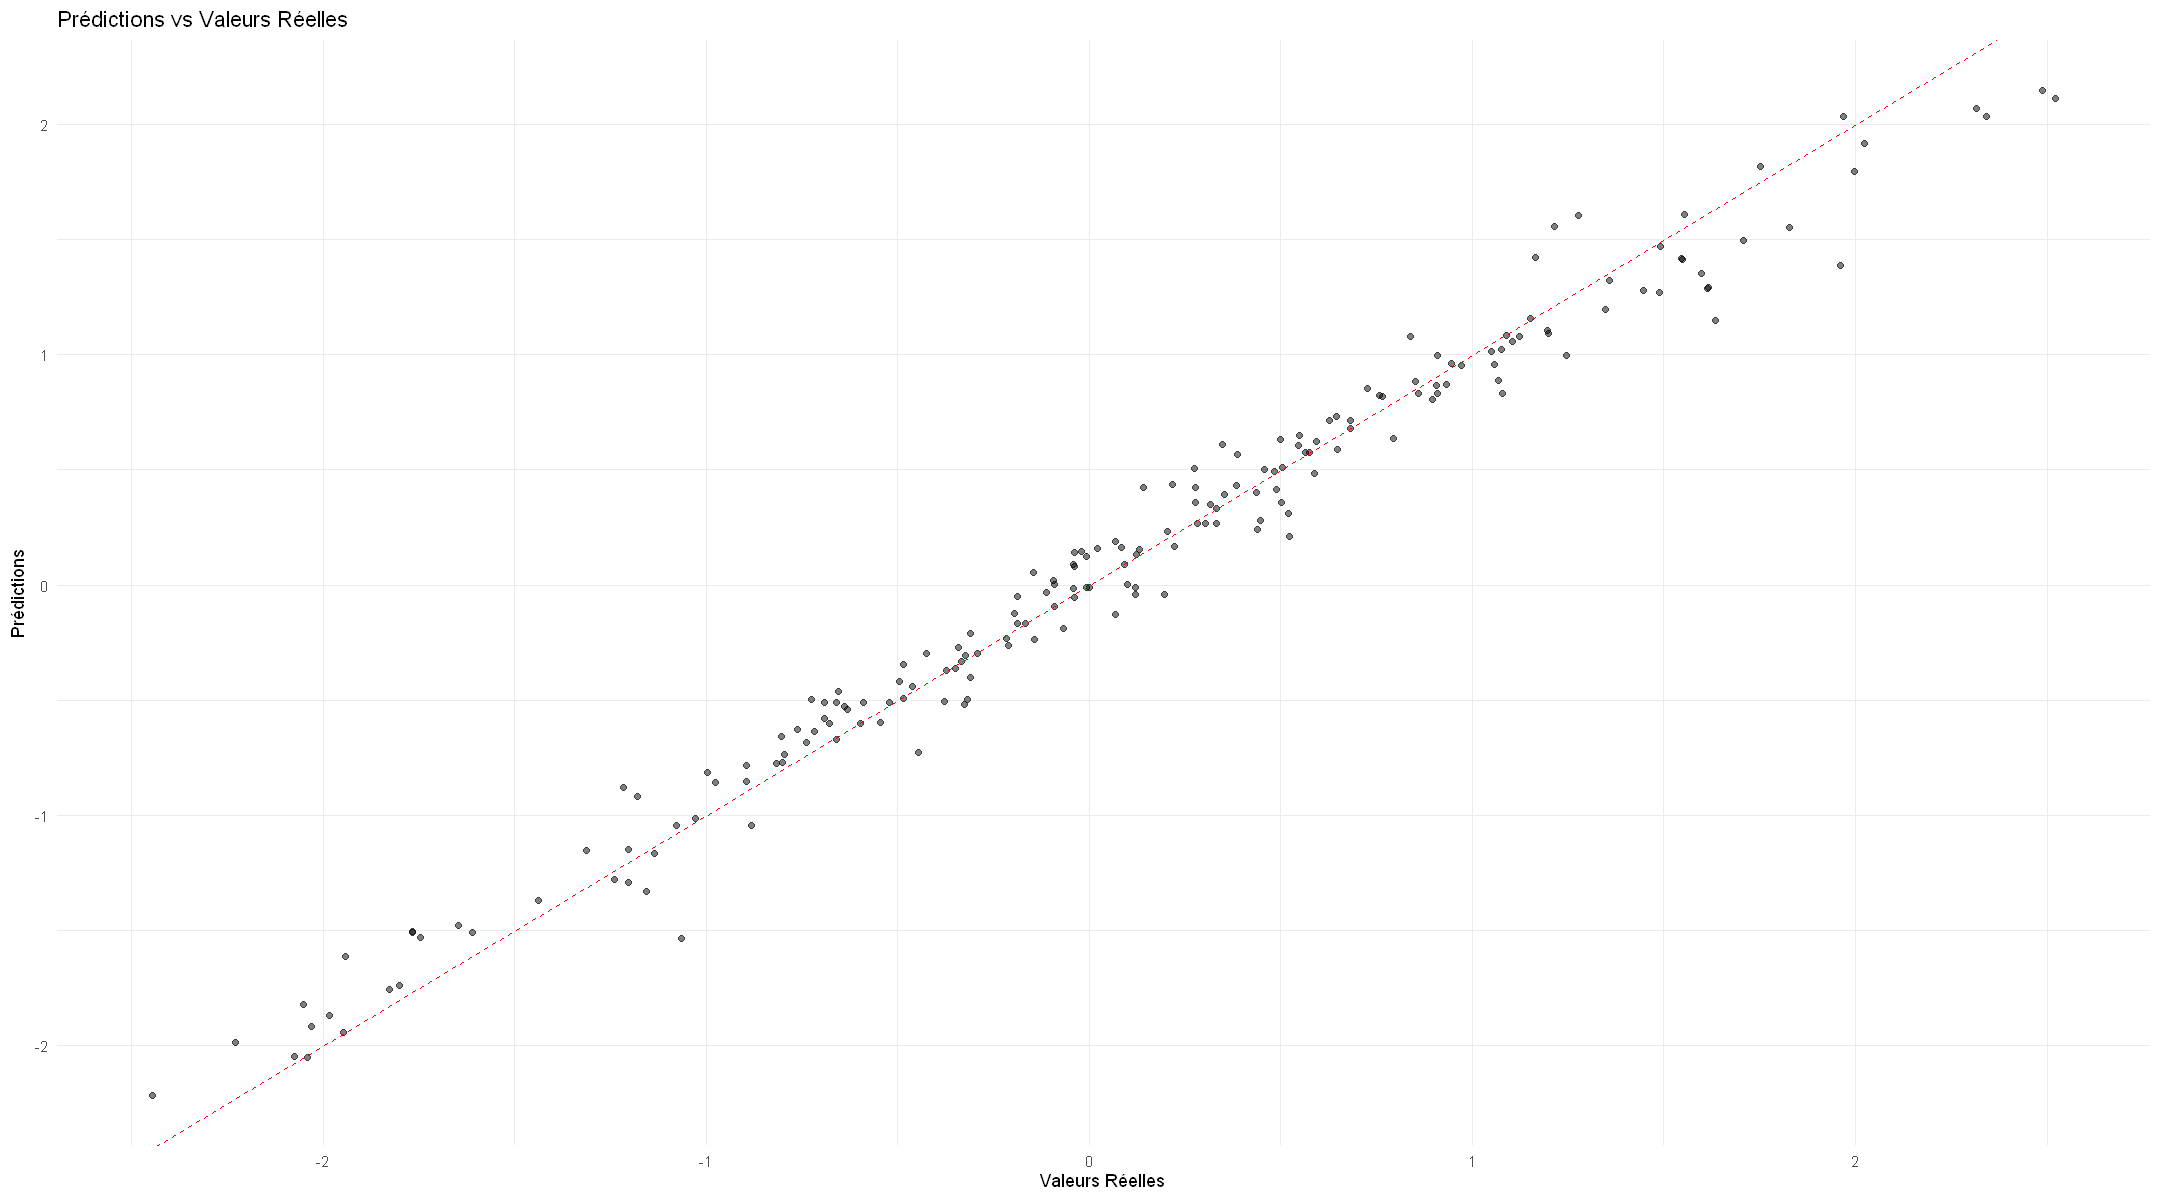

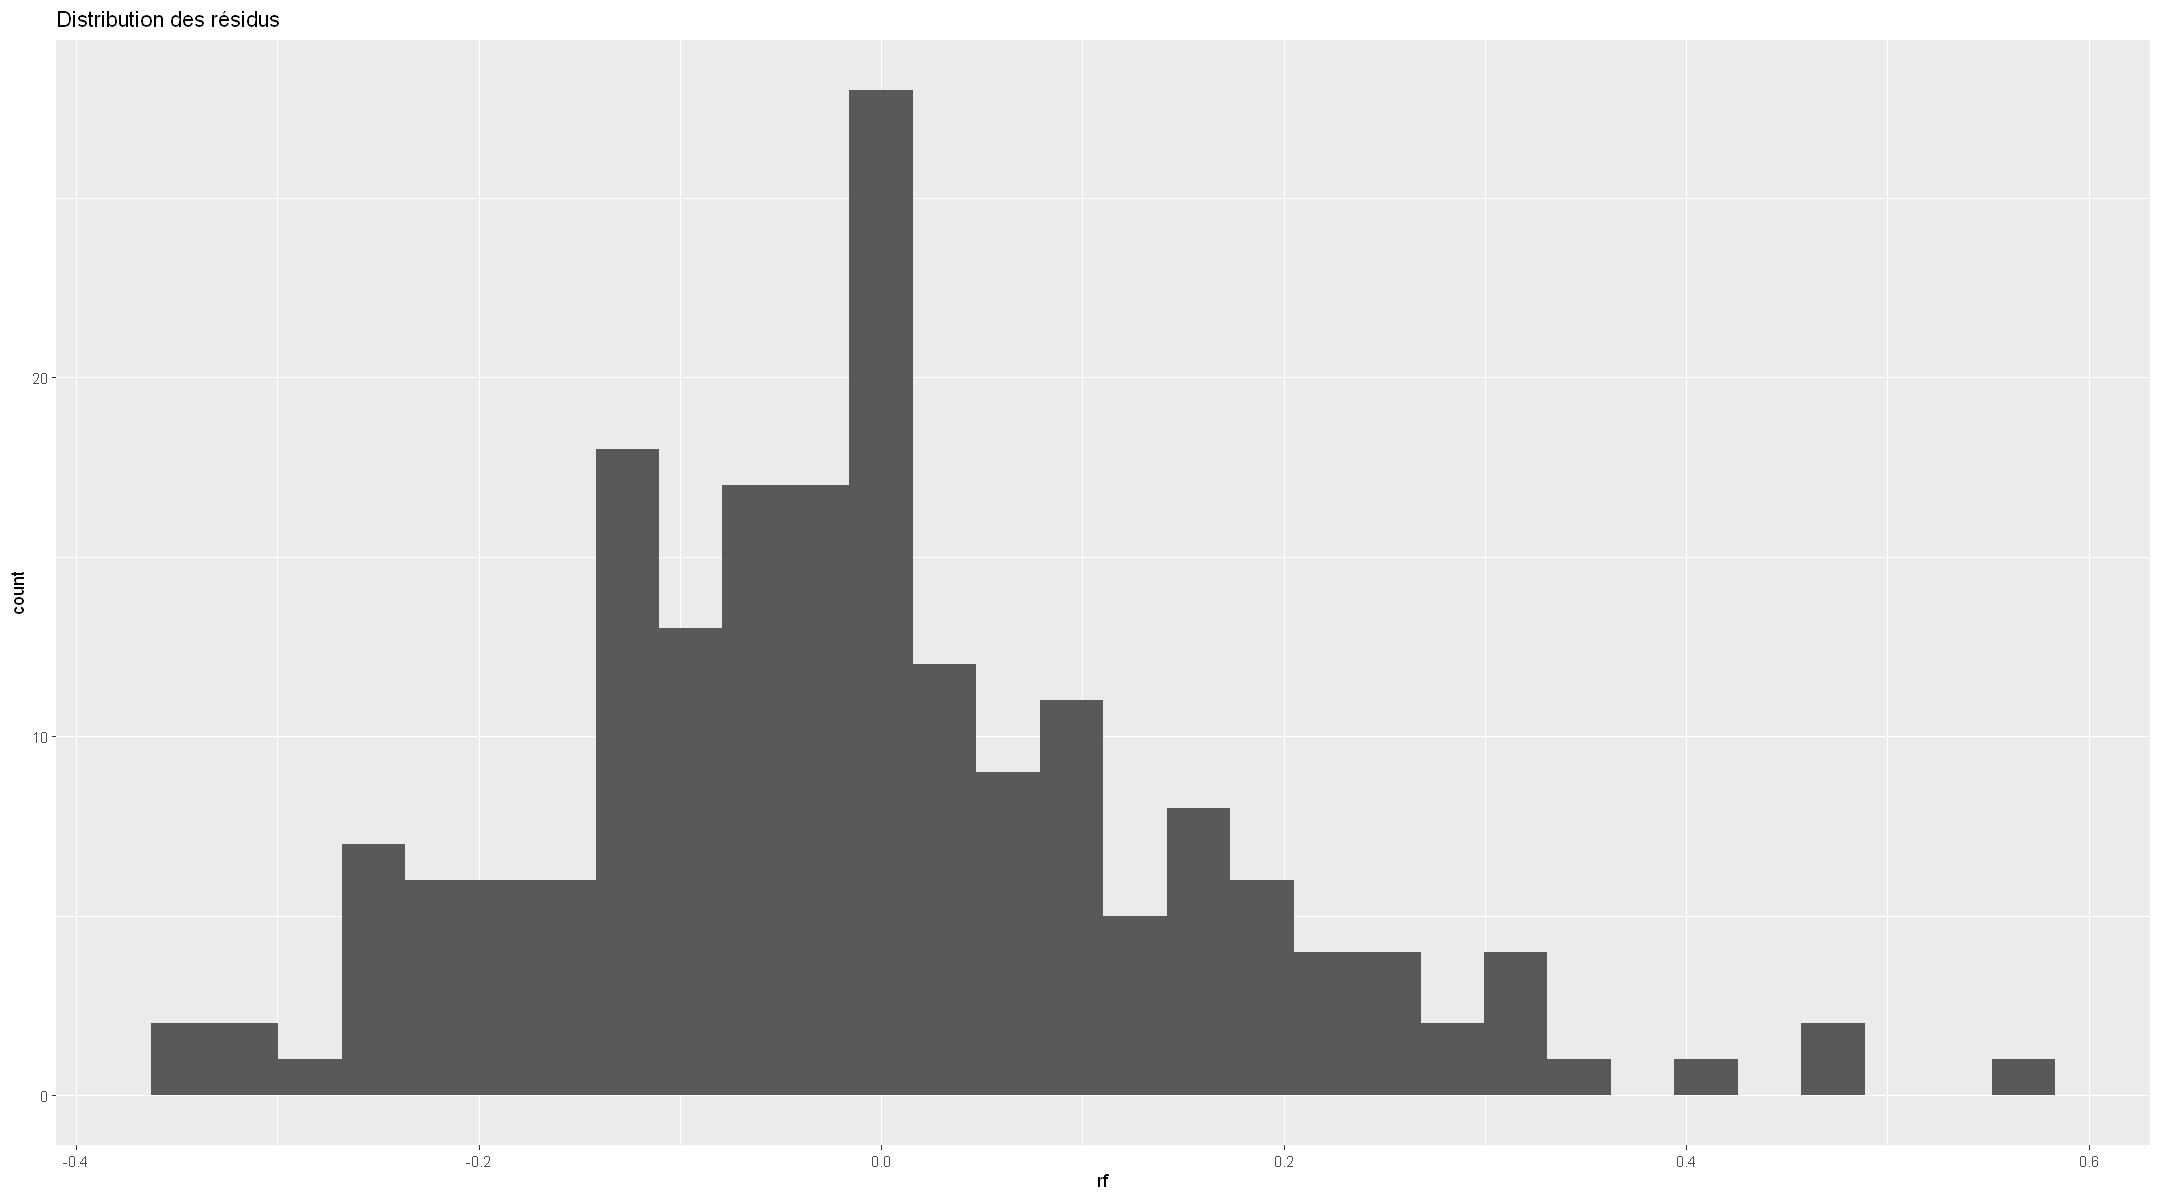

In [696]:
print(paste("MSE loss de Random Forest: ",loss_mse_calo(model = best_rf, test_data = test)))
test_predicted[, "S_Calories_Burned_pred_rf"] <- predict(best_rf,test)
print(paste("R^2: ", cor(test$S_Calories_Burned, test_predicted[, "S_Calories_Burned_pred_rf"])^2))
test_residuals[,"rf"] <- test_predicted[, "S_Calories_Burned"] - test_predicted[, "S_Calories_Burned_pred_rf"]
ggplot(data = test_predicted) +
  geom_point(aes(x = S_Calories_Burned, y = S_Calories_Burned_pred_rf), alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Prédictions vs Valeurs Réelles",
       x = "Valeurs Réelles", 
       y = "Prédictions") +
  theme_minimal()
ggplot(data = test_residuals, aes(x = rf)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")

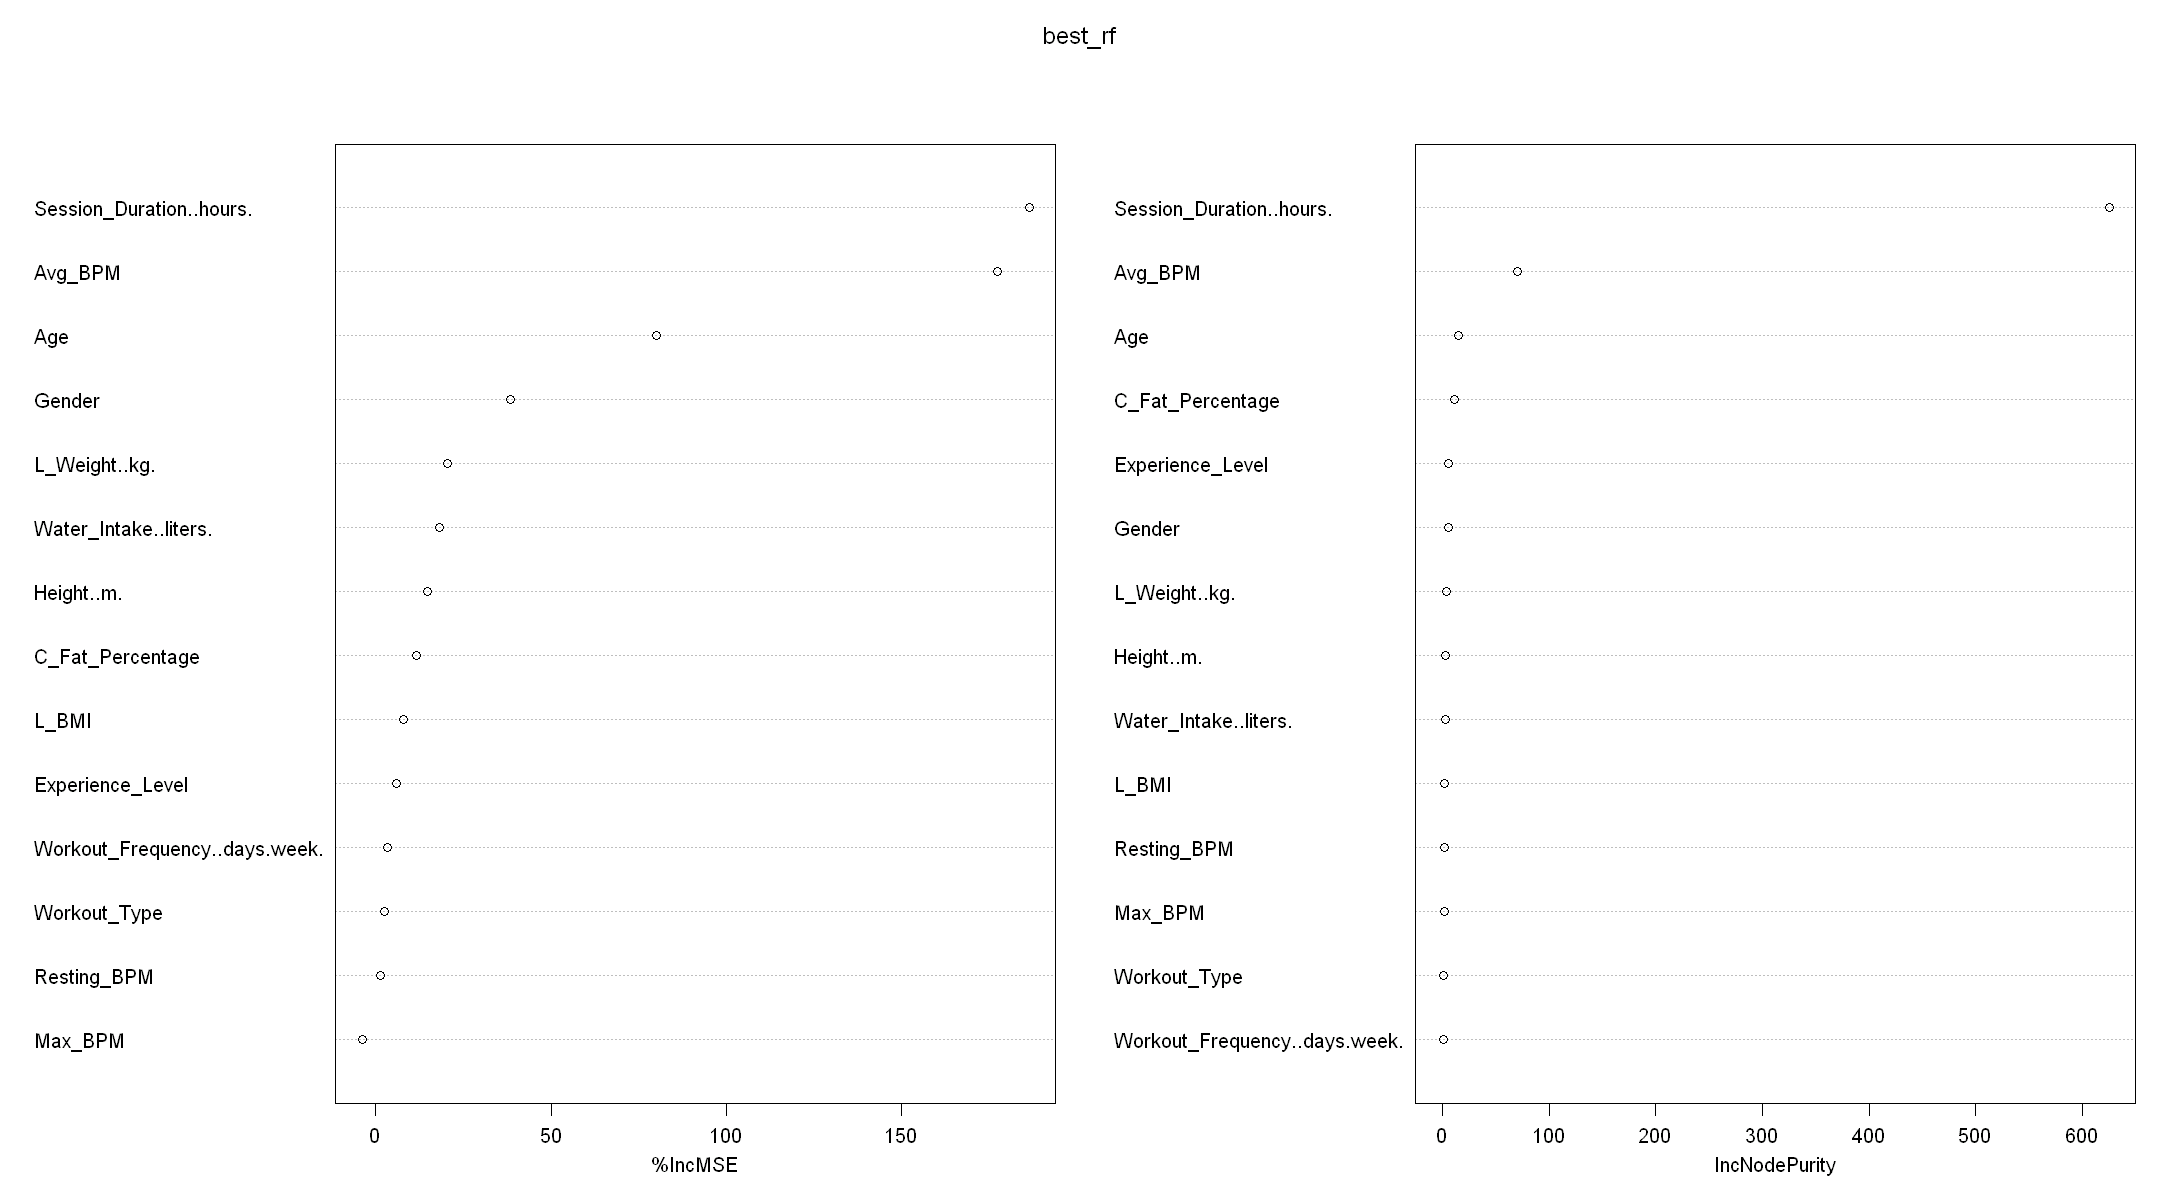

In [698]:
varImpPlot(best_rf)

#### <FONT COLOR="Blue">2.2. Boosting</font>

##### Not used

  n.trees interaction.depth shrinkage n.minobsinnode
4     500                 3      0.05              5


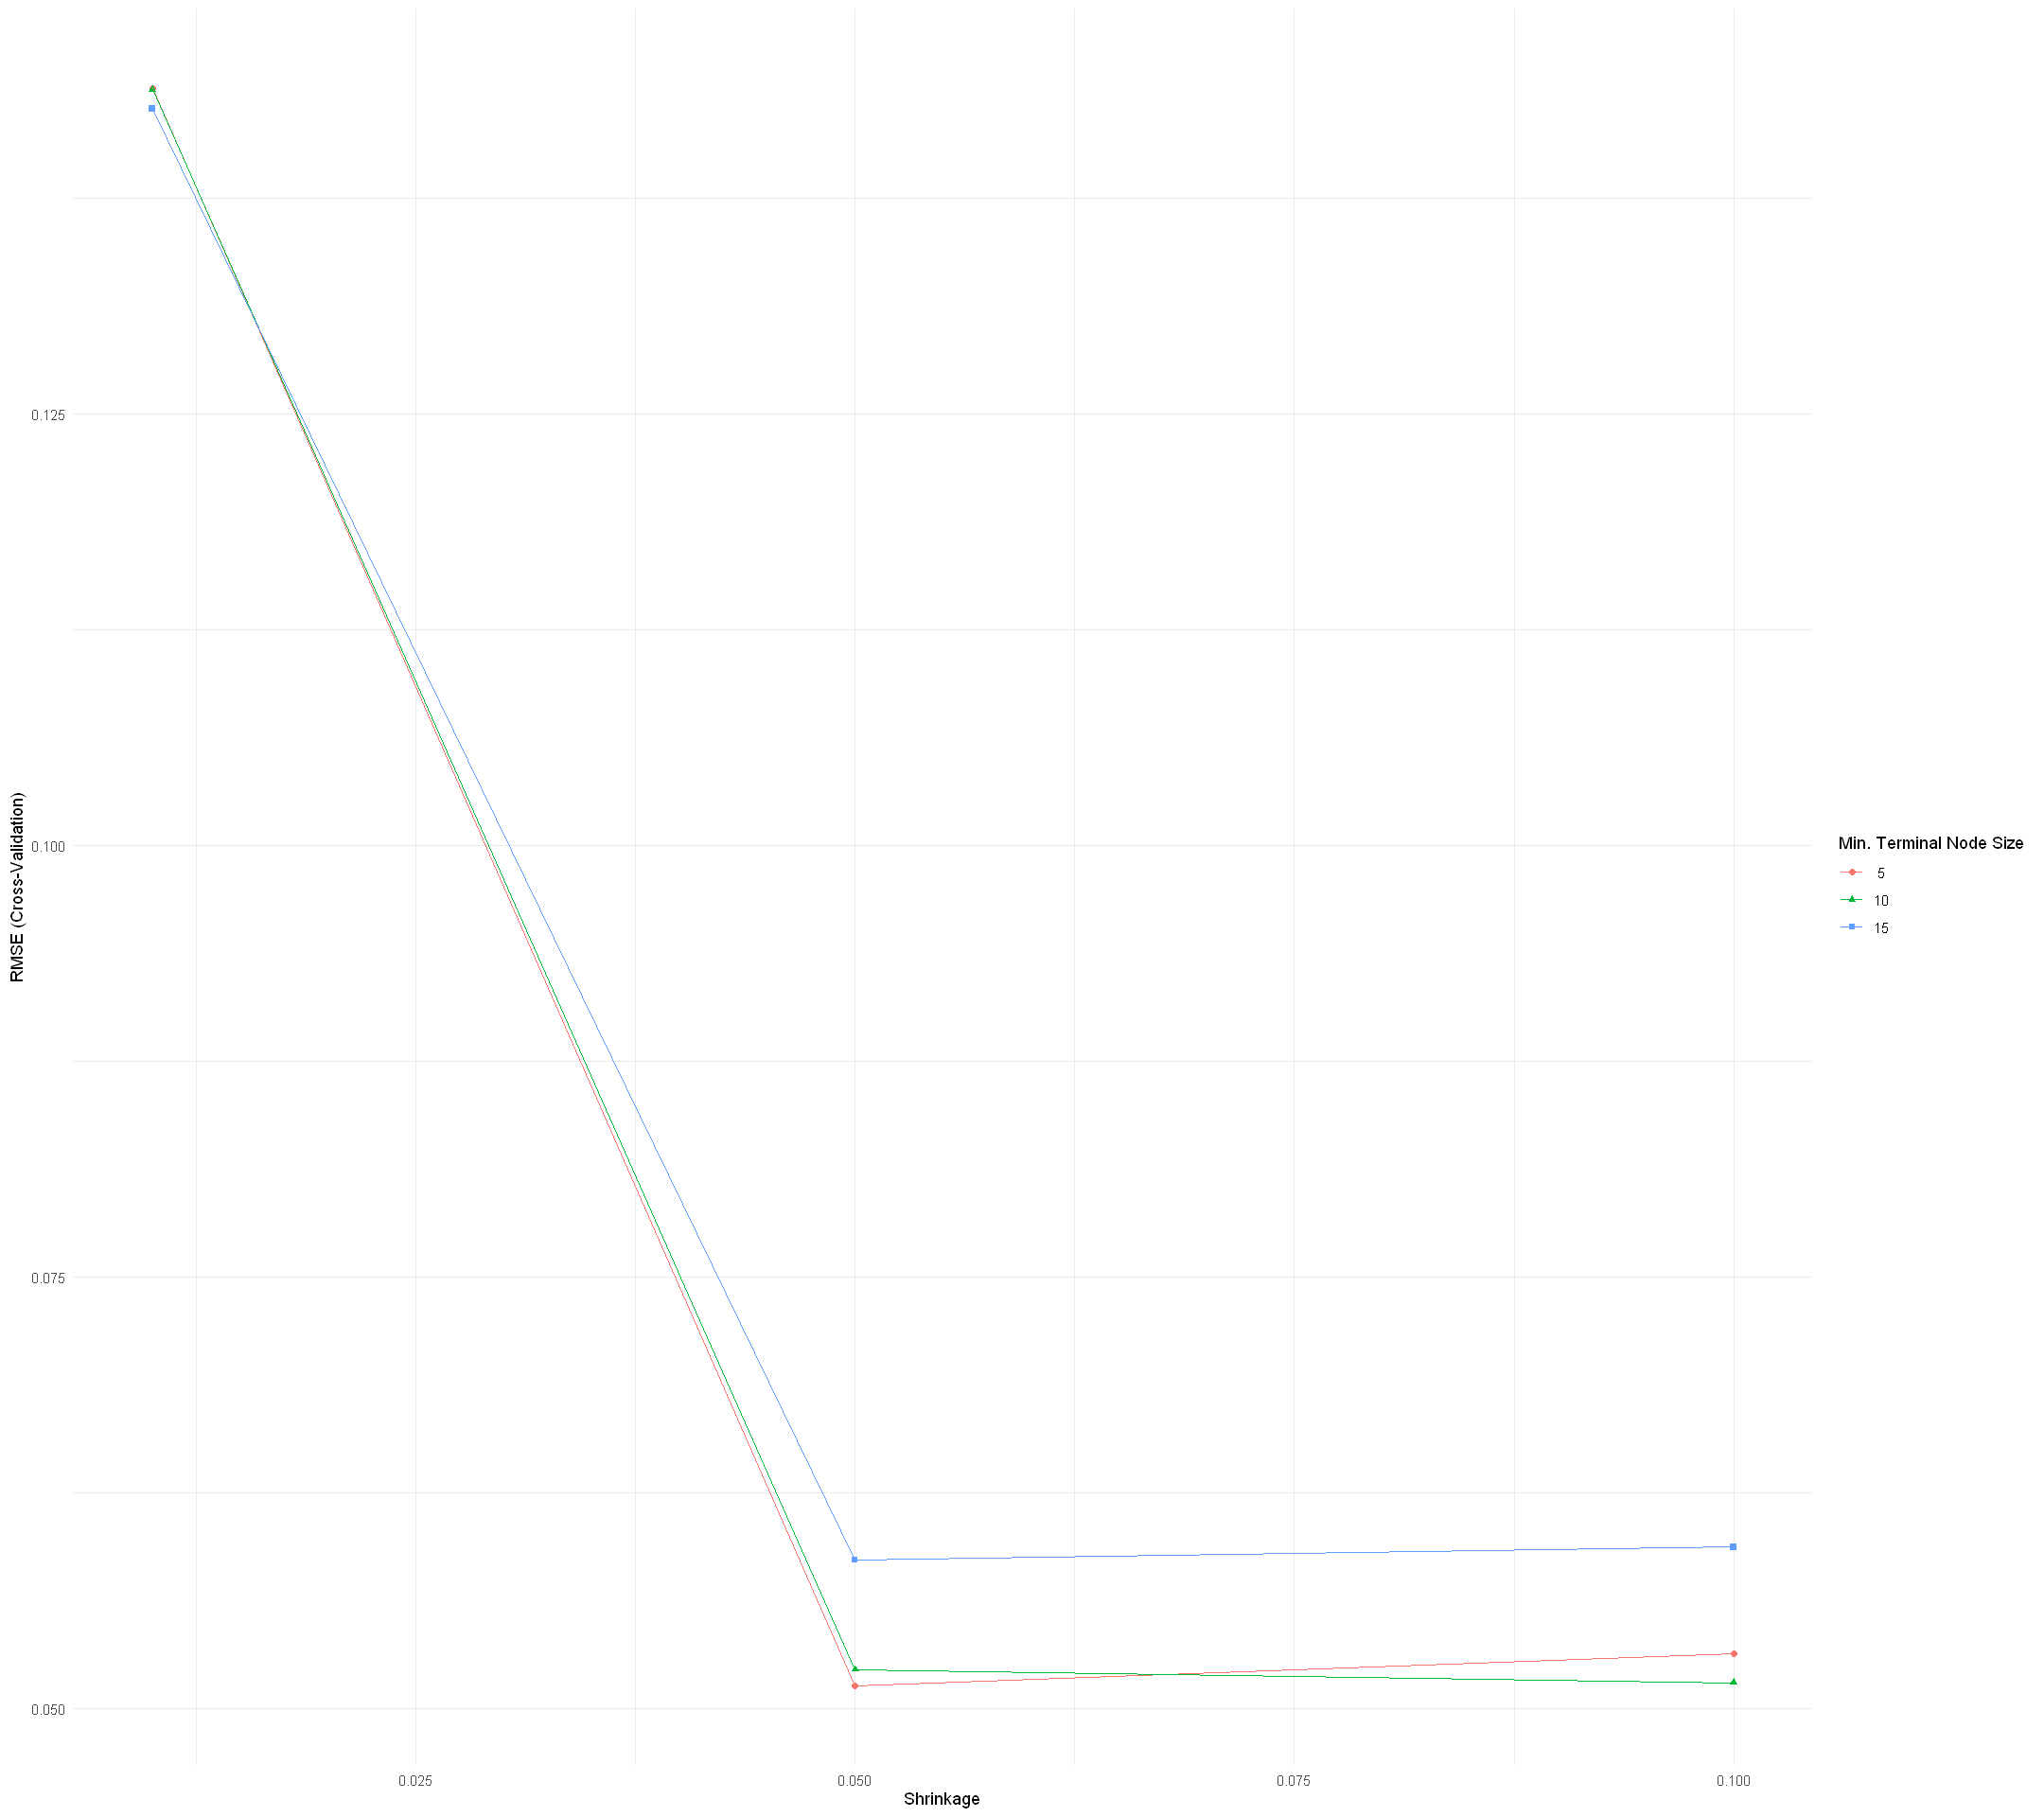

In [208]:
tune_grid <- expand.grid(
  interaction.depth = 3,        
  n.trees = 500,              
  shrinkage = c(0.01, 0.05, 0.1), 
  n.minobsinnode = c(5, 10, 15)  
)

# 2. Configuration de la validation croisée
ctrl <- trainControl(
  method = "cv",
  number = 10,        
  verboseIter = FALSE
)

best_boosting <- train(
  S_Calories_Burned ~ .,
  data = train,                 
  method = "gbm",
  distribution = "gaussian",    
  trControl = ctrl,
  tuneGrid = tune_grid,
  bag.fraction = 0.5,        
  verbose = FALSE
)

print(best_boosting$bestTune)

ggplot(best_boosting) + theme_minimal()

##### Used

In [286]:
best_boosting <- gbm(S_Calories_Burned ~ ., data = train, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.05, verbose = FALSE)

Using 500 trees...




[1] "MSE loss de Boosting :  9.48671160788256e-05"


Using 500 trees...




[1] "R^2:  0.992936351712127"


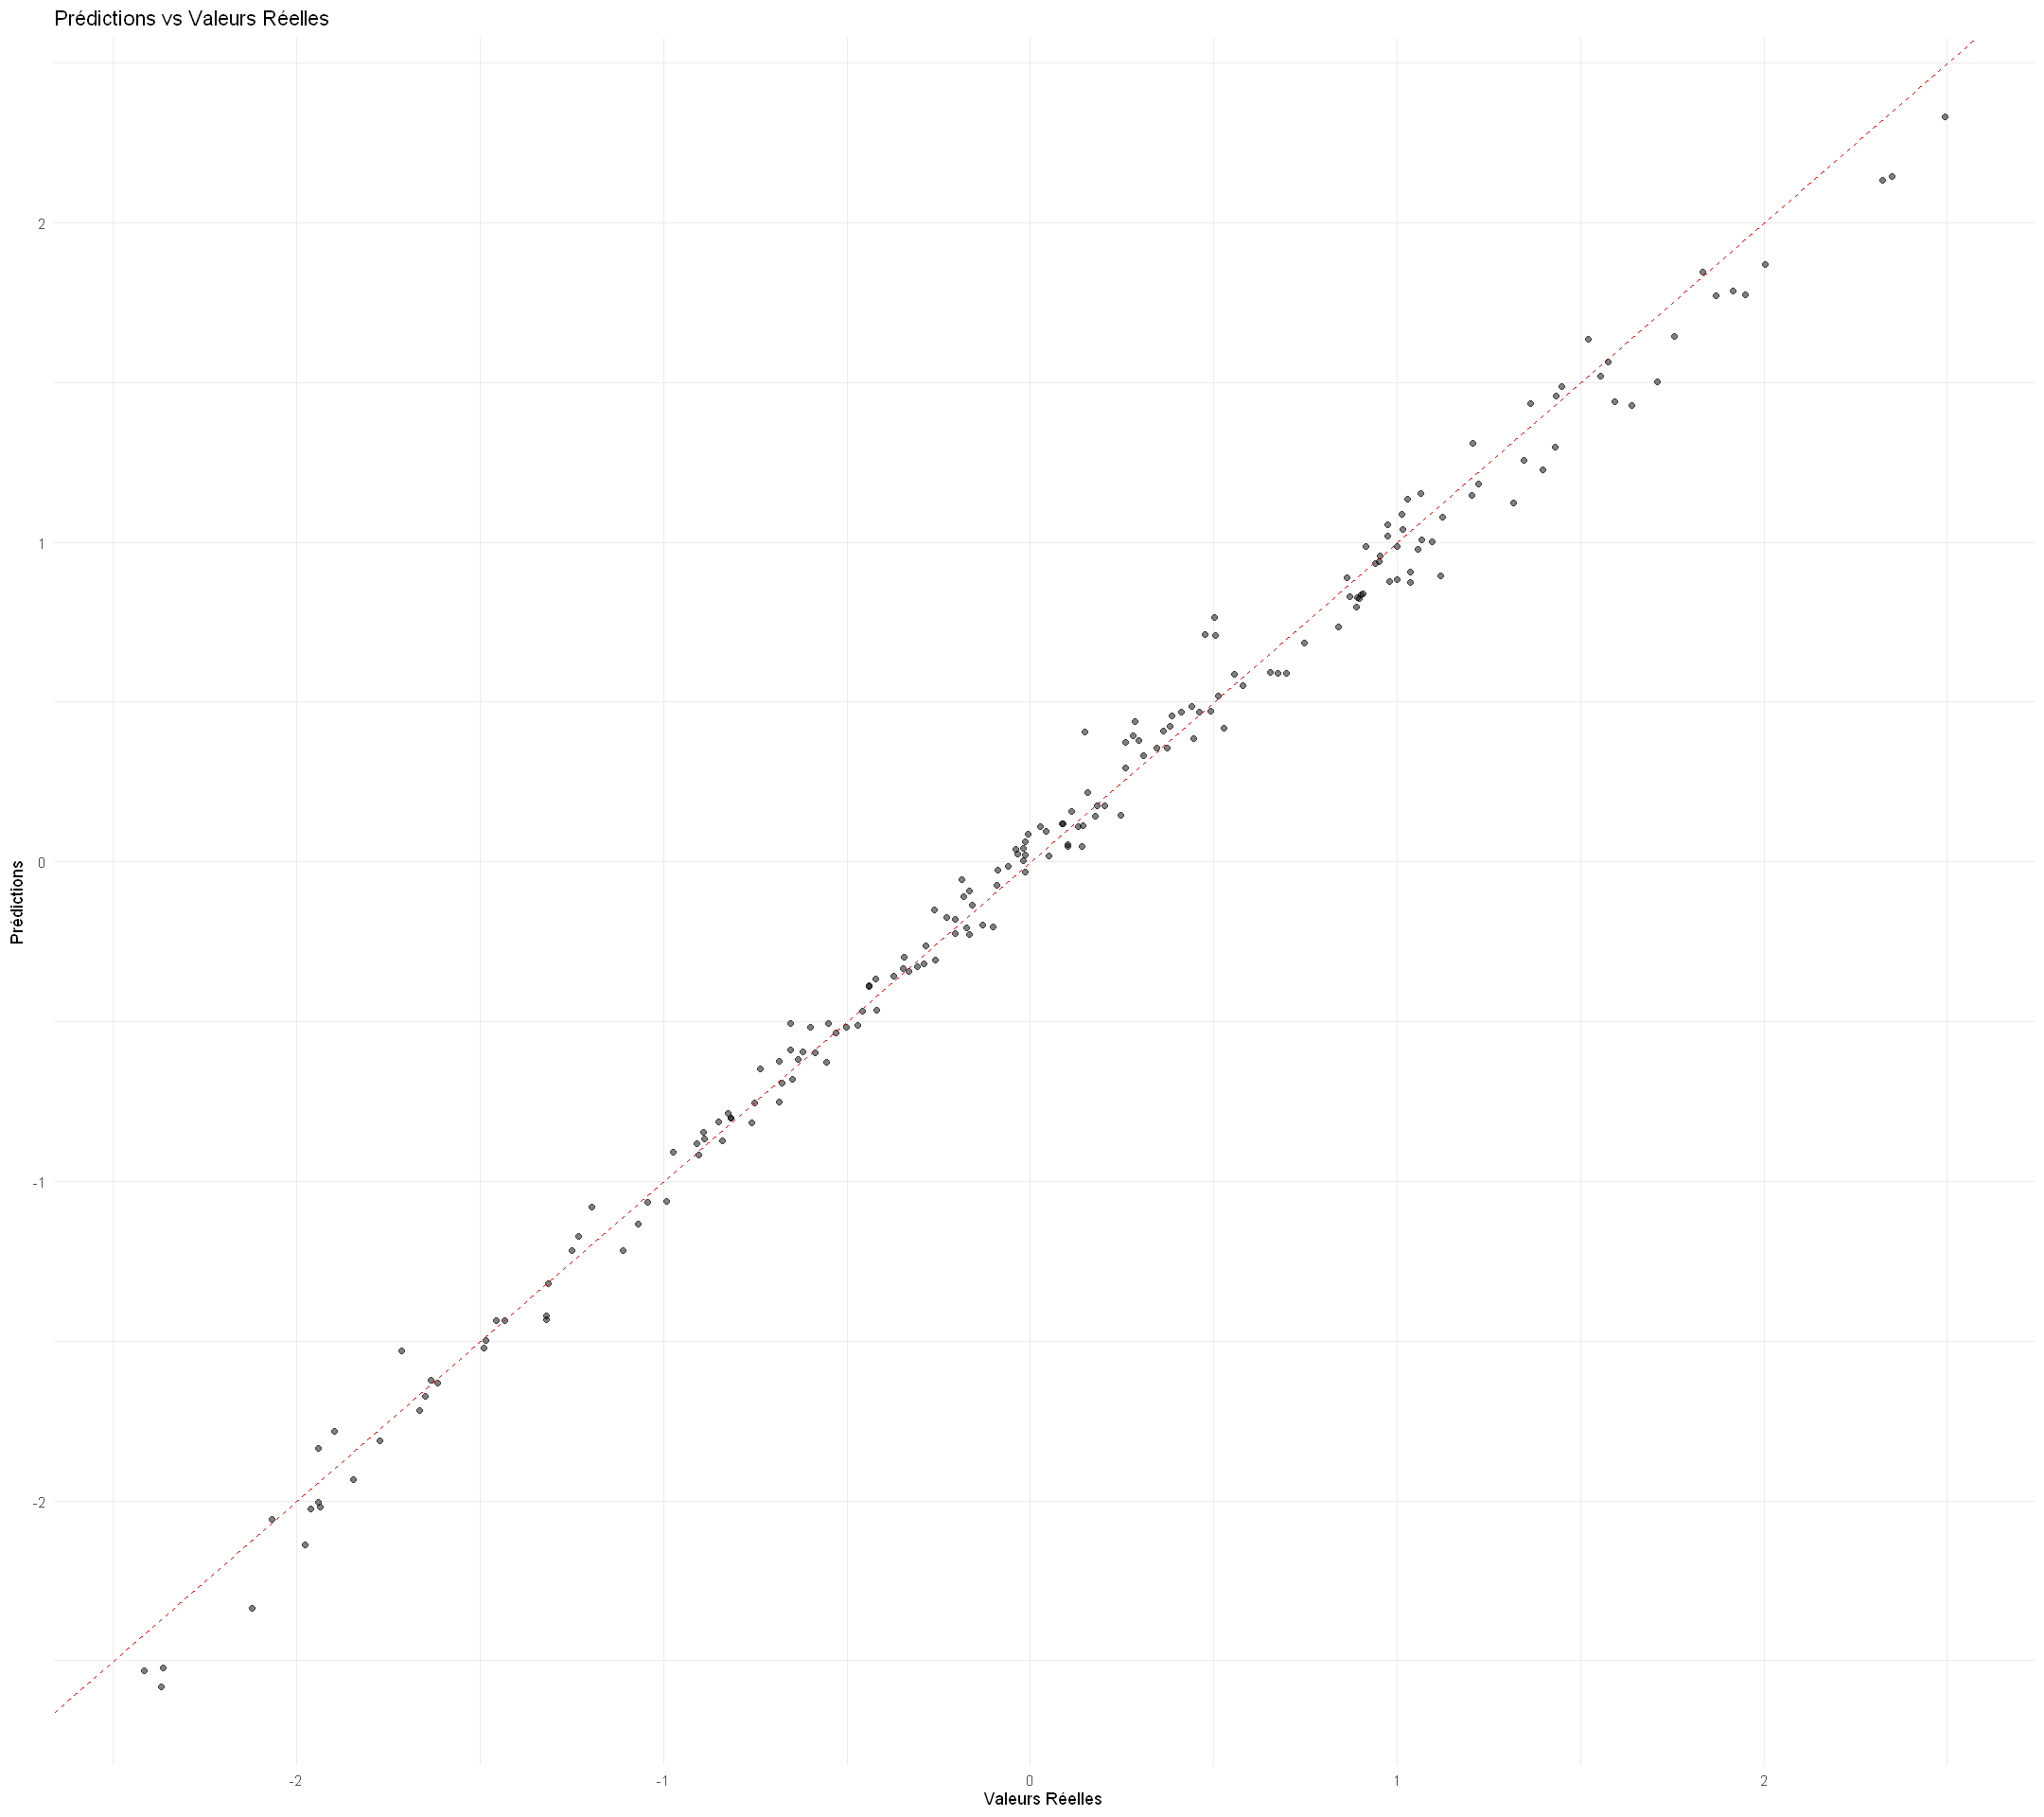

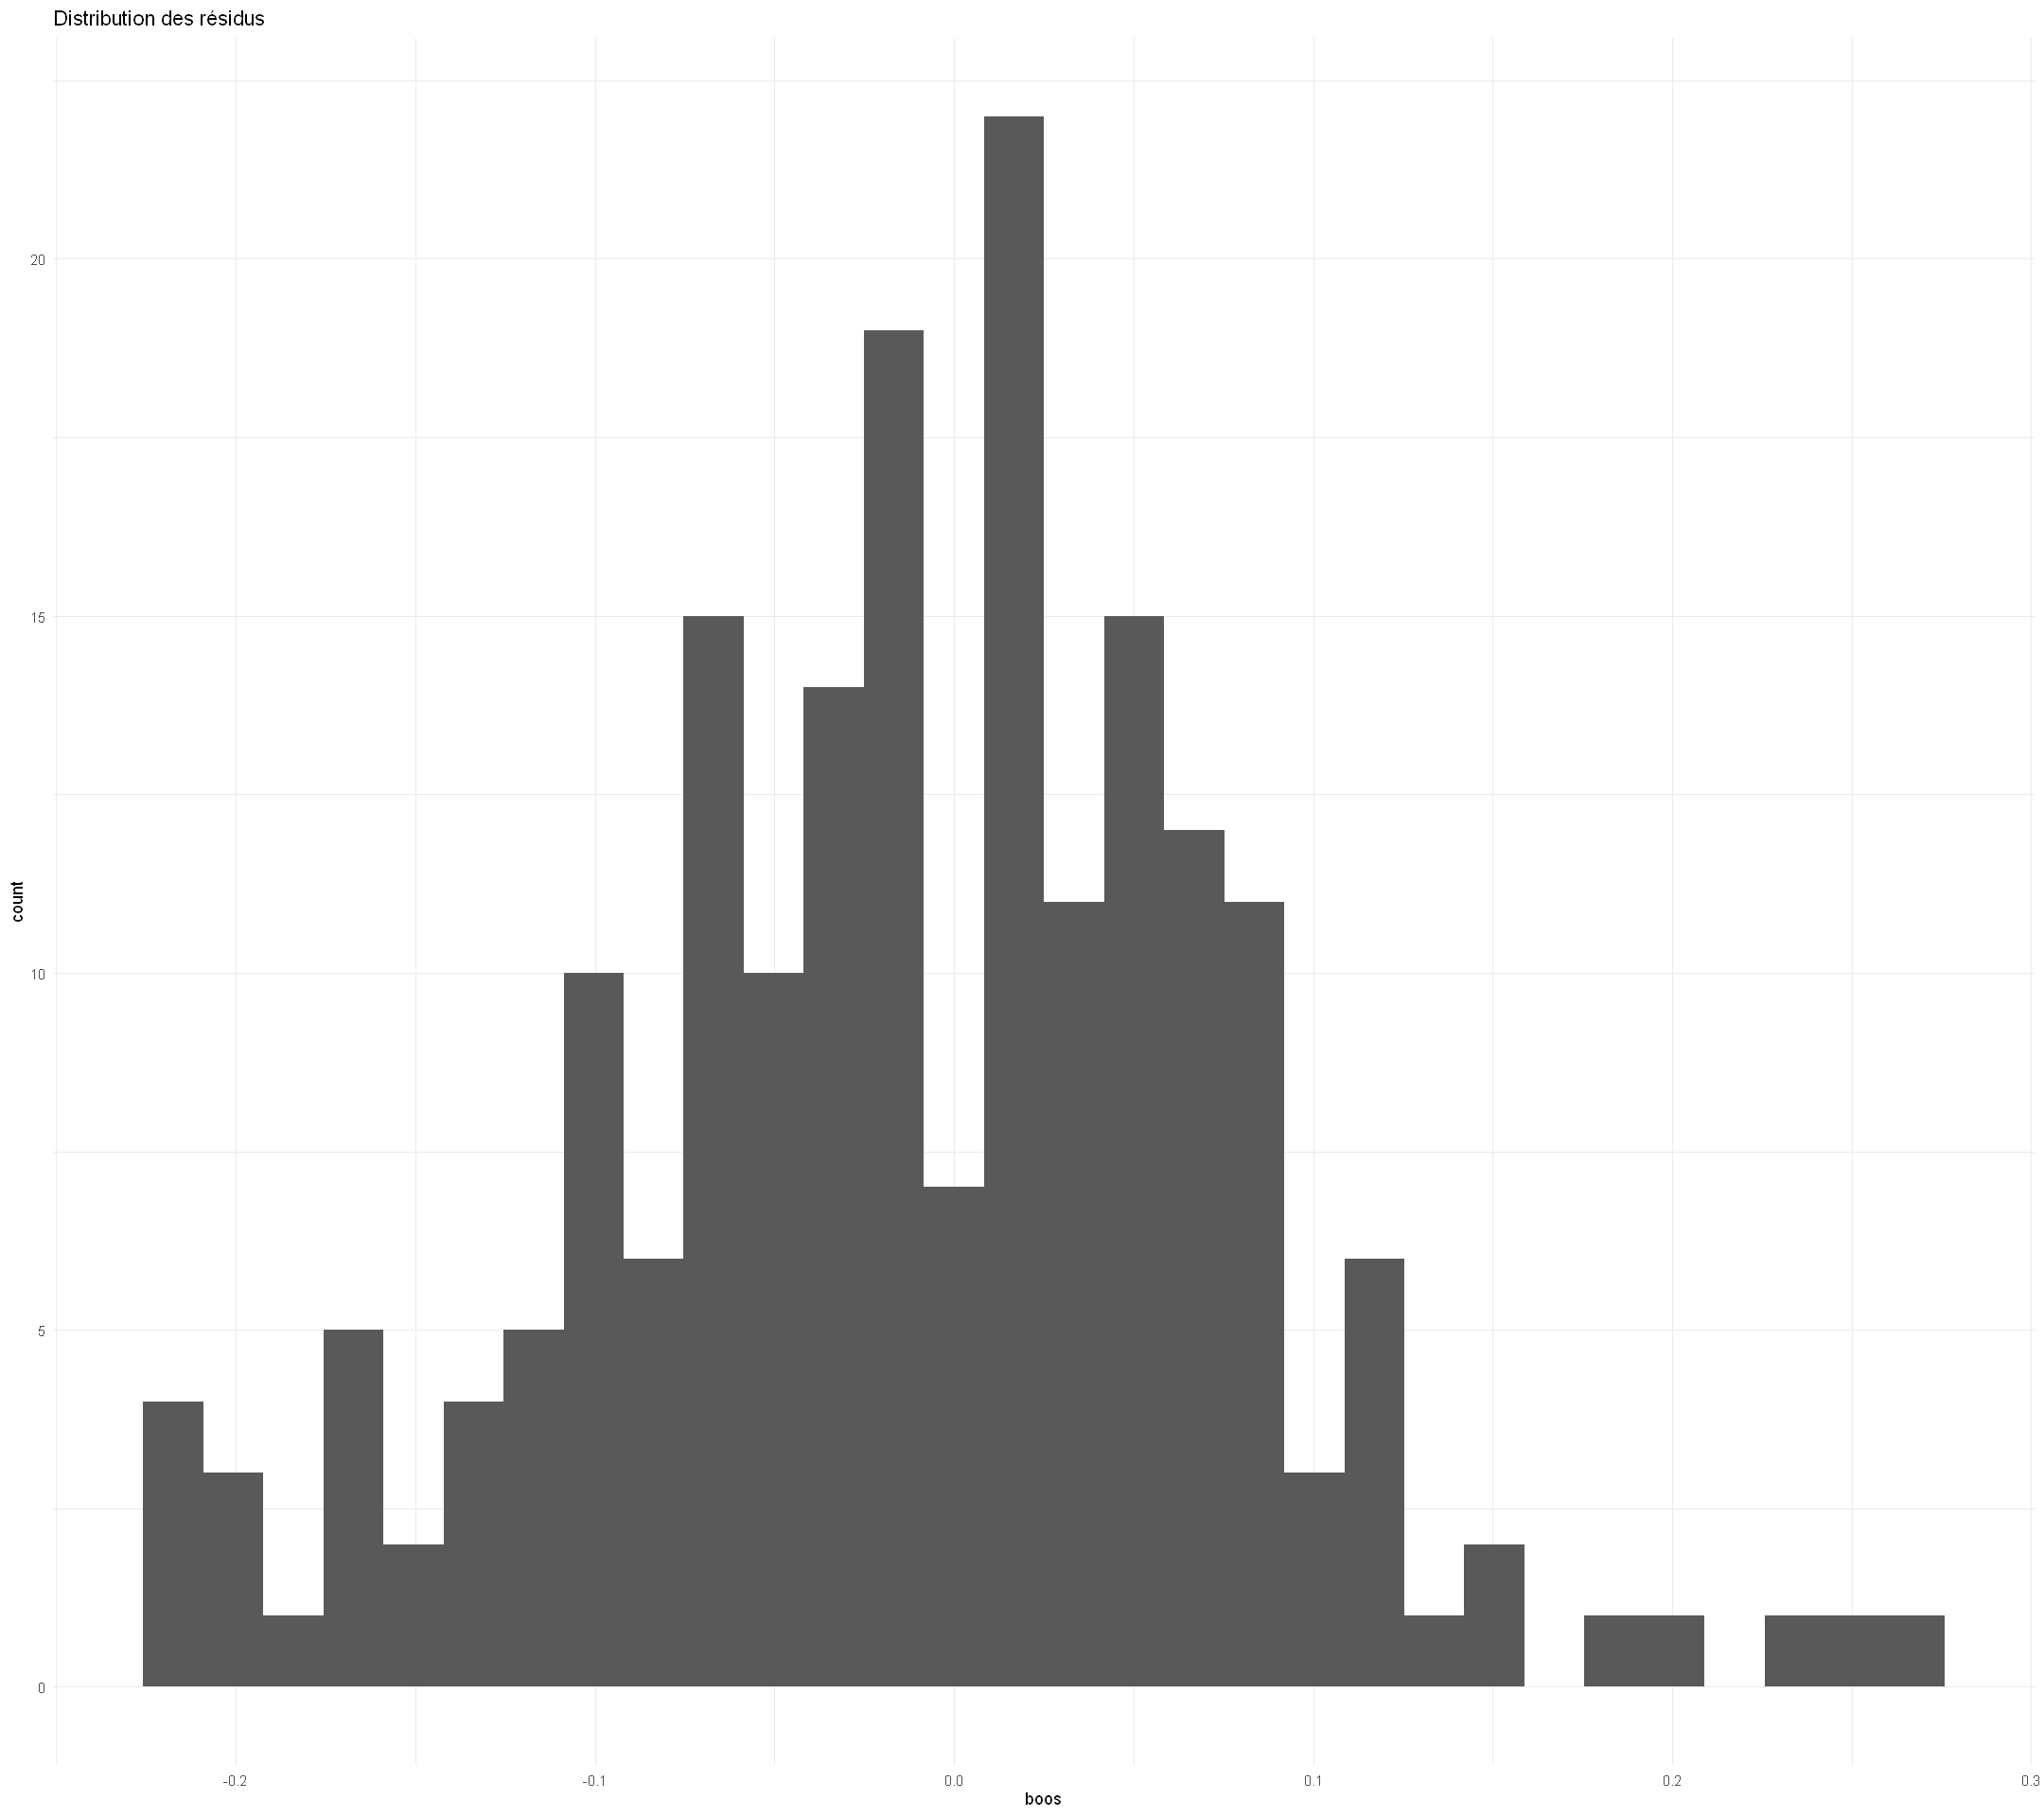

In [238]:
print(paste("MSE loss de Boosting : ",loss_mse_calo(model = best_boosting, test_data = test)))
test_predicted[, "S_Calories_Burned_pred_boos"] <- predict(best_boosting,test)
print(paste("R^2: ", cor(test$S_Calories_Burned, test_predicted[, "S_Calories_Burned_pred_boos"])^2))

ggplot(data.frame(Actual = test$S_Calories_Burned, Predicted = test_predicted[, "S_Calories_Burned_pred_boos"])) +
  geom_point(aes(x = Actual, y = Predicted), alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Prédictions vs Valeurs Réelles",
       x = "Valeurs Réelles", 
       y = "Prédictions") +
  theme_minimal()

test_residuals[, "boos"] = test_predicted[, "S_Calories_Burned_pred_boos"] - test_predicted$S_Calories_Burned
ggplot(data = test_residuals, aes(x = boos)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")+
  theme_minimal()

In [241]:
shapiro.test(test_residuals$boos)


	Shapiro-Wilk normality test

data:  test_residuals$boos
W = 0.98637, p-value = 0.05949


Au niveau 0.05%, on peut dire que les résidues suivent la loi normal

### <FONT COLOR="Gray">3. Réseaux de neurones</font>

In [288]:
tune_nn = tune.nnet(S_Calories_Burned~.,data=train,size=c(3,4,5),decay=c(1,2),maxit=200,linout=TRUE)
best_nn = tune_nn$best.model

- **Evaluation**

[1] "MSE loss de réseaux de neurones:  1.49856045943661e-05"
[1] "R^2:  0.991545701532247"


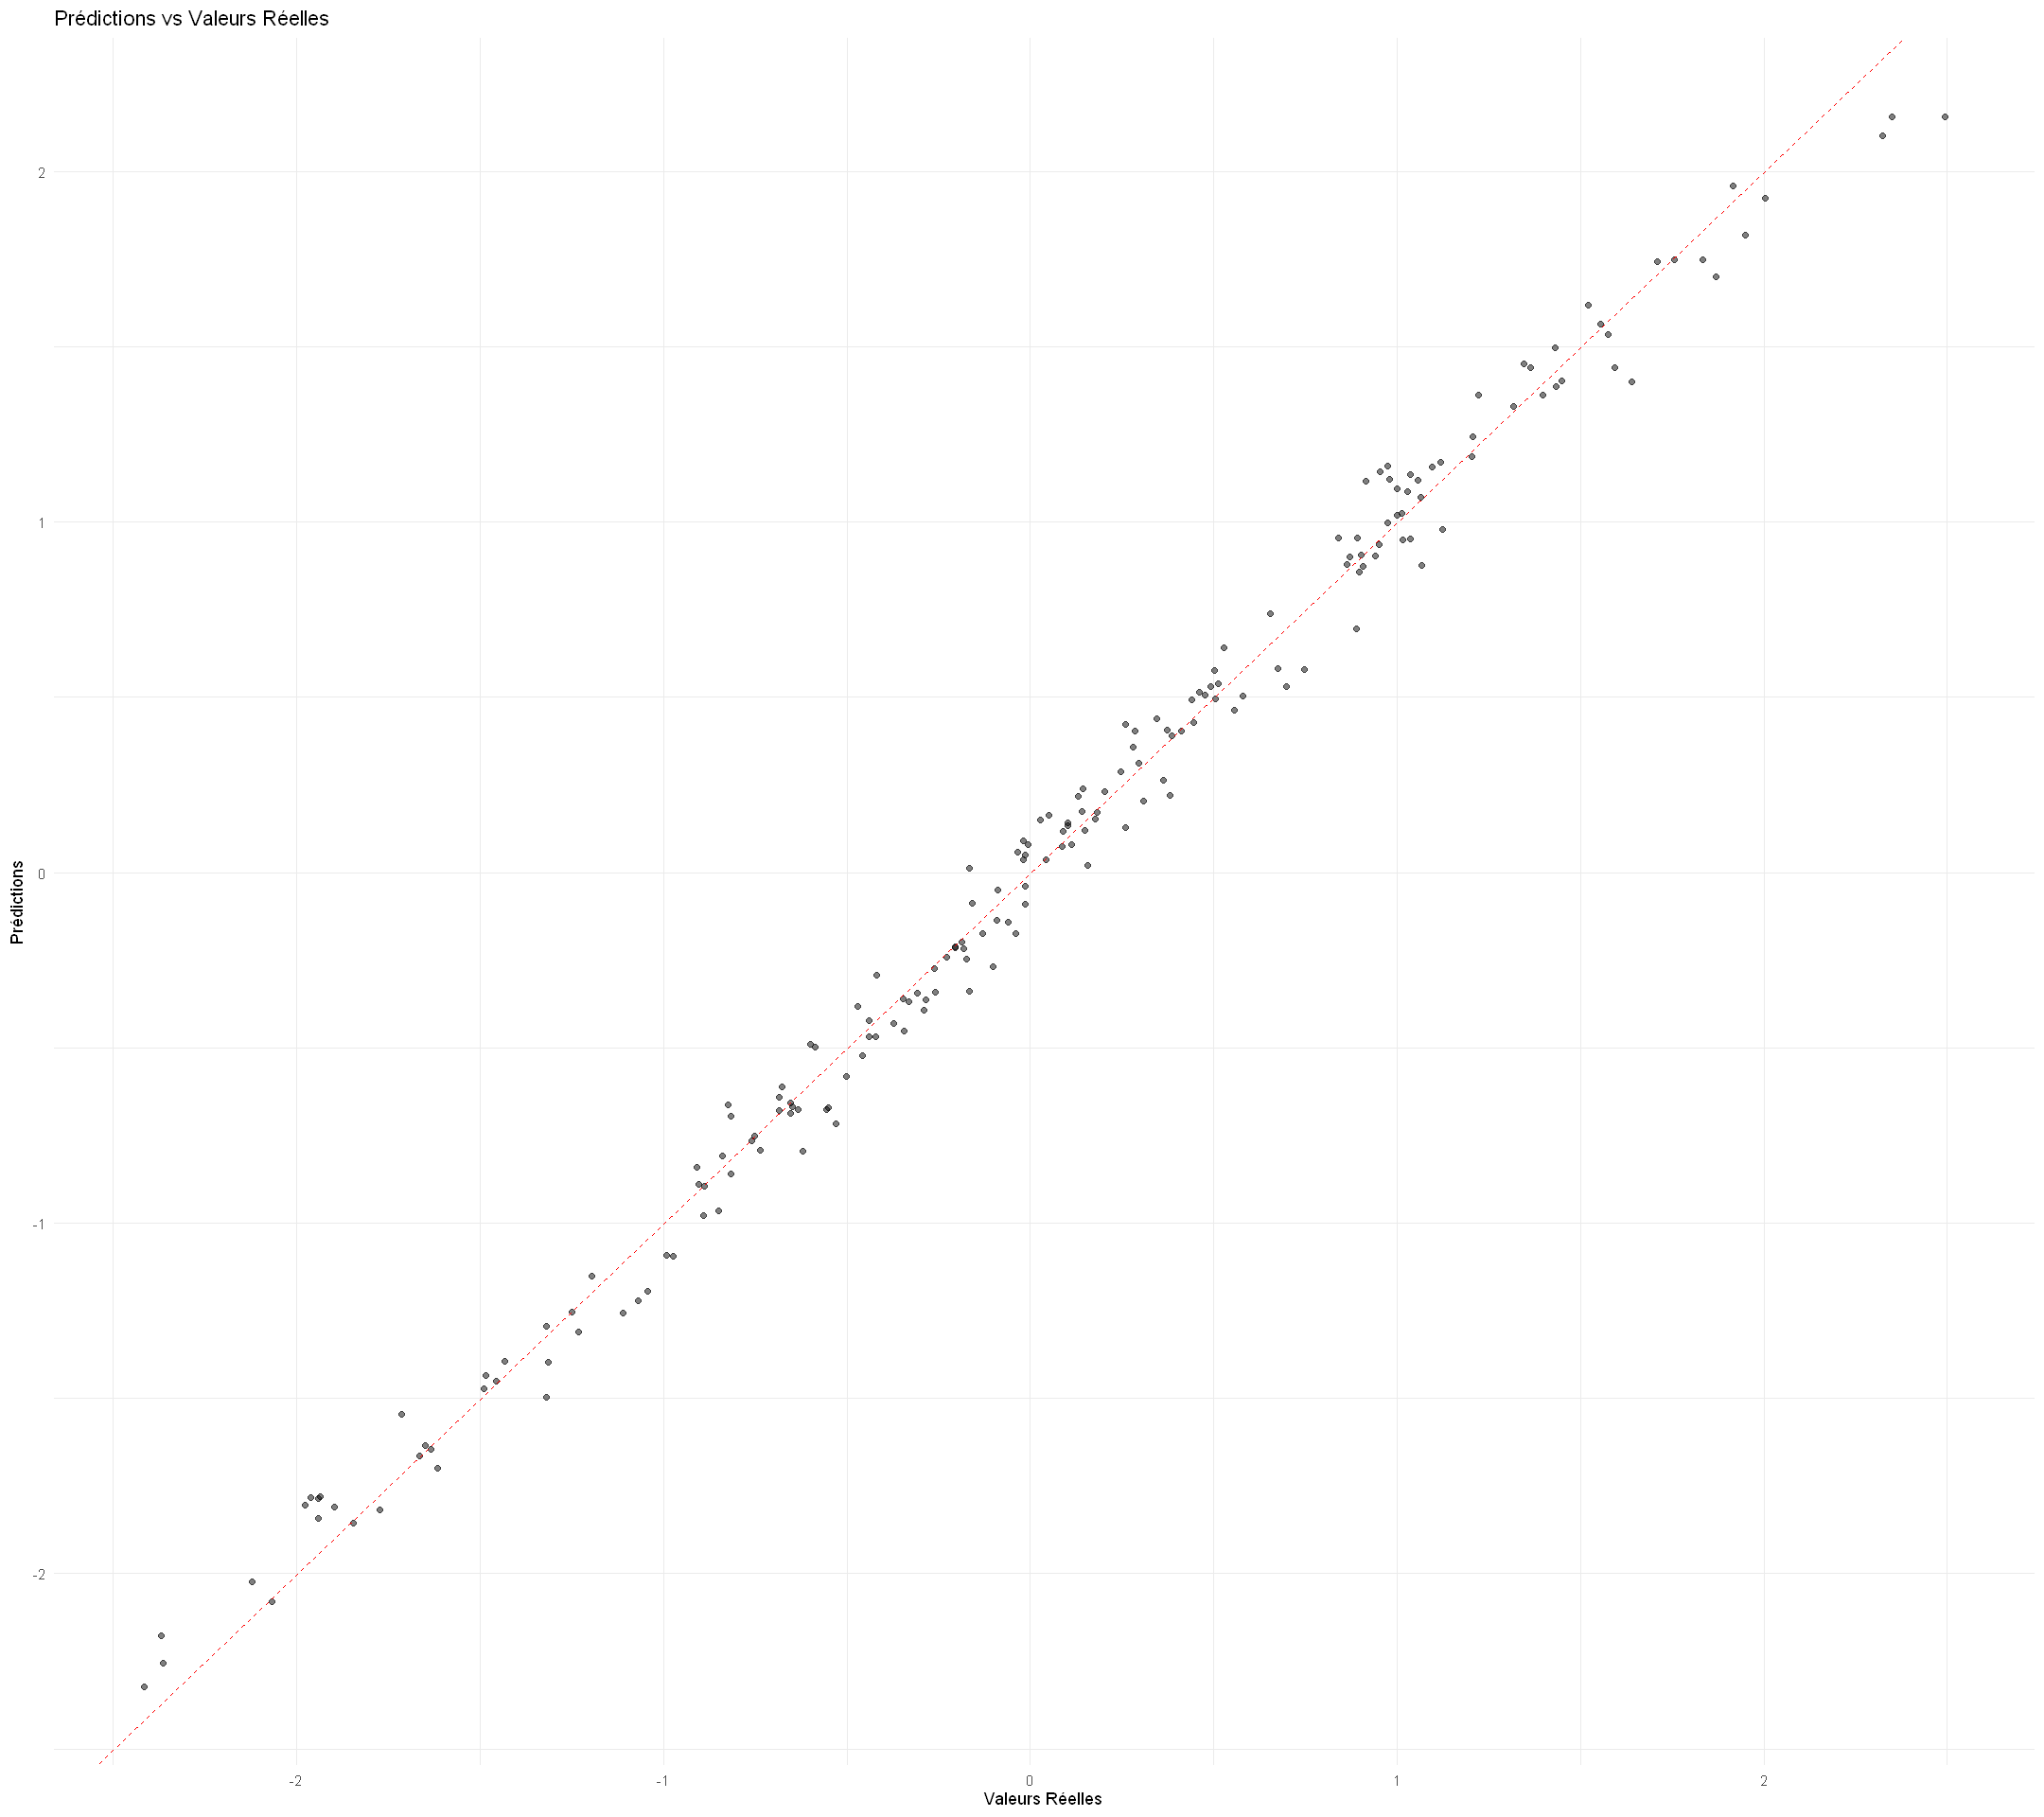

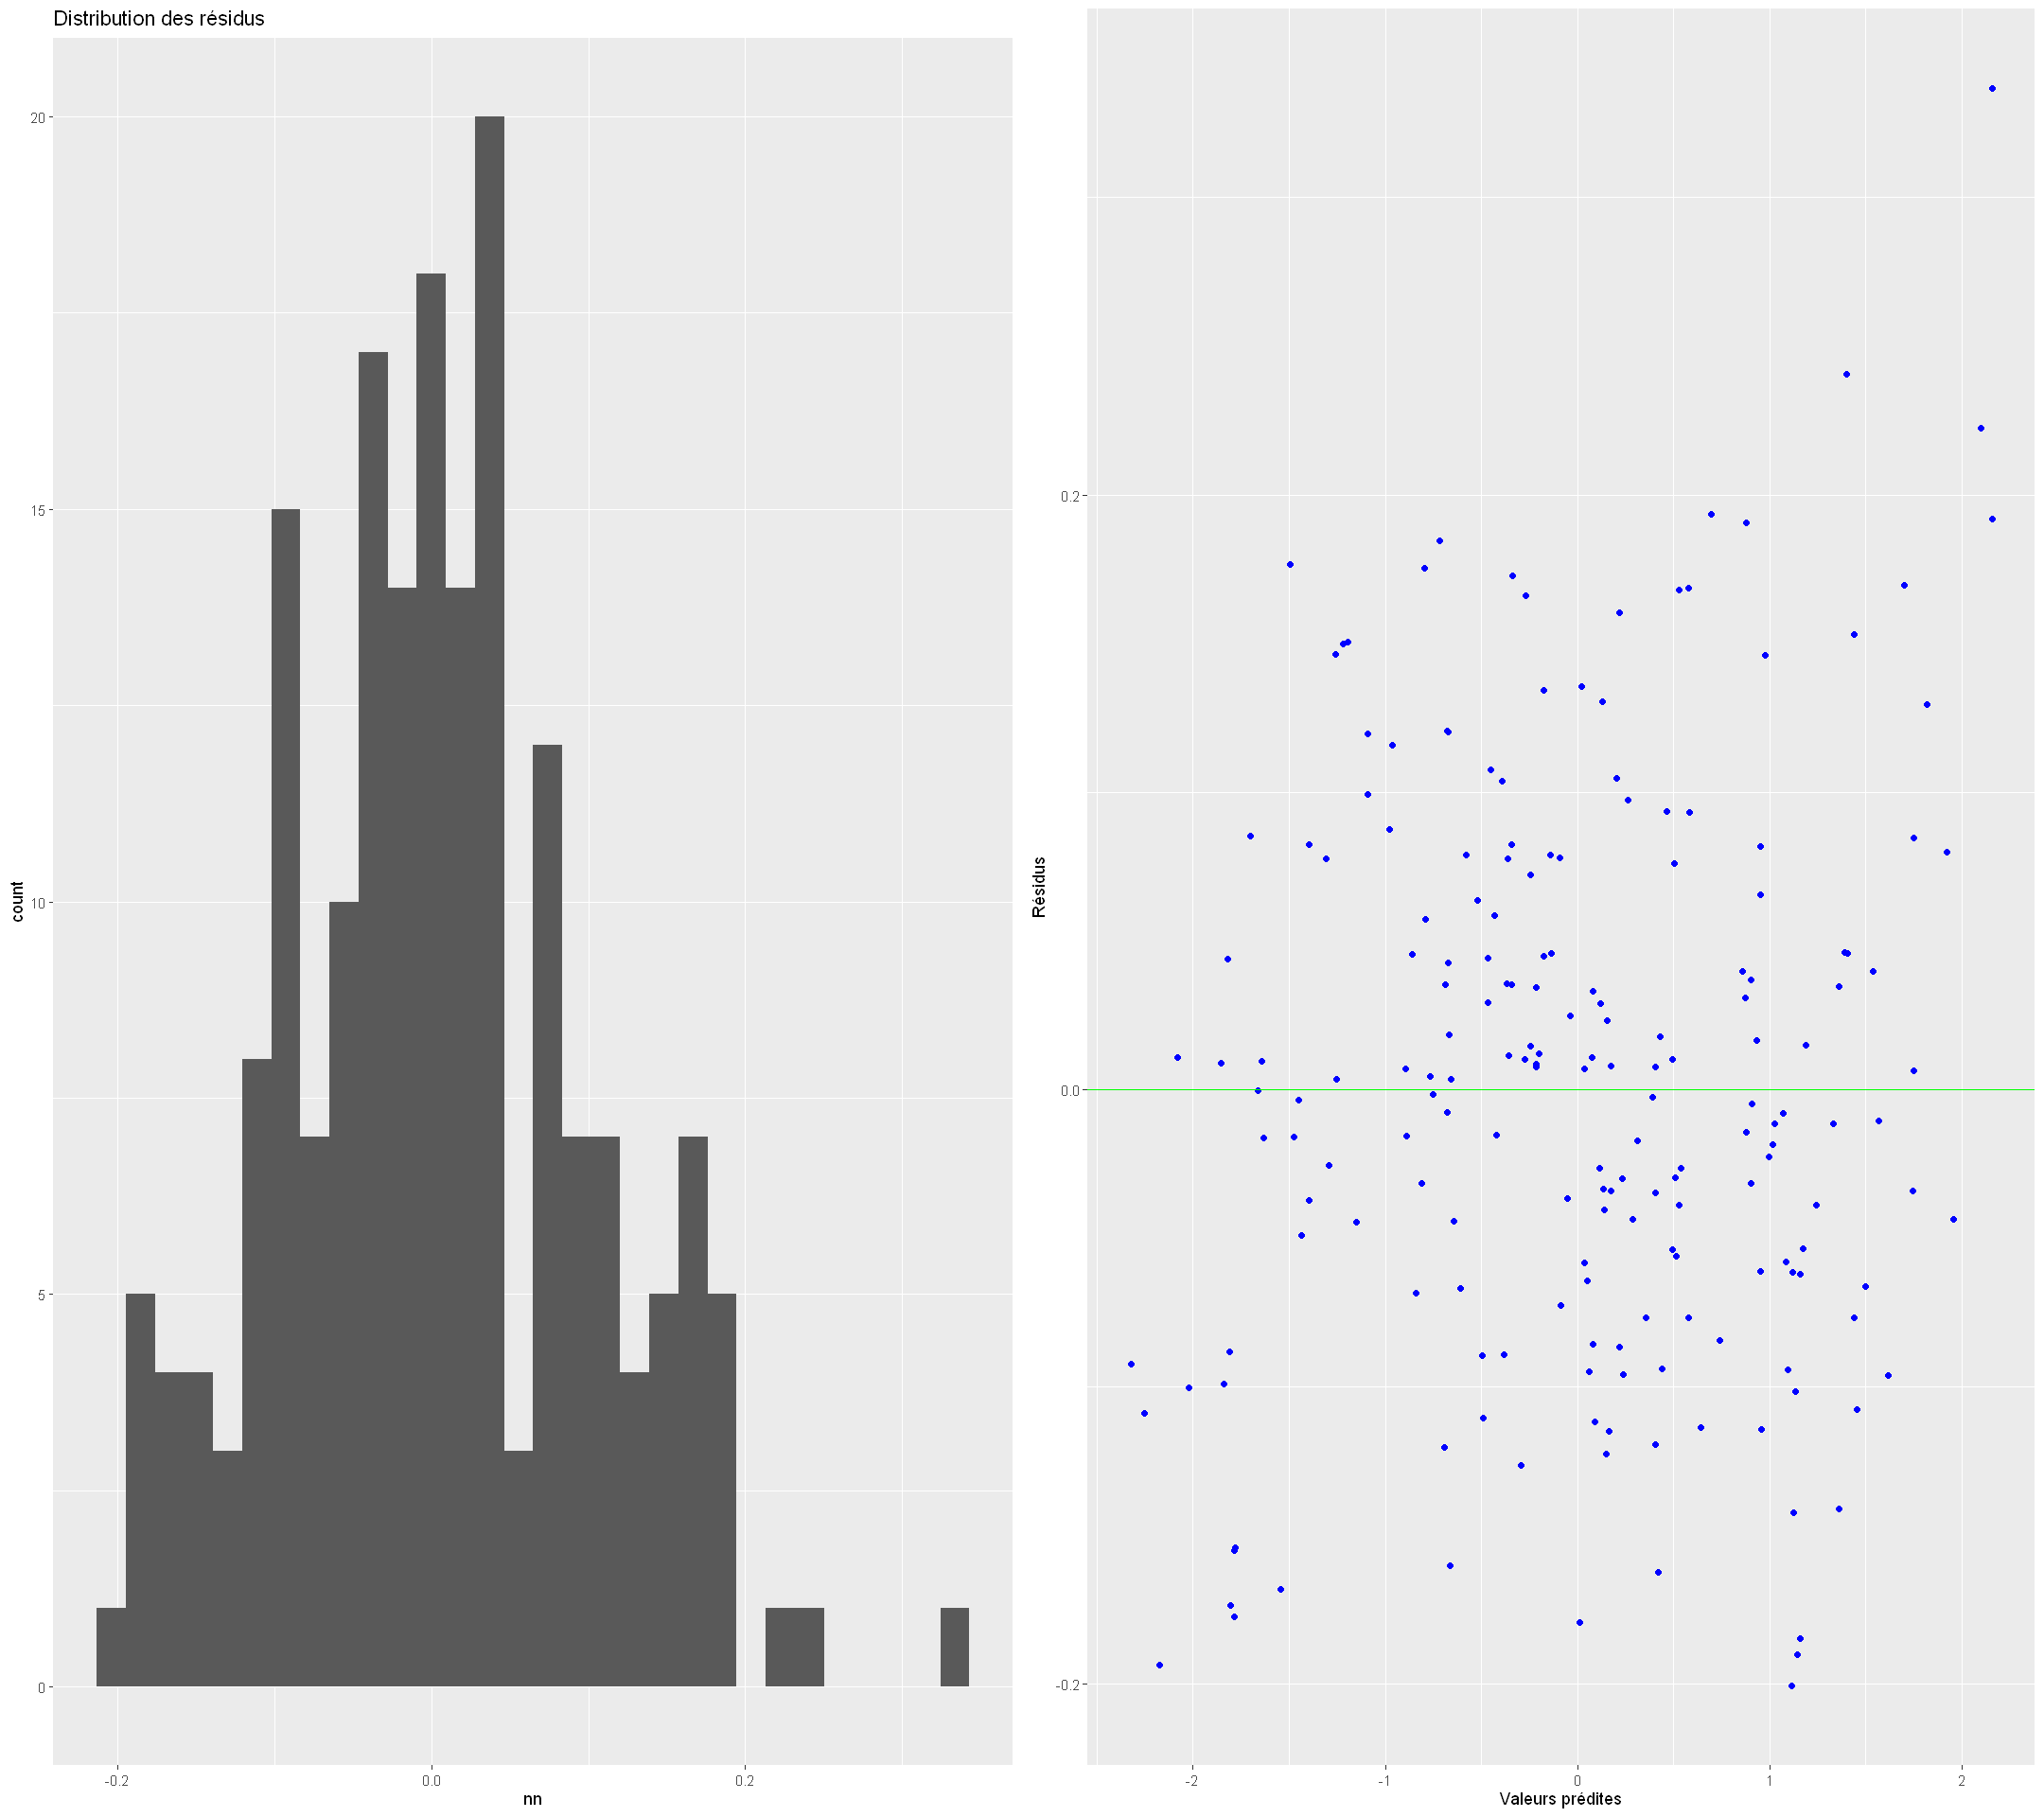

In [310]:
print(paste("MSE loss de réseaux de neurones: ",loss_mse_calo(model = best_nn, test_data = test)))
test_predicted[, "S_Calories_Burned_pred_nn"] <- predict(best_nn,test)
print(paste("R^2: ", cor(test$S_Calories_Burned, test_predicted[, "S_Calories_Burned_pred_nn"])^2))
test_residuals[,"nn"] <- test_predicted[, "S_Calories_Burned"] - test_predicted[, "S_Calories_Burned_pred_nn"]
ggplot(data = test_predicted) +
  geom_point(aes(x = S_Calories_Burned, y = S_Calories_Burned_pred_nn), alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Prédictions vs Valeurs Réelles",
       x = "Valeurs Réelles", 
       y = "Prédictions") +
  theme_minimal()
his_plot = ggplot(data = test_residuals, aes(x = nn)) + 
  geom_histogram(bins = 30) + 
  labs(title = "Distribution des résidus")

res_plot = ggplot(data.frame(x=test_predicted[, "S_Calories_Burned_pred_nn"], y=test_residuals$nn),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    geom_hline(yintercept = 0,col="green")
grid.arrange(his_plot, res_plot, ncol = 2)

### <FONT COLOR="Gray">4. Comparaison les modeles</font>

In [365]:
S_Calories_Burned_pred_tab <- test_predicted[, grep("S_Calories_Burned_pred_", names(test_predicted))]

In [367]:
cal_mse <- function(y_pred) {
    y_true = test_predicted$S_Calories_Burned
    return (mean((y_true - y_pred)^2))
}

cal_mae <- function( y_pred) {
    y_true = test_predicted$S_Calories_Burned
  return (mean(abs(y_true - y_pred)))
}

cal_rsquared <- function( y_pred) {
  y_true = test_predicted$S_Calories_Burned
  ss_res <- sum((y_true - y_pred)^2)
  ss_tot <- sum((y_true - mean(y_true))^2)
  return (1 - (ss_res / ss_tot))
}

cal_adj_rsquared <- function(y_pred) {
  p = ncol(data) -1
  y_true = test_predicted$S_Calories_Burned
  n <- length(y_true)
  r2 <- cal_rsquared(y_pred)
  return (1 - ((1 - r2) * (n - 1)) / (n - p - 1))
}

In [369]:
method = c()
mse = c()
mae = c()
rsquared = c()
adj_rsquared = c()
for (col in colnames(S_Calories_Burned_pred_tab)){
    model = sub("^S_Calories_Burned_pred_", "", col)
    pred = S_Calories_Burned_pred_tab[, col]
    mse = append(mse, cal_mse(pred))
    mae = append(mae, cal_mae(pred))
    rsquared = append(rsquared, cal_rsquared(pred))
    adj_rsquared = append(adj_rsquared, cal_adj_rsquared(pred))
    method = append(method, model)
}
S_Calories_Burned_results = data.frame(
    Method = method,
    MSE = mse,
    MAE = mae,
    R_Squared = rsquared,
    Adj_R_Squared = adj_rsquared
)

In [371]:
S_Calories_Burned_results

Method,MSE,MAE,R_Squared,Adj_R_Squared
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
s0,0.007776997,0.07123246,0.9929751,0.9924226


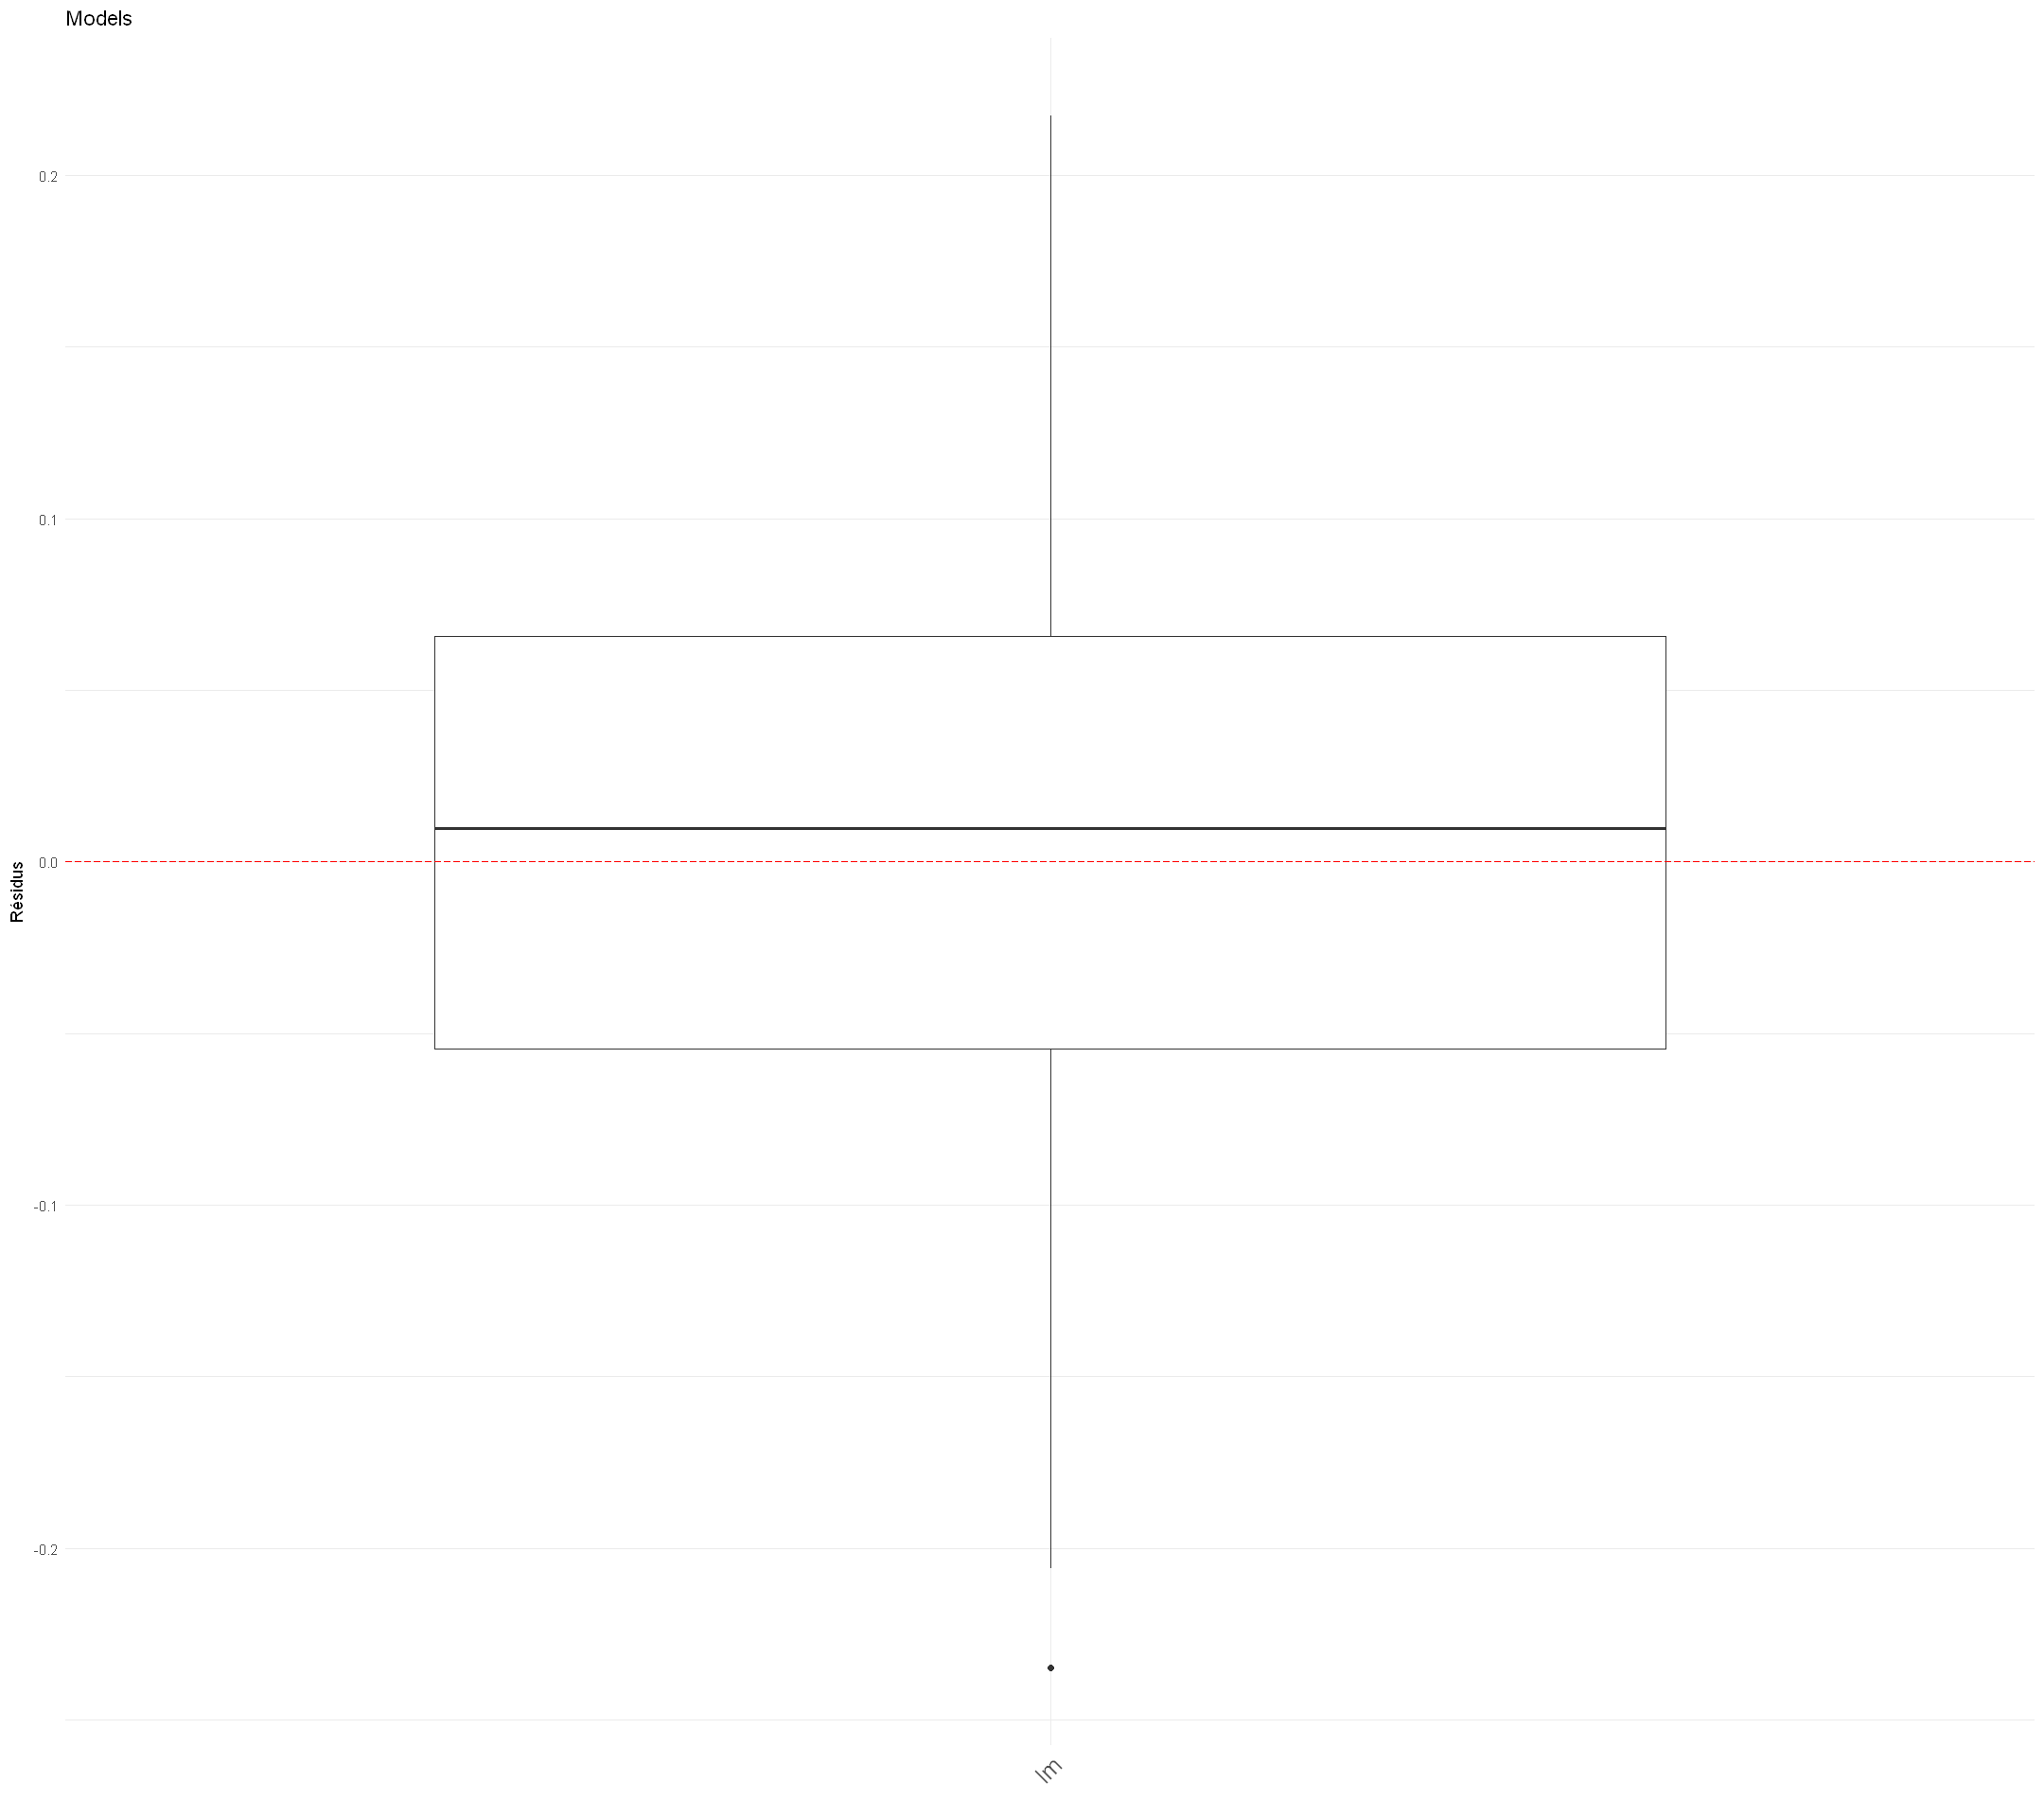

In [373]:
df_long <- test_residuals %>%
  pivot_longer(
    cols = everything(),
    names_to = "Models",
    values_to = "Res"
  )

ggplot(df_long, aes(x = Models, y = Res)) +
  geom_boxplot() +
  labs(
    title = "Models",
    x = "",
    y = "Résidus"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15))+
  geom_hline(
    yintercept = 0,
    color = "red",
    linetype = "longdash"
  )

boosting et svr semblent parfaits

## <FONT COLOR="Orange">C. Prédiction des niveaux d’expériences</font>

### <FONT COLOR="Gray">1. Modèles simples</font>

#### <FONT COLOR="Blue">1.1. Régression logistique</font>

In [469]:
cal_precision <- function(pred, actual) {
    actual = test$Experience_Level
    all_levels <- union(levels(as.factor(pred)), levels(as.factor(actual)))
    pred <- factor(pred, levels = all_levels)
    actual <- factor(actual, levels = all_levels)
    
    conf_matrix <- table(Predicted = pred, Actual = actual)
    total_precision <- sum(diag(conf_matrix)) / sum(conf_matrix)
    
    return(total_precision)
}

In [255]:
loss_cross_entropy_level <- function(model, test_data, epsilon = 1e-10){
    probabilities <- predict(model, newdata = test, type = "probs")   
    true_classes <- test$Experience_Level
    true_one_hot <- model.matrix(~ Experience_Level - 1, data = test)  
    probabilities <- pmax(probabilities, epsilon)
    probabilities <- pmin(probabilities, 1 - epsilon)
    log_loss <- -mean(rowSums(true_one_hot * log(probabilities)))
    return (log_loss)
}

- **Modèles régression logistique avec sélection de variable par critère AIC**

In [257]:
lr_model_no_i <- multinom(Experience_Level ~ ., data = train, trace = FALSE)

lr_AIC_no_i <- stepAIC(lr_model_no_i, direction = "both", trace = FALSE)

# Variables retenues par AIC
selected_vars <- all.vars(formula(lr_AIC_no_i))[-1] 

formula_interactions <- as.formula(
  paste("Experience_Level ~ (", paste(selected_vars, collapse = " + "), ")^2")
)
#AIC 
lr_model_i_optimized <- multinom(formula_interactions, data = train, trace = FALSE )
lr_AIC_i <- stepAIC(lr_model_i_optimized, direction = "both", trace = FALSE)

In [473]:
lrt_result <- lrtest(lr_AIC_no_i, lr_AIC_i)
print(lrt_result)
print(paste("Cross-Entropy Loss model sans intéractions", loss_cross_entropy_level(lr_AIC_no_i, test)))
print(paste("Précision sans intéraction", cal_precision(predict(lr_AIC_no_i, newdata = test, type = "class")) ))
print(paste("Cross-Entropy Loss model avec intéractions", loss_cross_entropy_level(lr_AIC_i, test)))
print(paste("Précision sans intéraction", cal_precision(predict(lr_AIC_no_i, newdata = test, type = "class")) ))

Likelihood ratio test

Model 1: Experience_Level ~ Avg_BPM + S_Calories_Burned + C_Fat_Percentage + 
    Workout_Frequency..days.week.
Model 2: Experience_Level ~ Avg_BPM + S_Calories_Burned + C_Fat_Percentage + 
    Workout_Frequency..days.week. + Avg_BPM:C_Fat_Percentage
  #Df  LogLik Df  Chisq Pr(>Chisq)  
1  14 -165.67                       
2  16 -163.16  2 5.0187    0.08132 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "Cross-Entropy Loss model sans intéractions 0.216747766023159"
[1] "Précision sans intéraction 0.865284974093264"
[1] "Cross-Entropy Loss model avec intéractions 0.221118463179651"
[1] "Précision sans intéraction 0.865284974093264"


In [264]:
lr_AIC = lr_AIC_no_i

- **Optimisation avec Régularisation LASSO avec sélection de variable par validation croisée**

In [479]:
loss_cross_entropy_level_glm <- function(model, x.test, test_data){
    epsilon <- 1e-15  # Pour éviter log(0)
    probabilities <- drop(predict(model, newx = x.test, type = "response"))
    true_classes <- test_data$Experience_Level
    true_one_hot <- model.matrix(~ Experience_Level - 1, data = test_data)
    probabilities <- pmax(probabilities, epsilon)
    probabilities <- pmin(probabilities, 1 - epsilon)
    
    log_loss <- -mean(rowSums(true_one_hot * log(probabilities)))
    return(log_loss)
}

In [487]:
x.mat_no_i <- model.matrix(Experience_Level ~ ., data = train)[,-1] 
x.mat_i <- model.matrix(Experience_Level ~ .^2, data = train)[,-1]

x.mat_no_i_test <- model.matrix(Experience_Level ~ ., data = test)[,-1]
x.mat_i_test <- model.matrix(Experience_Level ~ .^2, data = test)[,-1]

reg.lasso.cv_no_i <- cv.glmnet(
  x = x.mat_no_i,
  y = train$Experience_Level,
  family = "multinomial", 
  type.measure = "class",
  alpha = 1
)

reg.lasso.cv_i <- cv.glmnet(
  x = x.mat_i,
  y = train$Experience_Level,
  family = "multinomial",
  type.measure = "class",
  alpha = 1
)
lr_lasso_no_i <- glmnet(
  x = x.mat_no_i,
  y = train$Experience_Level,
  family = "multinomial",
  lambda = reg.lasso.cv_no_i$lambda.min
)

lr_lasso_i <- glmnet(
  x = x.mat_i,
  y = train$Experience_Level,
  family = "multinomial",
  lambda = reg.lasso.cv_i$lambda.min
)

In [491]:
cat("Perte sans interactions :", loss_cross_entropy_level_glm(lr_lasso_no_i, x.mat_no_i_test, test), "\n")
cat("Precision sans intéraction", cal_precision(predict(lr_lasso_no_i, newx = x.mat_no_i_test, type = "class")),"\n" )
cat("Perte avec interactions :", loss_cross_entropy_level_glm(lr_lasso_i, x.mat_i_test, test), "\n")
cat("Precision avec intéraction", cal_precision(predict(lr_lasso_i, newx = x.mat_i_test, type = "class")) )


Perte sans interactions : 0.2367937 
Precision sans intéraction 0.8601036 
Perte avec interactions : 0.2691819 
Precision avec intéraction 0.865285

In [296]:
lr_lasso = lr_lasso_no_i

- **Optimisation avec Régularisation Ridge avec sélection de variable par validation croisée**

In [298]:
reg.ridge.cv_no_i <- cv.glmnet(
  x = x.mat_no_i,
  y = train$Experience_Level,
  family = "multinomial", 
  type.measure = "class",
  alpha = 0
)

reg.ridge.cv_i <- cv.glmnet(
  x = x.mat_i,
  y = train$Experience_Level,
  family = "multinomial",
  type.measure = "class",
  alpha = 0
)
lr_ridge_no_i <- glmnet(
  x = x.mat_no_i,
  y = train$Experience_Level,
  family = "multinomial",
  lambda = reg.ridge.cv_no_i$lambda.min,
  alpha = 0
)

lr_ridge_i <- glmnet(
  x = x.mat_i,
  y = train$Experience_Level,
  family = "multinomial",
  lambda = reg.ridge.cv_i$lambda.min,
  alpha = 0
)

In [493]:
cat("Perte sans interactions :", loss_cross_entropy_level_glm(lr_ridge_no_i, x.mat_no_i_test, test), "\n")
cat("Precision sans intéraction", cal_accuracy(predict(lr_lasso_no_i, newx = x.mat_no_i_test, type = "class")), "\n" )
cat("Perte avec interactions :", loss_cross_entropy_level_glm(lr_ridge_i, x.mat_i_test, test), "\n")
cat("Precision avec intéraction", cal_accuracy(predict(lr_ridge_i, newx = x.mat_i_test, type = "class")) )

Perte sans interactions : 0.2979503 
Precision sans intéraction 0.8601036 
Perte avec interactions : 0.2792872 
Precision avec intéraction 0.8601036

In [302]:
lr_ridge = lr_ridge_no_i

- **Optimisation avec Régularisation L1 + L2 (Elastic Net) avec sélection de variable par validation croisée**

In [316]:
alpha_values <- seq(0, 1, by = 0.1)
lambda_values <- 10^seq(2, -3, by = -0.1) 

cv_errors_no_i <- matrix(NA, nrow = length(lambda_values), ncol = length(alpha_values),
                    dimnames = list(lambda_values, alpha_values))
cv_errors_i <- matrix(NA, nrow = length(lambda_values), ncol = length(alpha_values),
                    dimnames = list(lambda_values, alpha_values))

for (alpha in alpha_values) {
  cv_model_no_i <- cv.glmnet(x = x.mat_no_i, y = train$Experience_Level, 
                            alpha = alpha, lambda = lambda_values,
                            family = "multinomial", type.measure = "class")
  
  cv_model_i <- cv.glmnet(x = x.mat_i, y = train$Experience_Level, 
                         alpha = alpha, lambda = lambda_values,
                         family = "multinomial", type.measure = "class")
    
  cv_errors_no_i[, as.character(alpha)] <- cv_model_no_i$cvm
  cv_errors_i[, as.character(alpha)] <- cv_model_i$cvm
}
min_error_no_i <- min(cv_errors_no_i, na.rm = TRUE)
min_error_i <- min(cv_errors_i, na.rm = TRUE)

optimal_indices_no_i <- which(cv_errors_no_i == min_error_no_i, arr.ind = TRUE)
optimal_alpha_no_i <- as.numeric(colnames(cv_errors_no_i)[optimal_indices_no_i[1, 2]])
optimal_lambda_no_i <- as.numeric(rownames(cv_errors_no_i)[optimal_indices_no_i[1, 1]])

optimal_indices_i <- which(cv_errors_i == min_error_i, arr.ind = TRUE)
optimal_alpha_i <- as.numeric(colnames(cv_errors_i)[optimal_indices_i[1, 2]])
optimal_lambda_i <- as.numeric(rownames(cv_errors_i)[optimal_indices_i[1, 1]])

lr_elastic_no_i = glmnet(y = train$Experience_Level, x = x.mat_no_i, 
                        lambda = optimal_lambda_no_i, alpha = optimal_alpha_no_i,
                        family = "multinomial")

lr_elastic_i = glmnet(y = train$Experience_Level, x = x.mat_i, 
                     lambda = optimal_lambda_i, alpha = optimal_alpha_i,
                     family = "multinomial")

epsilon <- 1e-15 

In [318]:
cat("Perte sans interactions :", loss_cross_entropy_level_glm(lr_elastic_no_i, x.mat_no_i_test, test),  "\n")
cat("Precision sans intéraction", cal_precision(predict(lr_elastic_no_i, newx = x.mat_no_i_test, type = "class")), "\n" )
cat("Perte avec interactions :", loss_cross_entropy_level_glm(lr_elastic_i, x.mat_i_test, test), "\n")
cat("Precision avec intéraction", cal_precision(predict(lr_elastic_i, newx = x.mat_i_test, type = "class")) )

Perte sans interactions : 0.2439548 
Precision sans intéraction 0.8704663 
Perte avec interactions : 0.3100226 
Precision avec intéraction 0.8704663

In [320]:
lr_elastic = lr_elastic_no_i

- **Comparaison les models régressions logistique**

In [334]:
count_nonzero_coefs <- function(model) {
  if ("glmnet" %in% class(model)) {
    coef_list <- coef(model)
    total_nonzero <- 0
    for (i in 1:length(coef_list)) {
      total_nonzero <- total_nonzero + sum(coef_list[[i]] != 0)
    }
    return(total_nonzero)
  } else {
    return(length(model$coefnames))
  }
}

nombre_coefs <- c(
  count_nonzero_coefs(lr_AIC), 
  count_nonzero_coefs(lr_lasso), 
  count_nonzero_coefs(lr_ridge), 
  count_nonzero_coefs(lr_elastic)
)

cross_entropy <- c(
  loss_cross_entropy_level(lr_AIC, test), 
  loss_cross_entropy_level_glm(lr_lasso, x.mat_no_i_test, test), 
  loss_cross_entropy_level_glm(lr_ridge, x.mat_no_i_test, test), 
  loss_cross_entropy_level_glm(lr_elastic, x.mat_no_i_test, test)
)
precision <- c(
    cal_precision(predict(lr_AIC, newdata = test, type = "class")),
    cal_precision(predict(lr_lasso, newx = x.mat_no_i_test, type = "class")),
    cal_precision(predict(lr_ridge, newx = x.mat_no_i_test, type = "class")),
    cal_precision(predict(lr_elastic, newx = x.mat_no_i_test, type = "class"))
)
models_lr <- c("Logistic Regression", "LASSO", "Ridge", "Elastic Net")
data.frame(Models = models_lr, Coefficients = nombre_coefs, CrossEntropy = cross_entropy, Precision = precision)

Models,Coefficients,CrossEntropy,Precision
<chr>,<dbl>,<dbl>,<dbl>
Logistic Regression,7,0.2167478,0.8652850
LASSO,21,0.2314149,0.8652850
Ridge,57,0.2979503,0.8652850
Elastic Net,45,0.2439548,0.8704663


In [332]:
best.lr = lr_AIC

- **Evaluation**

[1] "Exactitude (accuracy):  0.8653"


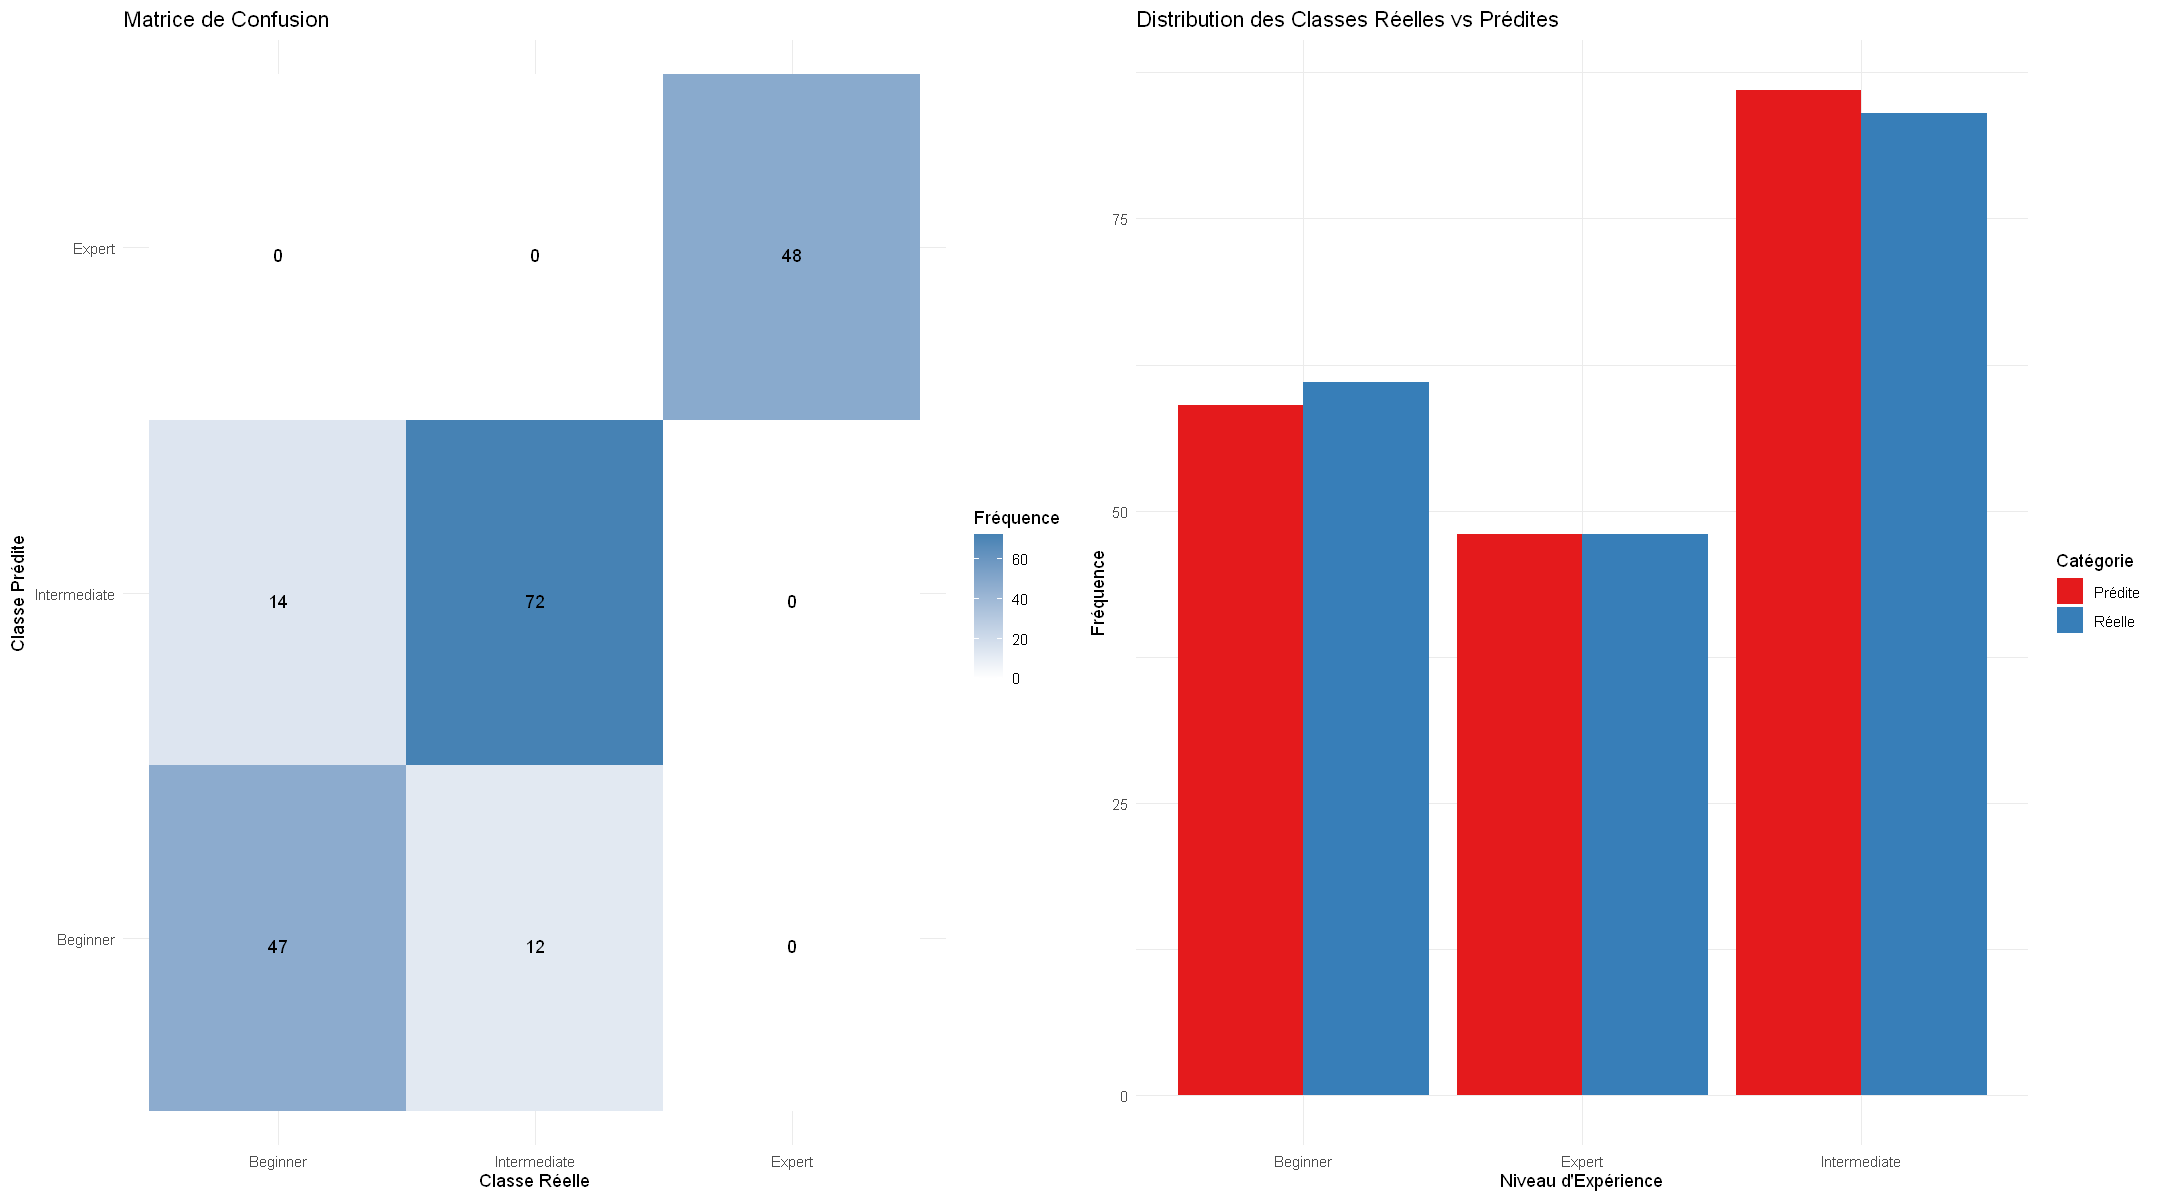

In [358]:
pred_class <- predict(best.lr, newdata = test, type = "class")

test_predicted[, "Experience_Level_pred_lr"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_lr, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_lr))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

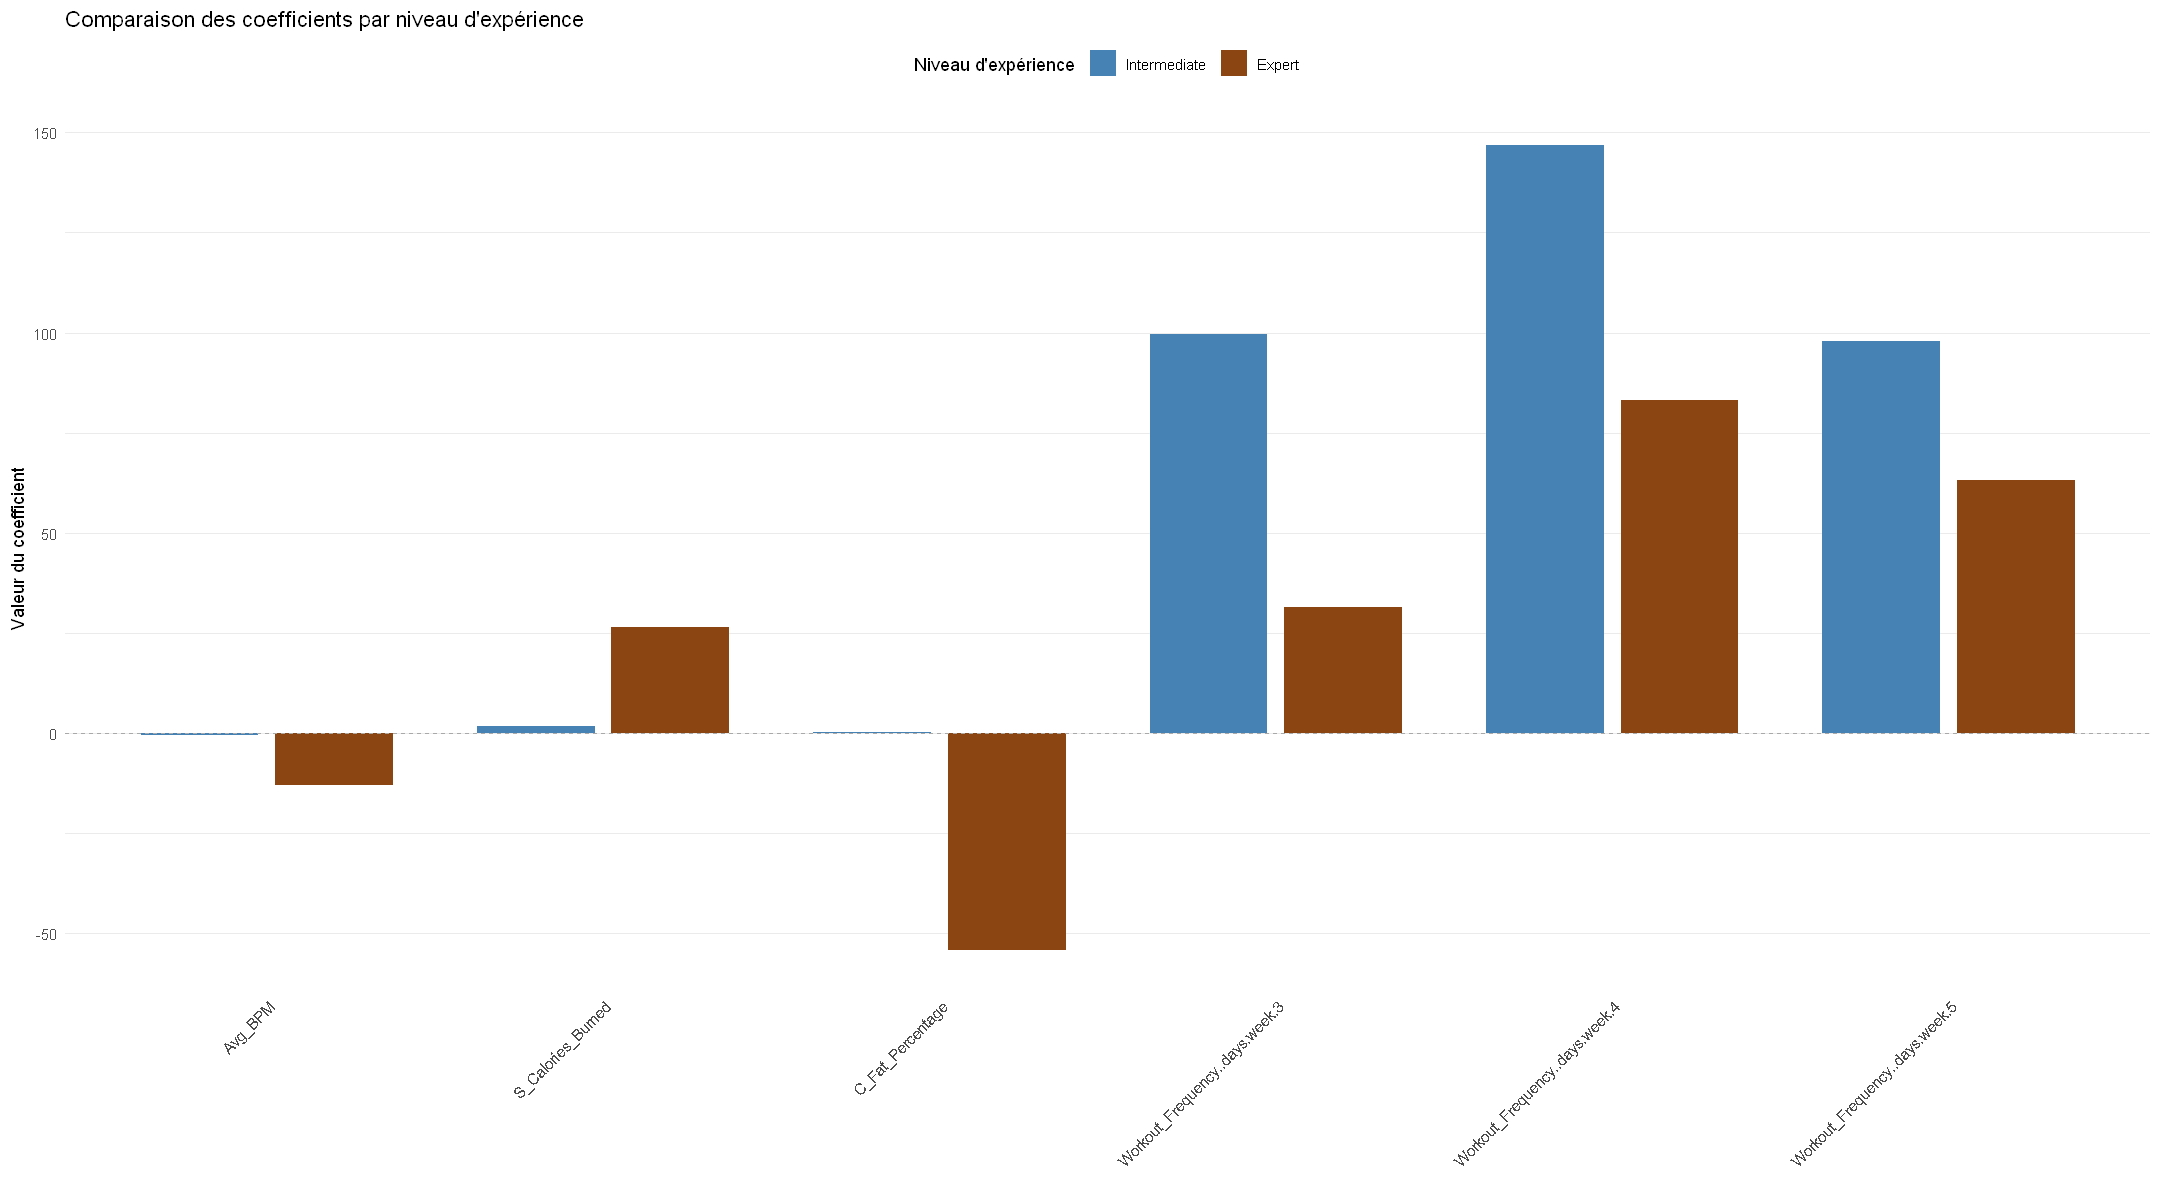

In [404]:
coefs_df <- summary(best.lr)$coefficients
coef_df$Variable <- rownames(coef_df)

coef_long <- melt(coef_df, id.vars = "Variable", 
                 variable.name = "Experience_Level", 
                 value.name = "Coefficient")

coef_long_no_intercept <- coef_long[coef_long$Experience_Level != c("(Intercept)", "(Intercept)", "Level","Level"),]
coef_long_no_intercept$Coefficient <- as.numeric(coef_long_no_intercept$Coefficient)
var_order <- aggregate(abs(Coefficient) ~ Variable, coef_long_no_intercept, mean)
var_order <- var_order[order(-var_order$`abs(Coefficient)`),]
coef_long_no_intercept$Variable <- factor(coef_long_no_intercept$Variable, 
                                          levels = var_order$Variable)

ggplot(coef_long_no_intercept, aes(x = Experience_Level, y = Coefficient, fill = Variable)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width = 0.7) +
  scale_fill_manual(values = c("Intermediate" = "#4682B4", "Expert" = "#8B4513")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top",
    panel.grid.major.x = element_blank()
  ) +
  labs(
    title = "Comparaison des coefficients par niveau d'expérience",
    x = "",
    y = "Valeur du coefficient",
    fill = "Niveau d'expérience"
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "darkgray")


#### <FONT COLOR="Blue">1.2. Support Vector Classification</font>

In [406]:
svc.tune.results <- list()
kernels <- c("linear", "radial", "poly")

types <- c("C-classification", "nu-classification")

for (k in kernels) {
  for (t in types) {
    
    if (t == "C-classification") {
      # Pour C-classification, on fait varier cost et gamma
      svc.tune <- e1071::tune(
        svm,
        Experience_Level ~ .,          
        data = train,
        kernel = k,
        type = t,
        ranges = list(
          cost  = c(0.1, 1, 10),
          gamma = c(0.01, 0.1, 1)
        ),
        tunecontrol = tune.control(sampling = "cross", cross = 5)  
      )
      
      svc.tune.results[[paste(k, t, sep = "_")]] <- svc.tune
      
    } else {
      # "nu-classification" : on fait varier cost, gamma, nu
      svc.tune <- e1071::tune(
        svm,
        Experience_Level ~ .,
        data = train,
        kernel = k,
        type = t,
        ranges = list(
          cost  = c(0.1, 1, 10),
          gamma = c(0.01, 0.1, 1),
          nu    = c(0.1, 0.5)
        ),
        tunecontrol = tune.control(sampling = "cross", cross = 5)
      )
      
      svc.tune.results[[paste(k, t, sep = "_")]] <- svc.tune
    }
  }
}

for (name in names(svc.tune.results)) {
  cat("===== Model:", name, "=====\n")
  cat("Best parameters:\n")
  print(svc.tune.results[[name]]$best.parameters)
  cat("Cross-val error (classification error rate) =", svc.tune.results[[name]]$best.performance, "\n\n")
}

===== Model: linear_C-classification =====
Best parameters:
  cost gamma
1  0.1  0.01
Cross-val error (classification error rate) = 0.112987 

===== Model: linear_nu-classification =====
Best parameters:
   cost gamma  nu
10  0.1  0.01 0.5
Cross-val error (classification error rate) = 0.1220779 

===== Model: radial_C-classification =====
Best parameters:
  cost gamma
3   10  0.01
Cross-val error (classification error rate) = 0.1220779 

===== Model: radial_nu-classification =====
Best parameters:
   cost gamma  nu
10  0.1  0.01 0.5
Cross-val error (classification error rate) = 0.1181818 

===== Model: poly_C-classification =====
Best parameters:
  cost gamma
5    1   0.1
Cross-val error (classification error rate) = 0.1662338 

===== Model: poly_nu-classification =====
Best parameters:
  cost gamma  nu
4  0.1   0.1 0.1
Cross-val error (classification error rate) = 0.187013 



$\rightarrow$ linear is the best kernel

- **Construire le model**

In [415]:
best_performance <- Inf
best_model_name <- NULL

for (name in names(svc.tune.results)) {
  if (svc.tune.results[[name]]$best.performance < best_performance) {
    best_performance <- svc.tune.results[[name]]$best.performance
    best_model_name <- name
  }
}
best_svc <- svc.tune.results[[best_model_name]]$best.model

- **Evaluation**

[1] "Exactitude (accuracy):  0.8497"


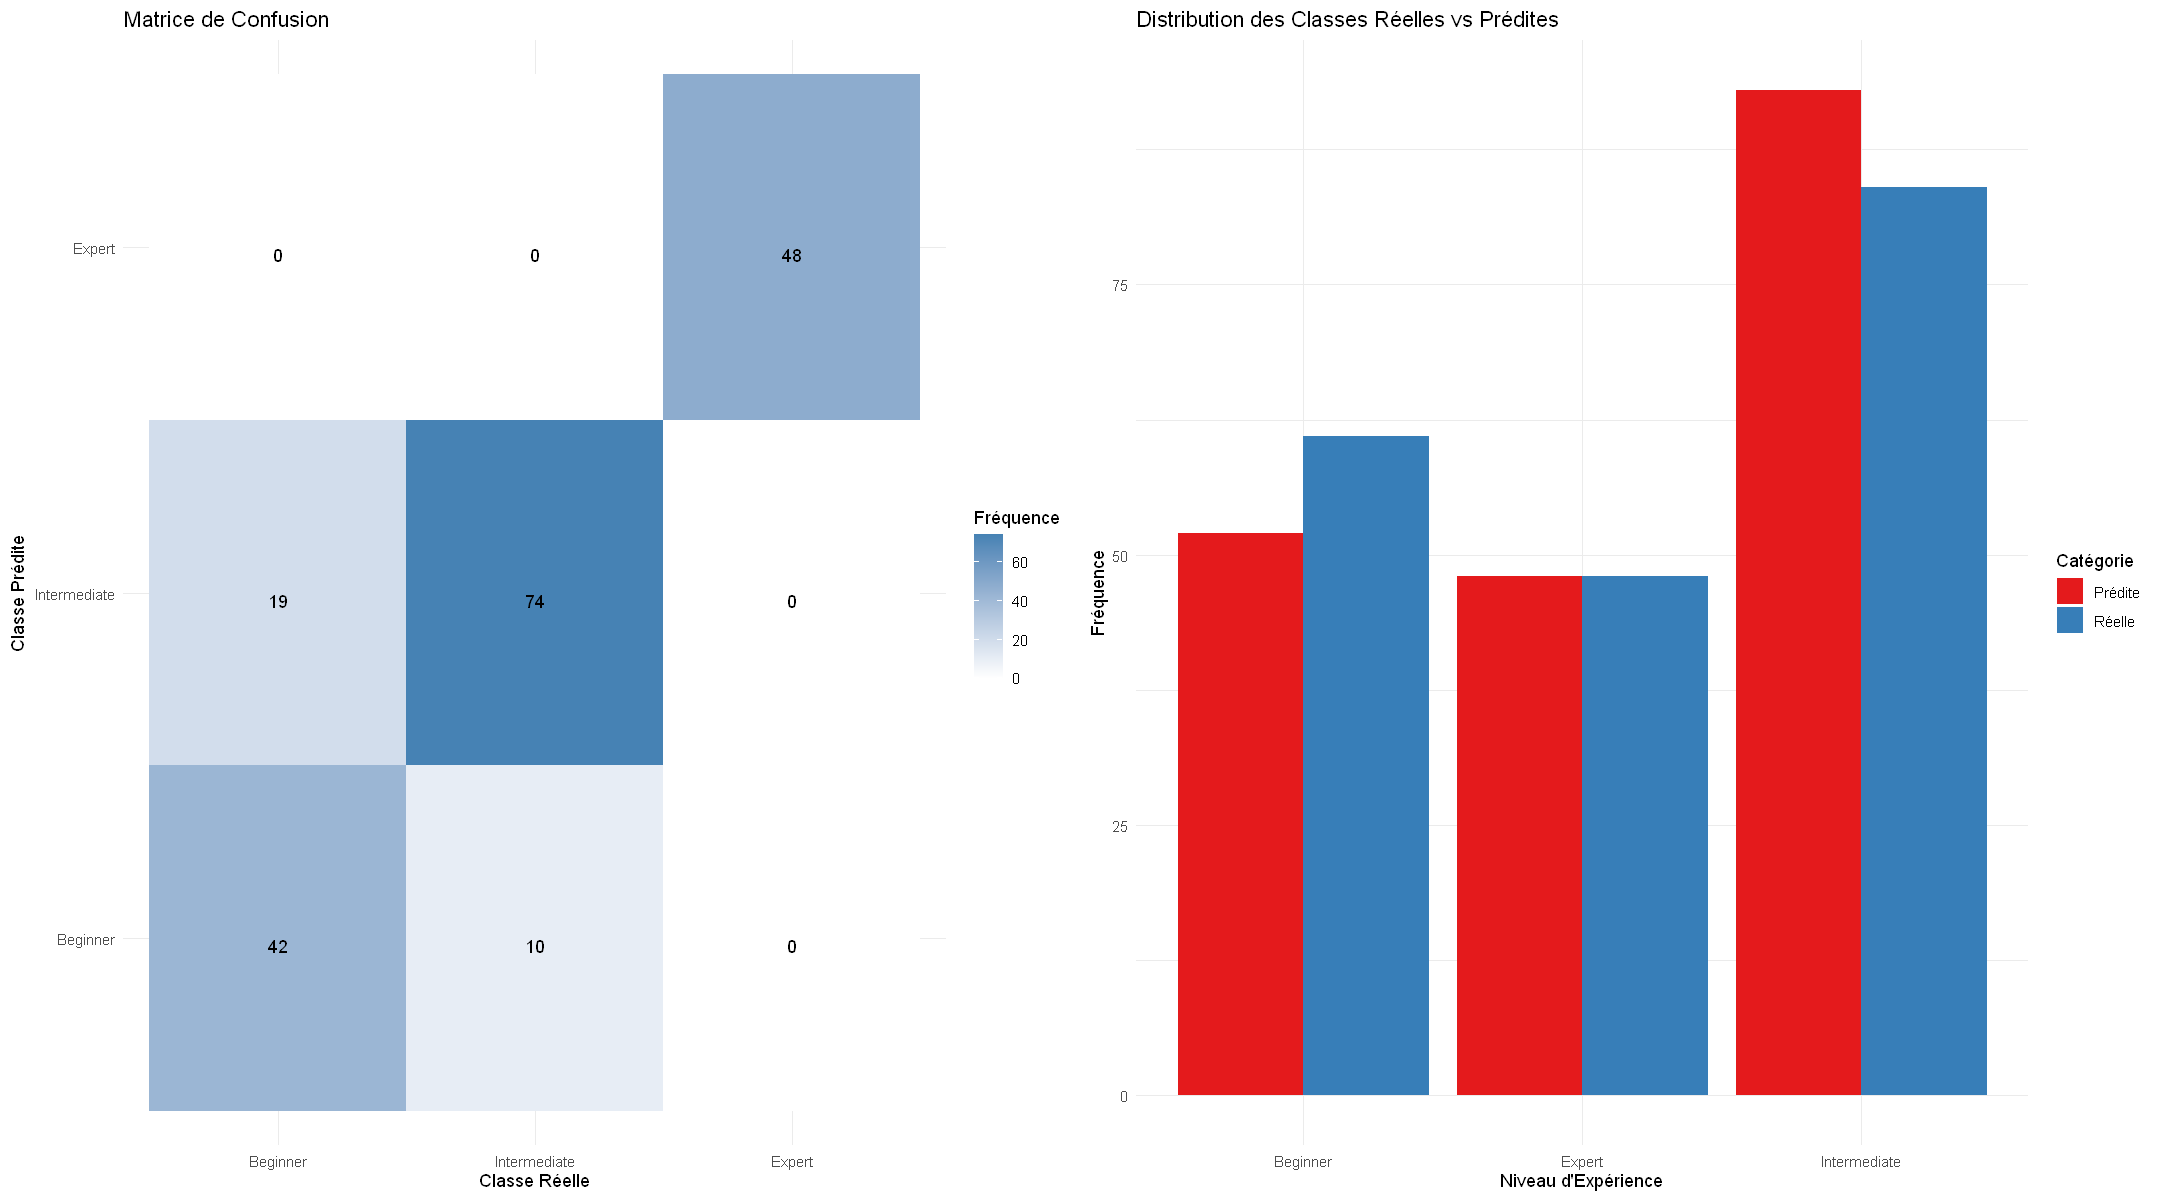

In [417]:
pred_class <- predict(best_svc, newdata = test, type = "class")
test_predicted[, "Experience_Level_pred_svc"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_svc, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_svc))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

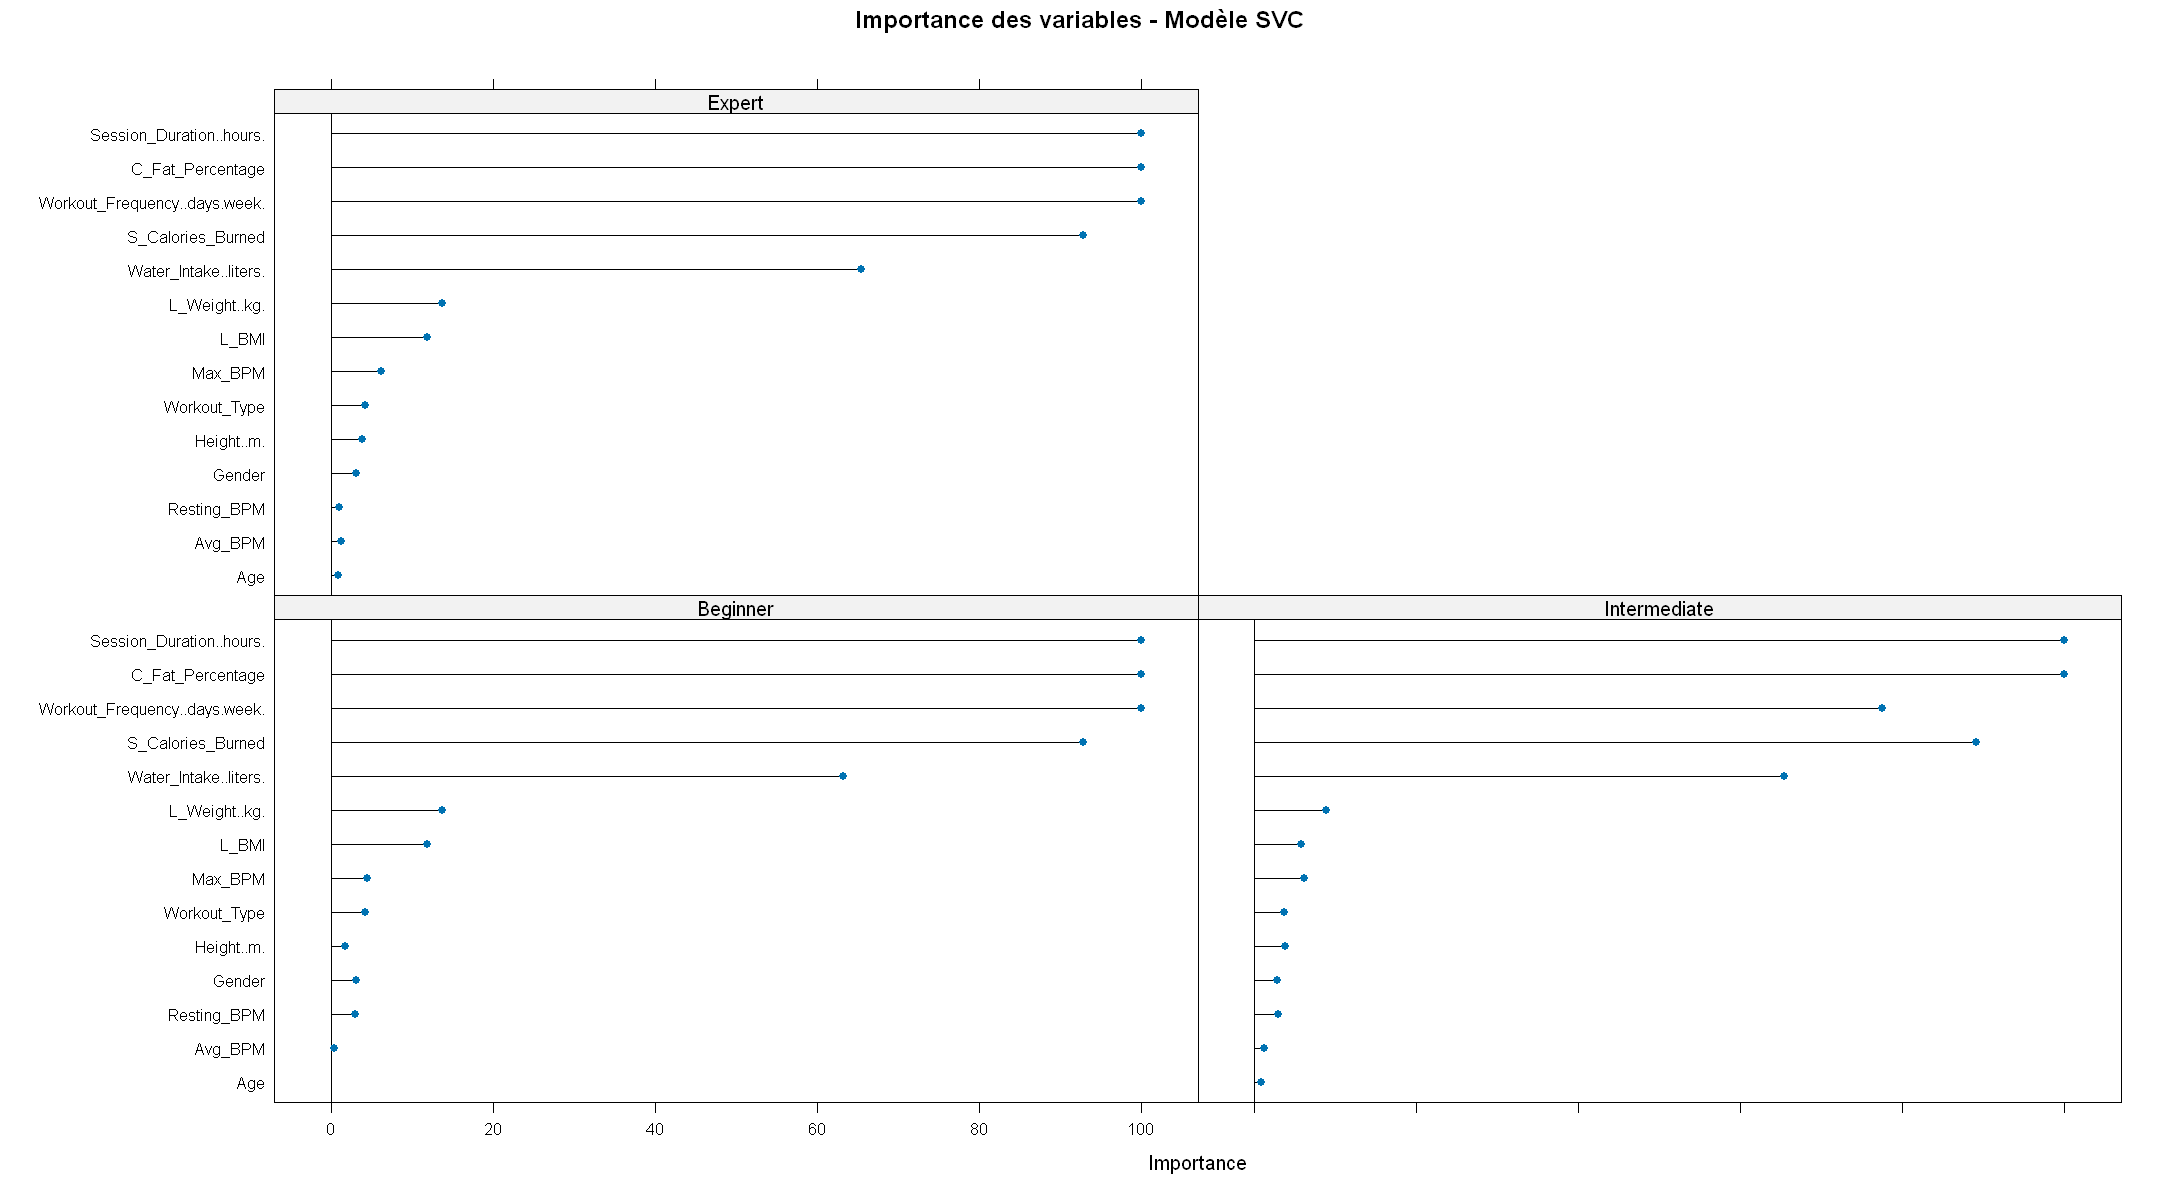

In [419]:
ctrl <- trainControl(method = "none")
svc_caret <- train(
    Experience_Level ~ ., 
    data = train,
    method = "svmRadial",
    trControl = ctrl,
    tuneGrid = data.frame(
      sigma = best_svc$gamma,
      C = best_svc$cost
    )
  )

var_imp <- varImp(svc_caret, scale = TRUE)
plot(var_imp, main = "Importance des variables - Modèle SVC")

#### <FONT COLOR="Blue">1.3. Regression Tree</font>

In [421]:
tree.reg_no_i <- rpart(Experience_Level ~ ., 
                      data = train, 
                      method = "class",
                      control = rpart.control(cp = 0, xval = 10))

optimal_row <- which.min(tree.reg_no_i$cptable[, "xerror"])
optimal_cp <- tree.reg_no_i$cptable[optimal_row, "CP"]
tree.reg_no_i <- prune(tree.reg_no_i, cp = optimal_cp)
nsplits <- tree.reg_no_i$cptable[optimal_row, "nsplit"]
cat("Optimal number of splits:", nsplits)

Optimal number of splits: 3

In [423]:
best.cart = tree.reg_no_i

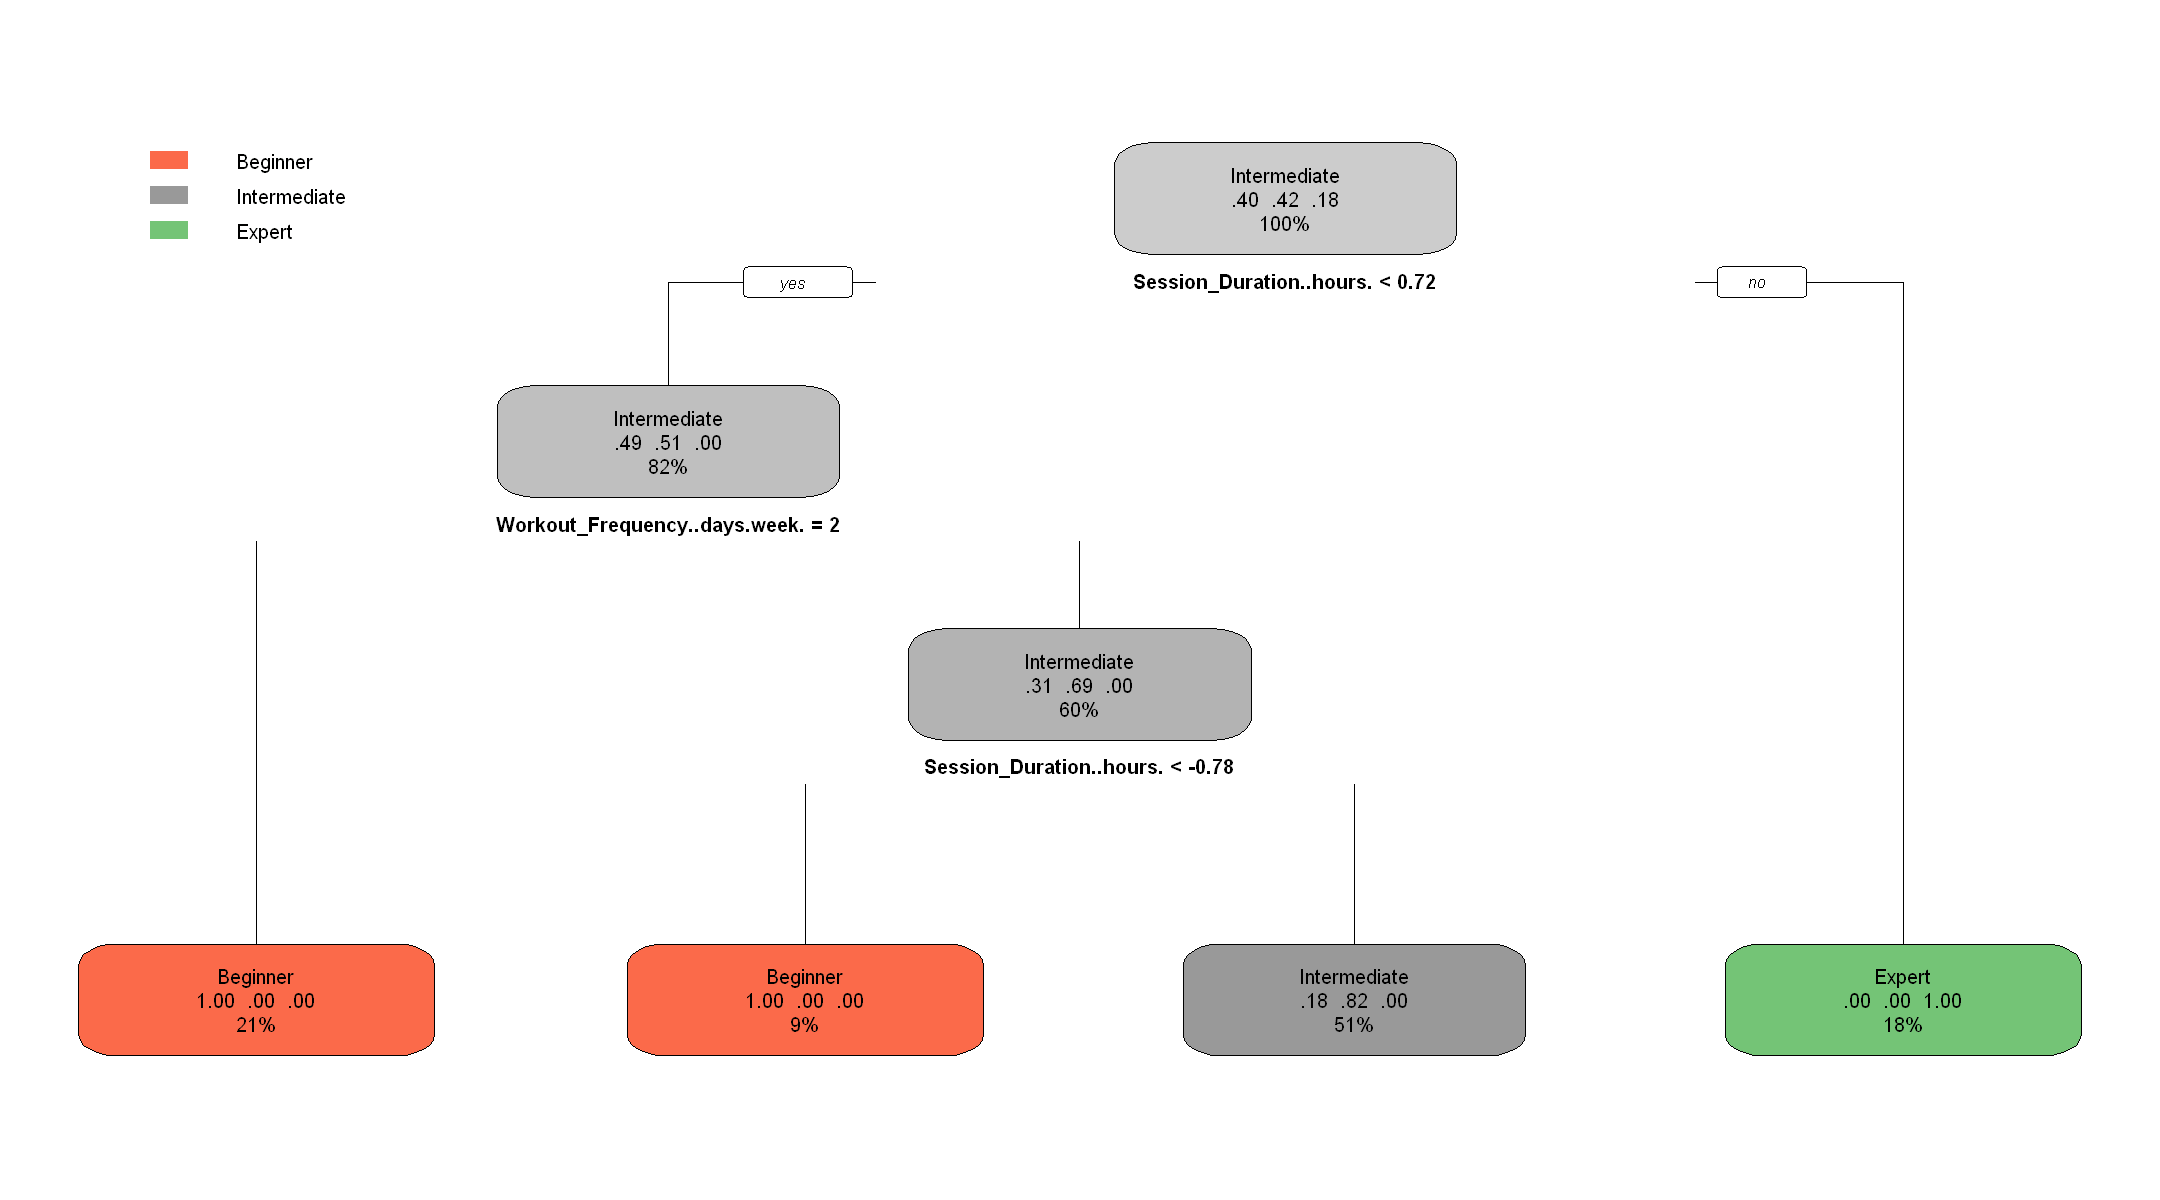

In [425]:
rpart.plot(best.cart)

- **Evaluation le model**

[1] "Exactitude (accuracy):  0.8912"


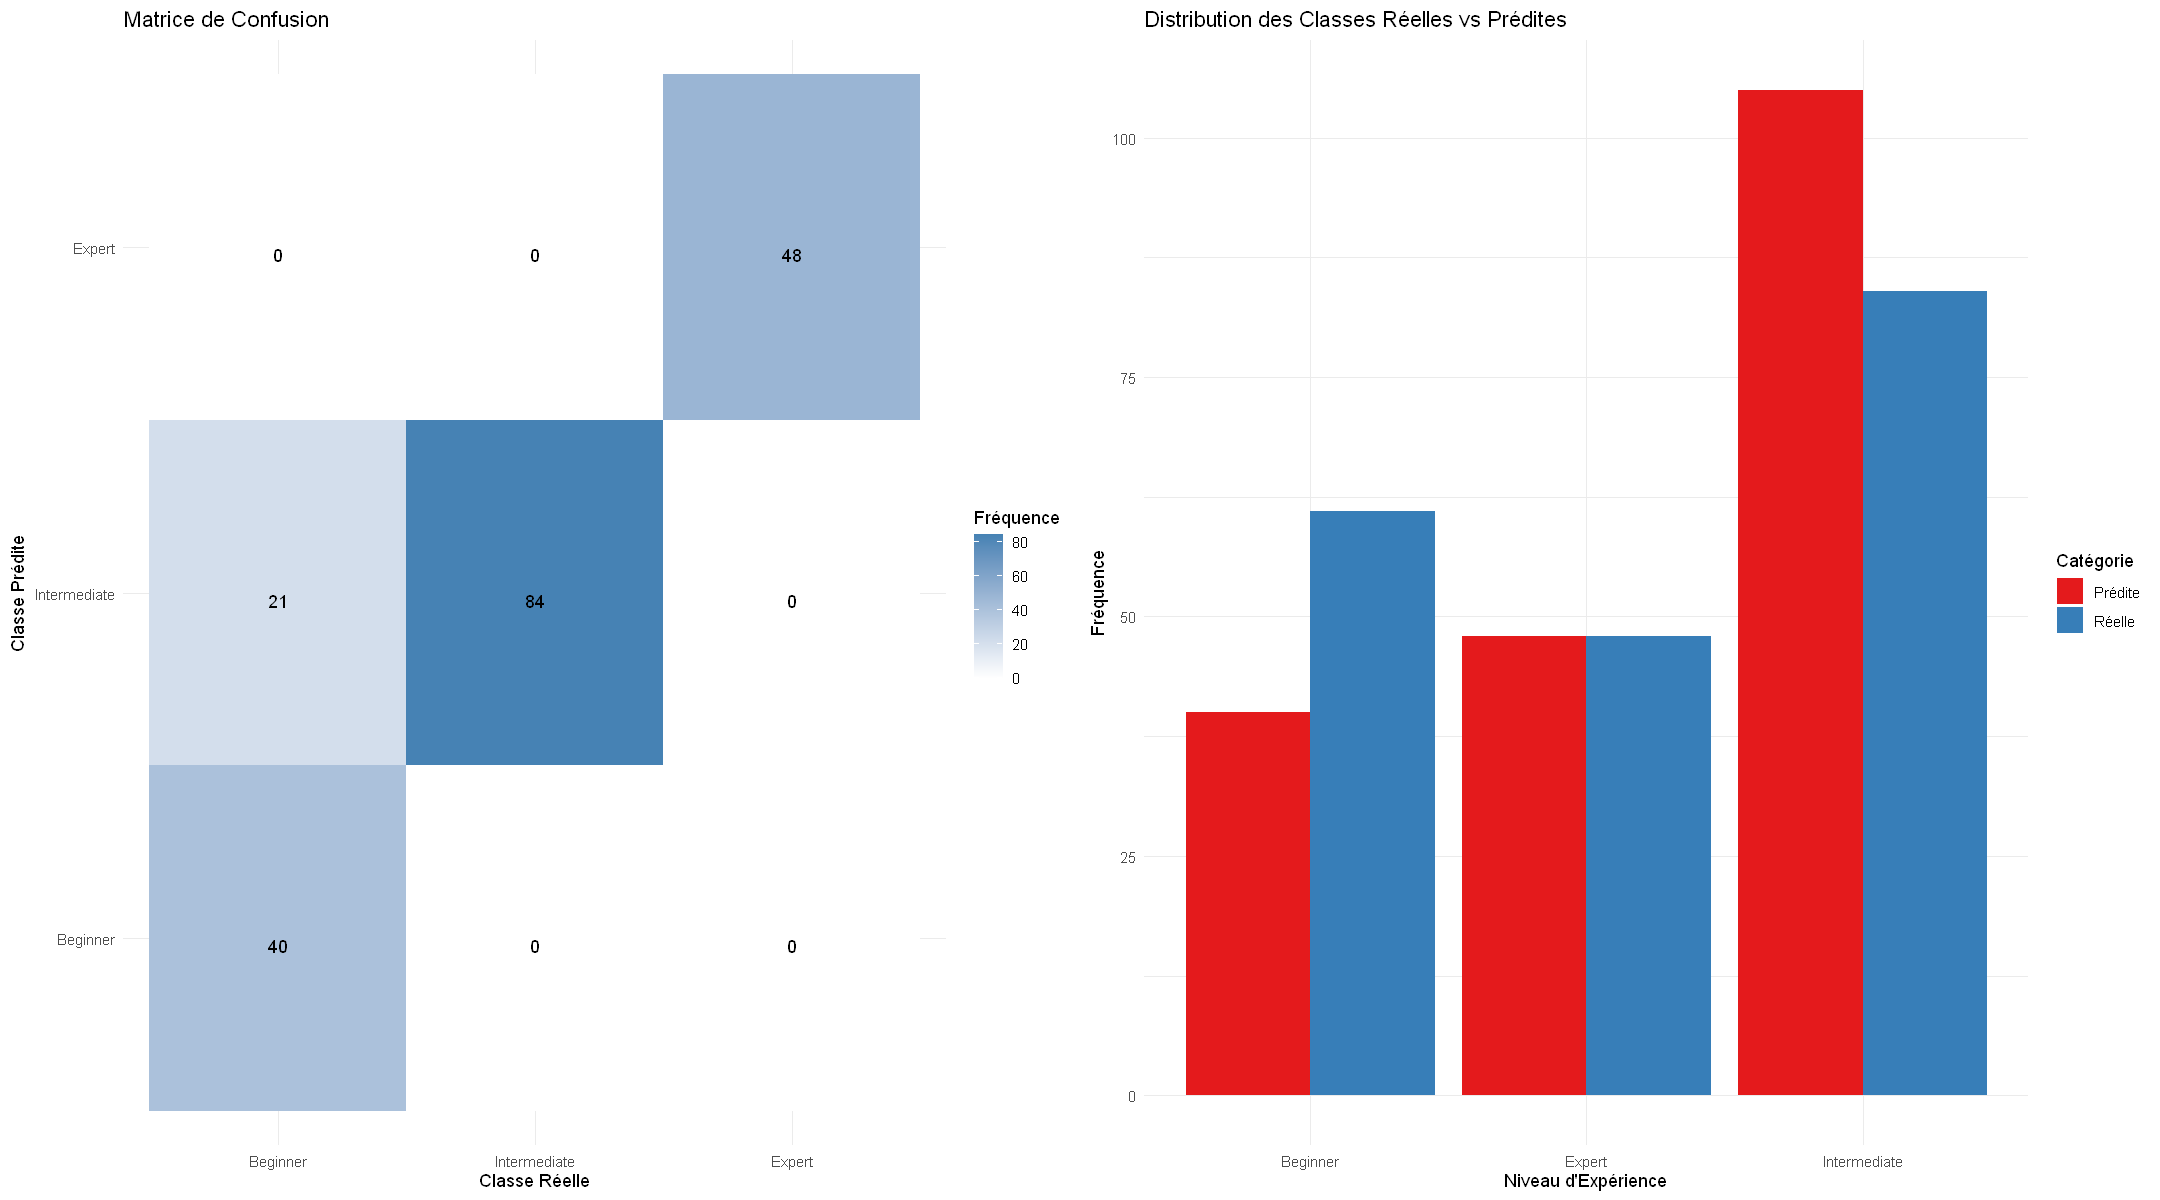

In [429]:
pred_class <- predict(best.cart, newdata = test, type = "class")
test_predicted[, "Experience_Level_pred_card"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_card, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_card))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

- **Interpretation**

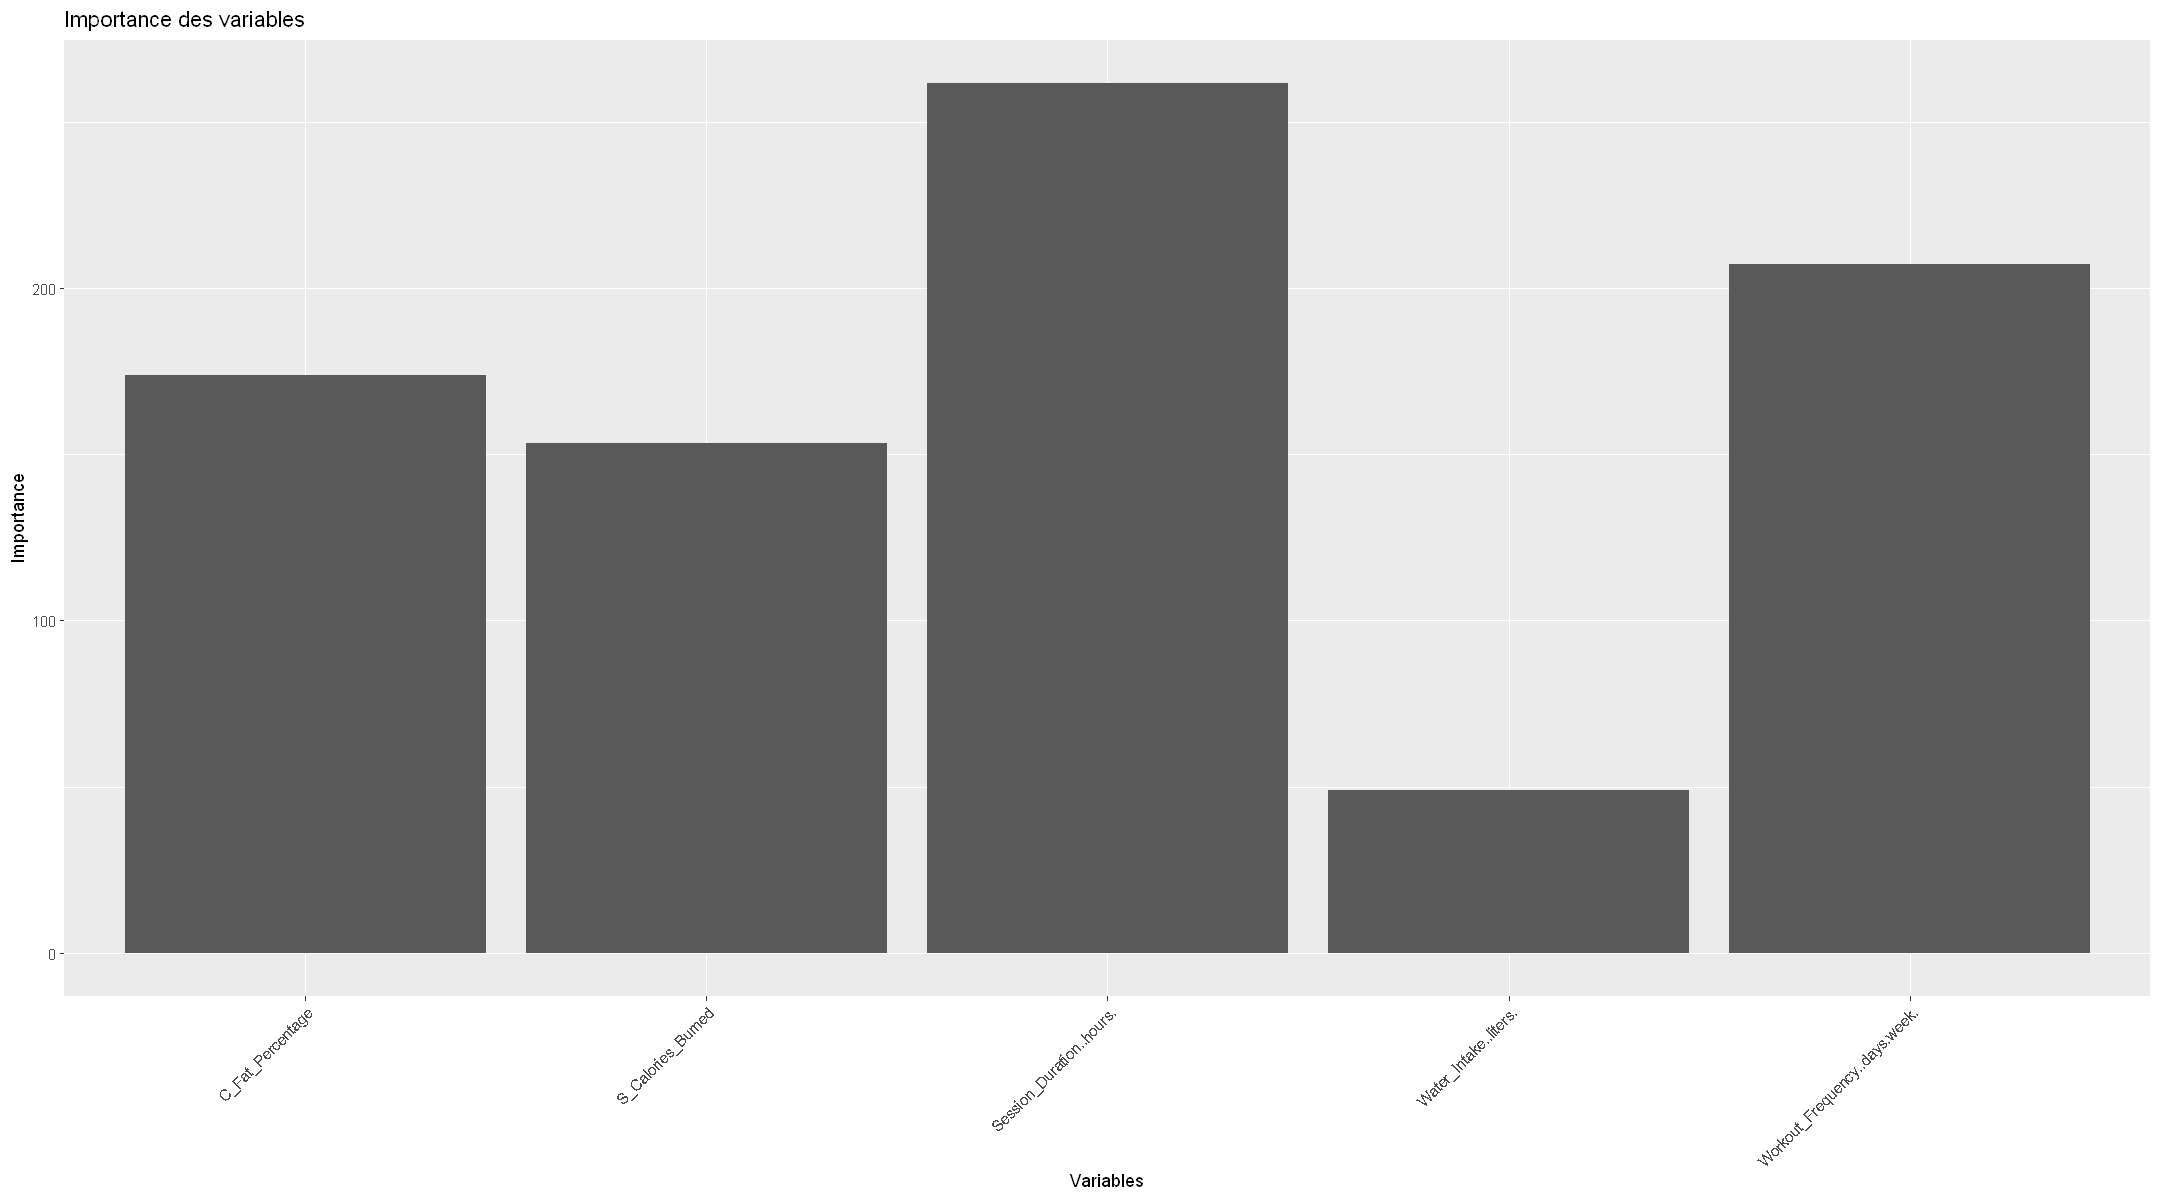

In [431]:
inter_cart = as.data.frame(best.cart$variable.importance)
names(inter_cart)[1] = "Important"
inter_cart$Variables <- rownames(inter_cart)

ggplot(data = inter_cart, aes(x = Variables, y = Important)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Importance des variables", 
       x = "Variables", 
       y = "Importance")

#### <FONT COLOR="Blue">1.4. LDA</font>

In [702]:
lda_model <- lda(Experience_Level ~ ., data = train)

[1] "Exactitude (accuracy):  0.8756"


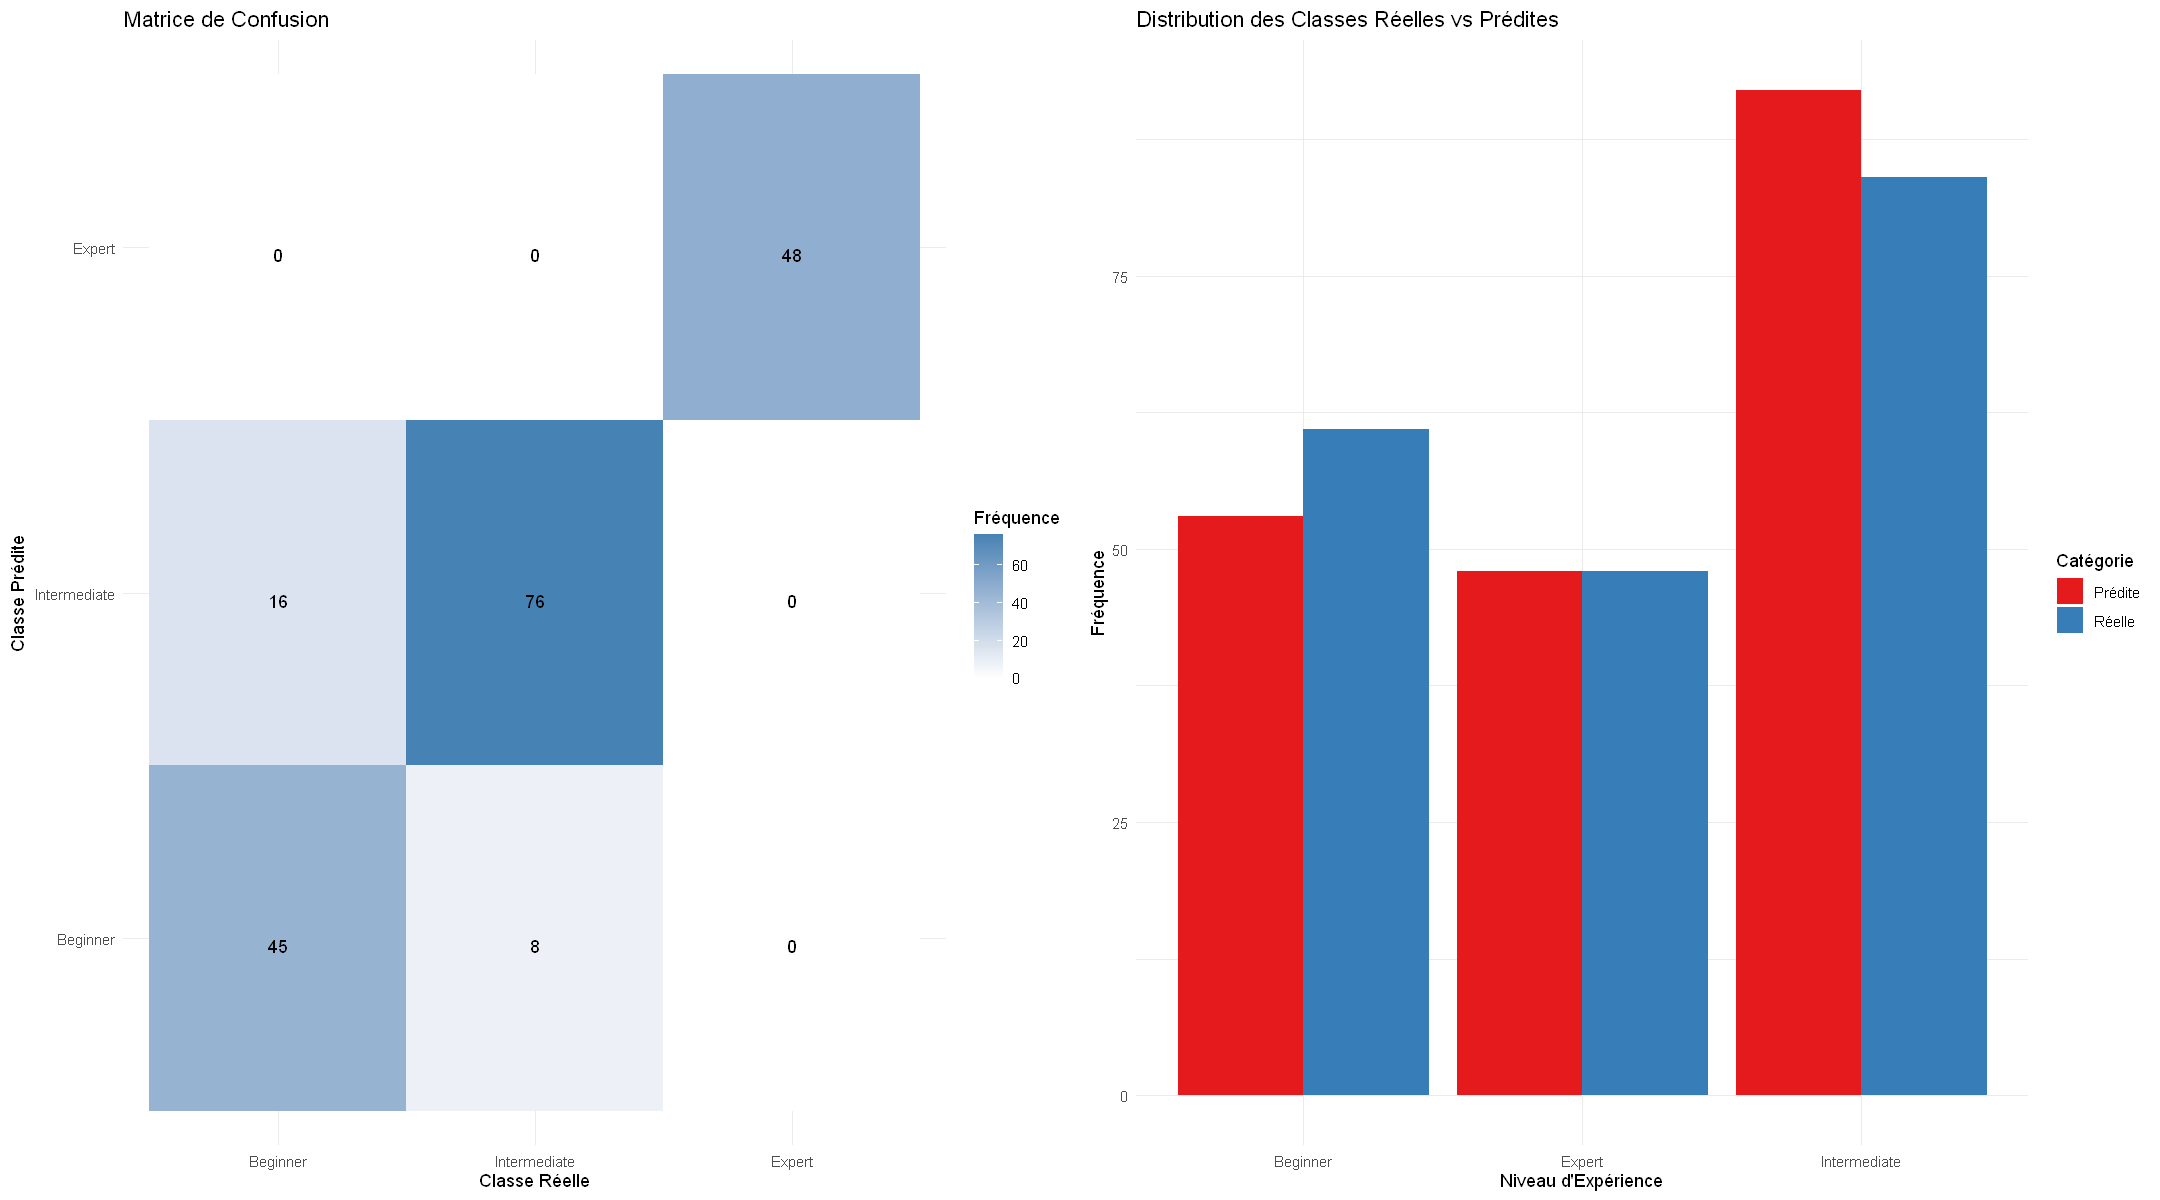

In [704]:
lda_pred <- predict(lda_model, newdata = test)
pred_class <- lda_pred$class
test_predicted[, "Experience_Level_pred_lda"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_lda, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_lda))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

#### <FONT COLOR="Blue">1.5. K-NN</font>

In [706]:
knn_data_train  = x.mat_no_i[,- c(18,19)]
knn_data_test = x.mat_no_i_test[,- c(18,19)]

In [712]:
knn_pred = knn(train = knn_data_train, test = knn_data_test, cl = train$Experience_Level, k = 10)

[1] "Exactitude (accuracy):  0.7668"


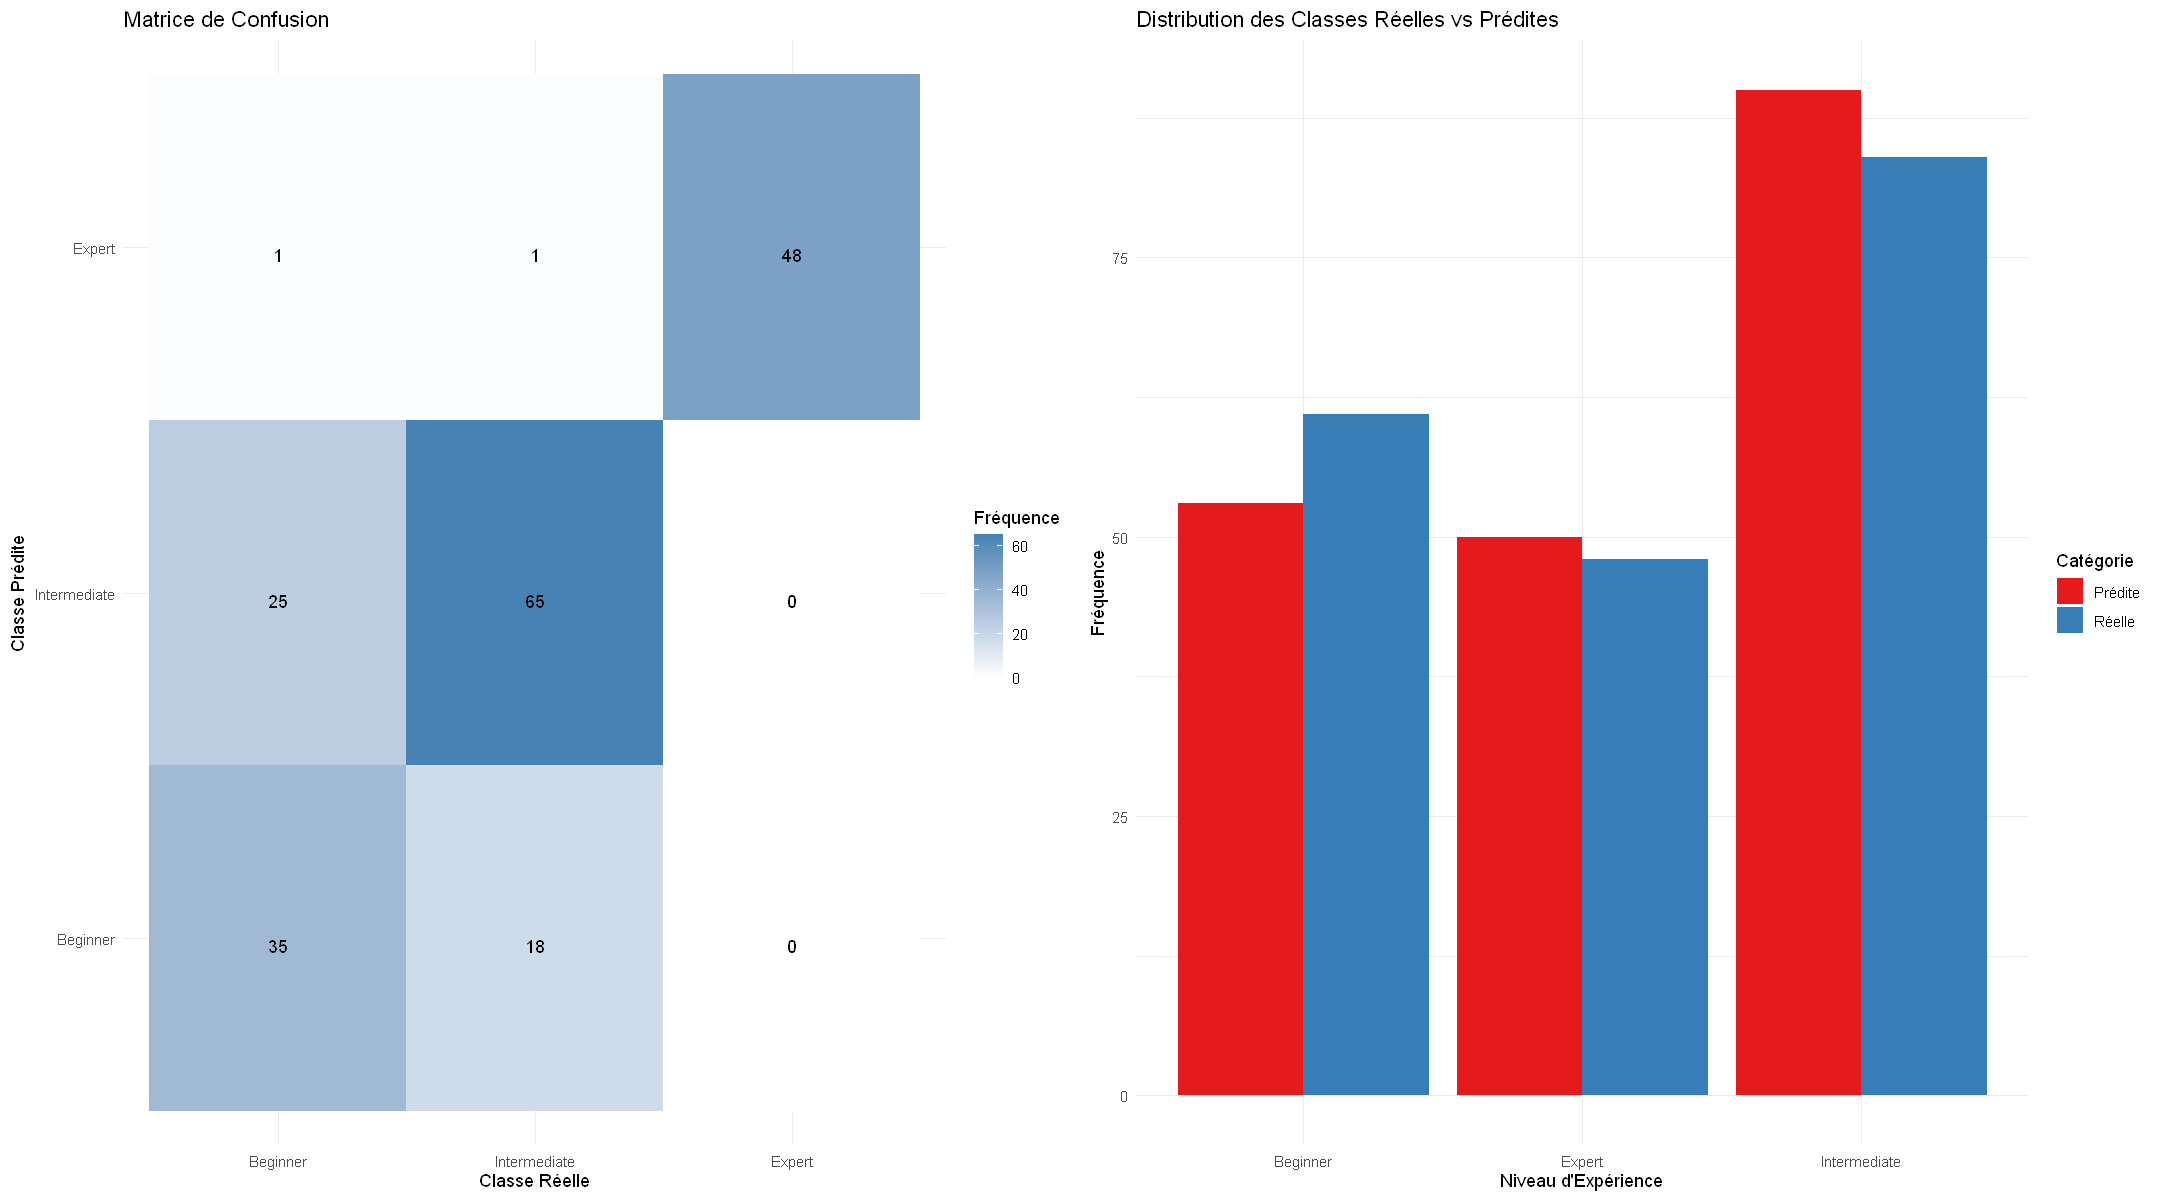

In [714]:
pred_class <- knn_pred
test_predicted[, "Experience_Level_pred_knn"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_knn, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_knn))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

### <FONT COLOR="Gray">2. Agrégation de modèles</font>

#### <FONT COLOR="Blue">2.1. Random forest</font>

In [435]:
x <- train[, -which(names(train) == "Experience_Level")]
y <- train$Experience_Level
best_mtry <- tuneRF(
  x = x,
  y = y,
  ntreeTry = 500,
  stepFactor = 1.5,
  improve = 0.01,
  trace = FALSE,
  plot = FALSE
)
best_mtry <- best_mtry[which.min(best_mtry[, 2]), 1]

-0.02409639 0.01 
0.07228916 0.01 
-0.1038961 0.01 


In [533]:
best_mtry

[1] 4

In [437]:
rf.reg_bestmtry=randomForest(Experience_Level~., data=train,xtest=test[,-14],ytest=test[,"Experience_Level"],
   ntree=500,mtry = best_mtry, do.trace=50,importance=TRUE, keep.forest = TRUE)
rf.reg_mtrydefault = randomForest(Experience_Level~., data=train,xtest=test[,-14],ytest=test[,"Experience_Level"],
   ntree=500,mtry = floor(sqrt(ncol(train))), do.trace=50,importance=TRUE, keep.forest = TRUE)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  11.30% 21.90%  6.21%  0.00%|  11.92% 34.43%  2.38%  0.00%
  100:  11.30% 22.22%  5.90%  0.00%|  11.40% 32.79%  2.38%  0.00%
  150:  10.65% 21.57%  4.97%  0.00%|  10.88% 32.79%  1.19%  0.00%
  200:  10.65% 21.57%  4.97%  0.00%|  10.88% 32.79%  1.19%  0.00%
  250:  10.13% 21.57%  3.73%  0.00%|  10.88% 32.79%  1.19%  0.00%
  300:  10.00% 21.57%  3.42%  0.00%|  10.88% 32.79%  1.19%  0.00%
  350:  10.39% 22.22%  3.73%  0.00%|  10.88% 32.79%  1.19%  0.00%
  400:  10.39% 22.22%  3.73%  0.00%|  10.36% 32.79%  0.00%  0.00%
  450:  10.39% 22.55%  3.42%  0.00%|  10.36% 32.79%  0.00%  0.00%
  500:  10.13% 22.22%  3.11%  0.00%|  10.36% 32.79%  0.00%  0.00%
ntree      OOB      1      2      3|    Test      1      2      3
   50:  11.95% 22.22%  7.45%  0.00%|  11.92% 32.79%  3.57%  0.00%
  100:  11.82% 22.22%  7.14%  0.00%|  11.40% 32.79%  2.38%  0.00%
  150:  10.91% 22.88%  4.35%  0.00%|  10.88% 32.79%  1.19%  0.00%
  200:  10

In [441]:
best.rf = rf.reg_bestmtry

- **Evaluation le model**

[1] "Exactitude (accuracy):  0.8964"


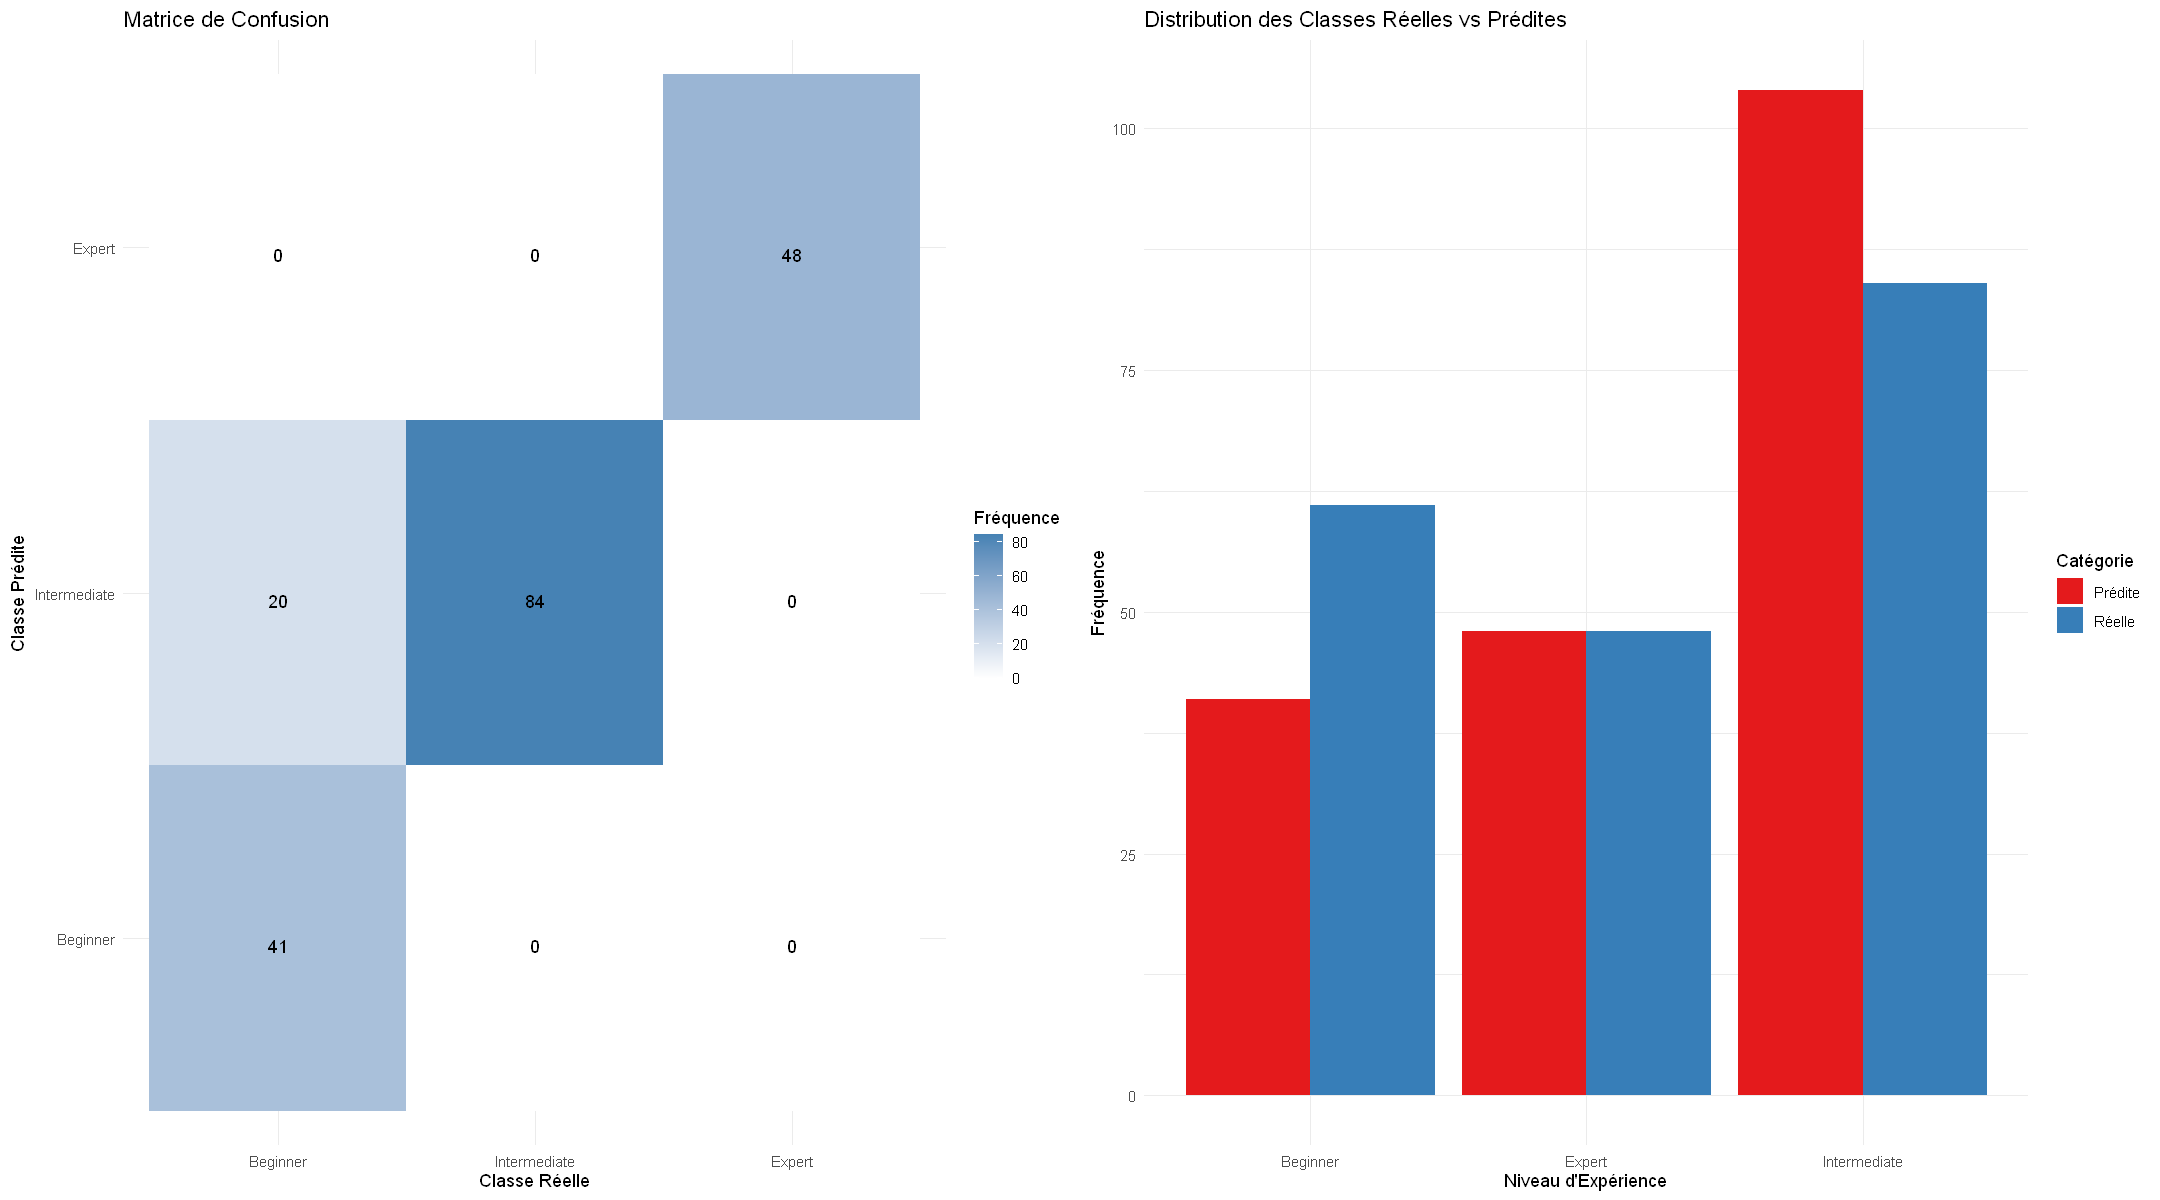

In [443]:
pred_class <- predict(best.rf, newdata = test, type = "class")
test_predicted[, "Experience_Level_pred_rf"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_rf, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_rf))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

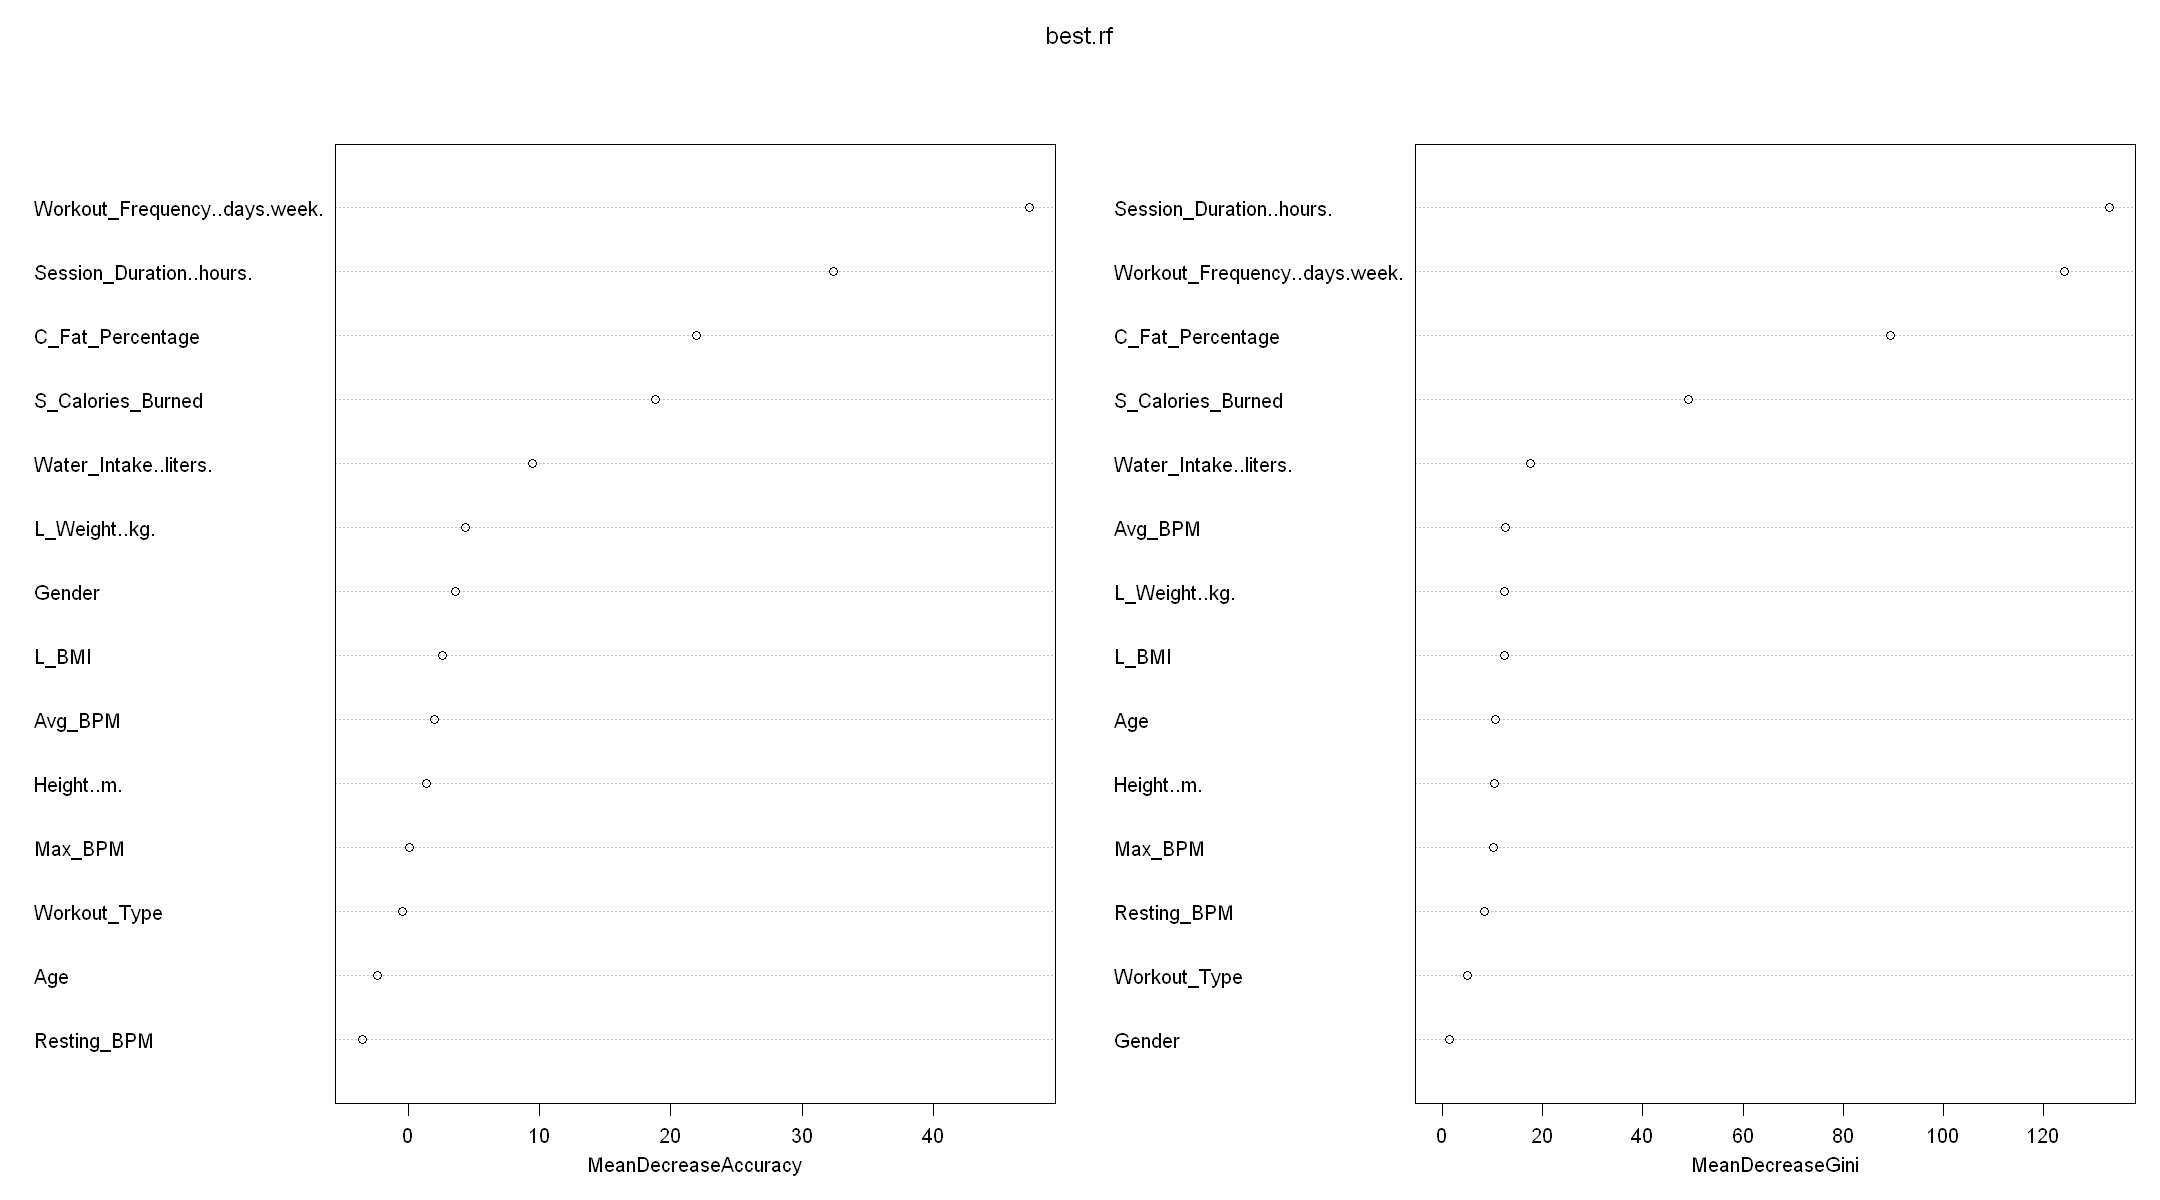

In [187]:
varImpPlot(best.rf)

AUC pour la classe Beginner : 0.9439891 
AUC pour la classe Intermediate : 0.9505789 
AUC pour la classe Expert : 1 
AUC moyenne (macro): 0.964856 


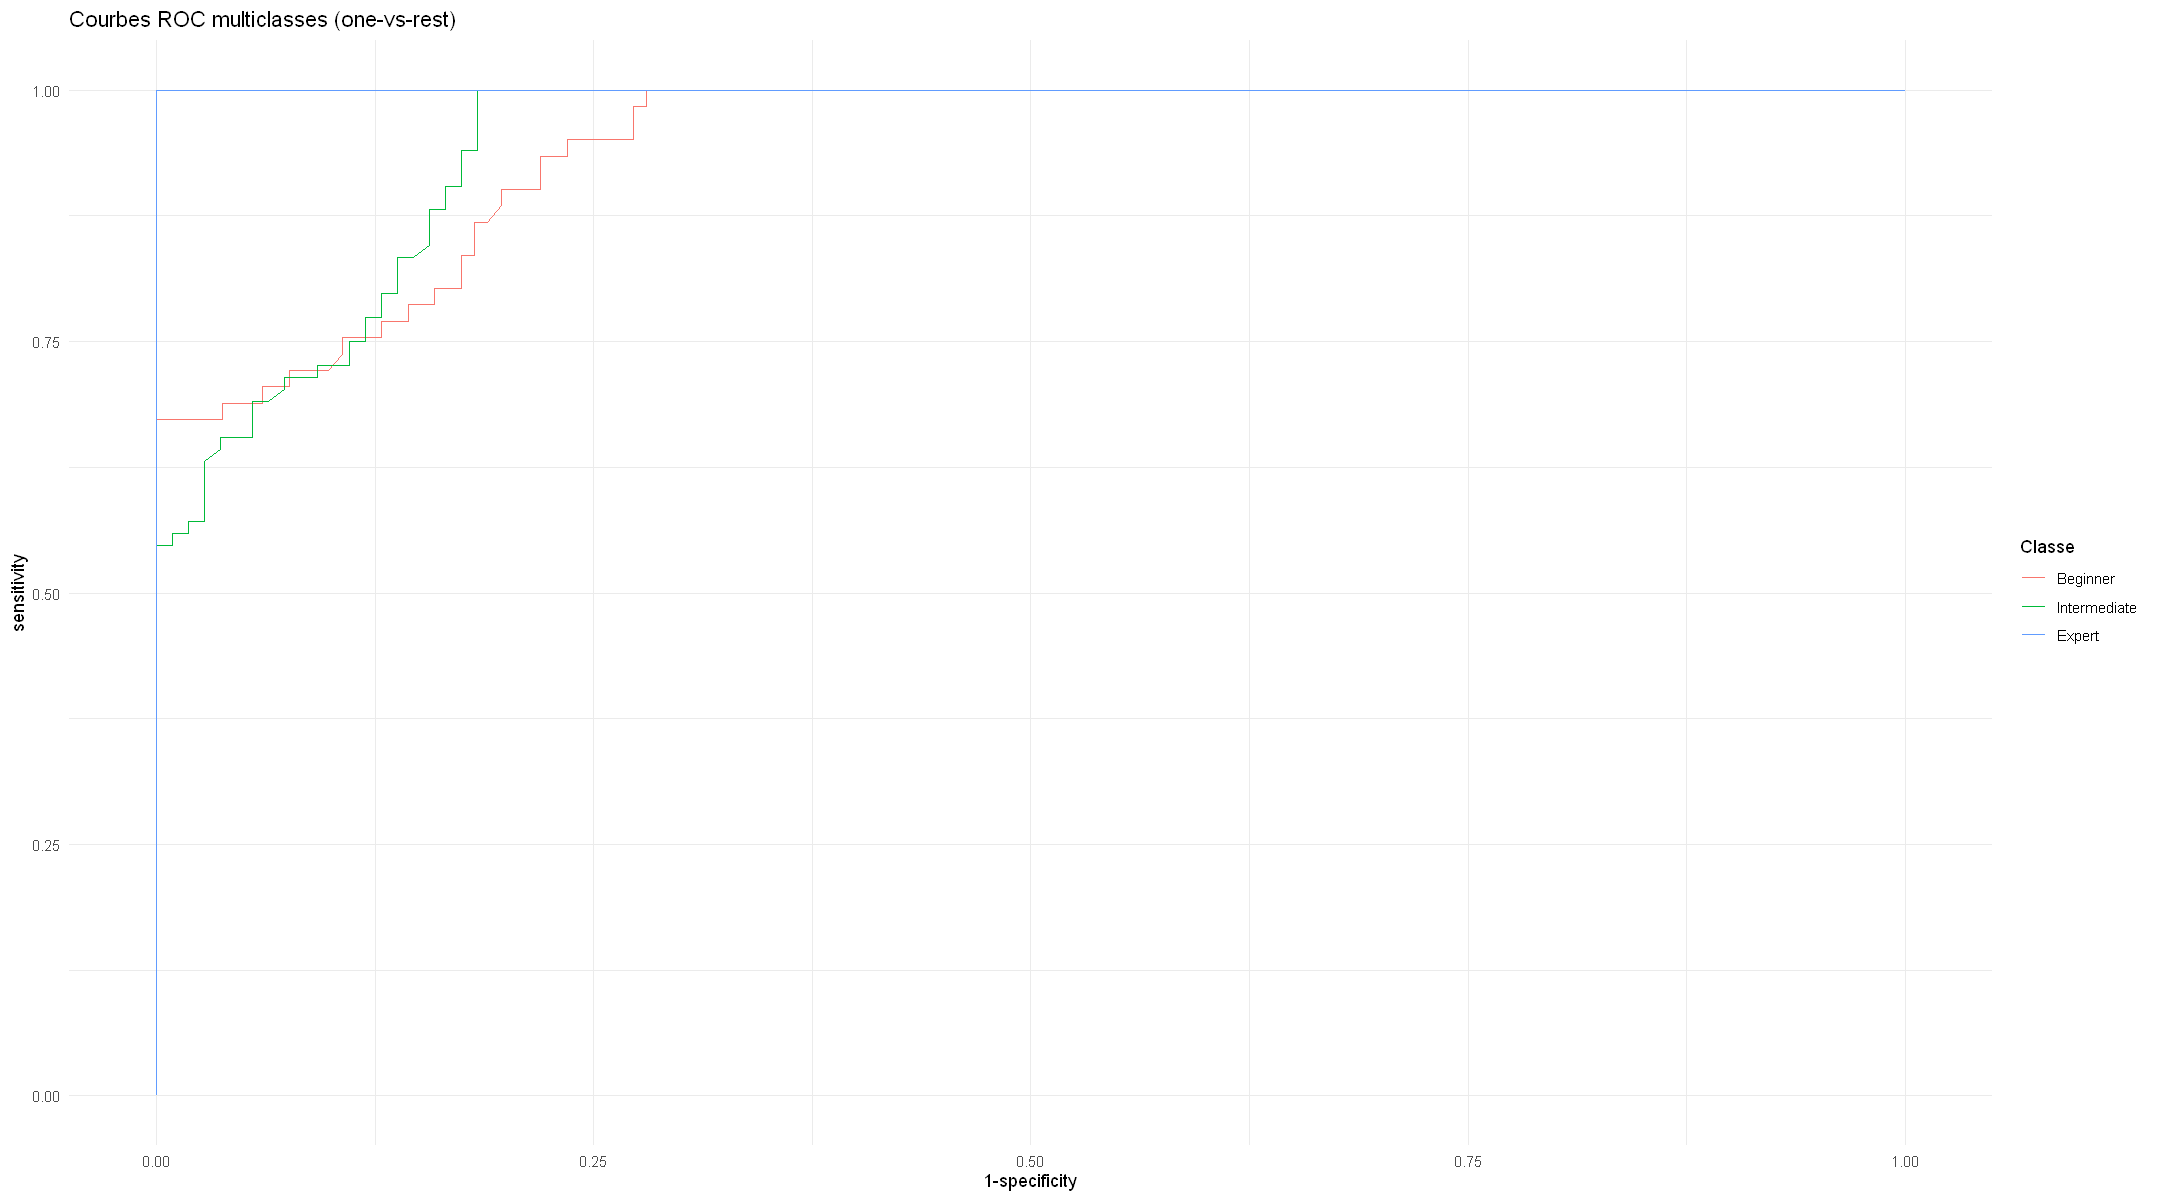

In [647]:
probabilities <- predict(best.rf, test, type = "prob")
roc_list <- list()
classes <- levels(test$Experience_Level)

quiet_roc <- function(...) {
  suppressMessages(roc(...))
}

for (i in seq_along(classes)) {
  roc_list[[i]] <- quiet_roc(response = test$Experience_Level == classes[i],predictor = probabilities[, i],levels = c(FALSE, TRUE), direction = "<")
}
g <- ggroc(roc_list, legacy.axes = TRUE) +
  ggtitle("Courbes ROC multiclasses (one-vs-rest)") +
  scale_color_discrete(name = "Classe", labels = classes) +
  theme_minimal()
print(g)
for (i in seq_along(classes)) {
  cat("AUC pour la classe", classes[i], ":", auc(roc_list[[i]]), "\n")
}
mean_auc <- mean(sapply(roc_list, auc))
cat("AUC moyenne (macro):", mean_auc, "\n")

In [645]:
multiclass_roc <- multiclass.roc(
  test$Experience_Level,
  probabilities,
  quiet = TRUE  # Suppresses messages
)
print(multiclass_roc$auc)

Multi-class area under the curve: 0.9706


#### <FONT COLOR="Blue">2.2. Boosting</font>

##### Not used

In [377]:
tune_grid <- expand.grid(
  interaction.depth = c(1, 3, 5),        
  n.trees = c(300, 500),           
  shrinkage = c(0.01, 0.1),     
  n.minobsinnode = c(5, 10, 15)
)

ctrl <- trainControl(
  method = "cv",
  number = 10,        
  verboseIter = FALSE
)

best.boosting <- train(
  Experience_Level ~ .,
  data = train,                 
  method = "gbm",
  distribution = "multinomial",  
  trControl = ctrl,
  tuneGrid = tune_grid,
  bag.fraction = 0.5,        
  verbose = FALSE,
  metric = "Accuracy" 
)
print(best_boosting$bestTune)
ggplot(best_boosting) + 
  theme_minimal() +
  labs(title = "Performance du modèle GBM par hyperparamètres",
       x = "Valeur des hyperparamètres",
       y = "Précision (Accuracy)")

NULL


ERROR: [1m[33mError[39m in `fortify()`:[22m
[1m[22m[33m![39m `data` must be a [34m<data.frame>[39m, or an object coercible by `fortify()`, or a valid [34m<data.frame>[39m-like object
  coercible by `as.data.frame()`.
[1mCaused by error in `.prevalidate_data_frame_like_object()`:[22m
[1m[22m[33m![39m `dim(data)` must return an [34m<integer>[39m of length 2.


##### Used

Warning message:
"Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk."


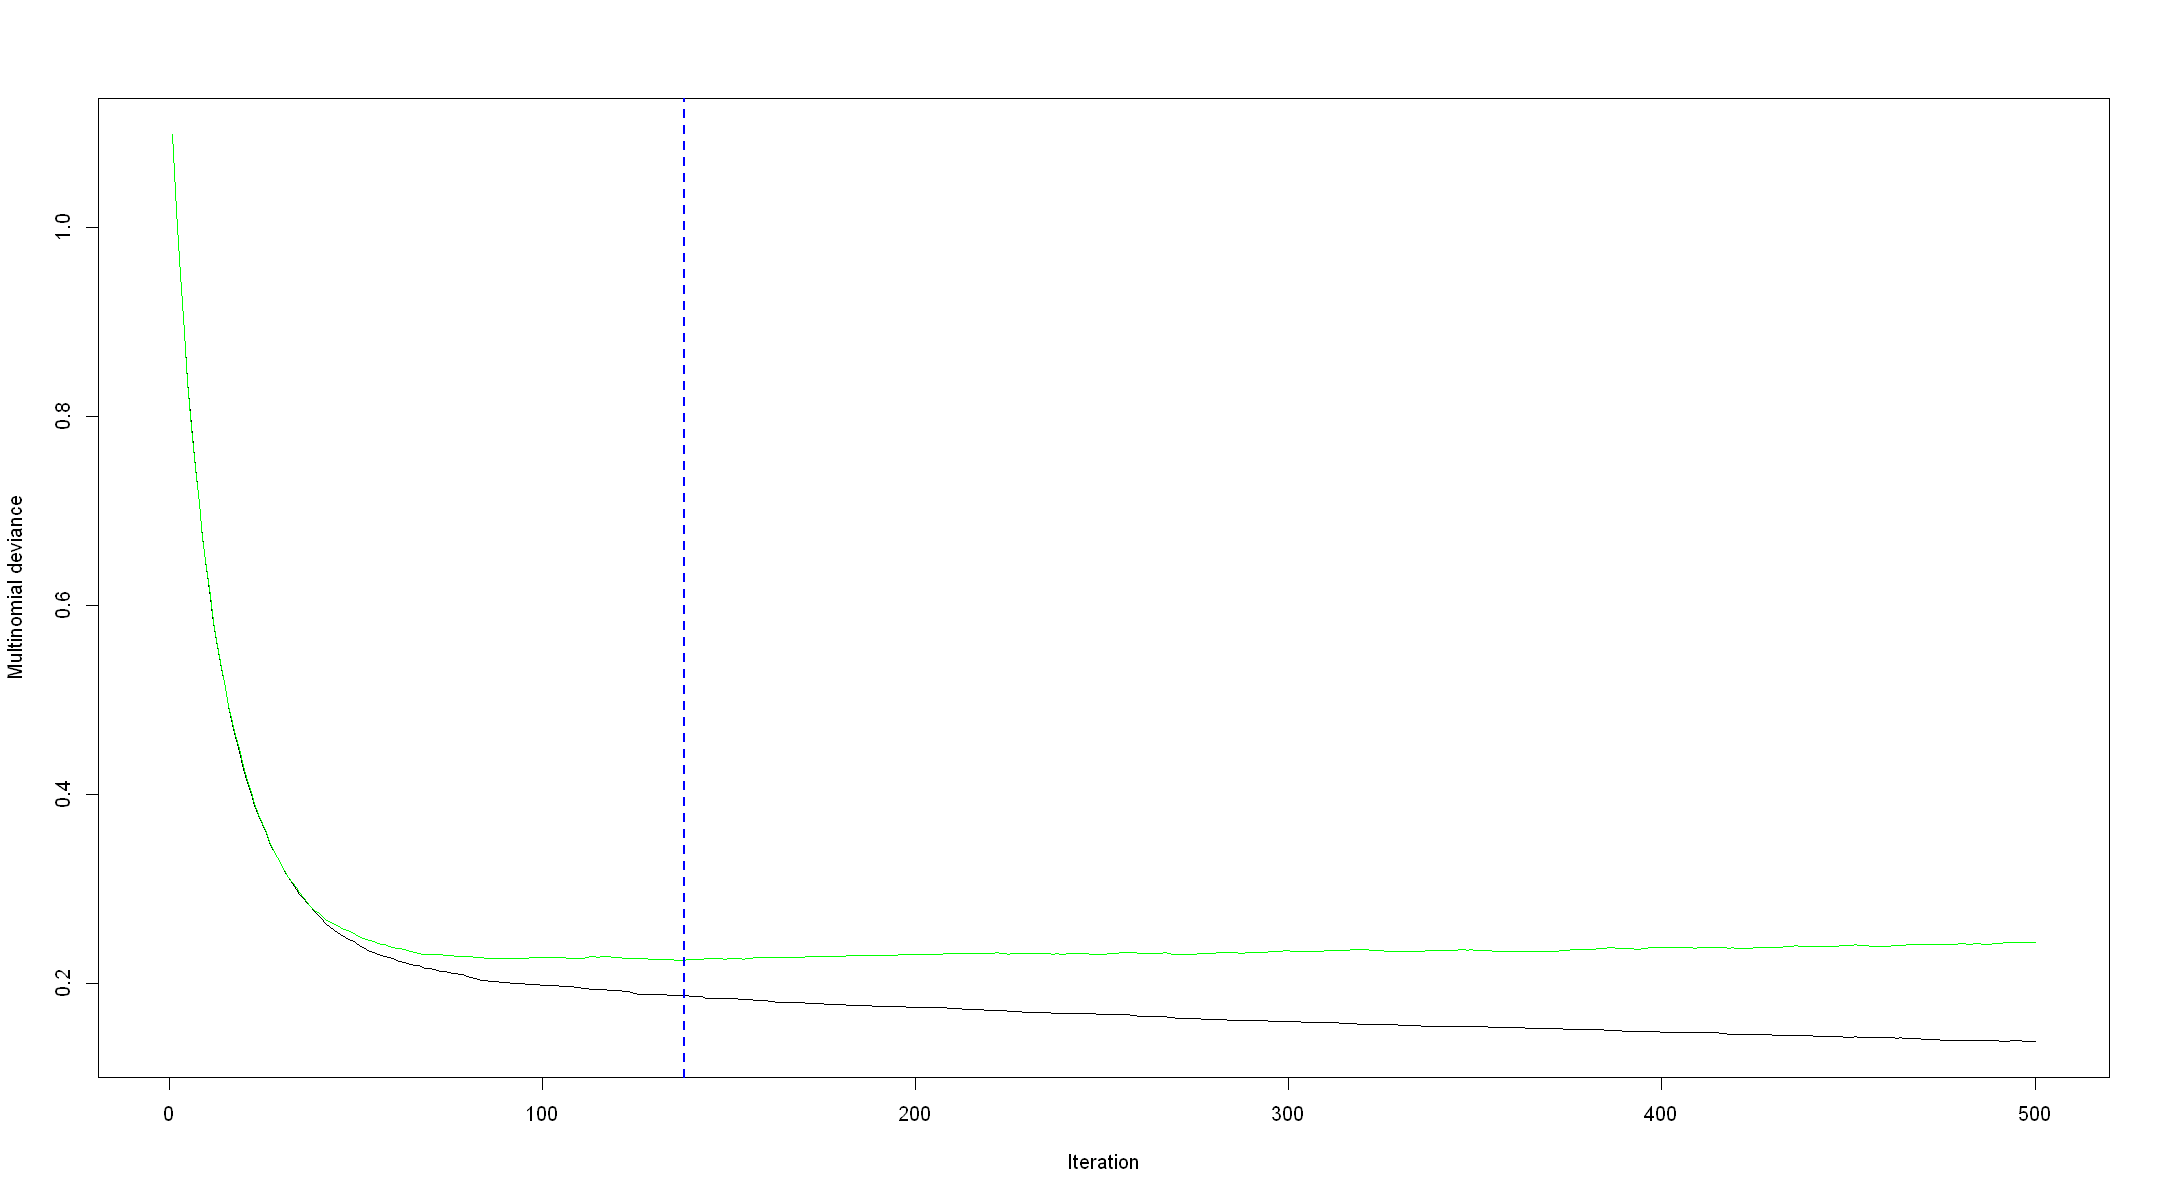

In [652]:
best.boosting <- gbm(Experience_Level ~ ., data = train, distribution = "multinomial", n.trees = 500, cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.05, verbose = FALSE)
best_iter <- gbm.perf(best.boosting, method = "cv")


[1] "Exactitude (accuracy):  0.8756"


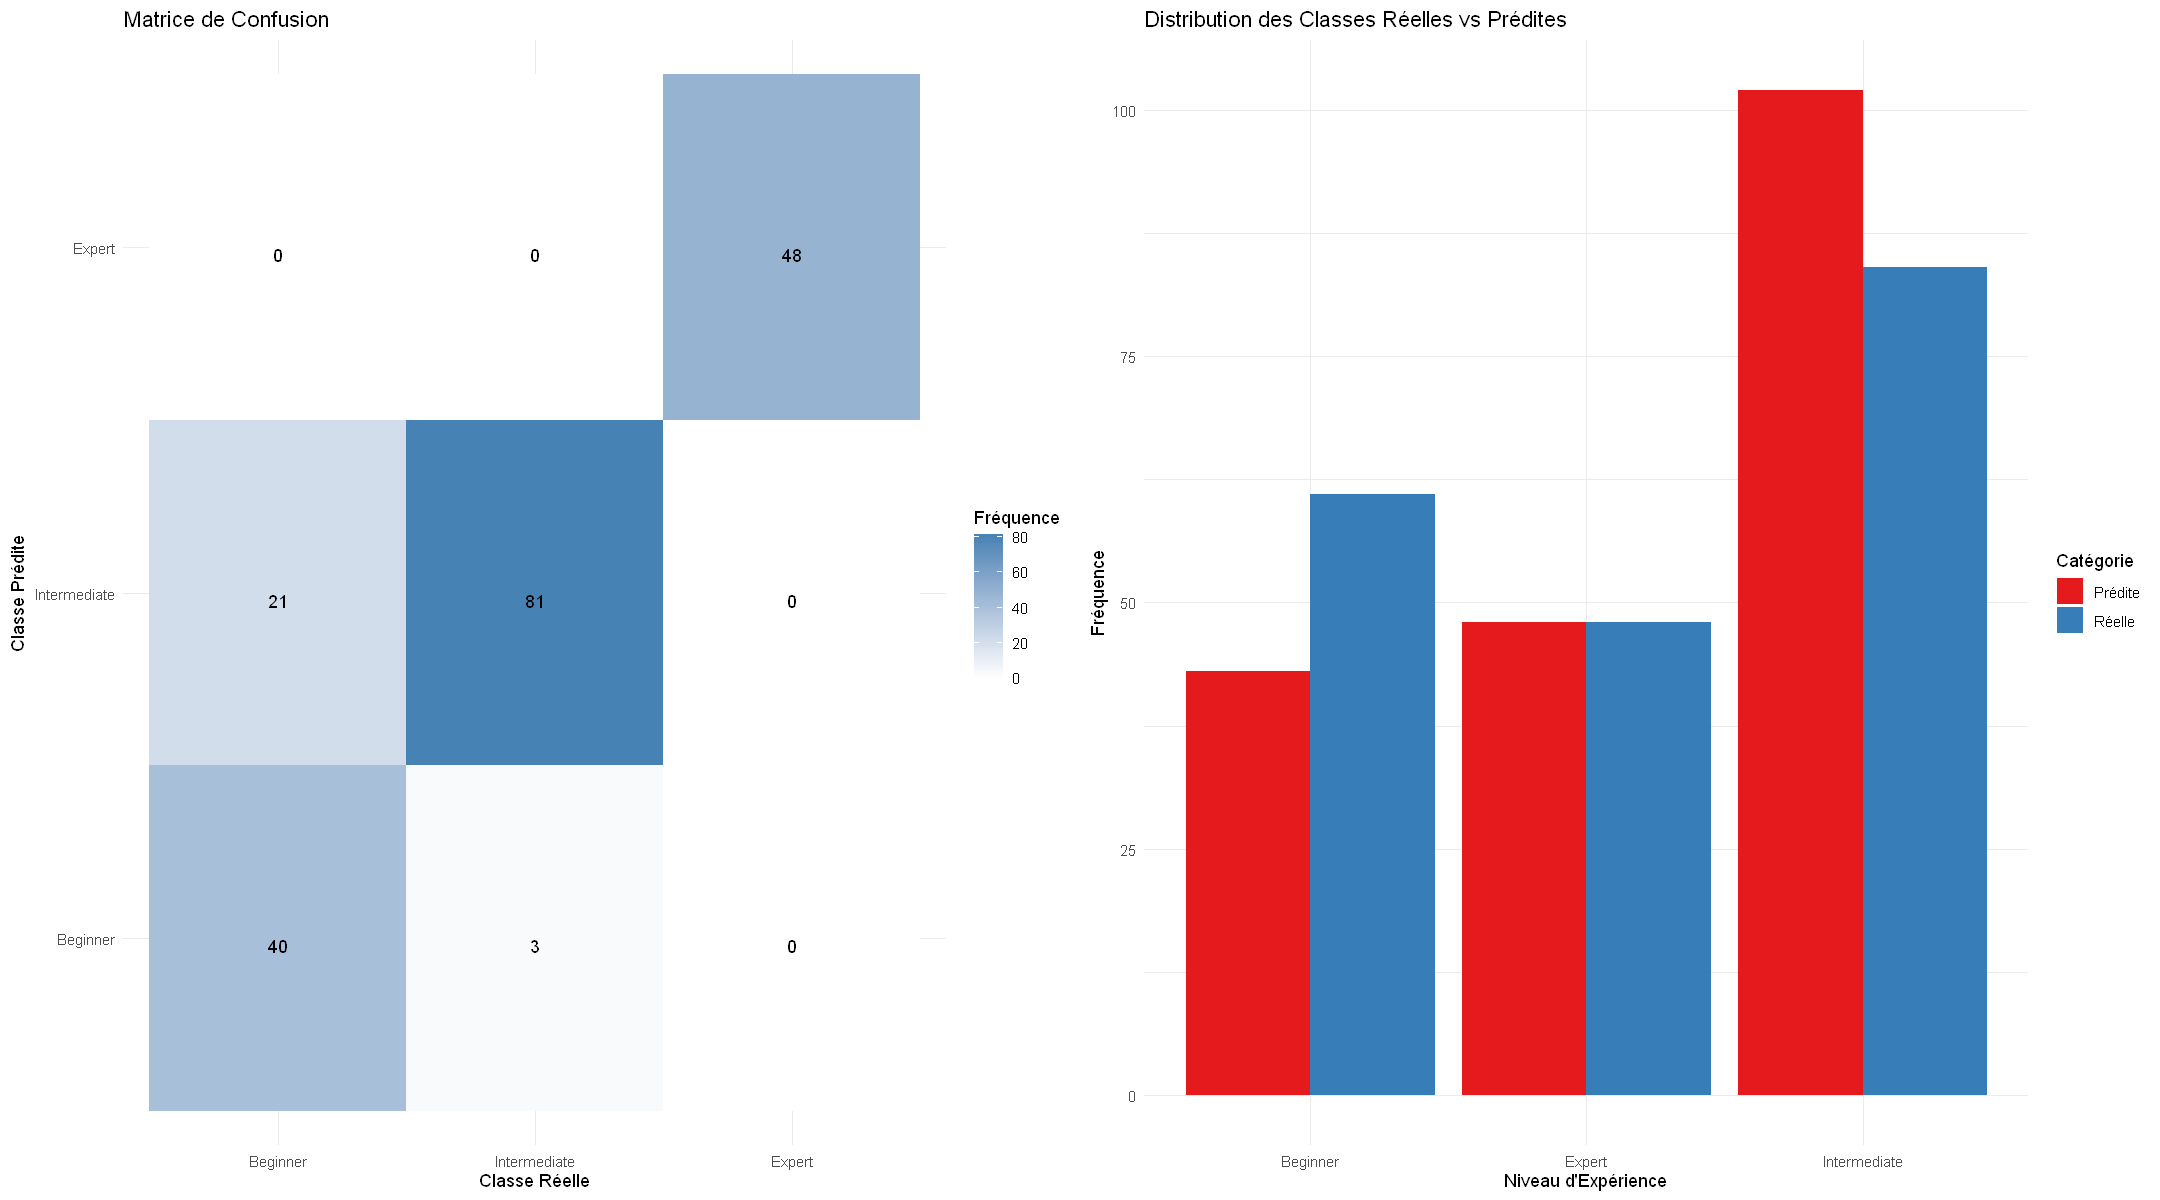

In [660]:
prob_pred <- predict(best.boosting, newdata = test, n.trees = best_iter,type = "response" )

prob_df <- as.data.frame(prob_pred[,,1])
colnames(prob_df) <- levels(train$Experience_Level) 
pred_class <- colnames(prob_df)[max.col(prob_df)]
test_predicted[, "Experience_Level_pred_boos"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_boos, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_boos))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

### <FONT COLOR="Gray">3. Réseaux de neurones</font>

In [519]:
tune.nn = tune.nnet(Experience_Level~.,data=train,size=c(3,4,5),decay=c(1,2),maxit=200,linout=FALSE)
best.nn = tune.nn$best.model

In [521]:
best.nn$n 

[1] 18  5  3

[1] "Exactitude (accuracy):  0.8549"


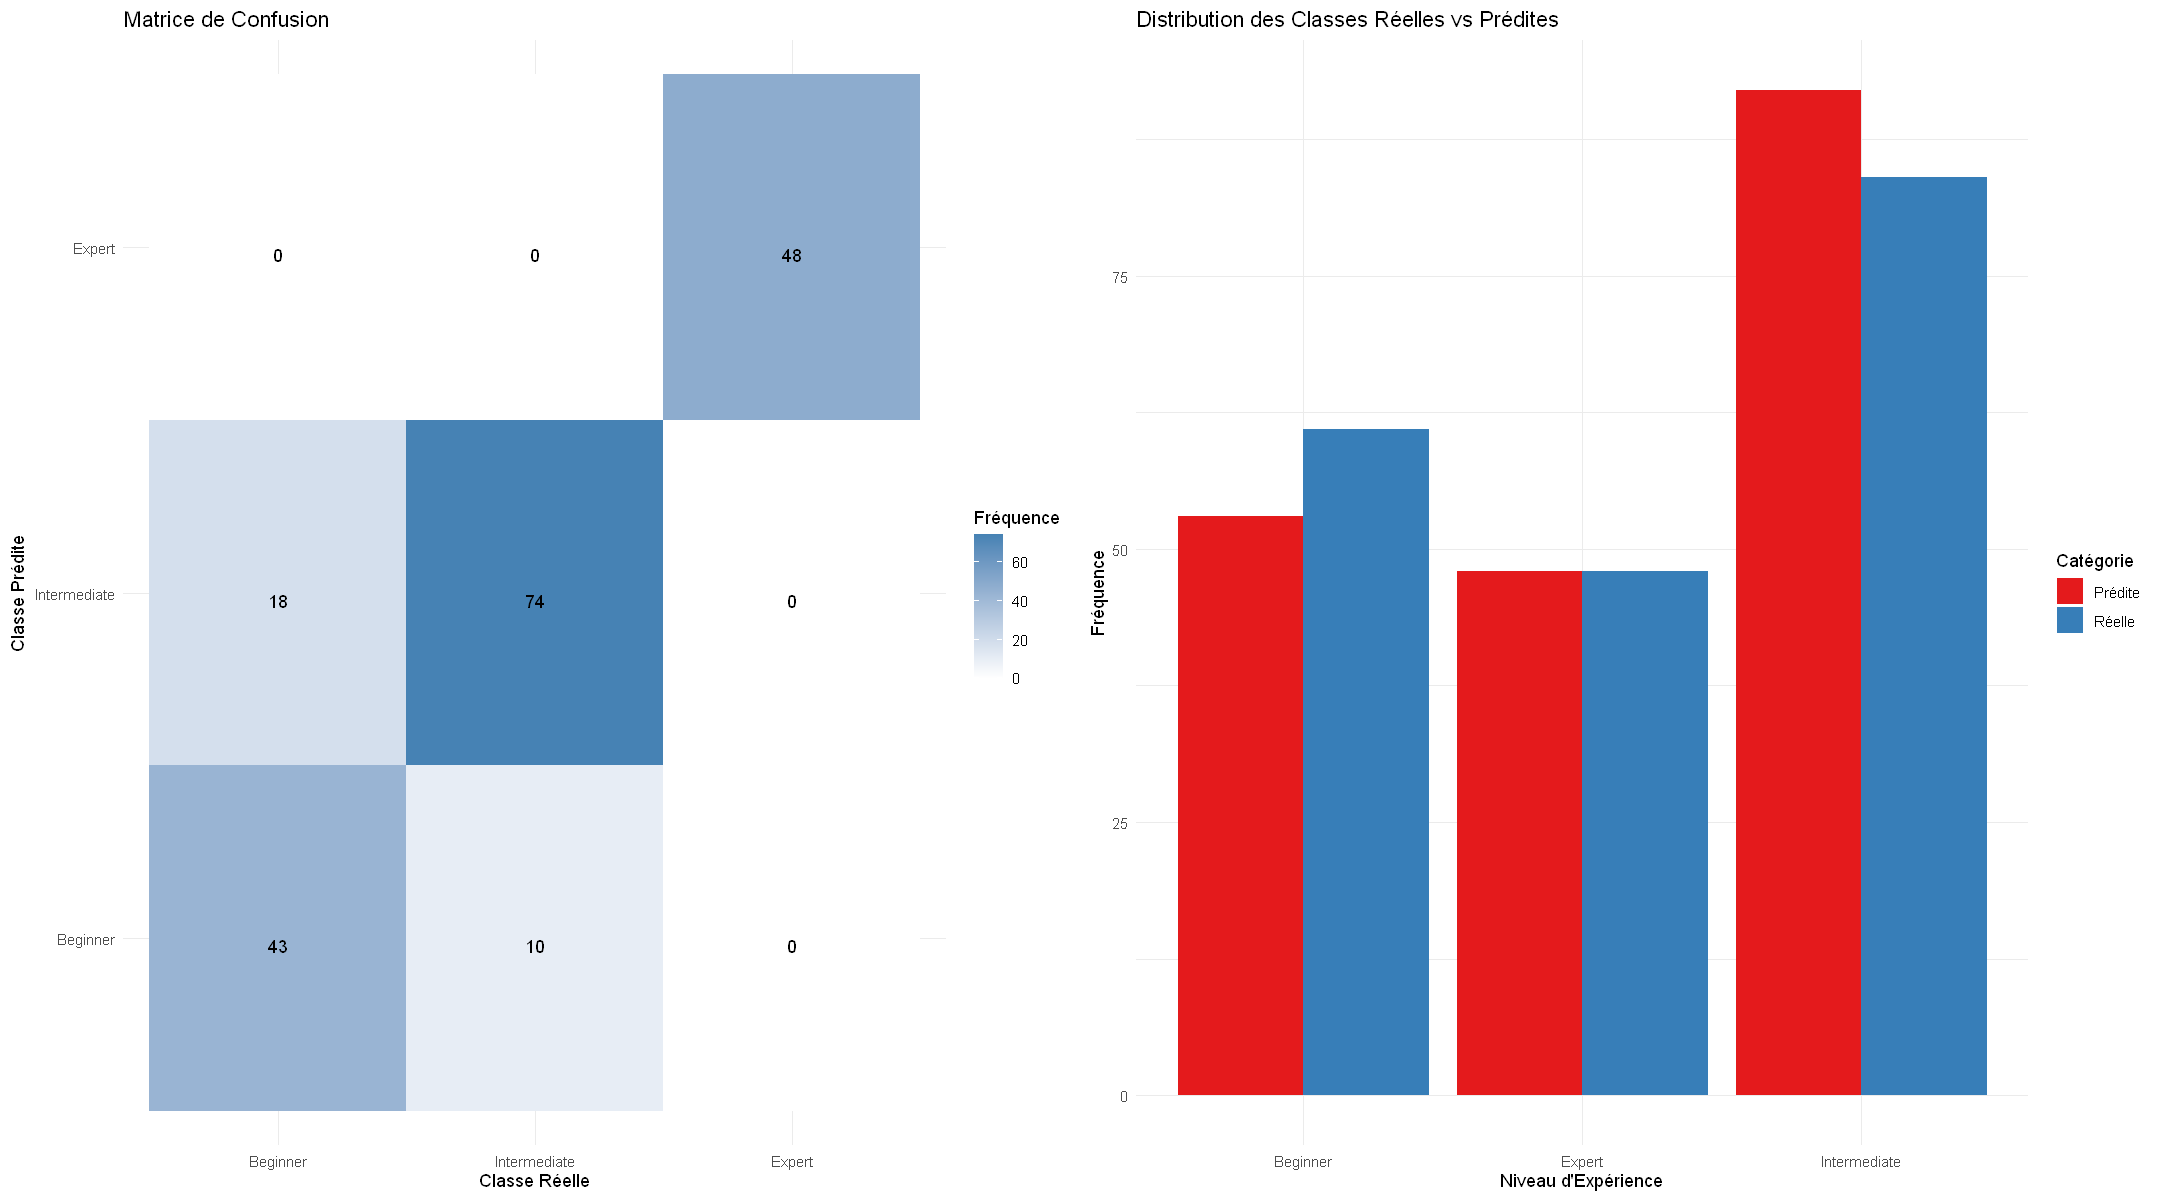

In [523]:
pred_class <- predict(best.nn, newdata = test, type = "class")
test_predicted[, "Experience_Level_pred_nn"] <- factor(pred_class, levels = levels(test$Experience_Level))

conf_matrix <- table(Predicted = test_predicted$Experience_Level_pred_nn, 
                     Actual = test_predicted$Experience_Level)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Exactitude (accuracy): ", round(accuracy, 4)))

conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Prédit", "Réel", "Fréquence")

conf_plot = ggplot(data = conf_df, aes(x = Réel, y = Prédit, fill = Fréquence)) +
  geom_tile() +
  geom_text(aes(label = Fréquence), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Matrice de Confusion",
       x = "Classe Réelle", 
       y = "Classe Prédite") +
  theme_minimal()

df_compare <- data.frame(
  Catégorie = c(rep("Réelle", nrow(test)), rep("Prédite", nrow(test))),
  Classe = c(as.character(test$Experience_Level), as.character(test_predicted$Experience_Level_pred_nn))
)

com_plot = ggplot(df_compare, aes(x = Classe, fill = Catégorie)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution des Classes Réelles vs Prédites",
       x = "Niveau d'Expérience", 
       y = "Fréquence") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(conf_plot, com_plot, ncol = 2)

AUC pour la classe Beginner : 0.9520616 
AUC pour la classe Intermediate : 0.9578419 
AUC pour la classe Expert : 1 
AUC moyenne (macro): 0.9699678 


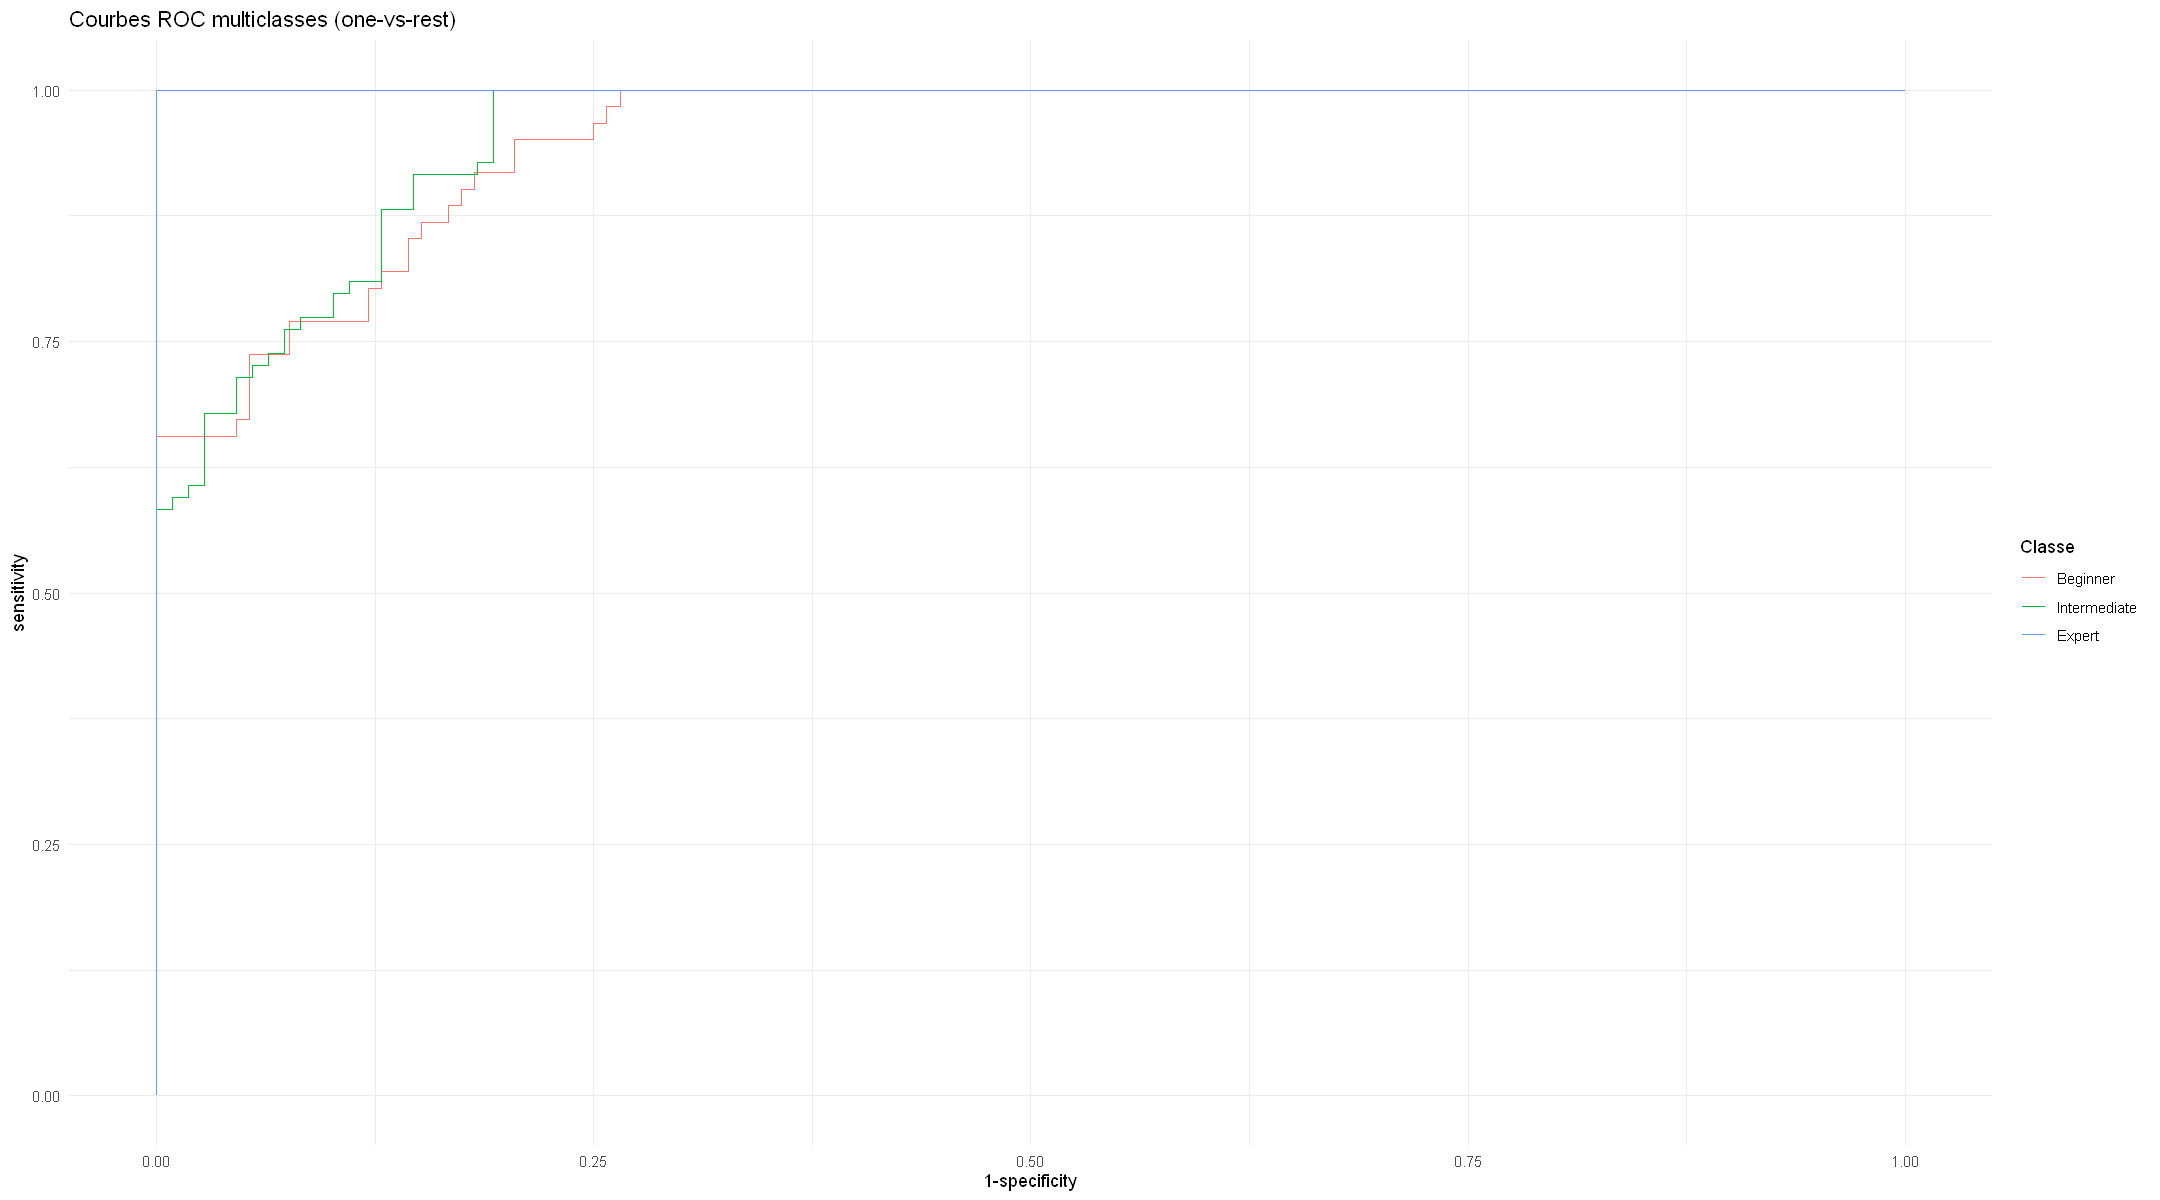

In [649]:
probabilities <- prob_df

roc_list <- list()
classes <- levels(test$Experience_Level)

quiet_roc <- function(...) {
  suppressMessages(roc(...))
}

for (i in seq_along(classes)) {
  roc_list[[i]] <- quiet_roc(response = test$Experience_Level == classes[i],predictor = probabilities[, i],levels = c(FALSE, TRUE), direction = "<")
}
g <- ggroc(roc_list, legacy.axes = TRUE) +
  ggtitle("Courbes ROC multiclasses (one-vs-rest)") +
  scale_color_discrete(name = "Classe", labels = classes) +
  theme_minimal()
print(g)
for (i in seq_along(classes)) {
  cat("AUC pour la classe", classes[i], ":", auc(roc_list[[i]]), "\n")
}
mean_auc <- mean(sapply(roc_list, auc))
cat("AUC moyenne (macro):", mean_auc, "\n")

### <FONT COLOR="Gray">4. Comparaison les modeles</font>

In [716]:
Experience_Level_pred_tab <- test_predicted[, grep("Experience_Level_pred", names(test_predicted))]

In [718]:
cal_accuracy <- function(pred){
    conf_matrix <- table(Predicted = pred, 
                     Actual = test_predicted$Experience_Level)
    return (sum(diag(conf_matrix)) / sum(conf_matrix))
}
cal_precision <- function(pred){
    conf_matrix <- table(Predicted = pred, 
                     Actual = test_predicted$Experience_Level)
    nclass = ncol(conf_matrix)
    prec = c()
    for (i in 1:nclass) {
        rowsum = sum(conf_matrix[i,])
        if (rowsum> 0){
            prec = append(prec,conf_matrix[i,i]/rowsum)
        }else{
            prec = append(prec, 0)
        }
    }
    return (prec)
}
cal_recall <- function(pred){
    conf_matrix <- table(Predicted = pred, 
                     Actual = test_predicted$Experience_Level)
    nclass = ncol(conf_matrix)
    rec = c()
    for (i in 1:nclass) {
        colsum = sum(conf_matrix[,i])
        if (colsum> 0){
            rec = append(rec,conf_matrix[i,i]/colsum)
        }else{
            rec = append(rec, 0)
        }
    }
    return (rec)
}
cal_f1 <- function(pred){
    conf_matrix <- table(Predicted = pred, 
                     Actual = test_predicted$Experience_Level)
    nclass = ncol(conf_matrix)
    f1 = c()
    precision = cal_precision(pred) 
    recall = cal_recall(pred)
    for (i in 1:nclass){
        if (precision[i]+ recall[i] > 0){
            f1 = append(f1,2*precision[i]*recall[i]/(precision[i]+recall[i]))
        }
        else{
            f1 = append(f1,0)
        }}
    return (f1)
}

In [720]:
method = c()
accuracy = c()  
precision_1 = c()
precision_2 = c()
precision_3 = c()
recall_1 = c() 
recall_2 = c()
recall_3 = c()
f1_score_1 = c()
f1_score_2 = c()
f1_score_3 = c()

for (col in colnames(Experience_Level_pred_tab)){
    model = sub("^Experience_Level_pred_", "", col)
    pred = Experience_Level_pred_tab[, col]
 
    acc = cal_accuracy(pred)
    accuracy = append(accuracy, acc)
    
    precision = cal_precision(pred)
    precision_1 = append(precision_1, precision[1])
    precision_2 = append(precision_2, precision[2])
    precision_3 = append(precision_3, precision[3])
    
    recall = cal_recall(pred)
    recall_1 = append(recall_1, recall[1])
    recall_2 = append(recall_2, recall[2])
    recall_3 = append(recall_3, recall[3])
    
    f1_score = cal_f1(pred)
    f1_score_1 = append(f1_score_1, f1_score[1])
    f1_score_2 = append(f1_score_2, f1_score[2])
    f1_score_3 = append(f1_score_3, f1_score[3])
    
    method = append(method, model)
}
Experience_Level_results = data.frame(
    Method = method,
    Accuracy = accuracy,
    Precision_1 = precision_1,
    Precision_2 = precision_2,
    Precision_3 = precision_3,
    Recall_1 = recall_1,
    Recall_2 = recall_2,
    Recall_3 = recall_3,
    F1_score_1 = f1_score_1,
    F1_score_2 = f1_score_2,
    F1_score_3 = f1_score_3
)

In [722]:
Experience_Level_results

Method,Accuracy,Precision_1,Precision_2,Precision_3,Recall_1,Recall_2,Recall_3,F1_score_1,F1_score_2,F1_score_3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lr,0.8652850,0.7966102,0.8372093,1.00,0.7704918,0.8571429,1,0.7833333,0.8470588,1.0000000
svc,0.8497409,0.8076923,0.7956989,1.00,0.6885246,0.8809524,1,0.7433628,0.8361582,1.0000000
card,0.8911917,1.0000000,0.8000000,1.00,0.6557377,1.0000000,1,0.7920792,0.8888889,1.0000000
rf,0.8963731,1.0000000,0.8076923,1.00,0.6721311,1.0000000,1,0.8039216,0.8936170,1.0000000
nn,0.8549223,0.8113208,0.8043478,1.00,0.7049180,0.8809524,1,0.7543860,0.8409091,1.0000000
boos,0.8756477,0.9302326,0.7941176,1.00,0.6557377,0.9642857,1,0.7692308,0.8709677,1.0000000
lda,0.8756477,0.8490566,0.8260870,1.00,0.7377049,0.9047619,1,0.7894737,0.8636364,1.0000000
knn,0.7668394,0.6603774,0.7222222,0.96,0.5737705,0.7738095,1,0.6140351,0.7471264,0.9795918


Conclusion :
Parmi les différents modèles évalués, le Random Forest se démarque comme le meilleur compromis entre précision, rappel et F1-score sur l'ensemble des classes. Il montre une excellente capacité à prédire toutes les classes d’expérience, notamment avec un rappel parfait (1.0) pour la classe 2 et des F1-scores élevés et stables. Cela en fait un modèle fiable, robuste et équilibré.

Des modèles comme Boosting, LDA ou Decision Tree offrent aussi de bonnes performances, mais montrent parfois des déséquilibres entre précision et rappel selon les classes. Les modèles linéaires ou SVM, bien que corrects, sont légèrement moins performants, surtout en termes de rappel sur certaines classes.

Ainsi, pour une application pratique nécessitant une bonne généralisation et un traitement équitable de toutes les classes d’expérience, Random Forest est le choix le plus recommandé.

## <FONT COLOR="Orange">D. Comparaison avec data analyse</font>

### <FONT COLOR="Gray">1. Calories brûlées</font>

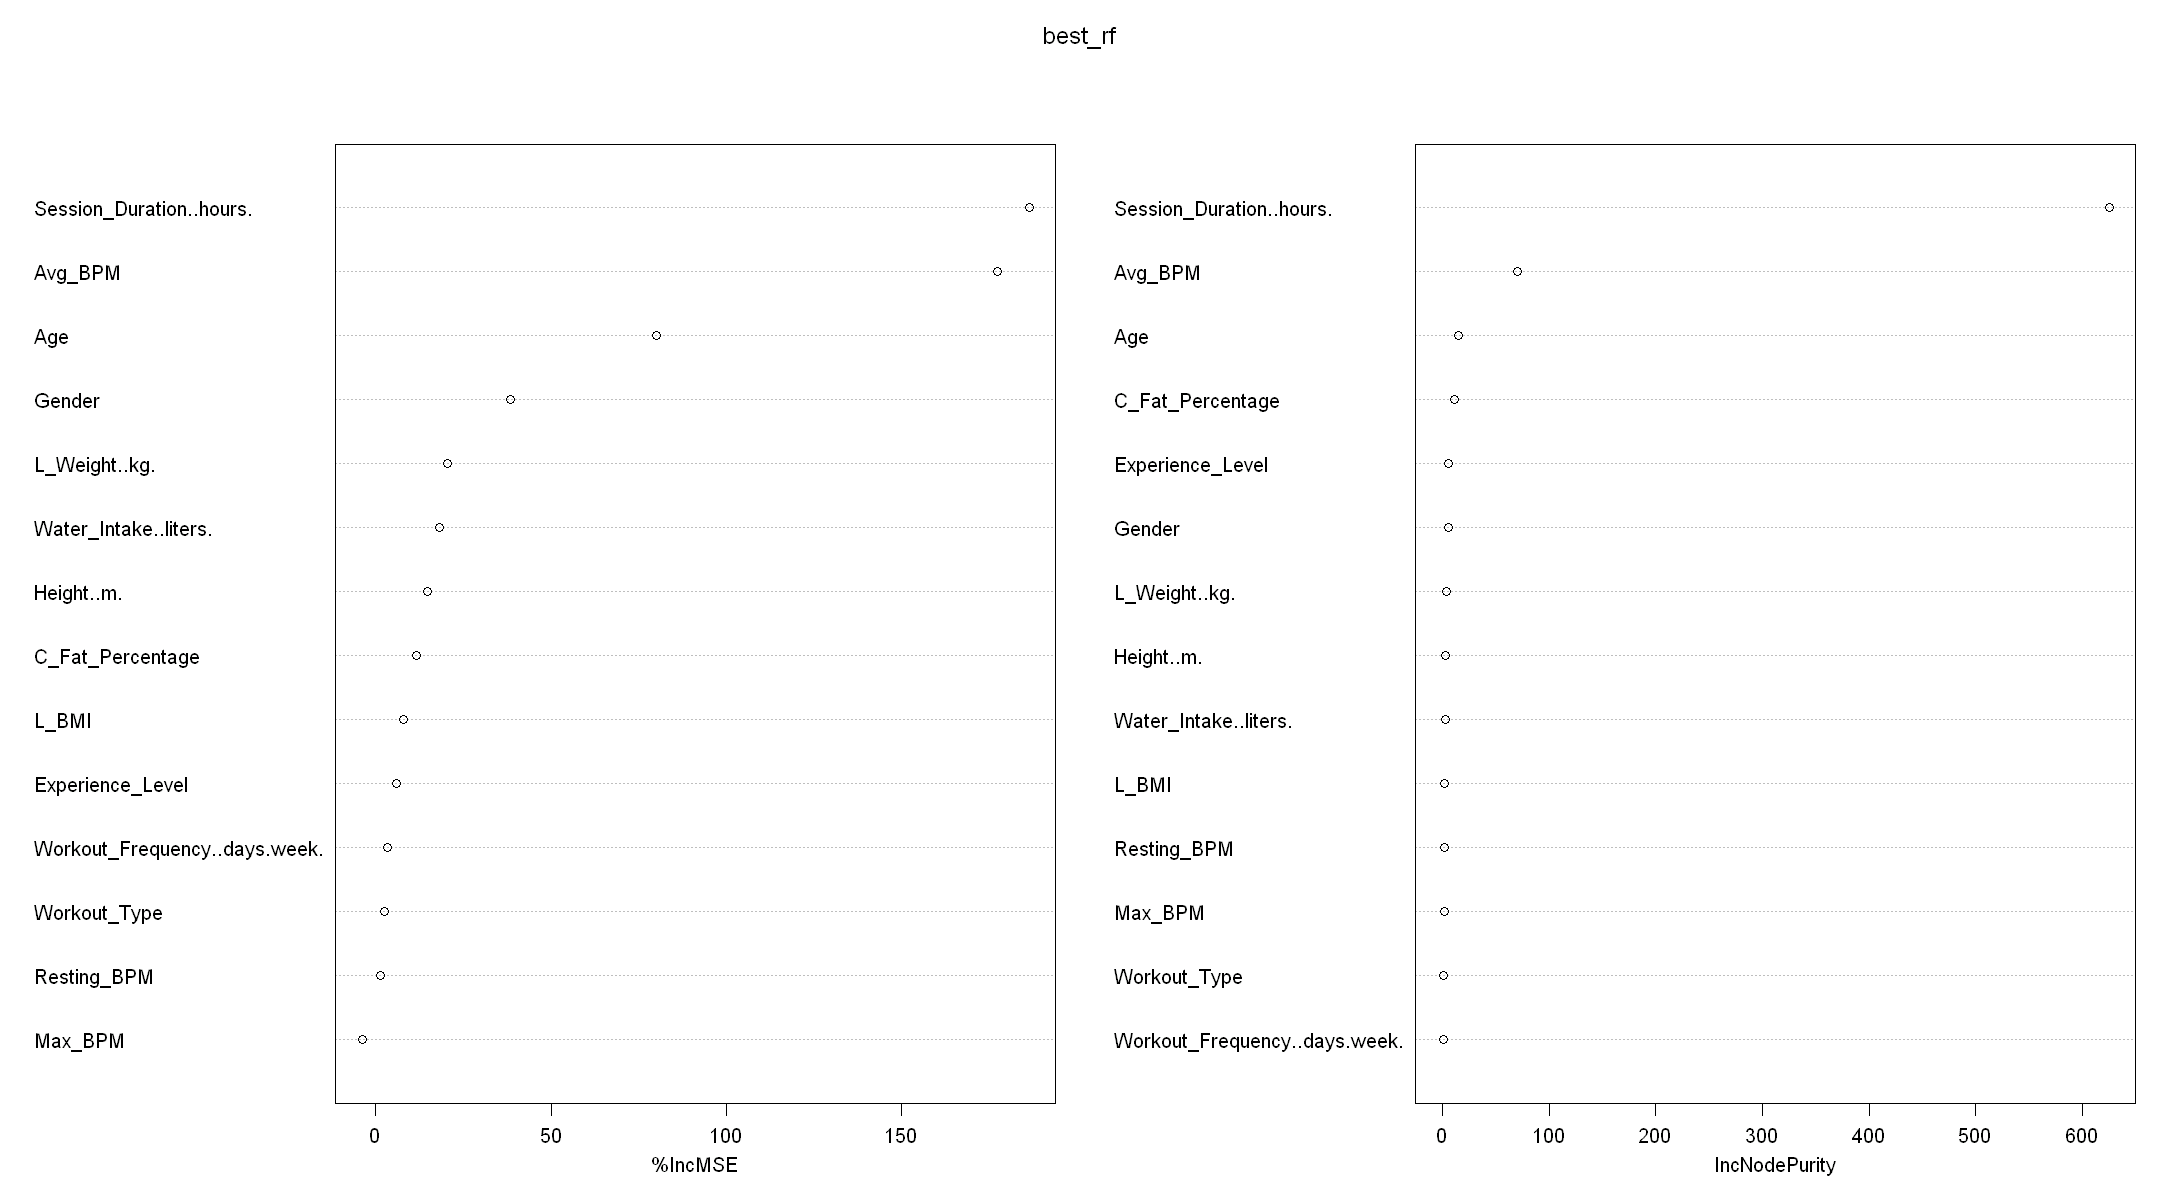

In [768]:
varImpPlot(best_rf)